In [18]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# eml to DuckDB

Notebook to explore cleanly how to go from eml file format to DuckDB database followed The Classes in models/models.py cleanly without different codes etc.
This has to be transformed into different function files later on.

## Imports

In [19]:
from __future__ import annotations
import mailbox
import pandas as pd
import os
import email
from email.header import decode_header
import datetime
from bs4 import BeautifulSoup
from tqdm import tqdm

import duckdb

import json
import uuid
from typing import Dict, Any, Optional, Union

from pathlib import Path

from email import policy


import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display

# from eralchemy2 import render_er
# from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String, Float

import jinja2


### Importing Function & Classes

#### Classes

In [20]:
from src.data.email_analyzer import EmailAnalyzer

#### Functions

In [21]:
from src.data.eml_transformation import process_eml_files
from src.data.duckdb_utils import setup_database

#### Constants

In [22]:
from constants import ACTIVE_PROJECT

### Vars

In [23]:
### Test des fonctions:
# mbox_single_file_path = 'data/processed/mailbox_cecile/AG.mbox'
# mbox_path = 'data/processed/mailbox_cecile/'
# TEST_SAMPLE_PATH = 'data/processed/celine_readpst_with_S/celine.guyon/Archive/'
# TEST_SAMPLE_PATH = 'data/processed/celine_readpst_with_S/'
# TEST_SAMPLE_PATH = 'data/processed/celine_readpst_with_S/celine.guyon/'
# TEST_SAMPLE_PATH = 'data/processed/celine_readpst_with_S/celine.guyon/Boîte de réception/Archives calssifiees'


# db_path = "data/Projects/Boîte mail de Céline/processed/celine.duckdb"

# TEST_SAMPLE_PATH = 'data/Projects/Projet Demo/Boîte mail de Céline/processed/celine.guyon/Archive'
# TEST_SAMPLE_PATH = 'data/Projects/Projet Demo/Boîte mail de Céline/processed/celine.guyon/Éléments envoyés'
TEST_SAMPLE_PATH = 'data/Projects/Projet Demo/Boîte mail de Céline/processed/celine.guyon/'

# /home/onyxia/work/olkoa/data/Projects/Projet Demo/Boîte mail de Céline/processed/celine.guyon/Boîte de réception/gestioncrise
db_path = f"data/Projects/{ACTIVE_PROJECT}/{ACTIVE_PROJECT}.duckdb"

## Functions

### Main

In [24]:
duckdb_conn = setup_database(db_path)

attempting connection


Connection Done


# Make The Database here (desactivated while db is up)

In [25]:
process_eml_files(TEST_SAMPLE_PATH, db_path)

attempting connection
Connection Done
Processing .eml files in data/Projects/Projet Demo/Boîte mail de Céline/processed/celine.guyon and subdirectories...
Found 19137 .eml files to process


Processing emails:   0%|          | 1/19137 [00:00<1:27:08,  3.66it/s]

[Entity(name='undisclosed-recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   0%|          | 2/19137 [00:00<1:18:38,  4.06it/s]

[Entity(name='undisclosed-recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   0%|          | 6/19137 [00:00<36:40,  8.69it/s]  

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='undisclosed-recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='undisclosed-recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='d

Processing emails:   0%|          | 11/19137 [00:01<26:11, 12.17it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='undisclosed-recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='undisclosed-recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettia

Processing emails:   0%|          | 13/19137 [00:01<27:40, 11.51it/s]

[Entity(name='undisclosed-recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   0%|          | 15/19137 [00:01<36:42,  8.68it/s]

None
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   0%|          | 20/19137 [00:02<25:04, 12.71it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   0%|          | 25/19137 [00:02<22:46, 13.98it/s]

[Entity(name='undisclosed-recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='undisclosed-recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   0%|          | 30/19137 [00:02<26:14, 12.14it/s]

[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='undisclosed-recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='undisclosed-recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='undisclosed-recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), 

Processing emails:   0%|          | 37/19137 [00:03<19:52, 16.01it/s]

[Entity(name='Contact eFutura', alias_names=None, is_physical_person=True, email=EmailAddress(email='contact@efutura.fr'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None,

Processing emails:   0%|          | 40/19137 [00:03<18:55, 16.81it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='la

Processing emails:   0%|          | 47/19137 [00:05<59:51,  5.32it/s]  

[Entity(name='Ahmed Dahmani', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None), Entity(name='Jean-Jacques Gandini', alias_names=None, is_physical_person=True, email=EmailAddress(email='jeanjacques.gandini@orange.fr'), alias_emails=None, positions=None), Entity(name='Ahmed Dahmani', alias_names=None, is_physical_person=True, email=EmailAddress(email='amedamid@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archiviste

Processing emails:   0%|          | 51/19137 [00:06<44:45,  7.11it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_e

Processing emails:   0%|          | 53/19137 [00:06<41:17,  7.70it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]


Processing emails:   0%|          | 55/19137 [00:06<42:23,  7.50it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Olivier Rouchon', alias_names=None, is_physical_person=True, email=EmailAddress(email='olivier.rouchon@cines.fr'), alias_emails=None, positions=None)]


Processing emails:   0%|          | 57/19137 [00:06<39:16,  8.10it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   0%|          | 61/19137 [00:06<28:04, 11.32it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   0%|          | 66/19137 [00:07<25:30, 12.46it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   0%|          | 71/19137 [00:07<21:21, 14.88it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf

Processing emails:   0%|          | 73/19137 [00:07<20:09, 15.76it/s]

[Entity(name='Claire Larrieux - Déléguée générale via  aaf_ca2019 Mailing List', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   0%|          | 77/19137 [00:08<22:20, 14.22it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]


Processing emails:   0%|          | 79/19137 [00:08<23:46, 13.36it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   0%|          | 83/19137 [00:08<35:19,  8.99it/s]

[Entity(name='LE CLERC Jean-Yves', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-yves.le-clerc@ille-et-vilaine.fr'), alias_emails=None, positions=None), Entity(name='BOCHE Samuel', alias_names=None, is_physical_person=True, email=EmailAddress(email='samuel.boche@ille-et-vilaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='irene.bastard@bnf.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='irene.bastard@bnf.fr'), alias_emails=None, positions=None), Entity(name='brigitte.guigueno@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Florent Piton', alias_names=None, is_physical_person=True, email=EmailAddress(email='florentpiton1@gmail.com'),

Processing emails:   0%|          | 85/19137 [00:09<32:39,  9.72it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:   0%|          | 91/19137 [00:09<22:58, 13.81it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux Myriam FAVREAU Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   0%|          | 93/19137 [00:09<29:49, 10.64it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   0%|          | 95/19137 [00:09<30:50, 10.29it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 99/19137 [00:10<27:52, 11.38it/s]

[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.delobel@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 101/19137 [00:10<40:51,  7.76it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LE CLERC Jean-Yves', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-yves.le-clerc@ille-et-vilaine.fr'), alias_emails=None, positions=None), Entity(name='BOCHE Samuel', alias_names=None, is_physical_person=True, email=EmailAddress(email='samuel.boche@ille-et-vilaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='irene.bastard@bnf.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='irene.bastard@bnf.fr'), alias_emails=None, positions=None), Entity(name='brigitte.guigueno@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigi

Processing emails:   1%|          | 106/19137 [00:11<28:47, 11.01it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='c

Processing emails:   1%|          | 110/19137 [00:11<27:32, 11.51it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 112/19137 [00:11<26:03, 12.17it/s]

[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archi

Processing emails:   1%|          | 116/19137 [00:11<22:53, 13.84it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 119/19137 [00:11<21:56, 14.44it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 121/19137 [00:17<4:11:15,  1.26it/s]

[Entity(name='benoit.charon@activbold.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='benoit.charon@activbold.com'), alias_emails=None, positions=None), Entity(name='jose.castellon@activbold.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='jose.castellon@activbold.com'), alias_emails=None, positions=None), Entity(name='lDodin@altereos.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='ldodin@altereos.fr'), alias_emails=None, positions=None), Entity(name='charles.du-boullay@arkhineo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charles.du-boullay@arkhineo.fr'), alias_emails=None, positions=None), Entity(name='nicolas.roy@arkhineo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.roy@arkhineo.fr'), alias_emails=None, positions=None), Entity(name='philippe.delahaye@arkhineo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='philippe

Processing emails:   1%|          | 125/19137 [00:17<2:21:38,  2.24it/s]

[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 127/19137 [00:17<1:47:38,  2.94it/s]

[Entity(name='aaf_section_aee@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aee@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 129/19137 [00:18<1:25:17,  3.71it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 132/19137 [00:18<1:17:03,  4.11it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='verdon@mmsh.univ-aix.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='verdon@mmsh.univ-aix.fr'), alias_emails=None, positions=None), Entity(name='marie.houllemare@u-picardie.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.houllemare@u-picardie.fr'), alias_emails=None, positions=None), Entity(name='camille.desenclos@u-picardie.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='camille.desenclos@u-picardie.fr'), alias_emails=None, positions=None), Entity(name='patrice.marcilloux@univ-angers.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='patrice.marcilloux@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='benedicte.grailles@univ-angers.fr', alias_names=None, is_physical_person=True, emai

Processing emails:   1%|          | 136/19137 [00:19<48:38,  6.51it/s]  

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
None


Processing emails:   1%|          | 138/19137 [00:19<39:37,  7.99it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
None


Processing emails:   1%|          | 140/19137 [00:19<37:32,  8.43it/s]

[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Secretaire', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretaire@efutura.fr'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 145/19137 [00:19<28:28, 11.11it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Nahon, Guillaume', alias_names=None, is_physical_person=True, email=EmailAddress(email='guillaume.nahon@paris.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 149/19137 [00:20<26:08, 12.11it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Nicolas Larrousse', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.la

Processing emails:   1%|          | 152/19137 [00:20<23:05, 13.70it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 156/19137 [00:20<24:59, 12.66it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, 

Processing emails:   1%|          | 159/19137 [00:20<21:44, 14.55it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU Pauline Janssens - Responsable des publications Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 161/19137 [00:21<30:19, 10.43it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='verdon@mmsh.univ-aix.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='verdon@mmsh.univ-aix.fr'), alias_emails=None, positions=None), Entity(name='marie.houllemare@u-picardie.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.houllemare@u-picardie.fr'), alias_emails=None, positions=None), Entity(name='camille.desenclos@u-picardie.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='camille.desenclos@u-picardie.fr'), alias_emails=None, positions=None), Entity(name='patrice.marcilloux@univ-angers.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='patrice.marcilloux@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='benedicte.grailles@univ-angers.fr', alias_names=None, is_physical_person=True, emai

Processing emails:   1%|          | 165/19137 [00:21<25:57, 12.18it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='DI-MASCIO Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.di-mascio@rhone.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 171/19137 [00:21<19:58, 15.83it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 173/19137 [00:21<19:27, 16.24it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='contact@efutura.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='contact@efutura.fr'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 178/19137 [00:23<55:22,  5.71it/s]  

[Entity(name='Matthieu De Oliveira', alias_names=None, is_physical_person=True, email=EmailAddress(email='matthieu.deoliveira@univ-lille.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guy

Processing emails:   1%|          | 182/19137 [00:23<39:10,  8.07it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Louis.FAIVREDARCIER@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@ar

Processing emails:   1%|          | 185/19137 [00:23<31:45,  9.94it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis

Processing emails:   1%|          | 187/19137 [00:24<29:47, 10.60it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 189/19137 [00:24<41:56,  7.53it/s]

[Entity(name='catherine.bernard.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='delphine.masset@hotmail.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='julien.benedetti.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='laetitiadaoudi@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:   1%|          | 193/19137 [00:24<34:18,  9.20it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Lydiane Gueit-Montchal', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@cg37.fr'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_

Processing emails:   1%|          | 197/19137 [00:25<28:00, 11.27it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='ineuschwander@icloud.com'), alias_emails=None, positions=None), Entity(name='Claire

Processing emails:   1%|          | 199/19137 [00:25<24:39, 12.80it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='delegation generale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 201/19137 [00:26<58:55,  5.36it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 206/19137 [00:26<37:01,  8.52it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='celine guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 210/19137 [00:26<31:40,  9.96it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Clément OURY', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.oury@mnhn.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.

Processing emails:   1%|          | 212/19137 [00:26<28:22, 11.12it/s]

[Entity(name='Katia CASTOR', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@association-aristote.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pauline Janssens - Responsable contenus éditoriaux mul ti-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='Lore Metrat', alias_names=None, is_physical_person=True, email=EmailAddress(email='lore.metrat@olkoa.fr'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 214/19137 [00:27<27:35, 11.43it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 219/19137 [00:27<28:25, 11.09it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 223/19137 [00:27<25:12, 12.50it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='eFutura-president', alias_names=None, is_physical_person=True, email=EmailAddress(email='president@efutura.fr'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 225/19137 [00:27<23:49, 13.23it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='cyril.longin@vendee.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 229/19137 [00:28<23:41, 13.30it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 232/19137 [00:28<19:50, 15.89it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Clément OURY', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.oury@mnhn.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|          | 236/19137 [00:28<19:59, 15.76it/s]

[Entity(name='celine guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='delegation generale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|▏         | 241/19137 [00:29<20:49, 15.12it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|▏         | 245/19137 [00:29<17:14, 18.26it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@arch

Processing emails:   1%|▏         | 250/19137 [00:29<17:35, 17.89it/s]

[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='cyril.longin@vendee.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=Non

Processing emails:   1%|▏         | 255/19137 [00:29<16:11, 19.44it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='Secretaire', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretaire@efutura.fr'), alias_emails=None, positions=None)]
[Entity(name='Caroline Muller', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivist

Processing emails:   1%|▏         | 259/19137 [00:29<13:52, 22.68it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|▏         | 266/19137 [00:30<15:14, 20.64it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Katia CASTOR', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@association-aristote.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|▏         | 272/19137 [00:30<14:09, 22.20it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Président', alias_names=None, is_physical_person=True, email=EmailAddress(email='president@efutura.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='- Céline Guyon Aaf', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam Favreau', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org')

Processing emails:   1%|▏         | 275/19137 [00:30<15:34, 20.18it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]


Processing emails:   1%|▏         | 278/19137 [00:30<17:37, 17.83it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|▏         | 282/19137 [00:31<20:21, 15.44it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   1%|▏         | 286/19137 [00:31<26:39, 11.79it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='verdon@mmsh.univ-aix.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='verdon@mmsh.univ-aix.fr'), alias_emails=None, positions=None), Entity(name='marie.houllemare@u-picardie.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.houllemare@u-picardie.fr'), alias_emails=None, positions=None), Entity(name='camille.desenclos@u-picardie.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='camille.desenclos@u-picardie.fr'), alias_emails=None, positions=None), Entity(name='patrice.marcilloux@univ-angers.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='patrice.marcilloux@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='benedicte.grailles@univ-angers.fr', alias_names=None, is_physical_person=True, emai

Processing emails:   2%|▏         | 288/19137 [00:31<28:31, 11.02it/s]

[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   2%|▏         | 292/19137 [00:32<22:32, 13.93it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:   2%|▏         | 296/19137 [00:32<19:55, 15.76it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   2%|▏         | 298/19137 [00:32<19:11, 16.36it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   2%|▏         | 303/19137 [00:33<44:03,  7.12it/s]  

[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, p

Processing emails:   2%|▏         | 305/19137 [00:33<40:21,  7.78it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:   2%|▏         | 309/19137 [00:34<36:53,  8.51it/s]

[Entity(name='Cofem', alias_names=None, is_physical_person=True, email=EmailAddress(email='cofem@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]


Processing emails:   2%|▏         | 311/19137 [00:34<35:35,  8.82it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   2%|▏         | 313/19137 [00:34<31:11, 10.06it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]


Processing emails:   2%|▏         | 317/19137 [00:34<28:13, 11.12it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam Favreau Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   2%|▏         | 319/19137 [00:35<27:33, 11.38it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='DI-MASCIO Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.di-mascio@rhone.fr'), alias_emails=None, positions=None)]


Processing emails:   2%|▏         | 321/19137 [00:35<31:07, 10.08it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_ema

Processing emails:   2%|▏         | 325/19137 [00:36<53:54,  5.82it/s]  

[Entity(name='mldubois@valorescence.be', alias_names=None, is_physical_person=True, email=EmailAddress(email='mldubois@valorescence.be'), alias_emails=None, positions=None), Entity(name='coordination@archivistes.be', alias_names=None, is_physical_person=True, email=EmailAddress(email='coordination@archivistes.be'), alias_emails=None, positions=None), Entity(name='taik.bourhis@umontreal.ca', alias_names=None, is_physical_person=True, email=EmailAddress(email='taik.bourhis@umontreal.ca'), alias_emails=None, positions=None), Entity(name='yves.lapointe@mcgill.ca', alias_names=None, is_physical_person=True, email=EmailAddress(email='yves.lapointe@mcgill.ca'), alias_emails=None, positions=None), Entity(name='Alain.DUBOIS@admin.vs.ch', alias_names=None, is_physical_person=True, email=EmailAddress(email='alain.dubois@admin.vs.ch'), alias_emails=None, positions=None), Entity(name='foisykarine@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='foisykarine@gmail.com'

Processing emails:   2%|▏         | 327/19137 [00:36<43:37,  7.19it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée géné rale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Les MIC', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:   2%|▏         | 329/19137 [00:36<39:26,  7.95it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.germain@archivistes.qc.ca'), alias_emails=None, positions=None)]


Processing emails:   2%|▏         | 333/19137 [00:37<33:36,  9.32it/s]

[Entity(name='AAF - Anne Clerc, déléguée géné rale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=Non

Processing emails:   2%|▏         | 342/19137 [00:37<15:50, 19.77it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Dens D', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='president@efutura.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='president@efutura.fr'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com

Processing emails:   2%|▏         | 350/19137 [00:37<12:25, 25.21it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddr

Processing emails:   2%|▏         | 358/19137 [00:37<10:43, 29.18it/s]

[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent Catherine Bernard AAF - Alice Grippon, déléguée générale Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=Email

Processing emails:   2%|▏         | 362/19137 [00:38<12:24, 25.23it/s]

[Entity(name='Helene Chambefort AAF - Anne Clerc, déléguée générale Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Maxime VALOT', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   2%|▏         | 365/19137 [00:38<13:31, 23.13it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'),

Processing emails:   2%|▏         | 372/19137 [00:38<12:50, 24.34it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknow

Processing emails:   2%|▏         | 378/19137 [00:38<14:57, 20.89it/s]

[Entity(name='patrice.latron@intradef.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='patrice.latron@intradef.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable contenus éditoriaux multi-supports HUGUET Marine Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:   2%|▏         | 386/19137 [00:39<11:53, 26.29it/s]

[Entity(name='lgueitmontchal@departement-touraine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Nahon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Guillaume', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positio

Processing emails:   2%|▏         | 391/19137 [00:39<10:22, 30.11it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Alex Joubert', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(na

Processing emails:   2%|▏         | 396/19137 [00:39<09:38, 32.38it/s]

[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.germaneau@wailly-conseil.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.germaneau@wailly-conseil.fr'), alias_emails=None, positions=None)]
[Entity(name='Lydiane Gueit-Montchal', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=No

Processing emails:   2%|▏         | 400/19137 [00:39<17:07, 18.24it/s]

[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]


Processing emails:   2%|▏         | 406/19137 [00:40<18:41, 16.71it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.veyssiere@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.veyssiere@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='JUNGES Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@e

Processing emails:   2%|▏         | 413/19137 [00:40<15:01, 20.77it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent.Ducol@saint-gobain.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Viviane Hessami', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:   2%|▏         | 420/19137 [00:40<13:04, 23.86it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='DOLLINGER Sonia', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Nicolas DIDON', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   2%|▏         | 425/19137 [00:40<11:36, 26.86it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Gerard Mercade', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, pos

Processing emails:   2%|▏         | 435/19137 [00:41<08:43, 35.70it/s]

[Entity(name='Damien HAMARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'),

Processing emails:   2%|▏         | 444/19137 [00:41<08:44, 35.62it/s]

[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@li

Processing emails:   2%|▏         | 452/19137 [00:41<09:45, 31.93it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=Non

Processing emails:   2%|▏         | 460/19137 [00:41<09:35, 32.45it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marie.cornu@cnrs.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='secretariat.defroment@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat.defroment@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias

Processing emails:   2%|▏         | 464/19137 [00:42<10:39, 29.20it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Okan Germiyanoglu', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='olympe maletras', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=

Processing emails:   2%|▏         | 472/19137 [00:42<10:51, 28.66it/s]

[Entity(name='SIBILLE-DE-GRIMOÜARD Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Marion VEYSSIERE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Virginie.Langlet@departements.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='virginie.langlet@dep

Processing emails:   2%|▏         | 476/19137 [00:42<12:00, 25.91it/s]

[Entity(name='Frédéric Rolin Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent AAF vie associative - Nicolas Didon Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   3%|▎         | 483/19137 [00:42<11:48, 26.31it/s]

[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='JulienBenedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne

Processing emails:   3%|▎         | 491/19137 [00:43<11:07, 27.92it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE thomas vaisset Noé Wagener Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=

Processing emails:   3%|▎         | 496/19137 [00:43<09:26, 32.90it/s]

[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='cclaire.gaillard@enssib.f', alias_names=None, is_physical_person=True, email=EmailAddress(email='cclaire.gaillard@enssib.f'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort 

Processing emails:   3%|▎         | 503/19137 [00:43<15:21, 20.22it/s]

[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.veyssiere@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:   3%|▎         | 509/19137 [00:43<13:47, 22.51it/s]

[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=N

Processing emails:   3%|▎         | 520/19137 [00:44<09:12, 33.69it/s]

[Entity(name='Myriam FAVREAU AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:   3%|▎         | 524/19137 [00:44<11:37, 26.70it/s]

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='liste adhérents', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   3%|▎         | 533/19137 [00:44<09:58, 31.07it/s]

[Entity(name='jean-baptiste.defroment@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-baptiste.defroment@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Samuel Langlade', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, e

Processing emails:   3%|▎         | 540/19137 [00:45<12:31, 24.74it/s]

[Entity(name='plmazars@lagarderenews.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='plmazars@lagarderenews.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'

Processing emails:   3%|▎         | 548/19137 [00:45<11:07, 27.86it/s]

[Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale CLAVAUD Florence Christine TREMBLEAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:   3%|▎         | 557/19137 [00:45<09:48, 31.59it/s]

[Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='JUNGES Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LEGROS', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Claire', alias_names=None, is_

Processing emails:   3%|▎         | 561/19137 [00:45<09:59, 31.00it/s]

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU Pauline Janssens - Responsable contenus éditoriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Roméo Isarte Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VILLERETTE Céline', alias_names=None, is_physical_person=True, em

Processing emails:   3%|▎         | 570/19137 [00:45<09:45, 31.73it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='smain.laacher@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='smainlaacher@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Edouard VASSEUR', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-a

Processing emails:   3%|▎         | 574/19137 [00:46<11:08, 27.76it/s]

[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   3%|▎         | 581/19137 [00:46<11:53, 26.01it/s]

[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Matthieu Rembarz', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise BEDAGUE Jean-Charles JUNGES Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[E

Processing emails:   3%|▎         | 589/19137 [00:46<10:11, 30.34it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle b

Processing emails:   3%|▎         | 598/19137 [00:47<11:57, 25.85it/s]

[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='mario

Processing emails:   3%|▎         | 606/19137 [00:48<26:21, 11.72it/s]

[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche Thomas Vaisset Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='coline.vialle@brest-metropole.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='coline.vialle@brest-

Processing emails:   3%|▎         | 613/19137 [00:48<18:25, 16.76it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=

Processing emails:   3%|▎         | 619/19137 [00:48<16:29, 18.72it/s]

[Entity(name='valerie.rondelli@ville-menton.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='valerie.rondelli@ville-menton.fr'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, p

Processing emails:   3%|▎         | 623/19137 [00:49<14:28, 21.33it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='caroline.muller@univ-rennes2.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.muller@univ-rennes2.fr'), alias_emails=None, positions=None)]
[Entity(name='smain.laacher@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='smainlaacher@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@exa

Processing emails:   3%|▎         | 630/19137 [00:49<13:36, 22.66it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Bailloux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None,

Processing emails:   3%|▎         | 634/19137 [00:49<12:24, 24.87it/s]

[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Caroline PIKETTY', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, p

Processing emails:   3%|▎         | 641/19137 [00:49<11:58, 25.76it/s]

[Entity(name='dhamard@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='dhamard@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, position

Processing emails:   3%|▎         | 649/19137 [00:49<10:09, 30.36it/s]

[Entity(name='matthieu.rembarz@arpavie.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='matthieu.rembarz@arpavie.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias

Processing emails:   3%|▎         | 658/19137 [00:50<09:28, 32.50it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale DOLLINGER Sonia', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Flandrin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknow

Processing emails:   3%|▎         | 662/19137 [00:50<09:01, 34.09it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   4%|▎         | 670/19137 [00:50<11:00, 27.95it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions AAF - Anne Clerc, déléguée générale dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherin

Processing emails:   4%|▎         | 680/19137 [00:50<08:30, 36.13it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@ex

Processing emails:   4%|▎         | 685/19137 [00:50<07:47, 39.47it/s]

[Entity(name='JUNGES Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None)]
[Entity(name='CAILLEAU Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   4%|▎         | 695/19137 [00:51<10:43, 28.68it/s]

[Entity(name='marianne.buisson@francetv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marianne.buisson@francetv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Alex Joubert', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_e

Processing emails:   4%|▎         | 703/19137 [00:51<14:30, 21.18it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='David Matthews', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:   4%|▎         | 712/19137 [00:52<11:14, 27.32it/s]

[Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='Clerc Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[En

Processing emails:   4%|▍         | 720/19137 [00:52<10:17, 29.80it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, délégué

Processing emails:   4%|▍         | 728/19137 [00:52<09:52, 31.06it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions Charly Jollivet LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale NAUD Dominique', alias_names=None, is_physical_person=

Processing emails:   4%|▍         | 732/19137 [00:52<10:52, 28.20it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BOUNIOL Béatrice', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:   4%|▍         | 739/19137 [00:53<13:28, 22.76it/s]

[Entity(name='heymann.doat@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='l.lafon@senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='l.lafon@senat.fr'), alias_emails=None, positions=None)]
[Entity(name='schirr@unistra.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]

Processing emails:   4%|▍         | 746/19137 [00:53<11:59, 25.56it/s]

[Entity(name='Archives UVSQ-Paris Saclay', alias_names=None, is_physical_person=True, email=EmailAddress(email='m2gdauvsqsaclay@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon AAF - Anne Clerc, déléguée générale Ducol, Laurent Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physi

Processing emails:   4%|▍         | 749/19137 [00:53<12:46, 23.99it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   4%|▍         | 757/19137 [00:53<11:58, 25.59it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='FAUQUEMBERGUE Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie CLAIR AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), al

Processing emails:   4%|▍         | 760/19137 [00:54<12:06, 25.31it/s]

[Entity(name='timothee.boyrivent@infopro-digital.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='timothee.boyrivent@infopro-digital.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='jean-francois.hebert@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-francois.hebert@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Simon Chignard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   4%|▍         | 768/19137 [00:54<15:39, 19.54it/s]

[Entity(name='Odile GAULTIER-VOITURIEZ Elisabeth Verry AAF - Anne Clerc, déléguée générale verry, elisabeth GUIGUENO Brigitte Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ajagut@assemblee-nationale.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='ajagut@assemblee-nationale.fr'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_name

Processing emails:   4%|▍         | 777/19137 [00:54<11:25, 26.77it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='JulienBenedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=Non

Processing emails:   4%|▍         | 786/19137 [00:55<10:41, 28.59it/s]

[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None

Processing emails:   4%|▍         | 790/19137 [00:55<10:19, 29.60it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale Ducol, Laurent Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=Ema

Processing emails:   4%|▍         | 797/19137 [00:55<12:46, 23.94it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='francoise.banat-berger@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com')

Processing emails:   4%|▍         | 807/19137 [00:56<14:38, 20.86it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True

Processing emails:   4%|▍         | 816/19137 [00:56<10:55, 27.96it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unk

Processing emails:   4%|▍         | 820/19137 [00:56<10:58, 27.80it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='charly_jollivet@hotmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='Samuel Langlade', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=No

Processing emails:   4%|▍         | 828/19137 [00:56<10:46, 28.34it/s]

[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='Edouard VASSEUR', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale Nicolas Didon - responsable de la vie associative et des finances', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bailloux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown

Processing emails:   4%|▍         | 831/19137 [00:57<12:09, 25.09it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='regis.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='regisguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions NAUD Dominique AAF - Anne Clerc, déléguée générale Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   4%|▍         | 839/19137 [00:57<10:07, 30.12it/s]

[Entity(name='DI-MASCIO Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Edouard VASSEUR', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CHALLEAT-FONCK Violaine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Edouard VASSEUR', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   4%|▍         | 847/19137 [00:57<11:19, 26.91it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='vrouchy@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='vrouchy@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   4%|▍         | 853/19137 [00:57<11:34, 26.33it/s]

[Entity(name='Gilles Morin Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée gé

Processing emails:   4%|▍         | 857/19137 [00:57<11:34, 26.32it/s]

[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thierry BERTRAND', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='bertrand.warusfel@univ-paris8.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_

Processing emails:   5%|▍         | 867/19137 [00:58<09:07, 33.40it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marie.cornu@cnrs.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, pos

Processing emails:   5%|▍         | 875/19137 [00:58<09:59, 30.49it/s]

[Entity(name='Morin Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions

Processing emails:   5%|▍         | 880/19137 [00:58<09:39, 31.51it/s]

[Entity(name='jean mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort AAF - Anne Clerc, déléguée générale AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Eve Jullien', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:   5%|▍         | 887/19137 [00:58<10:44, 28.33it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='jean-baptiste.defroment@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-baptiste.defroment@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='clerc.annepro@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='clercannepro@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Noé Wagener Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=Ema

Processing emails:   5%|▍         | 890/19137 [00:59<12:07, 25.08it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='emilien.ruiz@sciencespo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='emilien.ruiz@sciencespo.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com')

Processing emails:   5%|▍         | 897/19137 [00:59<10:57, 27.74it/s]

[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne 

Processing emails:   5%|▍         | 907/19137 [01:00<22:34, 13.46it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@ex

Processing emails:   5%|▍         | 911/19137 [01:00<18:24, 16.50it/s]

[Entity(name='DAOUDI Laetitia AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon Anne-Laure Leroux - AAF Editions Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='JUNGES Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHW

Processing emails:   5%|▍         | 920/19137 [01:01<13:46, 22.05it/s]

[Entity(name='Jean Le Pottier', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sur le champ', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=E

Processing emails:   5%|▍         | 927/19137 [01:01<12:37, 24.03it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='francoise.banat-berger@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, 

Processing emails:   5%|▍         | 931/19137 [01:01<11:24, 26.60it/s]

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Henri Zuber', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]


Processing emails:   5%|▍         | 939/19137 [01:01<14:08, 21.46it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=N

Processing emails:   5%|▍         | 945/19137 [01:02<13:32, 22.39it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='MADAY Charlotte', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GarciaMosquera@ica.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='garciamosquera@ica.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name

Processing emails:   5%|▍         | 954/19137 [01:02<10:37, 28.52it/s]

[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VILLERETTE Céline', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=

Processing emails:   5%|▌         | 962/19137 [01:03<27:37, 10.97it/s]

[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_email

Processing emails:   5%|▌         | 970/19137 [01:04<18:11, 16.64it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Violaine CHALLEAT-FONCK', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   5%|▌         | 976/19137 [01:04<15:09, 19.96it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale Catherine Bernard AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:   5%|▌         | 980/19137 [01:04<13:28, 22.46it/s]

[Entity(name='Ducol, Laurent AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ANNE-LAURE DONZEL', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='DESSOLIN Sylvie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aa

Processing emails:   5%|▌         | 989/19137 [01:04<10:42, 28.26it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BERNIGAUD Florence', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Nahon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Guillaume', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée gén

Processing emails:   5%|▌         | 997/19137 [01:04<10:38, 28.39it/s]

[Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Viviane Hessami', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   5%|▌         | 1005/19137 [01:05<17:11, 17.58it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Grace BOGLO Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:   5%|▌         | 1011/19137 [01:05<15:02, 20.09it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown

Processing emails:   5%|▌         | 1017/19137 [01:06<13:38, 22.14it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   5%|▌         | 1024/19137 [01:06<13:58, 21.61it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_

Processing emails:   5%|▌         | 1030/19137 [01:06<13:47, 21.87it/s]

[Entity(name='FAUQUEMBERGUE Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sophie Coeuré', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]


Processing emails:   5%|▌         | 1033/19137 [01:06<13:31, 22.32it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='nauddominique@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard AAF - Alice Grippon, déléguée générale Ducol, Laurent Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias

Processing emails:   5%|▌         | 1041/19137 [01:07<10:35, 28.47it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique Ducol, Laurent AAF secrétariat - Rajaa GABSI AAF - Anne Clerc, déléguée générale dominiquenaud Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='secretariat.DEFROMENT', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physic

Processing emails:   5%|▌         | 1045/19137 [01:07<10:09, 29.70it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions AAF vie associative - Nicolas Didon AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Legrand Pascal LEROY-FRANGEUL Aurelie SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   5%|▌         | 1052/19137 [01:07<13:16, 22.72it/s]

[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   6%|▌         | 1055/19137 [01:07<14:09, 21.30it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   6%|▌         | 1061/19137 [01:08<17:49, 16.91it/s]

[Entity(name='AAF vie associative - Nicolas Didon Ducol, Laurent AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ZUBER Henri', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF présidence', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Clerc Anne', alias_names=None, is_physical_person=True, email=

Processing emails:   6%|▌         | 1069/19137 [01:08<12:20, 24.42it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Nahon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Guillaume', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_

Processing emails:   6%|▌         | 1073/19137 [01:08<10:58, 27.42it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, 

Processing emails:   6%|▌         | 1080/19137 [01:08<11:26, 26.30it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None)]


Processing emails:   6%|▌         | 1083/19137 [01:09<15:23, 19.55it/s]

[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale', alias_names=N

Processing emails:   6%|▌         | 1090/19137 [01:09<14:15, 21.09it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU VSA President AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='caroline.muller@univ-rennes2.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.muller@univ-rennes2.fr'), alias_emails=None, positions=None)]


Processing emails:   6%|▌         | 1098/19137 [01:09<11:26, 26.27it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane Raphaëlle Branche Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon AAF - Anne Clerc, déléguée générale Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bern

Processing emails:   6%|▌         | 1104/19137 [01:10<31:17,  9.60it/s]

[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ANNE-LAURE DONZEL', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='matthieu.deoliveira@univ-lille.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='matthieu.deoliveira@univ-lille.fr'), alias_emails=None, positions=None)]
[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_

Processing emails:   6%|▌         | 1111/19137 [01:11<22:04, 13.61it/s]

[Entity(name='Raphaëlle Branche Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@olkoa.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@olkoa.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, 

Processing emails:   6%|▌         | 1115/19137 [01:11<18:12, 16.49it/s]

[Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='JUNGES Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   6%|▌         | 1122/19137 [01:11<18:36, 16.14it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='PORTE Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@e

Processing emails:   6%|▌         | 1128/19137 [01:12<15:22, 19.52it/s]

[Entity(name='violaine.challeat-fonck@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violaine.challeat-fonck@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='

Processing emails:   6%|▌         | 1134/19137 [01:12<14:50, 20.21it/s]

[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   6%|▌         | 1142/19137 [01:12<10:31, 28.49it/s]

[Entity(name='JulienBenedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='jean-françois.hebert@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-françois.hebert@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@olkoa.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@olkoa.fr'), ali

Processing emails:   6%|▌         | 1150/19137 [01:12<10:43, 27.96it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU GUEIT-MONTCHAL Lydiane Catherine Bernard Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:   6%|▌         | 1153/19137 [01:13<12:55, 23.18it/s]

[Entity(name='AAF vie associative - Nicolas Didon Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=

Processing emails:   6%|▌         | 1163/19137 [01:13<08:49, 33.95it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_e

Processing emails:   6%|▌         | 1173/19137 [01:13<08:27, 35.41it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon Ducol, Laurent AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='catherine.junges@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=

Processing emails:   6%|▌         | 1177/19137 [01:13<09:10, 32.61it/s]

[Entity(name='sabrinatavernier@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='sabrinatavernier@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU AAF - Anne

Processing emails:   6%|▌         | 1185/19137 [01:14<10:17, 29.07it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bailloux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.co

Processing emails:   6%|▌         | 1189/19137 [01:14<09:35, 31.16it/s]

[Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='catherine.junges@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positi

Processing emails:   6%|▌         | 1193/19137 [01:14<10:03, 29.74it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   6%|▋         | 1197/19137 [01:14<13:10, 22.69it/s]

[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='b.bouniol@bayard-presse.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='b.bouniol@bayard-presse.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, po

Processing emails:   6%|▋         | 1208/19137 [01:15<15:59, 18.69it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'

Processing emails:   6%|▋         | 1218/19137 [01:15<10:33, 28.27it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Castor Katia', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Morin Branche Raphaëlle raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]

Processing emails:   6%|▋         | 1222/19137 [01:15<10:32, 28.33it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='DURIEUX Benoit Secretariat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='delphine.masset@hotmail.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com

Processing emails:   6%|▋         | 1226/19137 [01:15<11:48, 25.28it/s]

[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='president@adbu.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='president@adbu.fr'), alias_emails=None, positions=None)]


Processing emails:   6%|▋         | 1230/19137 [01:16<14:42, 20.28it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='alice.grippon@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice.grippon@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unkno

Processing emails:   6%|▋         | 1239/19137 [01:16<12:45, 23.39it/s]

[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Serena Sobrero Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Damien HAMARD', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:   7%|▋         | 1245/19137 [01:16<10:50, 27.51it/s]

[Entity(name='francoise.banat-berger@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset Raphaëlle BRANCHE Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), al

Processing emails:   7%|▋         | 1254/19137 [01:16<09:30, 31.37it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name=

Processing emails:   7%|▋         | 1259/19137 [01:17<09:08, 32.58it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Lydiane Gueit-Montchal', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Anne-Marie', 

Processing emails:   7%|▋         | 1268/19137 [01:17<08:48, 33.84it/s]

[Entity(name='Claire Larrieux - AAF formation Ducol, Laurent AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positio

Processing emails:   7%|▋         | 1276/19137 [01:17<09:10, 32.45it/s]

[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions NAUD Dominique dominiquenaud Ducol, Laurent Julien Benedetti AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='danielle.benazzouz@valdemarne.fr', al

Processing emails:   7%|▋         | 1285/19137 [01:17<08:44, 34.04it/s]

[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Flandrin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Antoine'

Processing emails:   7%|▋         | 1289/19137 [01:18<08:26, 35.23it/s]

[Entity(name='SERUGA-CAU Emilie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Marylène Coeur-Joly Sénat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]

Processing emails:   7%|▋         | 1297/19137 [01:18<09:05, 32.70it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='myriam.favreau@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriamfavreau@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='Clerc Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_ema

Processing emails:   7%|▋         | 1304/19137 [01:19<31:21,  9.48it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='dele

Processing emails:   7%|▋         | 1310/19137 [01:20<23:40, 12.55it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche Noé Wagener Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions NAUD Dominique AAF - Anne Clerc, déléguée générale Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   7%|▋         | 1316/19137 [01:20<18:27, 16.09it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Gerard Mercade', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[En

Processing emails:   7%|▋         | 1319/19137 [01:20<16:59, 17.48it/s]

[Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='charlotte.maday@socgen.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlotte.maday@socgen.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@olkoa.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@olkoa.fr'), alias_emails=None, positions=None)]
[Entity(name='Flandrin', alias_names=None, is_physical_person=True, email=Ema

Processing emails:   7%|▋         | 1323/19137 [01:20<15:01, 19.75it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GIRARD, Helene AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:   7%|▋         | 1330/19137 [01:20<15:05, 19.67it/s]

[Entity(name='SIBILLE-DE-GRIMOÜARD Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='communication.dgpat@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='communication.dgpat@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=

Processing emails:   7%|▋         | 1338/19137 [01:21<12:11, 24.32it/s]

[Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]
[Entity(name='Clément OURY', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Celine.Guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=

Processing emails:   7%|▋         | 1346/19137 [01:21<09:52, 30.05it/s]

[Entity(name='Julie Bayard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None)]
[Entity(name='Roméo Isarte', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@olkoa.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@olkoa.fr'), alias_emails=None, posit

Processing emails:   7%|▋         | 1354/19137 [01:22<14:05, 21.03it/s]

[Entity(name='Legrand Pascal LEROY-FRANGEUL Aurelie AAF - Anne Clerc, déléguée générale SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_

Processing emails:   7%|▋         | 1363/19137 [01:22<10:48, 27.40it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='armelle.enders@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='armelleenders@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Cathe

Processing emails:   7%|▋         | 1372/19137 [01:22<09:40, 30.59it/s]

[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Antoine Cariou', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@olkoa.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@olkoa.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(n

Processing emails:   7%|▋         | 1380/19137 [01:22<08:51, 33.41it/s]

[Entity(name='REBOURS Mélanie JulienBenedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None)]
[Entity(name='DOLLINGER Sonia AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.arch

Processing emails:   7%|▋         | 1384/19137 [01:22<08:35, 34.41it/s]

[Entity(name='Clement Thibaud Raphaëlle BRANCHE Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.constans@olkoa.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.constans@olkoa.fr'), alias_emails=None, positions=None)]
[Entity(name='JulienBenedetti REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=Ema

Processing emails:   7%|▋         | 1393/19137 [01:23<09:47, 30.22it/s]

[Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Lydiane Gueit-Montchal', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NGUYEN Thi-phuong', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='francoise.banat-berger@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@c

Processing emails:   7%|▋         | 1397/19137 [01:23<09:19, 31.72it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale NAUD Dominique Anne-Laure Leroux - AAF Editions LEVY Violette Charly Jollivet Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='damien.hamard@univ-angers.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='damien.hamard@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   7%|▋         | 1404/19137 [01:23<15:15, 19.36it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAFB_Presidence', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='lgueitmontchal@departement-touraine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]


Processing emails:   7%|▋         | 1411/19137 [01:24<13:40, 21.61it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='mldubois@valorescence.be', alias_names=None, is_physical_person=True, email=EmailAddress(email='mldubois@valorescence.be'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Nahon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Guillaume', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), ali

Processing emails:   7%|▋         | 1415/19137 [01:24<11:46, 25.09it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions AAF vie associative - Nicolas Didon AAF secrétariat - Rajaa GABSI Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Roméo Isarte Catherine Bernard Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Celine.Guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positio

Processing emails:   7%|▋         | 1421/19137 [01:24<12:16, 24.06it/s]

[Entity(name='Olivier Rouchon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Jean Le Pottier', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   7%|▋         | 1427/19137 [01:24<12:12, 24.17it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bailloux, Anne-Marie AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:   7%|▋         | 1432/19137 [01:24<10:37, 27.76it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='amarie.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:   8%|▊         | 1442/19137 [01:25<10:25, 28.30it/s]

[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.c

Processing emails:   8%|▊         | 1445/19137 [01:25<10:36, 27.79it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bruno Tardieu', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAFB_Presidence', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_e

Processing emails:   8%|▊         | 1452/19137 [01:25<11:14, 26.21it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emai

Processing emails:   8%|▊         | 1458/19137 [01:25<11:46, 25.04it/s]

[Entity(name='tbertrand09@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='tbertrand09@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:   8%|▊         | 1467/19137 [01:26<09:21, 31.46it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='fn.buffet@senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fn.buffet@senat.fr'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Ent

Processing emails:   8%|▊         | 1476/19137 [01:26<09:04, 32.44it/s]

[Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Noé Wagener Pierre Mansat Isabelle NEUSCHWANDER ORANGE Thomas Vaisset Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Miot Thomas Vaisset Raphaelle Branche raphaelle branche Noé Wagener Pierre Mansat Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - An

Processing emails:   8%|▊         | 1480/19137 [01:26<09:11, 31.99it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:   8%|▊         | 1492/19137 [01:26<08:36, 34.15it/s]

[Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknow

Processing emails:   8%|▊         | 1496/19137 [01:26<09:01, 32.60it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron Simonin Anne CORNU Marie Bertrand Warusfel Pierre Mansat Catherine Teitgen-Colly Noé Wagener Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', a

Processing emails:   8%|▊         | 1504/19137 [01:28<21:00, 13.99it/s]

[Entity(name='RICHEZ Fanny', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='clerc.annepro@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='clercannepro@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   8%|▊         | 1510/19137 [01:28<20:35, 14.27it/s]

[Entity(name='CHASTAGNER Bastien', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort AAF - Alice Grippon, déléguée générale Julien Benedetti dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   8%|▊         | 1518/19137 [01:28<13:26, 21.84it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[

Processing emails:   8%|▊         | 1522/19137 [01:28<12:17, 23.89it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise HÉBERT Jean-François', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:   8%|▊         | 1531/19137 [01:29<10:04, 29.13it/s]

[Entity(name='mp.daubresse@senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='mp.daubresse@senat.fr'), alias_emails=None, positions=None)]
[Entity(name='catherine.junges@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='pascal robert', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Matthieu De Oliveira', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener Thomas Vaisset raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias

Processing emails:   8%|▊         | 1540/19137 [01:29<09:00, 32.55it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Damien HAMARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_e

Processing emails:   8%|▊         | 1549/19137 [01:29<08:04, 36.28it/s]

[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Christophe Boucheron', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-b

Processing emails:   8%|▊         | 1553/19137 [01:29<09:46, 30.00it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:   8%|▊         | 1561/19137 [01:29<08:58, 32.62it/s]

[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Donzel', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche Victor delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='u

Processing emails:   8%|▊         | 1570/19137 [01:30<09:10, 31.90it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti

Processing emails:   8%|▊         | 1579/19137 [01:30<08:06, 36.10it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_ema

Processing emails:   8%|▊         | 1587/19137 [01:30<08:51, 33.00it/s]

[Entity(name='regis.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='regisguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=Non

Processing emails:   8%|▊         | 1591/19137 [01:30<08:47, 33.23it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Duplouy', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='jean-francois.hebert@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-francois.hebert@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   8%|▊         | 1598/19137 [01:31<13:46, 21.21it/s]

[Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alia

Processing emails:   8%|▊         | 1606/19137 [01:33<36:23,  8.03it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivis

Processing emails:   8%|▊         | 1615/19137 [01:33<21:26, 13.61it/s]

[Entity(name='Ducol, Laurent AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale Helene Chambefort Catherine Bernard AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, 

Processing emails:   8%|▊         | 1618/19137 [01:33<20:39, 14.13it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   8%|▊         | 1621/19137 [01:33<19:40, 14.84it/s]

[Entity(name='Patrice MARCILLOUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='patrice.marcilloux@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF - Pierre-Frederic Brau Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Samuel Goëta', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Alex Joubert', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   9%|▊         | 1628/19137 [01:34<20:26, 14.28it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Simon Chignard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Agnès Vatican', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie

Processing emails:   9%|▊         | 1634/19137 [01:34<18:20, 15.91it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_

Processing emails:   9%|▊         | 1637/19137 [01:35<21:23, 13.63it/s]

[Entity(name='Charly Jollivet AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions dominiquenaud violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions LEVY Violette AAF - Anne Clerc, déléguée générale Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   9%|▊         | 1640/19137 [01:35<18:06, 16.10it/s]

[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Caroline Piketty', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None,

Processing emails:   9%|▊         | 1647/19137 [01:35<19:59, 14.58it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:   9%|▊         | 1655/19137 [01:35<13:08, 22.17it/s]

[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='georges.cuer@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='midarm-dircab.secretaire.fct@intradef.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='midarm-dircab.secretaire.fct@intradef.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), al

Processing emails:   9%|▊         | 1658/19137 [01:36<14:22, 20.26it/s]

[Entity(name='AAF vie associative - Nicolas Didon AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='JUNGES Catherine Julien Benedetti REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Hottin Christian', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   9%|▊         | 1665/19137 [01:36<13:35, 21.43it/s]

[Entity(name='heymann.doat@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon AAF secrétariat - Rajaa GABSI Claire Larrieux - AAF formation Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_em

Processing emails:   9%|▊         | 1673/19137 [01:36<11:20, 25.68it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='regis.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='regisguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='Henri Zuber', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Vanina Gasly', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None,

Processing emails:   9%|▉         | 1676/19137 [01:36<11:49, 24.60it/s]

[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), 

Processing emails:   9%|▉         | 1686/19137 [01:37<10:17, 28.25it/s]

[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='catherine.junges@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale Ducol, Laurent Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='P MON', alias_names=None, is_physical_person=True, email=EmailAddress(email='u

Processing emails:   9%|▉         | 1690/19137 [01:37<09:45, 29.80it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Les MIC Rime LOUHAICHI Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   9%|▉         | 1694/19137 [01:37<14:27, 20.11it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, position

Processing emails:   9%|▉         | 1697/19137 [01:37<13:43, 21.19it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   9%|▉         | 1707/19137 [01:38<19:10, 15.15it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Clerc Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]

Processing emails:   9%|▉         | 1716/19137 [01:38<11:46, 24.67it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent', alias_names=None, is_p

Processing emails:   9%|▉         | 1726/19137 [01:39<08:55, 32.49it/s]

[Entity(name='Pierre Mansat Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddres

Processing emails:   9%|▉         | 1731/19137 [01:39<08:10, 35.50it/s]

[Entity(name='JUNGES Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alia

Processing emails:   9%|▉         | 1736/19137 [01:39<08:25, 34.42it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   9%|▉         | 1744/19137 [01:39<10:42, 27.09it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VSA', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julie Bayard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale Julie BAYARD Fanny LANZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[E

Processing emails:   9%|▉         | 1752/19137 [01:40<09:56, 29.13it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@b

Processing emails:   9%|▉         | 1756/19137 [01:40<09:44, 29.75it/s]

[Entity(name='cle-mary@hotmail.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='cle-mary@hotmail.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='h

Processing emails:   9%|▉         | 1764/19137 [01:40<08:50, 32.74it/s]

[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='JUNGES Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=Non

Processing emails:   9%|▉         | 1773/19137 [01:40<08:59, 32.20it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='Françoise Dumas Jacques Marilossian', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:   9%|▉         | 1783/19137 [01:40<07:55, 36.52it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='ANNE-MARIE BAILLOUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr', alias_names=None, is_physical_person=

Processing emails:   9%|▉         | 1787/19137 [01:41<08:57, 32.31it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER ORANGE Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Thomas Vaisset Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(ema

Processing emails:   9%|▉         | 1795/19137 [01:41<09:26, 30.64it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.

Processing emails:   9%|▉         | 1799/19137 [01:41<09:29, 30.47it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:   9%|▉         | 1803/19137 [01:43<56:45,  5.09it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marie.cornu@cnrs.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]


Processing emails:   9%|▉         | 1811/19137 [01:44<33:10,  8.70it/s]

[Entity(name='nauddominique@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='JUNGES Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=No

Processing emails:   9%|▉         | 1817/19137 [01:44<22:30, 12.82it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  10%|▉         | 1821/19137 [01:44<21:31, 13.40it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  10%|▉         | 1829/19137 [01:45<17:54, 16.11it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='marie.cornu@cnrs.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  10%|▉         | 1835/19137 [01:45<17:19, 16.64it/s]

[Entity(name='viviane.hessami@monash.edu', alias_names=None, is_physical_person=True, email=EmailAddress(email='viviane.hessami@monash.edu'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='caroline.muller@univ-rennes2.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.muller@univ-rennes2.fr'), alias_emails=None, positions=None)]
[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lac

Processing emails:  10%|▉         | 1838/19137 [01:45<17:46, 16.22it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Fanny Guyomard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None),

Processing emails:  10%|▉         | 1847/19137 [01:45<12:21, 23.32it/s]

[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_c

Processing emails:  10%|▉         | 1853/19137 [01:46<12:22, 23.26it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='HUGUET Marine Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_email

Processing emails:  10%|▉         | 1859/19137 [01:46<11:58, 24.06it/s]

[Entity(name='Frédéric Rolin Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='nauddominique AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CLAVAUD Florence', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  10%|▉         | 1862/19137 [01:46<22:05, 13.03it/s]

[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='amarie.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, i

Processing emails:  10%|▉         | 1870/19137 [01:47<15:42, 18.32it/s]

[Entity(name='Giustiniani François', alias_names=None, is_physical_person=True, email=EmailAddress(email='francois.giustiniani@ha-py.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bailloux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, pos

Processing emails:  10%|▉         | 1879/19137 [01:47<10:40, 26.96it/s]

[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.veyssiere1@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionveyssiere1@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails

Processing emails:  10%|▉         | 1889/19137 [01:47<08:20, 34.46it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='amarie.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', 

Processing emails:  10%|▉         | 1897/19137 [01:47<08:20, 34.48it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Caroline Muller', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=No

Processing emails:  10%|▉         | 1904/19137 [01:48<16:26, 17.47it/s]

[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Rajaa GABSI AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emai

Processing emails:  10%|▉         | 1911/19137 [01:48<13:02, 22.03it/s]

[Entity(name='Barré', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='martine.deboisdeffre@conseil-etat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='martine.deboisdeffre@conseil-etat.fr'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  10%|█         | 1917/19137 [01:49<12:53, 22.27it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'

Processing emails:  10%|█         | 1925/19137 [01:49<10:09, 28.23it/s]

[Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU Helene Chambefort AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@olkoa.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@olkoa.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=Tru

Processing emails:  10%|█         | 1933/19137 [01:49<09:14, 31.02it/s]

[Entity(name='HÉBERT Jean-François', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.

Processing emails:  10%|█         | 1942/19137 [01:49<08:33, 33.47it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='HÉBERT Jean-François', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@examp

Processing emails:  10%|█         | 1947/19137 [01:49<08:13, 34.86it/s]

[Entity(name='CONRAUX Aurélien BANAT-BERGER Françoise JUNGES Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Baruch Marc Olivier', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bruno Bachimont', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Clerc Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Djouadou Rabah', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None

Processing emails:  10%|█         | 1955/19137 [01:50<09:47, 29.22it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='clerc.annepro@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='clercannepro@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unk

Processing emails:  10%|█         | 1959/19137 [01:50<09:32, 30.00it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_c

Processing emails:  10%|█         | 1966/19137 [01:50<10:55, 26.19it/s]

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LEROY-FRANGEUL Aurélie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bruno.GALLAND@rhone.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='bruno.galland@rhone.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.ber

Processing emails:  10%|█         | 1976/19137 [01:50<08:30, 33.61it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(

Processing emails:  10%|█         | 1980/19137 [01:51<12:14, 23.37it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  10%|█         | 1988/19137 [01:51<10:50, 26.38it/s]

[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='Antoine Meissonnier', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=Tr

Processing emails:  10%|█         | 1993/19137 [01:51<09:10, 31.17it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='bruno.texier@archimag.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='bruno.texier@archimag.com'), alias_emails=None, positions=None)]


Processing emails:  10%|█         | 1997/19137 [01:51<10:49, 26.38it/s]

[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  10%|█         | 2005/19137 [01:52<13:38, 20.92it/s]

[Entity(name='Helene Chambefort Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='caroline.muller@univ-rennes2.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.muller@univ-rennes2.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None,

Processing emails:  11%|█         | 2013/19137 [01:52<10:53, 26.19it/s]

[Entity(name='Didier.Grange@ville-ge.ch', alias_names=None, is_physical_person=True, email=EmailAddress(email='didier.grange@ville-ge.ch'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celi

Processing emails:  11%|█         | 2023/19137 [01:52<08:09, 34.96it/s]

[Entity(name='marc.scaglione@safrangroup.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='marc.scaglione@safrangroup.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique Anne-Laure Leroux - AAF Editions Ducol, Laurent AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=Tr

Processing emails:  11%|█         | 2032/19137 [01:53<08:02, 35.42it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon Ducol, Laurent Laurent Ducol Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entit

Processing emails:  11%|█         | 2036/19137 [01:53<08:39, 32.90it/s]

[Entity(name='Claire Larrieux - AAF formation Helene Chambefort Myriam FAVREAU AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane Anne-Laure Leroux - AAF Editions AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  11%|█         | 2046/19137 [01:53<08:51, 32.18it/s]

[Entity(name='foucher.jean-pascal@orne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='foucher.jean-pascal@orne.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Aurélie LEROY-FRANGEUL', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  11%|█         | 2050/19137 [01:53<10:03, 28.29it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Edouard VASSEUR', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknow

Processing emails:  11%|█         | 2056/19137 [01:53<11:25, 24.93it/s]

[Entity(name='Benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknow

Processing emails:  11%|█         | 2061/19137 [01:54<09:38, 29.51it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Thomas Vaisset Pierre Mansat Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='francoise.hiraux@uclouvain.be', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alia

Processing emails:  11%|█         | 2069/19137 [01:54<11:18, 25.17it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='antoine.meissonnier@protonmail.ch', alias_names=None, is_physical_person=True, email=EmailAddress(email='antoine.meissonnier@protonmail.ch'), alias_emails=None, positions=None)]


Processing emails:  11%|█         | 2072/19137 [01:54<11:47, 24.11it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise RICARD Bruno Nahon, Guillaume', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  11%|█         | 2078/19137 [01:54<13:47, 20.61it/s]

[Entity(name='Legrand Pascal', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='nauddominique@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_email

Processing emails:  11%|█         | 2085/19137 [01:55<10:50, 26.22it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Maxime VALOT', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Matthieu Rembarz', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Isabelle Neus

Processing emails:  11%|█         | 2091/19137 [01:55<12:32, 22.66it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='WELFELE Odile AAF - Anne Clerc, déléguée générale BECHU-BENAZET Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  11%|█         | 2095/19137 [01:55<10:52, 26.11it/s]

[Entity(name='Nicolas Larrousse', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  11%|█         | 2098/19137 [01:55<16:36, 17.09it/s]

[Entity(name='AAF vie associative - Nicolas Didon AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VSA', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  11%|█         | 2106/19137 [01:57<34:27,  8.24it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='ericlcv50@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Formation APSV', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entit

Processing emails:  11%|█         | 2109/19137 [01:57<28:19, 10.02it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  11%|█         | 2114/19137 [01:58<26:34, 10.68it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None)]


Processing emails:  11%|█         | 2121/19137 [01:58<20:20, 13.94it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  11%|█         | 2130/19137 [01:58<14:18, 19.81it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)

Processing emails:  11%|█         | 2136/19137 [01:59<13:05, 21.63it/s]

[Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_

Processing emails:  11%|█         | 2144/19137 [01:59<10:59, 25.77it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Nicolas Didon - responsable de la vie associative et des finances', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=

Processing emails:  11%|█         | 2147/19137 [01:59<11:01, 25.70it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Fabrice Riva - Roveda - CDG 40 -', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  11%|█▏        | 2160/19137 [01:59<07:32, 37.53it/s]

[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Henri Zuber', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Lar

Processing emails:  11%|█▏        | 2170/19137 [01:59<07:48, 36.24it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='olympe maletras', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale Ducol, Laurent Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unkno

Processing emails:  11%|█▏        | 2181/19137 [02:00<06:57, 40.64it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_

Processing emails:  11%|█▏        | 2190/19137 [02:00<08:09, 34.63it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Chloé Moser AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.

Processing emails:  11%|█▏        | 2194/19137 [02:00<08:10, 34.51it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Frédéric CLAVERT Caroline Muller', alias_names=

Processing emails:  12%|█▏        | 2204/19137 [02:01<14:33, 19.39it/s]

[Entity(name='Myriam Favreau Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(ema

Processing emails:  12%|█▏        | 2210/19137 [02:01<16:01, 17.60it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  12%|█▏        | 2218/19137 [02:01<11:59, 23.52it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, emai

Processing emails:  12%|█▏        | 2225/19137 [02:02<10:04, 27.99it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Bailloux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_em

Processing emails:  12%|█▏        | 2233/19137 [02:02<11:43, 24.03it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Lore Metrat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Florian Delabie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Caroline Muller', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca20

Processing emails:  12%|█▏        | 2241/19137 [02:02<10:38, 26.45it/s]

[Entity(name='samuel@datactivi.st', alias_names=None, is_physical_person=True, email=EmailAddress(email='samuel@datactivi.st'), alias_emails=None, positions=None)]
[Entity(name='marie.cornu@cnrs.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='philippe.huet@atd-quartmonde.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='philippe.huet@atd-quartmonde.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='nauddo

Processing emails:  12%|█▏        | 2249/19137 [02:03<09:54, 28.38it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort Catherine Bernard AAF - Pierre-Frederic Brau AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=Email

Processing emails:  12%|█▏        | 2253/19137 [02:03<11:23, 24.70it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  12%|█▏        | 2259/19137 [02:03<08:57, 31.42it/s]

[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='jeanlepottier81@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='jeanlepottier81@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), al

Processing emails:  12%|█▏        | 2267/19137 [02:03<10:29, 26.79it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julie Bayard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  12%|█▏        | 2273/19137 [02:04<11:21, 24.73it/s]

[Entity(name='CAILLEAU Xavier Vice-présidence développement des partenariats et des publics', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Clément OURY', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@examp

Processing emails:  12%|█▏        | 2276/19137 [02:04<11:37, 24.16it/s]

[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(na

Processing emails:  12%|█▏        | 2281/19137 [02:04<10:26, 26.91it/s]

[Entity(name='CROISILE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Vincent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions GUEIT-MONTCHAL Lydiane dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  12%|█▏        | 2289/19137 [02:04<12:02, 23.33it/s]

[Entity(name='Nicolas Didon - responsable de la vie associative et des finances', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alia

Processing emails:  12%|█▏        | 2296/19137 [02:04<10:53, 25.77it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='regis.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='regisguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=T

Processing emails:  12%|█▏        | 2305/19137 [02:07<35:39,  7.87it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort Ducol, Laurent GUEIT-MONTCHAL Lydiane AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]


Processing emails:  12%|█▏        | 2311/19137 [02:07<28:14,  9.93it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=Email

Processing emails:  12%|█▏        | 2320/19137 [02:07<15:59, 17.53it/s]

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='pascal robert', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Celine.Guyon@gmail.com', alias_names=None, is_physical_person=True,

Processing emails:  12%|█▏        | 2330/19137 [02:08<10:32, 26.58it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Marion VEYSSIERE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr'

Processing emails:  12%|█▏        | 2335/19137 [02:08<10:06, 27.68it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='v.sacripanti@kuiv.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='v.sacripanti@kuiv.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='catherine.bernard.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmai

Processing emails:  12%|█▏        | 2344/19137 [02:08<08:45, 31.95it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positi

Processing emails:  12%|█▏        | 2348/19137 [02:08<09:04, 30.82it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=Ema

Processing emails:  12%|█▏        | 2356/19137 [02:08<10:24, 26.85it/s]

[Entity(name='Viviane Hessami', alias_names=None, is_physical_person=True, email=EmailAddress(email='viviane.hessami@monash.edu'), alias_emails=None, positions=None)]
[Entity(name='marianne.buisson@francetv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marianne.buisson@francetv.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@olkoa.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@olkoa.fr'), alias_emails=None, positions=None)]
[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  12%|█▏        | 2364/19137 [02:09<09:08, 30.55it/s]

[Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=No

Processing emails:  12%|█▏        | 2368/19137 [02:09<09:11, 30.39it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_ema

Processing emails:  12%|█▏        | 2376/19137 [02:09<09:10, 30.43it/s]

[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='agnesdejob@hotmail.com'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER François

Processing emails:  12%|█▏        | 2385/19137 [02:09<08:47, 31.75it/s]

[Entity(name='pascal.robert@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='pascal.robert@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  13%|█▎        | 2393/19137 [02:10<08:12, 34.02it/s]

[Entity(name='NAUD Dominique AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Claire Larrieux - AAF formation Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_

Processing emails:  13%|█▎        | 2398/19137 [02:10<07:28, 37.35it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions Helene Chambefort AAF - Alice Grippon, déléguée générale dominiquenaud JulienBenedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='catherine.junges@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  13%|█▎        | 2405/19137 [02:12<38:25,  7.26it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CHALLEAT-FONCK Violaine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None

Processing emails:  13%|█▎        | 2411/19137 [02:12<26:39, 10.45it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne Pénelon', alias_names=None, is_physical_person=True, email=EmailAddress(email='annepenelon86@orange.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.or

Processing emails:  13%|█▎        | 2415/19137 [02:12<21:46, 12.79it/s]

[Entity(name='Katia CASTOR AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  13%|█▎        | 2421/19137 [02:13<18:06, 15.38it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]


Processing emails:  13%|█▎        | 2429/19137 [02:13<14:45, 18.88it/s]

[Entity(name='sam bourcier', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julie Bayard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[

Processing emails:  13%|█▎        | 2432/19137 [02:13<14:03, 19.81it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='piketty.caroline@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='piketty.caroline@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.ar

Processing emails:  13%|█▎        | 2439/19137 [02:13<11:57, 23.27it/s]

[Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon Anne-Laure Leroux - AAF Editions AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alia

Processing emails:  13%|█▎        | 2445/19137 [02:14<11:50, 23.49it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='catherine.junges@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, 

Processing emails:  13%|█▎        | 2453/19137 [02:14<10:04, 27.61it/s]

[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=Non

Processing emails:  13%|█▎        | 2460/19137 [02:14<09:36, 28.94it/s]

[Entity(name='Myriam FAVREAU AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), al

Processing emails:  13%|█▎        | 2468/19137 [02:14<09:06, 30.49it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale Christophe Monnier', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thierry BERTRAND', alias_names=None, is_physical_person=

Processing emails:  13%|█▎        | 2472/19137 [02:15<08:46, 31.67it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF - Pierre-Frederic Brau AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=Em

Processing emails:  13%|█▎        | 2479/19137 [02:15<10:20, 26.84it/s]

[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='chedon@defenseurdesdroits.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='chedon@defenseurdesdroits.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julie Bayard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  13%|█▎        | 2486/19137 [02:15<09:58, 27.82it/s]

[Entity(name='Frédéric Rolin heymann.doat Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  13%|█▎        | 2492/19137 [02:15<10:50, 25.58it/s]

[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux Pauline Janssens - Responsable contenus éditoriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  13%|█▎        | 2495/19137 [02:15<11:07, 24.95it/s]

[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Alex Joubert', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@examp

Processing emails:  13%|█▎        | 2499/19137 [02:16<09:41, 28.63it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  13%|█▎        | 2505/19137 [02:16<14:54, 18.60it/s]

[Entity(name='HÉBERT Jean-François', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent Claire Larrieux - AAF formation Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Noé Wagener Thomas Vaisset raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', ali

Processing emails:  13%|█▎        | 2514/19137 [02:16<10:13, 27.08it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='dominique.naud@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Castor Katia', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)

Processing emails:  13%|█▎        | 2522/19137 [02:17<09:26, 29.33it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='HÉBERT Jean-François', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:  13%|█▎        | 2532/19137 [02:17<07:52, 35.13it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), ali

Processing emails:  13%|█▎        | 2536/19137 [02:17<08:09, 33.93it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None)]
[Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@e

Processing emails:  13%|█▎        | 2545/19137 [02:17<08:16, 33.39it/s]

[Entity(name='Violaine CHALLEAT AAF - Anne Clerc, déléguée générale VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marieclaire.pontier@departement13.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marieclaire.pontier@departement13.fr'), alias_emails=None, positions=None)]
[Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='

Processing emails:  13%|█▎        | 2549/19137 [02:17<09:19, 29.63it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  13%|█▎        | 2556/19137 [02:18<12:31, 22.06it/s]

[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='chloe.moser.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='chloemoseraaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@e

Processing emails:  13%|█▎        | 2564/19137 [02:18<10:55, 25.29it/s]

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  13%|█▎        | 2568/19137 [02:18<09:45, 28.30it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]


Processing emails:  13%|█▎        | 2572/19137 [02:19<15:27, 17.85it/s]

[Entity(name='Frédéric Rolin heymann.doat Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='agnesdejob@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='olivia.gesbert@radiofrance.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='olivia.gesbert@radiofrance.com'), alias_emails=None, positions=None)]
[Entity(name='Clerc Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  13%|█▎        | 2578/19137 [02:19<14:32, 18.97it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AYAD', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Christophe', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CHALLEAT-FONCK Violaine', alias_names=None, is_physical_person=True, email=EmailAddress(email='violaine.challeat-fonck@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée 

Processing emails:  14%|█▎        | 2585/19137 [02:19<13:44, 20.08it/s]

[Entity(name='Caroline Montebello', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.montebello@unige.ch'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Rajaa GABSI AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eric L', alias_names=None, is_physical_perso

Processing emails:  14%|█▎        | 2593/19137 [02:20<11:50, 23.27it/s]

[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='P MON Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  14%|█▎        | 2598/19137 [02:20<09:36, 28.71it/s]

[Entity(name='Céline Guyon Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  14%|█▎        | 2605/19137 [02:22<48:10,  5.72it/s]  

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marie-francoise.defosse@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-francoise.defosse@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='DI-MASCIO Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@e

Processing emails:  14%|█▎        | 2608/19137 [02:22<38:22,  7.18it/s]

[Entity(name='Helene Chambefort AAF - Anne Clerc, déléguée générale Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='pauline de Montmollin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  14%|█▎        | 2611/19137 [02:23<35:19,  7.80it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale CLAVAUD Florence', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  14%|█▎        | 2618/19137 [02:23<21:30, 12.80it/s]

[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='MARCHANDIN Pierre', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener Thomas Vaisset raphaelle branche Pierre Mansat', alias_names=None, is_physical_person=True, email=Email

Processing emails:  14%|█▍        | 2633/19137 [02:23<10:20, 26.61it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='antoine.glaud25@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='antoineglaud25@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie.Thenault@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  14%|█▍        | 2638/19137 [02:23<08:54, 30.89it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='francoise.banat-berger@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='br

Processing emails:  14%|█▍        | 2647/19137 [02:24<08:46, 31.29it/s]

[Entity(name='RICHEFORT Isabelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.richefort@diplomatie.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_e

Processing emails:  14%|█▍        | 2655/19137 [02:24<08:24, 32.69it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddres

Processing emails:  14%|█▍        | 2663/19137 [02:24<08:35, 31.98it/s]

[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='catherine.junges@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  14%|█▍        | 2672/19137 [02:24<08:03, 34.07it/s]

[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VSA', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=N

Processing emails:  14%|█▍        | 2676/19137 [02:25<09:16, 29.59it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LEROY-FRANGEUL Aurelie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, emai

Processing emails:  14%|█▍        | 2683/19137 [02:25<09:32, 28.75it/s]

[Entity(name='nathalie.mevel@cotesdarmor.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nathalie.mevel@cotesdarmor.fr'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positio

Processing emails:  14%|█▍        | 2691/19137 [02:25<08:37, 31.77it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_p

Processing emails:  14%|█▍        | 2695/19137 [02:25<08:45, 31.29it/s]

[Entity(name='viviane.hessami@monash.edu', alias_names=None, is_physical_person=True, email=EmailAddress(email='viviane.hessami@monash.edu'), alias_emails=None, positions=None)]
[Entity(name='Caroline Piketty', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  14%|█▍        | 2699/19137 [02:26<11:02, 24.82it/s]

[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  14%|█▍        | 2705/19137 [02:28<43:22,  6.31it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='caroline.muller@univ-rennes2.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.muller@univ-rennes2.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  14%|█▍        | 2714/19137 [02:28<22:13, 12.32it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Fabrice Riva - Roveda - CDG 40 -', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivis

Processing emails:  14%|█▍        | 2718/19137 [02:28<18:13, 15.02it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='jean.maia@conseil-constitutionnel.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean.maia@conseil-constitutionnel.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent AAF - Alice Grippon, déléguée générale Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physica

Processing emails:  14%|█▍        | 2725/19137 [02:28<14:37, 18.71it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale AAF - Pierre-Frederic Brau GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True,

Processing emails:  14%|█▍        | 2734/19137 [02:29<11:15, 24.27it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=No

Processing emails:  14%|█▍        | 2738/19137 [02:29<10:24, 26.27it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Henri Zuber', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale Catherine Bernard Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=Em

Processing emails:  14%|█▍        | 2748/19137 [02:29<08:29, 32.18it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@olkoa.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@olkoa.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_em

Processing emails:  14%|█▍        | 2754/19137 [02:29<07:17, 37.42it/s]

[Entity(name='CROISILE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Vincent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anthea SELES', alias_

Processing emails:  14%|█▍        | 2759/19137 [02:29<09:06, 29.98it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  14%|█▍        | 2767/19137 [02:30<09:32, 28.57it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=Email

Processing emails:  15%|█▍        | 2775/19137 [02:30<09:38, 28.30it/s]

[Entity(name='Damien HAMARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='viole

Processing emails:  15%|█▍        | 2779/19137 [02:30<13:47, 19.77it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  15%|█▍        | 2785/19137 [02:31<12:31, 21.77it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@exam

Processing emails:  15%|█▍        | 2793/19137 [02:31<09:50, 27.67it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvette Gaillac', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_

Processing emails:  15%|█▍        | 2797/19137 [02:31<09:02, 30.10it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions LEVY Violette Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  15%|█▍        | 2801/19137 [02:31<17:50, 15.27it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  15%|█▍        | 2809/19137 [02:32<16:21, 16.64it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF présidence', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@

Processing emails:  15%|█▍        | 2812/19137 [02:32<16:29, 16.49it/s]

[Entity(name='Ducol, Laurent AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions NAUD Dominique dominiquenaud JulienBenedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical

Processing emails:  15%|█▍        | 2821/19137 [02:32<11:55, 22.81it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sur le champ', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=Non

Processing emails:  15%|█▍        | 2825/19137 [02:33<10:54, 24.93it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='antoine.meissonnier@protonmail.ch', alias_names=None, is_physical_person=True, email=EmailAddress(email='antoine.meissonnier@protonmail.ch'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ib@lecanardenchaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='ib@lecanardenchaine.fr'), alias_emails=None, positions=None)]


Processing emails:  15%|█▍        | 2832/19137 [02:33<10:02, 27.05it/s]

[Entity(name='Nicolas DIDON', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@exampl

Processing emails:  15%|█▍        | 2840/19137 [02:33<08:42, 31.17it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='RANQUET Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Laurent Ducol Clerc Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='DEMEY Juliette', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.co

Processing emails:  15%|█▍        | 2844/19137 [02:33<10:27, 25.96it/s]

[Entity(name='Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable contenus éditoriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  15%|█▍        | 2852/19137 [02:34<11:08, 24.34it/s]

[Entity(name='LEROY-FRANGEUL Aurelie AAF - Anne Clerc, déléguée générale Legrand Pascal SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='tbertrand09@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='tbertrand09@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Helene Chambefort Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associati

Processing emails:  15%|█▍        | 2857/19137 [02:34<11:09, 24.33it/s]

[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='francoise.banat-berger@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='f

Processing emails:  15%|█▍        | 2864/19137 [02:34<10:12, 26.57it/s]

[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene.Girard@lagazettedescommunes.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.girard@lagazettedescommunes.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale dominiquenaud', alias_names=None, is_physi

Processing emails:  15%|█▌        | 2871/19137 [02:34<09:14, 29.33it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Victor delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(n

Processing emails:  15%|█▌        | 2879/19137 [02:34<08:09, 33.21it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Julie Bayard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDA

Processing emails:  15%|█▌        | 2888/19137 [02:35<07:32, 35.93it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_ema

Processing emails:  15%|█▌        | 2896/19137 [02:35<07:25, 36.45it/s]

[Entity(name='Bruno Texier', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='DOLLINGER Sonia', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity

Processing emails:  15%|█▌        | 2907/19137 [02:38<32:06,  8.43it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@ex

Processing emails:  15%|█▌        | 2915/19137 [02:38<19:39, 13.75it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Henri Zuber', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  15%|█▌        | 2921/19137 [02:38<13:54, 19.43it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Enti

Processing emails:  15%|█▌        | 2930/19137 [02:38<10:37, 25.42it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener Thomas Vaisset Raphaelle Branche Pierre Mansat Isabelle NEUSCHWANDER ORANGE GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physi

Processing emails:  15%|█▌        | 2934/19137 [02:38<10:54, 24.74it/s]

[Entity(name='celine.guyon@olkoa.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@olkoa.fr'), alias_emails=None, positions=None)]
[Entity(name='regis.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='regisguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None,

Processing emails:  15%|█▌        | 2942/19137 [02:39<14:10, 19.04it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='SERUGA-CAU Emilie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  15%|█▌        | 2949/19137 [02:39<12:21, 21.83it/s]

[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='bruno.bachimont@utc.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='bruno.bachimont@utc.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon Catherine Bernar

Processing emails:  15%|█▌        | 2954/19137 [02:39<11:02, 24.44it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SIRICE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset Pierre Mansat Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='jean.maia@conseil-constitutionnel.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean.maia@conseil-constitutionnel.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER BOUNIOL Béatrice', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  15%|█▌        | 2963/19137 [02:40<09:14, 29.19it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUERZA Djilali', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='dominique.naud@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@

Processing emails:  16%|█▌        | 2967/19137 [02:40<09:19, 28.91it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions Claire Larrieux - AAF formation AAF vie associative - Nicolas Didon AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='charlotte maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archiv

Processing emails:  16%|█▌        | 2975/19137 [02:40<09:05, 29.61it/s]

[Entity(name='catherine.junges@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Frédéric Rolin Isabelle NEUSCHWANDER ORANGE Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux et Pauline Janssens - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  16%|█▌        | 2979/19137 [02:40<09:13, 29.19it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  16%|█▌        | 2987/19137 [02:41<10:10, 26.44it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset Simonin Anne Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_

Processing emails:  16%|█▌        | 2996/19137 [02:41<08:37, 31.18it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset Gilles Morin Raphaelle Branche Noé Wagener Frédéric Rolin Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='DI-MASCIO Claire', alias

Processing emails:  16%|█▌        | 3006/19137 [02:43<32:00,  8.40it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CLAVAUD Florence AAF - Anne Clerc, déléguée générale Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bailloux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.

Processing emails:  16%|█▌        | 3009/19137 [02:43<26:05, 10.30it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  16%|█▌        | 3015/19137 [02:44<22:49, 11.77it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivis

Processing emails:  16%|█▌        | 3025/19137 [02:44<12:48, 20.97it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Morin Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='myriam favreaunouvelle-aquitaine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Myriam FAVREAU', alias_names=None, is_physical_person=T

Processing emails:  16%|█▌        | 3029/19137 [02:44<11:51, 22.65it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='delphine.masset@hotmail.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None)]
[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Violaine CHALLEAT-FONCK', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Enti

Processing emails:  16%|█▌        | 3038/19137 [02:44<09:32, 28.13it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='JACOB Etienne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None

Processing emails:  16%|█▌        | 3047/19137 [02:45<08:11, 32.73it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, em

Processing emails:  16%|█▌        | 3056/19137 [02:45<08:07, 32.96it/s]

[Entity(name='Anne Clerc - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Edouard VASSEUR', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity

Processing emails:  16%|█▌        | 3060/19137 [02:45<08:01, 33.42it/s]

[Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  16%|█▌        | 3069/19137 [02:45<07:55, 33.80it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='gilles morin4 raphaelle branche Thomas Vaisset Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VSA', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias

Processing emails:  16%|█▌        | 3077/19137 [02:46<08:25, 31.77it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=Emai

Processing emails:  16%|█▌        | 3085/19137 [02:46<09:48, 27.27it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale Catherine Bernard AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='amarie.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='rbranche@parisnaterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:  16%|█▌        | 3089/19137 [02:46<13:24, 19.95it/s]

[Entity(name='Ducol, Laurent AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GIRARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Helene', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  16%|█▌        | 3097/19137 [02:47<14:11, 18.85it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VERNUS ISABELLE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='ANNE-LAURE DONZEL', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard Nicolas DIDON AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  16%|█▌        | 3109/19137 [02:48<13:47, 19.36it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Marion VEYSSIERE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com

Processing emails:  16%|█▋        | 3113/19137 [02:48<12:34, 21.24it/s]

[Entity(name='caroline.muller@univ-rennes2.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.muller@univ-rennes2.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='edouard.vasseur@chartes.psl.eu', alias_names=None, is_physical_person=True, email=EmailAddress(email='edouard.vasseur@chartes.psl.eu'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_p

Processing emails:  16%|█▋        | 3123/19137 [02:48<08:51, 30.12it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale Delphine Masset AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='francois.giustiniani@ha-py.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='francois.giustiniani@ha-py.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unk

Processing emails:  16%|█▋        | 3127/19137 [02:48<08:50, 30.18it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  16%|█▋        | 3135/19137 [02:48<10:00, 26.63it/s]

[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='JulienBenedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name=

Processing emails:  16%|█▋        | 3143/19137 [02:49<09:05, 29.32it/s]

[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Nicolas Didon - responsable de la vie associative et des finances Claire Larrieux - Déléguée générale', alias_names=None

Processing emails:  16%|█▋        | 3151/19137 [02:49<08:49, 30.21it/s]

[Entity(name='FAUQUEMBERGUE Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='delphine.masset@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@e

Processing emails:  16%|█▋        | 3155/19137 [02:49<08:53, 29.94it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), al

Processing emails:  17%|█▋        | 3163/19137 [02:49<09:40, 27.53it/s]

[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='emmanuel blanchard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence l

Processing emails:  17%|█▋        | 3171/19137 [02:50<08:55, 29.79it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='b.bouniol@bayard-presse.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='b.bouniol@bayard-presse.com'), alias_emails=None, positions=None)]
[Entity(name='Antoine Cariou AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VSA', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, po

Processing emails:  17%|█▋        | 3175/19137 [02:50<10:46, 24.68it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  17%|█▋        | 3181/19137 [02:50<11:19, 23.49it/s]

[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, p

Processing emails:  17%|█▋        | 3190/19137 [02:50<08:43, 30.48it/s]

[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CONRAUX Aurélien', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), a

Processing emails:  17%|█▋        | 3194/19137 [02:51<09:03, 29.32it/s]

[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='CHALLEAT-FONCK Violaine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julie Bayard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alia

Processing emails:  17%|█▋        | 3198/19137 [02:51<09:23, 28.29it/s]

[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon Anne-Laure Leroux - AAF Editions Claire Larrieux - AAF formation AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  17%|█▋        | 3204/19137 [02:54<1:00:23,  4.40it/s]

[Entity(name='raphaelle branche Noé Wagener Thomas Vaisset Claire Miot Isabelle NEUSCHWANDER ORANGE Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin heymann.doat Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eric L', a

Processing emails:  17%|█▋        | 3212/19137 [02:54<32:35,  8.15it/s]  

[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='xavier.berne.pf@clb-an.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.berne.pf@clb-an.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emai

Processing emails:  17%|█▋        | 3217/19137 [02:54<23:16, 11.40it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  17%|█▋        | 3220/19137 [02:55<21:06, 12.56it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  17%|█▋        | 3229/19137 [02:55<17:11, 15.42it/s]

[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name

Processing emails:  17%|█▋        | 3233/19137 [02:55<15:43, 16.86it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile ARC AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  17%|█▋        | 3238/19137 [02:56<12:53, 20.55it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset raphaelle branche Clement Thibaud gilles manceron AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ANNE-LAURE DONZEL', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical

Processing emails:  17%|█▋        | 3247/19137 [02:56<09:45, 27.13it/s]

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoi

Processing emails:  17%|█▋        | 3256/19137 [02:56<09:23, 28.17it/s]

[Entity(name='celine.guyon@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julie Bayard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER Noé Wagener Raphaelle Branche Frédéric Rolin Thomas Vaisset', alias_names=None, is_physical

Processing emails:  17%|█▋        | 3264/19137 [02:56<09:21, 28.26it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale AAF - Pierre-Frederic Brau Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='florence.clavaud@free.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@free.fr'), alias_emails=None, positions=None)]
[Entity(name='Marion AAF vie associative - Nicolas Didon AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent NAUD Dominique AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None

Processing emails:  17%|█▋        | 3269/19137 [02:56<08:04, 32.76it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Edouard VASSEUR', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), ali

Processing emails:  17%|█▋        | 3273/19137 [02:57<09:50, 26.86it/s]

[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bruno Bachimont', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  17%|█▋        | 3280/19137 [02:57<10:38, 24.85it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='fabrice.riva-roveda@cdg40.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fabrice.riva-roveda@cdg40.fr'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='amarie.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emai

Processing emails:  17%|█▋        | 3289/19137 [02:57<09:40, 27.28it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener Morin Thomas Vaisset Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, ema

Processing emails:  17%|█▋        | 3292/19137 [02:58<14:43, 17.94it/s]

[Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  17%|█▋        | 3295/19137 [02:58<16:03, 16.45it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='antoine.meissonnier@protonmail.ch', alias_names=None, is_physical_person=True, email=EmailAddress(email='antoine.meissonnier@protonmail.ch'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)

Processing emails:  17%|█▋        | 3309/19137 [02:59<13:52, 19.02it/s]

[Entity(name='VSA', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Clerc Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='clercannepro@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BOUNIOL Béat

Processing emails:  17%|█▋        | 3313/19137 [02:59<12:20, 21.37it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ykinossian@departement06.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='ykinossian@departement06.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  17%|█▋        | 3320/19137 [02:59<11:13, 23.47it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener raphaelle branche Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[En

Processing emails:  17%|█▋        | 3329/19137 [02:59<08:52, 29.66it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True,

Processing emails:  17%|█▋        | 3338/19137 [03:00<07:36, 34.61it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alia

Processing emails:  17%|█▋        | 3346/19137 [03:00<08:03, 32.67it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale Ducol, Laurent Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU AAF -

Processing emails:  18%|█▊        | 3355/19137 [03:00<07:14, 36.34it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF présidence Djouadou Rabah', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SIBILLE-DE-GRIMOÜARD Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Claire Larrieux - AAF formation AAF vie associative - Nicolas Didon Anne-Laure Leroux - AAF Editions

Processing emails:  18%|█▊        | 3361/19137 [03:00<06:24, 41.01it/s]

[Entity(name='MOUFFLET Jean-François', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions

Processing emails:  18%|█▊        | 3370/19137 [03:00<07:22, 35.62it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='delphine.masset@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=T

Processing emails:  18%|█▊        | 3374/19137 [03:01<08:27, 31.08it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='nauddominique@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, posi

Processing emails:  18%|█▊        | 3382/19137 [03:01<08:22, 31.33it/s]

[Entity(name='ZUBER Henri', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure LEROY-FRANGEUL Aurélie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'

Processing emails:  18%|█▊        | 3386/19137 [03:01<08:28, 30.97it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bailloux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  18%|█▊        | 3393/19137 [03:02<12:43, 20.62it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='gae@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='gae@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  18%|█▊        | 3396/19137 [03:02<12:37, 20.78it/s]

[Entity(name='a.canayer@senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='a.canayer@senat.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julie Bayard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_email

Processing emails:  18%|█▊        | 3404/19137 [03:04<43:38,  6.01it/s]  

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Secrétariat Association ARISTOTE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emai

Processing emails:  18%|█▊        | 3412/19137 [03:04<25:30, 10.28it/s]

[Entity(name='Claire Larrieux - Déléguée générale Nicolas Didon - responsable de la vie associative et des finances', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Marylène Coeur-Joly Sénat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale dominiquenaud Anne-Laure Leroux - AAF Editions', alias_names=None, is

Processing emails:  18%|█▊        | 3416/19137 [03:05<21:16, 12.31it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='MOUFFLET Jean-François', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  18%|█▊        | 3421/19137 [03:05<16:26, 15.94it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  18%|█▊        | 3429/19137 [03:05<13:48, 18.95it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Flandrin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Antoine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias

Processing emails:  18%|█▊        | 3438/19137 [03:05<09:49, 26.65it/s]

[Entity(name='Florian Delabie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@l

Processing emails:  18%|█▊        | 3442/19137 [03:06<09:08, 28.62it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Etienne Girard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=No

Processing emails:  18%|█▊        | 3451/19137 [03:06<11:31, 22.69it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SIBILLE-DE-GRIMOÜARD Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='JulienBenedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Cnougaret@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='cnougaret@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None

Processing emails:  18%|█▊        | 3459/19137 [03:06<10:37, 24.58it/s]

[Entity(name='Nahon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Guillaume', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Duplouy Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Frédéric Rolin Pierre Mansat Thomas Vaisset raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example

Processing emails:  18%|█▊        | 3463/19137 [03:07<09:57, 26.21it/s]

[Entity(name='Elodie Belkorchia', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon Catherine Bernard AAF - Anne Clerc, déléguée générale', alias_na

Processing emails:  18%|█▊        | 3470/19137 [03:07<11:22, 22.94it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='JUNGES Catherine AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  18%|█▊        | 3474/19137 [03:07<11:07, 23.47it/s]

[Entity(name='Sylvia Skoric', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='HUGUET Marine Pauline Janssens - Responsable contenus éditoriaux multi-supports Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, e

Processing emails:  18%|█▊        | 3481/19137 [03:07<10:19, 25.28it/s]

[Entity(name='myriam.favreau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BOYRIVENT', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Timothee', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_per

Processing emails:  18%|█▊        | 3487/19137 [03:08<14:40, 17.78it/s]

[Entity(name='c.morin-desailly@senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='c.morin-desailly@senat.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, e

Processing emails:  18%|█▊        | 3494/19137 [03:08<11:21, 22.97it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale Helene Chambefort NAUD Dominique SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas D

Processing emails:  18%|█▊        | 3497/19137 [03:08<10:46, 24.21it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Pierre Mansat Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  18%|█▊        | 3503/19137 [03:09<18:57, 13.75it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='DI-MASCIO Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='RICHEZ Fanny', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  18%|█▊        | 3511/19137 [03:09<12:23, 21.02it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Interim de la Délégation générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Ent

Processing emails:  18%|█▊        | 3520/19137 [03:09<09:42, 26.81it/s]

[Entity(name='Helene Chambefort Céline Guyon Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Fanny.RICHEZ@radiofrance.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='fanny.richez@radiofrance.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@liste

Processing emails:  18%|█▊        | 3524/19137 [03:09<08:52, 29.32it/s]

[Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Rime LOUHAICHI Vincent Taillandier - Les Maisons de lIntelligence Collective Anne-Laure Prévost', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AYAD', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Christophe', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  18%|█▊        | 3532/19137 [03:10<11:20, 22.93it/s]

[Entity(name='NAUD Dominique Myriam FAVREAU Mia Viel Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='catherine.junges@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Bailloux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias

Processing emails:  18%|█▊        | 3539/19137 [03:10<10:14, 25.39it/s]

[Entity(name='Patrice MARCILLOUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='president@vs-aas.ch', alias_names=None, is_physical_person=True, email=EmailAddress(email='president@vs-aas.ch'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[E

Processing emails:  19%|█▊        | 3546/19137 [03:10<09:07, 28.50it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='amarie.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='CHALLEAT-FONCK Violaine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  19%|█▊        | 3555/19137 [03:11<08:22, 31.00it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), 

Processing emails:  19%|█▊        | 3559/19137 [03:11<09:22, 27.67it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Thomas Vaisset Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sciences-DRV@sorbonne-universite.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='sciences-drv@sorbonne-universite.fr'), alias_emails=None, positions=None)]


Processing emails:  19%|█▊        | 3566/19137 [03:11<09:04, 28.61it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='schirr@unistra.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias

Processing emails:  19%|█▊        | 3575/19137 [03:11<08:13, 31.51it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Marie.Bailloux@saint-gobain.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='moise.medallel.ec@clb-an.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='moise.medallel.ec@clb-an.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_genera

Processing emails:  19%|█▊        | 3583/19137 [03:11<08:08, 31.81it/s]

[Entity(name='Caroline Muller', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='cathy.drevillon.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='cathydrevillonaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Enti

Processing emails:  19%|█▊        | 3587/19137 [03:12<08:08, 31.81it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical

Processing emails:  19%|█▉        | 3596/19137 [03:12<07:47, 33.27it/s]

[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Caroline Muller', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Isabe

Processing emails:  19%|█▉        | 3603/19137 [03:15<43:03,  6.01it/s]

[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Françoise Dumas', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Alex Joubert', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  19%|█▉        | 3609/19137 [03:15<28:59,  8.93it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  19%|█▉        | 3613/19137 [03:15<22:18, 11.60it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=No

Processing emails:  19%|█▉        | 3622/19137 [03:15<15:03, 17.17it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions NAUD Dominique dominiquenaud AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unk

Processing emails:  19%|█▉        | 3629/19137 [03:16<12:38, 20.43it/s]

[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Ent

Processing emails:  19%|█▉        | 3639/19137 [03:16<09:04, 28.49it/s]

[Entity(name='Julie Bayard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='verry', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entit

Processing emails:  19%|█▉        | 3647/19137 [03:16<08:54, 28.96it/s]

[Entity(name='julien.benedetti.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None)]
[Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ANNE-LAURE DONZEL', alias_names=None, is_physical_per

Processing emails:  19%|█▉        | 3651/19137 [03:16<08:31, 30.30it/s]

[Entity(name='Ducol, Laurent AAF - Anne Clerc, déléguée générale Claire Larrieux - AAF formation Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='antoine.lifaut@radiofrance.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='antoine.lifaut@radiofrance.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', 

Processing emails:  19%|█▉        | 3659/19137 [03:17<09:21, 27.58it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='regis.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='regisguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), a

Processing emails:  19%|█▉        | 3667/19137 [03:17<08:46, 29.37it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Elodie Belkorchia', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), a

Processing emails:  19%|█▉        | 3675/19137 [03:17<08:22, 30.77it/s]

[Entity(name='laurence lejeune AAF - Anne Clerc, déléguée générale Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Flandrin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Antoine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown

Processing emails:  19%|█▉        | 3679/19137 [03:17<08:03, 31.98it/s]

[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile ARC AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  19%|█▉        | 3687/19137 [03:17<08:30, 30.29it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='george

Processing emails:  19%|█▉        | 3695/19137 [03:18<11:12, 22.95it/s]

[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  19%|█▉        | 3698/19137 [03:18<10:38, 24.17it/s]

[Entity(name='Isabelle Neuschwander Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  19%|█▉        | 3705/19137 [03:19<17:23, 14.79it/s]

[Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='midarm-dircab.secretaire.fct@intradef.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='midarm-dircab.secretaire.fct@intradef.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.

Processing emails:  19%|█▉        | 3708/19137 [03:19<16:25, 15.65it/s]

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VILLERETTE Céline', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  19%|█▉        | 3716/19137 [03:19<12:01, 21.36it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='marie.ranquet@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.ranquet@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), ali

Processing emails:  19%|█▉        | 3720/19137 [03:19<11:07, 23.08it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener Raphaelle Branche Pierre Mansat Thomas Vaisset Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='j.plouvier@a2prl.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.plouvier@a2prl.fr'), alias_emails=None, positions=None)]


Processing emails:  19%|█▉        | 3729/19137 [03:20<09:52, 26.01it/s]

[Entity(name='thavel@cnil.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='thavel@cnil.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent AAF - Alice Grippon, déléguée générale Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails

Processing emails:  20%|█▉        | 3737/19137 [03:20<08:50, 29.04it/s]

[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@exa

Processing emails:  20%|█▉        | 3741/19137 [03:20<14:05, 18.21it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BOUNIOL Béatrice', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GIRARD, Helene AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  20%|█▉        | 3750/19137 [03:21<10:10, 25.22it/s]

[Entity(name='Raphaëlle BRANCHE Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, p

Processing emails:  20%|█▉        | 3759/19137 [03:21<07:57, 32.17it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Marion Germaneau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@exa

Processing emails:  20%|█▉        | 3767/19137 [03:21<08:12, 31.18it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='Julie Bayard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  20%|█▉        | 3771/19137 [03:21<08:57, 28.60it/s]

[Entity(name='JUNGES Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='catherine.junges@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Lydiane Gueit-Montchal', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort AAF - Anne Clerc, déléguée générale Myriam FAVREAU Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=E

Processing emails:  20%|█▉        | 3784/19137 [03:22<07:08, 35.84it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions NAUD Dominique dominiquenaud Ducol, Laurent Julien Benedetti AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF v

Processing emails:  20%|█▉        | 3788/19137 [03:22<08:55, 28.66it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  20%|█▉        | 3792/19137 [03:22<09:34, 26.72it/s]

[Entity(name='GIRARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Helene', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Donzel', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Clerc Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Alexandre Jubelin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LEROY-FRANGEUL Aurelie', a

Processing emails:  20%|█▉        | 3799/19137 [03:22<08:57, 28.55it/s]

[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='marion.veyssiere@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.veyssiere@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names

Processing emails:  20%|█▉        | 3806/19137 [03:26<59:15,  4.31it/s]  

[Entity(name='charlotte.maday@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, position

Processing emails:  20%|█▉        | 3809/19137 [03:26<47:03,  5.43it/s]

[Entity(name='Claire Larrieux - AAF formation Helene Chambefort Amarie AAF AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='RICHEZ Fanny', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None

Processing emails:  20%|█▉        | 3815/19137 [03:26<30:00,  8.51it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='pascal robert', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@exampl

Processing emails:  20%|█▉        | 3822/19137 [03:26<18:41, 13.65it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Caroline PIKETTY', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alia

Processing emails:  20%|██        | 3831/19137 [03:27<11:37, 21.94it/s]

[Entity(name='blanchard@cesdip.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='blanchard@cesdip.fr'), alias_emails=None, positions=None)]
[Entity(name='Virginie Langlet', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Flandrin', alias

Processing emails:  20%|██        | 3839/19137 [03:27<10:23, 24.54it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Nahon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Guillaume', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=

Processing emails:  20%|██        | 3843/19137 [03:27<09:18, 27.36it/s]

[Entity(name='Claire Larrieux - Déléguée générale Helene Chambefort NAUD Dominique SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Samuel Langlade', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  20%|██        | 3851/19137 [03:27<10:43, 23.76it/s]

[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='anne-marie.bailloux@saint-gobain.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, po

Processing emails:  20%|██        | 3859/19137 [03:28<09:35, 26.57it/s]

[Entity(name='Fanny Guyomard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_ema

Processing emails:  20%|██        | 3863/19137 [03:28<10:11, 24.98it/s]

[Entity(name='LIFAUT Antoine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Legrand Pascal', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  20%|██        | 3866/19137 [03:28<11:50, 21.50it/s]

[Entity(name='Ducol, Laurent AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='gilles.manceron@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  20%|██        | 3873/19137 [03:28<10:04, 25.25it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions Helene Chambefort AAF - Alice Grippon, déléguée générale JulienBenedetti dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='sirice@univ-paris1.fr', alias_names=

Processing emails:  20%|██        | 3880/19137 [03:29<09:02, 28.11it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Nahon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Guillaume', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='REBOURS Mélanie BANAT-BERGER Françoise Julien Benedetti DUCRET Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  20%|██        | 3886/19137 [03:29<09:27, 26.88it/s]

[Entity(name='DE FROMENT Jean-Baptiste', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='l.delille@senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='l.delille@senat.fr'), alias_emails=None, positions=None)]
[Entity(name='francois.giustiniani@ha-py.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='francois.giustiniani@ha-py.fr'), alias_emails=None, positions=None)]
[Entity(name='marie.cornu@cnrs.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alia

Processing emails:  20%|██        | 3895/19137 [03:29<08:34, 29.64it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknow

Processing emails:  20%|██        | 3898/19137 [03:29<09:20, 27.18it/s]

[Entity(name='Bailloux Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  20%|██        | 3905/19137 [03:30<17:46, 14.28it/s]

[Entity(name='bruno.tardieu@atd.quartmonde.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='bruno.tardieu@atd.quartmonde.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent Helene Chambefort Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddres

Processing emails:  20%|██        | 3911/19137 [03:30<15:05, 16.81it/s]

[Entity(name='Claire Larrieux - AAF formation Anne-Laure Leroux - AAF Editions AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaiss

Processing emails:  20%|██        | 3919/19137 [03:31<10:52, 23.33it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='catherine.bernard.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset Claire Miot Noé Wagener Isabelle NEUSCHWANDER ORANGE raphaelle branche Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='pierre.chancerel@intradef.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre.chancerel@intradef.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche Frédéri

Processing emails:  21%|██        | 3928/19137 [03:31<09:17, 27.27it/s]

[Entity(name='Lydiane Gueit-Montchal', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Marion VEYSSIERE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche AAF - Anne Clerc, déléguée générale Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.co

Processing emails:  21%|██        | 3932/19137 [03:31<09:18, 27.24it/s]

[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='valerie.rondelli@ville-mention.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='valerie.rondelli@ville-mention.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@list

Processing emails:  21%|██        | 3940/19137 [03:31<09:25, 26.89it/s]

[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@liste

Processing emails:  21%|██        | 3948/19137 [03:32<08:45, 28.89it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ANNE-LAURE DONZEL', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None,

Processing emails:  21%|██        | 3951/19137 [03:32<12:16, 20.61it/s]

[Entity(name='AAF vie associative - Nicolas Didon Céline Guyon AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='katell.auguie.aaf@free.fr', alias_names=None, is_physical

Processing emails:  21%|██        | 3957/19137 [03:32<11:46, 21.49it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bailloux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positio

Processing emails:  21%|██        | 3967/19137 [03:32<08:38, 29.26it/s]

[Entity(name='Myriam FAVREAU Françoise Hiraux Pauline Janssens - Responsable contenus éditoriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Flandrin, Antoine GUYON Céline', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_per

Processing emails:  21%|██        | 3975/19137 [03:33<08:57, 28.20it/s]

[Entity(name='Vanina.Gasly@seine-eure.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='vanina.gasly@seine-eure.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='chrystel.martens@conseil-etat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='chrystel.martens@conseil-etat.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, ema

Processing emails:  21%|██        | 3983/19137 [03:33<09:27, 26.69it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  21%|██        | 3987/19137 [03:33<08:39, 29.14it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='frivaroveda.sacii20192022@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='frivarovedasacii20192022@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions dominiquenaud AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale

Processing emails:  21%|██        | 3995/19137 [03:33<08:11, 30.83it/s]

[Entity(name='P MON', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale AAF - Pierre-Frederic Brau GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None,

Processing emails:  21%|██        | 4006/19137 [03:34<12:36, 19.99it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, pos

Processing emails:  21%|██        | 4013/19137 [03:34<11:32, 21.84it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  21%|██        | 4017/19137 [03:34<10:21, 24.32it/s]

[Entity(name='lgueitmontchal@departement-touraine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email

Processing emails:  21%|██        | 4024/19137 [03:35<09:53, 25.48it/s]

[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='claire miot Pierre Mansat Thomas Vaisset Raphaelle Branche Noé Wagener Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='frivaroveda.sacii20192022@gmail.com', alias_names=None, is_physical_person=True

Processing emails:  21%|██        | 4032/19137 [03:35<08:25, 29.91it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archi

Processing emails:  21%|██        | 4039/19137 [03:35<09:33, 26.34it/s]

[Entity(name='LEROY-FRANGEUL Aurelie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-charles.bedague@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='SIBILLE-DE-GRIMOÜARD Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  21%|██        | 4045/19137 [03:35<09:32, 26.38it/s]

[Entity(name='Claire Larrieux - Déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ayad@lemonde.fr', alias_names=None, is_physical_person=True, email=Ema

Processing emails:  21%|██        | 4051/19137 [03:36<09:44, 25.79it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_e

Processing emails:  21%|██        | 4060/19137 [03:36<08:05, 31.04it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ZUBER Henri', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias

Processing emails:  21%|██        | 4064/19137 [03:36<07:56, 31.65it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='bruno.studer@assemblee-nationale.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='bruno.studer@assemblee-nationale.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias

Processing emails:  21%|██▏       | 4072/19137 [03:36<07:32, 33.31it/s]

[Entity(name='florence.bernigaud@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.bernigaud@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:  21%|██▏       | 4081/19137 [03:37<07:28, 33.58it/s]

[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='conseil@archivistes.qc.ca', alias_names=None, is_physical_person=True, email=EmailAddress(email='conseil@archivistes.qc.ca'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_ema

Processing emails:  21%|██▏       | 4089/19137 [03:37<07:18, 34.31it/s]

[Entity(name='Pauline Janssens - Responsable contenus éditoriaux multi-supports Myriam FAVREAU Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email

Processing emails:  21%|██▏       | 4093/19137 [03:37<09:30, 26.35it/s]

[Entity(name='Clerc Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE Noé Wagener Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  21%|██▏       | 4097/19137 [03:37<08:46, 28.56it/s]

[Entity(name='BANAT-BERGER Françoise REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example

Processing emails:  21%|██▏       | 4106/19137 [03:41<49:43,  5.04it/s]  

[Entity(name='frivaroveda.sacii20192022@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='frivarovedasacii20192022@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@exampl

Processing emails:  21%|██▏       | 4110/19137 [03:41<37:36,  6.66it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  22%|██▏       | 4119/19137 [03:41<23:42, 10.56it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias

Processing emails:  22%|██▏       | 4127/19137 [03:42<15:33, 16.07it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre-Frederic BRAU Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CHALLEAT-FONCK Violaine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions

Processing emails:  22%|██▏       | 4131/19137 [03:42<13:16, 18.83it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener raphaelle branche Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat Isabelle NEUSCHWANDER Claire Miot Thomas Vaisset Noé Wagener Frederic Rolin Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=Non

Processing emails:  22%|██▏       | 4138/19137 [03:42<15:00, 16.66it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux et Pauline Janssens - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  22%|██▏       | 4141/19137 [03:42<15:16, 16.37it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddres

Processing emails:  22%|██▏       | 4149/19137 [03:43<10:46, 23.17it/s]

[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon AAF - Anne Clerc, déléguée générale Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True,

Processing emails:  22%|██▏       | 4156/19137 [03:43<10:28, 23.83it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat AAF - Anne Clerc, déléguée générale Frédéric Rolin Gilles Manceron Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='photojdd@lagarderenews.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='photojdd@lagarderenews.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure 

Processing emails:  22%|██▏       | 4164/19137 [03:43<08:26, 29.59it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Flandrin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Antoine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=

Processing emails:  22%|██▏       | 4174/19137 [03:43<07:11, 34.71it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@exampl

Processing emails:  22%|██▏       | 4178/19137 [03:44<07:44, 32.19it/s]

[Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Viviane Hessami', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_

Processing emails:  22%|██▏       | 4186/19137 [03:44<07:30, 33.21it/s]

[Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='un

Processing emails:  22%|██▏       | 4194/19137 [03:44<07:15, 34.27it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, p

Processing emails:  22%|██▏       | 4198/19137 [03:44<07:38, 32.60it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  22%|██▏       | 4206/19137 [03:45<16:59, 14.64it/s]

[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VILLERETTE Céline', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='pascal.robert@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='pascal.robert@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='president.aafb@archivistes.be', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  22%|██▏       | 4210/19137 [03:45<14:32, 17.11it/s]

[Entity(name='KERVEGANT Marie-Laure AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)

Processing emails:  22%|██▏       | 4216/19137 [03:46<12:51, 19.33it/s]

[Entity(name='Gerard Mercade', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  22%|██▏       | 4223/19137 [03:46<11:36, 21.40it/s]

[Entity(name='RICARD Bruno Nahon, Guillaume BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions Charly Jollivet violette LEVY dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER François

Processing emails:  22%|██▏       | 4227/19137 [03:46<14:11, 17.52it/s]

[Entity(name='raphaelle branche Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent Claire Larrieux - Déléguée générale Catherine Bernard Nicolas Didon - responsable de la vie associative et des finances FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  22%|██▏       | 4236/19137 [03:47<12:34, 19.74it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Clément Oury', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Damien HAMARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name=

Processing emails:  22%|██▏       | 4243/19137 [03:47<10:35, 23.42it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='emmanuel.laurentin@radiofrance.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='emmanuel.laurentin@radiofrance.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@exampl

Processing emails:  22%|██▏       | 4250/19137 [03:47<09:22, 26.47it/s]

[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche Pierre Mansat Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  22%|██▏       | 4257/19137 [03:48<10:34, 23.45it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unkn

Processing emails:  22%|██▏       | 4265/19137 [03:48<08:33, 28.96it/s]

[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'),

Processing emails:  22%|██▏       | 4273/19137 [03:48<08:32, 28.99it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CHAINAY Jennifer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, pos

Processing emails:  22%|██▏       | 4277/19137 [03:48<08:51, 27.95it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@ar

Processing emails:  22%|██▏       | 4287/19137 [03:49<08:48, 28.10it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='emmanuel.laurentin@radiofrance.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='emmanuel.laurentin@radiofrance.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='midarm-dicab.secretaire.fet@intradef.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='midarm-dicab.secretaire.fet@intradef.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_pe

Processing emails:  22%|██▏       | 4297/19137 [03:49<08:03, 30.69it/s]

[Entity(name='francoise.janin@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.janin@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='Sylvie.hubac@conseil-etat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.hubac@conseil-etat.fr'), alias_emails=None, positions=None)]
[Entity(name='Edouard VASSEUR', alias_names=None, is_physical_person=

Processing emails:  22%|██▏       | 4304/19137 [03:54<1:07:43,  3.65it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emai

Processing emails:  23%|██▎       | 4308/19137 [03:54<53:53,  4.59it/s]  

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  23%|██▎       | 4316/19137 [03:54<31:27,  7.85it/s]

[Entity(name='Vincent COOMIC AAF - Anne Clerc, déléguée générale Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=

Processing emails:  23%|██▎       | 4324/19137 [03:55<19:19, 12.77it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_

Processing emails:  23%|██▎       | 4330/19137 [03:55<15:14, 16.19it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LEROY-FRANGEUL Aurélie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='nauddominique LEVY Violette AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  23%|██▎       | 4334/19137 [03:55<13:24, 18.40it/s]

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name=

Processing emails:  23%|██▎       | 4344/19137 [03:55<10:45, 22.93it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=Non

Processing emails:  23%|██▎       | 4348/19137 [03:56<09:47, 25.16it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Viviane Hessami', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'),

Processing emails:  23%|██▎       | 4355/19137 [03:56<09:51, 25.01it/s]

[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='secretariat.DEFROMENT', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  23%|██▎       | 4361/19137 [03:56<09:41, 25.40it/s]

[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=Non

Processing emails:  23%|██▎       | 4369/19137 [03:56<07:59, 30.79it/s]

[Entity(name='Jean Mendelson Raphaelle Branche Pierre Mansat Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, emai

Processing emails:  23%|██▎       | 4378/19137 [03:57<07:10, 34.32it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort AAF - Anne Clerc, déléguée générale Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Rime LOUHAICHI AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.r

Processing emails:  23%|██▎       | 4386/19137 [03:57<07:37, 32.26it/s]

[Entity(name='caroline.muller@univ-rennes2.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.muller@univ-rennes2.fr'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Noé Wagener Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.c

Processing emails:  23%|██▎       | 4390/19137 [03:57<08:22, 29.37it/s]

[Entity(name='Gerard Mercade', alias_names=None, is_physical_person=True, email=EmailAddress(email='mercadepiegerard@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon Céline Guyon AAF - Anne Clerc, déléguée générale', a

Processing emails:  23%|██▎       | 4398/19137 [03:57<08:15, 29.72it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Myriam FAVREAU Helene Chambefort AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=Em

Processing emails:  23%|██▎       | 4402/19137 [04:00<52:02,  4.72it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='pascal.robert@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='pascal.robert@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  23%|██▎       | 4408/19137 [04:00<35:08,  6.98it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  23%|██▎       | 4415/19137 [04:00<21:40, 11.32it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='nauddominique@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='andre.loez@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='andreloez@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(n

Processing emails:  23%|██▎       | 4422/19137 [04:01<14:32, 16.87it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='anne-marie.bailloux@xdemat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@xdemat.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  23%|██▎       | 4431/19137 [04:01<10:17, 23.80it/s]

[Entity(name='Pauline Janssens - Responsable contenus éditoriaux multi-supports Myriam FAVREAU Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bruno Tardieu', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='JulienBenedetti', alias_name

Processing emails:  23%|██▎       | 4435/19137 [04:01<09:07, 26.86it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None

Processing emails:  23%|██▎       | 4443/19137 [04:01<09:49, 24.91it/s]

[Entity(name='christelle.varin@chru-strasbourg.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='christelle.varin@chru-strasbourg.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  23%|██▎       | 4447/19137 [04:01<08:53, 27.52it/s]

[Entity(name='regis.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='regisguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='frivaroveda.sacii20192022@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='frivarovedasacii20192022@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=N

Processing emails:  23%|██▎       | 4451/19137 [04:02<09:53, 24.76it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  23%|██▎       | 4457/19137 [04:02<12:27, 19.64it/s]

[Entity(name='NAUD Dominique Helene Chambefort Claire Larrieux - Déléguée générale SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='timothee.boyrivent@infopro-digital.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='timothee.boyrivent@infopro-digital.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions AAF - Anne Clerc, déléguée générale dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, posit

Processing emails:  23%|██▎       | 4463/19137 [04:02<10:37, 23.02it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='julien.benedetti.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'),

Processing emails:  23%|██▎       | 4466/19137 [04:02<10:25, 23.44it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  23%|██▎       | 4469/19137 [04:03<12:41, 19.25it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marie.cornu@cnrs.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]


Processing emails:  23%|██▎       | 4477/19137 [04:03<09:57, 24.53it/s]

[Entity(name='JulienBenedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions

Processing emails:  23%|██▎       | 4481/19137 [04:03<09:30, 25.71it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Caroline Muller', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.germaneau@wailly-conseil.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.germaneau@wailly-conseil.fr'),

Processing emails:  23%|██▎       | 4490/19137 [04:03<09:47, 24.93it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='catherine.bernard.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=Emai

Processing emails:  23%|██▎       | 4494/19137 [04:03<08:55, 27.32it/s]

[Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='c.boucheron@senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='c.boucheron@senat.fr'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile ARC AAF vie associative - Nicolas Didon AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise HÉBERT Jean-François', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=Tr

Processing emails:  24%|██▎       | 4498/19137 [04:04<09:11, 26.54it/s]

[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Etienne Girard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  24%|██▎       | 4506/19137 [04:04<12:35, 19.37it/s]

[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='mercadepiegerard@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='mercadepiegerard@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, p

Processing emails:  24%|██▎       | 4516/19137 [04:05<09:08, 26.67it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent AAF - Alice Grippon, déléguée générale Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='FAUQUEMBERGUE Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  24%|██▎       | 4520/19137 [04:05<08:30, 28.65it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_pers

Processing emails:  24%|██▎       | 4530/19137 [04:05<06:53, 35.36it/s]

[Entity(name='secretaría', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2

Processing emails:  24%|██▎       | 4534/19137 [04:05<07:41, 31.63it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LEROY-FRANGEUL Aurelie AAF - Anne Clerc, déléguée générale Legrand Pascal SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  24%|██▎       | 4541/19137 [04:05<09:06, 26.72it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Duco

Processing emails:  24%|██▍       | 4550/19137 [04:06<08:23, 28.98it/s]

[Entity(name='celine.guyon@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions AAF - Anne Clerc, déléguée générale dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr'

Processing emails:  24%|██▍       | 4554/19137 [04:06<08:13, 29.56it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name

Processing emails:  24%|██▍       | 4563/19137 [04:06<07:44, 31.40it/s]

[Entity(name='pascal robert', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_e

Processing emails:  24%|██▍       | 4571/19137 [04:06<07:27, 32.55it/s]

[Entity(name='Myriam FAVREAU AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener Pierre Mansat Thomas Vaisset raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='MARCHANDIN Pierre', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Nahon', alias_names=None, is_physical_person=True, 

Processing emails:  24%|██▍       | 4575/19137 [04:07<20:03, 12.10it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  24%|██▍       | 4582/19137 [04:08<16:14, 14.93it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[E

Processing emails:  24%|██▍       | 4588/19137 [04:08<15:19, 15.83it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GIRARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Helene', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='rapha

Processing emails:  24%|██▍       | 4596/19137 [04:08<10:32, 23.00it/s]

[Entity(name='JACOB Etienne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Viviane Hessami', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_e

Processing emails:  24%|██▍       | 4603/19137 [04:12<56:28,  4.29it/s]  

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='RANQUET Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='myriambesnard@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriambesnard@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person

Processing emails:  24%|██▍       | 4611/19137 [04:12<30:26,  7.95it/s]

[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), al

Processing emails:  24%|██▍       | 4617/19137 [04:12<21:31, 11.24it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne

Processing emails:  24%|██▍       | 4623/19137 [04:12<15:36, 15.50it/s]

[Entity(name='delphine.aboulker@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.aboulker@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Katia CASTOR', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CONRAUX Aurélien', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  24%|██▍       | 4628/19137 [04:13<12:19, 19.61it/s]

[Entity(name='DE FROMENT Jean-Baptiste', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='TROUILLARD Stephanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_

Processing emails:  24%|██▍       | 4636/19137 [04:13<09:28, 25.53it/s]

[Entity(name='SCHIRR Lucile ARC AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='lgueitmontchal@departement-touraine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_phys

Processing emails:  24%|██▍       | 4645/19137 [04:13<08:13, 29.36it/s]

[Entity(name='Myriam FAVREAU Pauline Janssens - Responsable contenus éditoriaux multi-supports Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='charlotte.maday@gmail.com', alias_names=None, is_physi

Processing emails:  24%|██▍       | 4649/19137 [04:13<07:36, 31.73it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True,

Processing emails:  24%|██▍       | 4657/19137 [04:14<08:19, 28.99it/s]

[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Duplouy', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_em

Processing emails:  24%|██▍       | 4665/19137 [04:14<07:54, 30.47it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='claire.sibille-de-grimouard@conseil-etat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.sibille-de-grimouard@conseil-etat.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown

Processing emails:  24%|██▍       | 4670/19137 [04:14<08:00, 30.14it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  24%|██▍       | 4677/19137 [04:14<09:23, 25.65it/s]

[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='catherine.bernard.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email

Processing emails:  24%|██▍       | 4681/19137 [04:14<09:01, 26.67it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent laurence lejeune Laurent Ducol AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physi

Processing emails:  25%|██▍       | 4690/19137 [04:15<07:34, 31.77it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='jean-francois.hebert@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-francois.hebert@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam Favreau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknow

Processing emails:  25%|██▍       | 4698/19137 [04:15<08:06, 29.71it/s]

[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Viviane Hessami', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VSA', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='catherine.bernard.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]

Processing emails:  25%|██▍       | 4706/19137 [04:18<41:10,  5.84it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=N

Processing emails:  25%|██▍       | 4711/19137 [04:18<28:49,  8.34it/s]

[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]

Processing emails:  25%|██▍       | 4720/19137 [04:18<17:17, 13.90it/s]

[Entity(name='Pauline Janssens - Responsable contenus éditoriaux multi-supports Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca20

Processing emails:  25%|██▍       | 4728/19137 [04:19<13:46, 17.43it/s]

[Entity(name='Léonor Fantel - Responsable du centre de formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  25%|██▍       | 4733/19137 [04:19<11:17, 21.27it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Bailloux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CONRAUX Aurélien', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alia

Processing emails:  25%|██▍       | 4741/19137 [04:19<10:18, 23.26it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NGUYEN Thi-phuong', alias_names=None, is_physical_person=True, email=EmailAddress(email='thi-phuong.nguyen@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bailloux, Anne-Marie AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), a

Processing emails:  25%|██▍       | 4750/19137 [04:19<07:53, 30.39it/s]

[Entity(name='xavier.mauduit@radiofrance.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.mauduit@radiofrance.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat AAF - Anne Clerc, 

Processing emails:  25%|██▍       | 4760/19137 [04:19<06:27, 37.11it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sciences-DRV@sorbonne-universite.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='sciences-drv@sorbonne-universite.fr'), alias_emails=None, positions=None)]
[Entity(name='Chloé Mertz', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='u

Processing emails:  25%|██▍       | 4765/19137 [04:20<07:16, 32.95it/s]

[Entity(name='BECHU-BENAZET Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VSA', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=No

Processing emails:  25%|██▍       | 4769/19137 [04:20<07:31, 31.83it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  25%|██▍       | 4776/19137 [04:20<11:11, 21.38it/s]

[Entity(name='Victor delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER ORANGE Frédéric Rolin Noé Wagener Raphaëlle Branche Thomas Vaisset raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Caroline Mu

Processing emails:  25%|██▍       | 4783/19137 [04:21<10:00, 23.92it/s]

[Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene.Girard@lagazettedescommunes.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.girard@lagazettedescommunes.com'), alias_emails=None, positions=None)]
[Entity(name='alexjoubert@mailo.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='alexjoubert@mailo.com'), alias_emails=None, positions

Processing emails:  25%|██▌       | 4786/19137 [04:21<10:25, 22.94it/s]

[Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, pos

Processing emails:  25%|██▌       | 4793/19137 [04:21<11:11, 21.35it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='pierre.firtion@rfi.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre.firtion@rfi.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation Ducol, Laurent AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  25%|██▌       | 4796/19137 [04:21<10:33, 22.64it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Morin Branche Raphaëlle raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  25%|██▌       | 4799/19137 [04:21<12:40, 18.84it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  25%|██▌       | 4806/19137 [04:22<13:13, 18.07it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='clerc.annepro@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='clercannepro@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thenault@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='thenault@univ-paris1.fr'), alias_

Processing emails:  25%|██▌       | 4814/19137 [04:22<09:39, 24.70it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Fabrice Riva - Roveda - Service archives CDG 40 -', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='amarie.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Bruno Texier', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Pierre Mansat Thomas Vaisset Noé Wagener', alias_names=None, is_physical_person=

Processing emails:  25%|██▌       | 4821/19137 [04:22<08:41, 27.45it/s]

[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@ex

Processing emails:  25%|██▌       | 4825/19137 [04:22<09:13, 25.86it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  25%|██▌       | 4832/19137 [04:23<09:19, 25.56it/s]

[Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='corinne.delobel@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.delobel@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Henri Zuber', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  25%|██▌       | 4836/19137 [04:23<09:55, 24.00it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='pascal.koenig@grandest.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='pascal.koenig@grandest.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  25%|██▌       | 4843/19137 [04:23<08:45, 27.21it/s]

[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marie.cornu@cnrs.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='u

Processing emails:  25%|██▌       | 4849/19137 [04:23<09:56, 23.93it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  25%|██▌       | 4856/19137 [04:24<08:18, 28.66it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@exampl

Processing emails:  25%|██▌       | 4865/19137 [04:24<07:23, 32.21it/s]

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='liste adhérents', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Catherine Bernard Helene Chambefort Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_perso

Processing emails:  25%|██▌       | 4869/19137 [04:24<07:06, 33.42it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Castor Katia Mme myriam favreau AAF - Anne Clerc, déléguée générale olivier rouchon vincent couaillier Nicolas Larousse Katia CASTOR Laurent Duplouy laurent duplouy AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='u

Processing emails:  25%|██▌       | 4877/19137 [04:24<07:32, 31.53it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@olkoa.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@olkoa.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None

Processing emails:  26%|██▌       | 4881/19137 [04:24<08:12, 28.93it/s]

[Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  26%|██▌       | 4888/19137 [04:25<08:52, 26.76it/s]

[Entity(name='Marion AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort AAF - Anne Clerc, déléguée générale Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée génér

Processing emails:  26%|██▌       | 4894/19137 [04:25<08:43, 27.23it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@e

Processing emails:  26%|██▌       | 4897/19137 [04:25<09:13, 25.74it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  26%|██▌       | 4903/19137 [04:26<13:27, 17.63it/s]

[Entity(name='LE CLERC Jean-Yves', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='besnard myriam', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, emai

Processing emails:  26%|██▌       | 4912/19137 [04:26<09:13, 25.70it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='lgueitmontchal@departement-touraine.fr', alias_names=N

Processing emails:  26%|██▌       | 4919/19137 [04:26<08:35, 27.60it/s]

[Entity(name='Raphaelle Branche Noé Wagener Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=

Processing emails:  26%|██▌       | 4922/19137 [04:26<09:15, 25.61it/s]

[Entity(name='anne-marie.bailloux@xdemat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@xdemat.fr'), alias_emails=None, positions=None)]
[Entity(name='CROISILE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Vincent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Clément Oury', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  26%|██▌       | 4928/19137 [04:27<11:08, 21.27it/s]

[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VILLERETTE Céline', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Nahon, Guillaume BANAT-BERGER Françoise BEDAGUE Jean-Charles RICARD Bruno', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  26%|██▌       | 4934/19137 [04:27<11:10, 21.17it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bailloux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None)]


Processing emails:  26%|██▌       | 4937/19137 [04:27<10:49, 21.87it/s]

[Entity(name='NAUD Dominique Catherine Bernard Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='julien.benedetti.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=No

Processing emails:  26%|██▌       | 4947/19137 [04:27<08:07, 29.10it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale Myriam FAVREAU Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=Emai

Processing emails:  26%|██▌       | 4956/19137 [04:28<07:51, 30.06it/s]

[Entity(name='Charly Jollivet LEVY Violette Anne-Laure Leroux - AAF Editions AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='president@vs-aas.ch', alias_names=None, is_physical_person=True, email=EmailAddress(email='president@vs-aas.ch'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bailloux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Anne-Marie', alias_names=None, is_physical_person=True, ema

Processing emails:  26%|██▌       | 4965/19137 [04:28<06:46, 34.89it/s]

[Entity(name='marie.cornu@cnrs.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alia

Processing emails:  26%|██▌       | 4974/19137 [04:28<06:24, 36.82it/s]

[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche Clement Thibaud gilles manceron Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  26%|██▌       | 4981/19137 [04:28<10:18, 22.87it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='françoise.janin@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='françoise.janin@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.c

Processing emails:  26%|██▌       | 4987/19137 [04:29<10:22, 22.73it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marie-l

Processing emails:  26%|██▌       | 4994/19137 [04:29<08:42, 27.06it/s]

[Entity(name='Nicolas DIDON', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise HÉBERT Jean-François', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Henri Zuber', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_e

Processing emails:  26%|██▌       | 4998/19137 [04:29<07:59, 29.48it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Henri Zuber', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='rlouhaichi@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='rlouhaichi@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  26%|██▌       | 5007/19137 [04:30<11:18, 20.84it/s]

[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions

Processing emails:  26%|██▌       | 5016/19137 [04:30<08:21, 28.16it/s]

[Entity(name='Fabrice Riva', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Roveda - CDG 40', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Cnougare@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='cnougare@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Fabrice Riva Roveda', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Cla

Processing emails:  26%|██▋       | 5024/19137 [04:30<11:23, 20.63it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Corinne DELOBEL', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, posit

Processing emails:  26%|██▋       | 5031/19137 [04:31<09:34, 24.57it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NGUYEN Thi-phuong', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Marylène Coeur-Joly Sénat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='delphine.masset@hotmail.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None)]
[Entity(name

Processing emails:  26%|██▋       | 5039/19137 [04:31<07:49, 30.02it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bruno Texier', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Clement Thibaud Raphaëlle BRANCHE Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None)]
[Entity(name='damien.hamard@univ-angers.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='damien.hamard@univ-anger

Processing emails:  26%|██▋       | 5043/19137 [04:31<07:40, 30.59it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin Raphaelle Branche Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positi

Processing emails:  26%|██▋       | 5054/19137 [04:32<09:23, 25.01it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Koenig Pascal', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, posi

Processing emails:  26%|██▋       | 5057/19137 [04:32<10:45, 21.80it/s]

[Entity(name='Helene Chambefort Claire Larrieux - AAF formation AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='JulienBenedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  26%|██▋       | 5062/19137 [04:32<11:28, 20.44it/s]

[Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener Raphaelle Branche Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  26%|██▋       | 5069/19137 [04:32<10:11, 23.01it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Henri', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_email

Processing emails:  27%|██▋       | 5079/19137 [04:33<07:48, 30.00it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='jean-baptiste.defroment@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-baptiste.defroment@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Noé Wagener Thomas Vaisset Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None

Processing emails:  27%|██▋       | 5087/19137 [04:33<07:10, 32.62it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BRUANT Christelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='DI-MASCIO Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=Non

Processing emails:  27%|██▋       | 5095/19137 [04:33<07:03, 33.18it/s]

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=

Processing emails:  27%|██▋       | 5099/19137 [04:33<07:19, 31.94it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BOUNIOL Béatrice', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  27%|██▋       | 5103/19137 [04:37<1:05:10,  3.59it/s]

[Entity(name='Delphine Masset AAF - Anne Clerc, déléguée générale AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  27%|██▋       | 5109/19137 [04:37<41:43,  5.60it/s]  

[Entity(name='Elodie Belkorchia', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LEGROS', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=Non

Processing emails:  27%|██▋       | 5116/19137 [04:37<24:31,  9.53it/s]

[Entity(name='RANQUET Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions Claire Larrieux - AAF formation AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Roveda - CDG 40', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physica

Processing emails:  27%|██▋       | 5125/19137 [04:37<14:36, 15.99it/s]

[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=N

Processing emails:  27%|██▋       | 5130/19137 [04:38<11:59, 19.47it/s]

[Entity(name='KERVEGANT Marie-Laure AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche Thomas Vaisset Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), al

Processing emails:  27%|██▋       | 5138/19137 [04:38<09:22, 24.87it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='amarie.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='LEROY-FRANGEUL Aurelie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GIRARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, posi

Processing emails:  27%|██▋       | 5146/19137 [04:38<08:22, 27.82it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol',

Processing emails:  27%|██▋       | 5155/19137 [04:38<07:05, 32.88it/s]

[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Gerard Mercade', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.co

Processing emails:  27%|██▋       | 5163/19137 [04:39<07:24, 31.43it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Laurent Ducol AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Rajaa GABSI Helene Chambefort Anne-Laure Leroux - AAF Editions AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:  27%|██▋       | 5168/19137 [04:39<06:53, 33.75it/s]

[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@e

Processing emails:  27%|██▋       | 5176/19137 [04:39<07:50, 29.70it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche Thomas Vaisset Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Nicolas Larrousse', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.larrousse@huma-num.fr'), alias_emails=None, positions=None)]


Processing emails:  27%|██▋       | 5180/19137 [04:39<08:59, 25.89it/s]

[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Hottin Christian', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='verry', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='roger.nougaret@bnpparibas.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='roger.nougaret@bnpparibas.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eric L'

Processing emails:  27%|██▋       | 5188/19137 [04:39<08:14, 28.23it/s]

[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@exam

Processing emails:  27%|██▋       | 5196/19137 [04:40<09:02, 25.71it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ica@ica.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='ica@ica.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Jean Le Pottier', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(na

Processing emails:  27%|██▋       | 5199/19137 [04:40<09:11, 25.28it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  27%|██▋       | 5202/19137 [04:43<1:05:37,  3.54it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='Chloé Moser AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  27%|██▋       | 5209/19137 [04:43<37:50,  6.13it/s]  

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='HUGUET Marine Pauline Janssens - Responsable contenus éditoriaux multi-supports Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale'

Processing emails:  27%|██▋       | 5218/19137 [04:43<19:48, 11.71it/s]

[Entity(name='Samuel Goëta', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette Dominique Naud AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Clerc Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity

Processing emails:  27%|██▋       | 5228/19137 [04:44<11:38, 19.91it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(

Processing emails:  27%|██▋       | 5238/19137 [04:44<08:11, 28.29it/s]

[Entity(name='smain.laacher@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='smainlaacher@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='claire miot Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Nahon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Guillaume', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF présidence', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Rajaa GABSI Vincent Taillandier - Les MIC LEVY Violette AAF - Pierre-Frederic Brau Myriam FAVREAU MASSET Delphine NAUD Dominique', alias_names=None, is_physical_person

Processing emails:  27%|██▋       | 5243/19137 [04:44<08:09, 28.37it/s]

[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='YEOMANS Sylvie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Ent

Processing emails:  27%|██▋       | 5251/19137 [04:44<09:19, 24.80it/s]

[Entity(name='raphaelle branche Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, pos

Processing emails:  27%|██▋       | 5255/19137 [04:45<17:01, 13.59it/s]

[Entity(name='Françoise Dumas', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=No

Processing emails:  28%|██▊       | 5264/19137 [04:45<11:45, 19.65it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='JACOB Etienne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None,

Processing emails:  28%|██▊       | 5272/19137 [04:46<09:50, 23.47it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='JulienBenedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Ent

Processing emails:  28%|██▊       | 5280/19137 [04:46<08:12, 28.16it/s]

[Entity(name='BILLET Julia', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  28%|██▊       | 5287/19137 [04:46<09:14, 24.98it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lac

Processing emails:  28%|██▊       | 5290/19137 [04:46<09:30, 24.28it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset Claire Miot Raphaelle Branche Frédéric Rolin Noé Wagener Gilles Morin', alias_nam

Processing emails:  28%|██▊       | 5297/19137 [04:47<10:14, 22.52it/s]

[Entity(name='Ducol, Laurent AAF - Anne Clerc, déléguée générale Helene Chambefort Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@olkoa.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@olkoa.fr'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LEROY-FRANGEUL Aurelie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=T

Processing emails:  28%|██▊       | 5306/19137 [04:47<14:29, 15.90it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(n

Processing emails:  28%|██▊       | 5316/19137 [04:48<09:08, 25.18it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='RICHEZ Fanny', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity

Processing emails:  28%|██▊       | 5320/19137 [04:48<10:32, 21.84it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='jean-baptiste.defroment@culture.goiv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-baptiste.defroment@culture.goiv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas

Processing emails:  28%|██▊       | 5327/19137 [04:48<09:48, 23.46it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron Simonin Anne Catherine Teitgen-Colly Bertrand Warusfel CORNU Marie Raphaëlle BRANCHE', alias_names=None, is_physi

Processing emails:  28%|██▊       | 5336/19137 [04:48<07:26, 30.91it/s]

[Entity(name='CONRAUX Aurélien', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelien.conraux@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='claire.gaillard@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.gaillard@ens

Processing emails:  28%|██▊       | 5345/19137 [04:49<07:02, 32.68it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknow

Processing emails:  28%|██▊       | 5349/19137 [04:49<06:50, 33.62it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  28%|██▊       | 5353/19137 [04:49<11:55, 19.27it/s]

[Entity(name='LEROY-FRANGEUL Aurelie AAF - Anne Clerc, déléguée générale Legrand Pascal SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale Ducol, Laurent Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens', alias

Processing emails:  28%|██▊       | 5360/19137 [04:49<09:36, 23.88it/s]

[Entity(name='vrouchy Charly Jollivet AAF - Alice Grippon, déléguée générale dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.fr'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=Em

Processing emails:  28%|██▊       | 5367/19137 [04:50<09:05, 25.27it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails

Processing emails:  28%|██▊       | 5370/19137 [04:50<08:58, 25.57it/s]

[Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LEGROS', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  28%|██▊       | 5378/19137 [04:50<09:17, 24.66it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='myriambesnard@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriambesnard@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@

Processing emails:  28%|██▊       | 5381/19137 [04:50<09:21, 24.49it/s]

[Entity(name='Okan Germiyanoglu', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  28%|██▊       | 5389/19137 [04:51<08:24, 27.26it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='julien.benedetti.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Gerard Mercade', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias

Processing emails:  28%|██▊       | 5398/19137 [04:51<07:29, 30.58it/s]

[Entity(name='Bruno Texier', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  28%|██▊       | 5406/19137 [04:55<48:08,  4.75it/s]  

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  28%|██▊       | 5409/19137 [04:55<40:27,  5.66it/s]

[Entity(name='Ducol, Laurent AAF - Anne Clerc, déléguée générale Laurent Ducol Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  28%|██▊       | 5418/19137 [04:55<20:49, 10.98it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sur le champ', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux Myriam Favreau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BOUNIOL Béatrice', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeun

Processing emails:  28%|██▊       | 5427/19137 [04:55<13:36, 16.80it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Clément Oury', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  28%|██▊       | 5431/19137 [04:55<11:59, 19.05it/s]

[Entity(name='FAUQUEMBERGUE Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions

Processing emails:  28%|██▊       | 5438/19137 [04:56<11:13, 20.34it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Legrand Pascal LEROY-FRANGEUL Aurelie SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  28%|██▊       | 5445/19137 [04:56<09:19, 24.47it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise HÉBERT Jean-François', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='francois.graner@ouvaton.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='francois.graner@ouvaton.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True

Processing emails:  28%|██▊       | 5453/19137 [04:56<08:02, 28.34it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=

Processing emails:  29%|██▊       | 5457/19137 [04:56<07:58, 28.61it/s]

[Entity(name='gae@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='gae@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Bruno Bachimont', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marieclaire.pontier@departement13.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marieclaire.pontier@departement13.fr'), alias_emails=None, positions=None)]
[Entity(name='marion.veyssiere1@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionveyssiere1@gmail.com'), alias_emails=N

Processing emails:  29%|██▊       | 5464/19137 [04:57<09:03, 25.17it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Mélanie LE MINH MAN', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  29%|██▊       | 5471/19137 [04:57<07:55, 28.72it/s]

[Entity(name='LEVY Violette Anne-Laure Leroux - AAF Editions NAUD Dominique AAF - Anne Clerc, déléguée générale Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire

Processing emails:  29%|██▊       | 5478/19137 [04:57<11:34, 19.68it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Fabrice Riva - Roveda - Service archives CDG 40 -', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  29%|██▊       | 5488/19137 [04:58<07:38, 29.75it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julie Bayard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='martine.de-boisdeffre@conseil-etat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='martine.de-boisdeffre@conseil-etat.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=Ema

Processing emails:  29%|██▊       | 5492/19137 [04:58<08:10, 27.80it/s]

[Entity(name='celine.guyon@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF - Pierre-Frederic Brau Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure Legrand Pascal SCHIRR Lucile ARC Marion LACOUR Aurélie LEROY-FRANGEUL', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  29%|██▊       | 5496/19137 [04:58<09:15, 24.55it/s]

[Entity(name='Chloé Moser AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='chloemoseraaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='ANNE-LAURE DONZEL', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.f

Processing emails:  29%|██▉       | 5506/19137 [04:59<12:30, 18.16it/s]

[Entity(name='Simon Chignard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(ema

Processing emails:  29%|██▉       | 5510/19137 [04:59<10:58, 20.70it/s]

[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='DOLLINGER Sonia AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='midarm-dircab.secretaire.fct@intradef.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='midarm-dircab.secretaire.fct@intradef.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  29%|██▉       | 5516/19137 [04:59<10:54, 20.80it/s]

[Entity(name='Claire Larrieux - Déléguée générale Clément OURY', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Rajaa GABSI LEVY Violette NAUD Dominique Myriam FAVREAU Vincent Taillandier - Les MIC AAF - Pierre-Frederic Brau MASSET Delphine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  29%|██▉       | 5519/19137 [04:59<10:51, 20.91it/s]

[Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Thomas Vaisset Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='RUIZ GOMEZ Vicente', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='jean_mendelson@hotmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale Helene Chambefort', alias_names=None, is_physical_person=True, 

Processing emails:  29%|██▉       | 5528/19137 [05:00<10:24, 21.80it/s]

[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='catherine.junges@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='m2.gda.uvsq.saclay@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='m2gdauvsqsaclay@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat Raphaëlle Branche Isabelle NEUSCHWANDER Thomas Vaisset Frederic Rolin Noé Wagener', alias_names=None, 

Processing emails:  29%|██▉       | 5532/19137 [05:00<11:07, 20.39it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='gilles.manceron@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]


Processing emails:  29%|██▉       | 5538/19137 [05:00<09:25, 24.04it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Rajaa GABSI Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='francois.giustiniani@ha-py.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='francois.giustiniani@ha-py.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca20

Processing emails:  29%|██▉       | 5545/19137 [05:00<09:07, 24.84it/s]

[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, 

Processing emails:  29%|██▉       | 5548/19137 [05:01<08:54, 25.44it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eve Jullien', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None

Processing emails:  29%|██▉       | 5559/19137 [05:01<06:48, 33.24it/s]

[Entity(name='Nicolas Larrousse', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Caroline Piketty', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, posit

Processing emails:  29%|██▉       | 5567/19137 [05:01<07:15, 31.17it/s]

[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='bruno.tardieu@atd-quartmonde.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='bruno.tardieu@atd-quartmonde.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='clerc.annepro@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='clercannepro@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  29%|██▉       | 5576/19137 [05:01<06:41, 33.75it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='dominique.naud@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alia

Processing emails:  29%|██▉       | 5584/19137 [05:02<06:34, 34.33it/s]

[Entity(name='Charlotte Maday AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions Claire Larrieux - AAF formation AAF vie associative - Nicolas Didon AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie ass

Processing emails:  29%|██▉       | 5588/19137 [05:02<07:09, 31.55it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Delphine Masset AAF - Anne Clerc, déléguée générale AAF - Pierre-Frederic Brau', alias_

Processing emails:  29%|██▉       | 5597/19137 [05:02<06:56, 32.55it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='jean-francois.moufflet@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-francois.moufflet@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='GIRARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Helene', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='i.vernus@cg71.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='i.vernus@cg71.fr'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=N

Processing emails:  29%|██▉       | 5604/19137 [05:06<53:25,  4.22it/s]  

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Frédéric Rolin Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  29%|██▉       | 5611/19137 [05:06<30:33,  7.38it/s]

[Entity(name='Claire Larrieux - Interim de la Délégation générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='edouard.vasseur@chartes.psl.eu', alias_names=None, is_physical_person=True, email=EmailAddress(email='edouard.vasseur@chartes.psl.eu'), alias_emails=None, positions=None)]
[Entity(name='Bailloux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marie.cornu@cnrs.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_

Processing emails:  29%|██▉       | 5617/19137 [05:06<20:35, 10.94it/s]

[Entity(name='benedicte grailles-marcilloux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU AAF - Pierre-Frederic Brau AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale Ducol, Laurent laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BECHU-BENAZET C

Processing emails:  29%|██▉       | 5625/19137 [05:07<12:35, 17.88it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_em

Processing emails:  29%|██▉       | 5629/19137 [05:07<13:50, 16.27it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='REBOURS Mélanie BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  29%|██▉       | 5635/19137 [05:07<11:35, 19.40it/s]

[Entity(name='Ducol, Laurent AAF vie associative - Nicolas Didon AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale WELFELE Odile GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.or

Processing emails:  29%|██▉       | 5641/19137 [05:08<12:41, 17.73it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='bruno.tardieu@atd-quartmonde.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='bruno.tardieu@atd-quartmonde.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_phy

Processing emails:  30%|██▉       | 5651/19137 [05:08<08:25, 26.66it/s]

[Entity(name='CHASTAGNER Bastien', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche Noé Wagener Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Nadège Bellemin-Laponnaz', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=Emai

Processing emails:  30%|██▉       | 5655/19137 [05:08<07:44, 29.02it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Graphica Julie Bayard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - A

Processing emails:  30%|██▉       | 5668/19137 [05:08<06:27, 34.77it/s]

[Entity(name='helene.chambefor@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefor@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Nicolas Didon - responsable de la vie associative et des finances', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Danielle', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  30%|██▉       | 5672/19137 [05:08<06:31, 34.41it/s]

[Entity(name='Ducol, Laurent AAF - Alice Grippon, déléguée générale Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Patrice MARCILLOUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_nam

Processing emails:  30%|██▉       | 5680/19137 [05:09<07:59, 28.05it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Marion VEYSSIERE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions

Processing emails:  30%|██▉       | 5686/19137 [05:09<06:36, 33.95it/s]

[Entity(name='BANAT-BERGER Françoise BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marion.veyssiere1@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionveyssiere1@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com

Processing emails:  30%|██▉       | 5697/19137 [05:09<06:43, 33.31it/s]

[Entity(name='Claire Larrieux - AAF formation Anne-Laure Leroux - AAF Editions AAF - Anne Clerc, déléguée générale AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CHALLEAT-FONCK Violaine', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alia

Processing emails:  30%|██▉       | 5705/19137 [05:10<11:12, 19.96it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUERZA Djilali', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Chloé Moser AAF', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:  30%|██▉       | 5713/19137 [05:10<10:22, 21.56it/s]

[Entity(name='Ducol, Laurent AAF - Anne Clerc, déléguée générale Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam Favreau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  30%|██▉       | 5719/19137 [05:10<09:57, 22.47it/s]

[Entity(name='SCHIRR Lucile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associ

Processing emails:  30%|██▉       | 5726/19137 [05:11<10:34, 21.15it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='anne-marie.bailloux@xdemat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@xdemat.fr'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  30%|██▉       | 5730/19137 [05:11<09:20, 23.93it/s]

[Entity(name='Jean Mendelson Pierre Mansat Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux Pauline Janssens - Responsable contenus éditoriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  30%|██▉       | 5736/19137 [05:11<10:38, 21.00it/s]

[Entity(name='Chloé Mertz', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure Legrand Pascal SCHIRR Lucile ARC Marion LACOUR Aurélie LEROY-FRANGEUL', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  30%|██▉       | 5739/19137 [05:11<09:46, 22.84it/s]

[Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Bailloux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  30%|███       | 5745/19137 [05:12<21:38, 10.31it/s]

[Entity(name='claire.martin@pm.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.martin@pm.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  30%|███       | 5748/19137 [05:13<19:44, 11.30it/s]

[Entity(name='Gerard Mercade', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent AAF - Anne Clerc, déléguée générale Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.co

Processing emails:  30%|███       | 5752/19137 [05:13<14:53, 14.98it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Bailloux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]


Processing emails:  30%|███       | 5758/19137 [05:13<14:44, 15.13it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='FAUQUEMBERGUE Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(n

Processing emails:  30%|███       | 5765/19137 [05:13<11:00, 20.23it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Alexandre Jubelin', alias_names=None, is_physical_person=True, email=EmailAddress(email='alexandrejubelin@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  30%|███       | 5771/19137 [05:14<10:39, 20.89it/s]

[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  30%|███       | 5776/19137 [05:14<09:43, 22.90it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)

Processing emails:  30%|███       | 5782/19137 [05:14<10:01, 22.19it/s]

[Entity(name='marie.cornu@cnrs.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='guillaume.nahon@paris.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='guillaume.nahon@paris.fr'), alias_emails=None, positions=None)]
[Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  30%|███       | 5789/19137 [05:14<08:36, 25.86it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_em

Processing emails:  30%|███       | 5795/19137 [05:15<08:17, 26.83it/s]

[Entity(name='Sébastien Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='bertrand.warusfel@univ-paris8.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), a

Processing emails:  30%|███       | 5798/19137 [05:15<09:33, 23.27it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CLAVAUD Florence', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  30%|███       | 5805/19137 [05:15<12:22, 17.95it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julie Bayard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Agnès Vatican', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Lau

Processing emails:  30%|███       | 5811/19137 [05:16<10:29, 21.15it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  30%|███       | 5817/19137 [05:16<09:52, 22.46it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='catherine.junges@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Xavier Berne', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale dominiquenaud', alias_names=None, is_physical_per

Processing emails:  30%|███       | 5826/19137 [05:16<07:34, 29.31it/s]

[Entity(name='Frédéric Rolin Isabelle NEUSCHWANDER Thomas Vaisset Noé Wagener Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions nauddominique AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique AAF - Anne 

Processing emails:  30%|███       | 5830/19137 [05:16<10:10, 21.81it/s]

[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre.CHAMARD@rhone.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre.chamard@rhone.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener Clement Thibaud Pierre Mansat raphaelle branche Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  31%|███       | 5838/19137 [05:17<10:05, 21.95it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='agnès dejob', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails

Processing emails:  31%|███       | 5845/19137 [05:17<08:50, 25.06it/s]

[Entity(name='Caroline.Montebello@unige.ch', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.montebello@unige.ch'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie Bertrand Warusfel Catherine Teitgen-Colly Simonin Anne gilles manceron Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche Thomas Vaisset Clément Thibaud Pierre Mansat Noé

Processing emails:  31%|███       | 5852/19137 [05:17<08:08, 27.21it/s]

[Entity(name='NAUD Dominique AAF - Anne Clerc, déléguée générale Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='benedicte.grailles@univ-angers.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='WELFELE Odile', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physica

Processing emails:  31%|███       | 5860/19137 [05:17<08:08, 27.20it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aurelie.leroy-frangeul@chu-rennes.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.leroy-frangeul@chu-rennes.fr'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddr

Processing emails:  31%|███       | 5865/19137 [05:18<07:36, 29.10it/s]

[Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='jean-charles.bedague@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-charles.bedague@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  31%|███       | 5870/19137 [05:18<07:11, 30.75it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  31%|███       | 5877/19137 [05:18<09:06, 24.25it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions AAF - Anne Clerc, déléguée générale Ducol, Laurent NAUD Dominique dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  31%|███       | 5885/19137 [05:18<07:41, 28.70it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='JulienBenedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=

Processing emails:  31%|███       | 5891/19137 [05:19<08:40, 25.45it/s]

[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  31%|███       | 5899/19137 [05:19<07:12, 30.58it/s]

[Entity(name='thierr', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Thierry BERTRAND', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='m', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivi

Processing emails:  31%|███       | 5907/19137 [05:24<1:07:10,  3.28it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='nico', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Koline MACHADO', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
None
[Entity(name='delegation_generale@archivistes.orh', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.orh'), alias_emails=None, p

Processing emails:  31%|███       | 5911/19137 [05:24<48:41,  4.53it/s]  

[Entity(name='thierr', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='j', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='servicearchives@grandlyon.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='servicearchives@grandlyon.com'), alias_emails=None, positions=None)]


Processing emails:  31%|███       | 5919/19137 [05:25<27:27,  8.02it/s]

[Entity(name='presidence@aaf.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='presidence@aaf.org'), alias_emails=None, positions=None)]
[Entity(name='Eric L', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='m.coeur-joly@clb.senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='m.coeur-joly@clb.senat.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)

Processing emails:  31%|███       | 5928/19137 [05:25<16:04, 13.69it/s]

[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='a.canayer@senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='a.canayer@senat.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale SCHIRR Lucile ARC NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='eric', alias_names=None, is_physical_person=True, email=EmailAddress(email='unkno

Processing emails:  31%|███       | 5932/19137 [05:25<13:39, 16.12it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='fran', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  31%|███       | 5936/19137 [05:25<15:49, 13.90it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.

Processing emails:  31%|███       | 5939/19137 [05:26<16:17, 13.50it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=E

Processing emails:  31%|███       | 5942/19137 [05:26<14:15, 15.43it/s]

[Entity(name='P MON', alias_names=None, is_physical_person=True, email=EmailAddress(email='apchconseil@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon

Processing emails:  31%|███       | 5945/19137 [05:26<14:35, 15.06it/s]

[Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.veyssiere@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  31%|███       | 5950/19137 [05:26<16:15, 13.52it/s]

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre-Frederic BRAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, emai

Processing emails:  31%|███       | 5954/19137 [05:27<21:29, 10.23it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), 

Processing emails:  31%|███       | 5958/19137 [05:27<20:02, 10.96it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='bri

Processing emails:  31%|███       | 5960/19137 [05:27<18:43, 11.73it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehe

Processing emails:  31%|███       | 5965/19137 [05:28<15:37, 14.05it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Jean-Marie GENARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='pedagogie-cine@rdv-histoire.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  31%|███       | 5967/19137 [05:28<18:27, 11.89it/s]

[Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='noewagener@protonmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='sebastien.laurent@u-bordeaux.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='sebastien.laurent@u-bordeaux.fr'), alias_emails=None, positions=None), Entity(name='olivier.forcade.1@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='olivierforcade1@gmail.com'), alias_emails=None, positions=None), Entity(name='bertrand.warusfel@univ-paris8.fr', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  31%|███       | 5969/19137 [05:28<25:33,  8.59it/s]

[Entity(name='Branche Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Thely Nicolas', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.thely@univ-rennes2.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Couasnon', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.couasnon@irisa.fr'), alias_emails=None, positions=None), Entity(name='Aurélie Lemaitre', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.lemaitre@irisa.fr'), alias_emails=None, positions=None), Entity(name='Matthieu De Oliveira', alias_names=None, is_physical_person=True, email=EmailAddress(email='matthieu.deoliveira@univ-lille.fr'), alias_

Processing emails:  31%|███       | 5973/19137 [05:29<29:21,  7.47it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  31%|███       | 5975/19137 [05:29<32:31,  6.75it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  31%|███       | 5979/19137 [05:30<22:50,  9.60it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  31%|███▏      | 5983/19137 [05:30<19:16, 11.37it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'

Processing emails:  31%|███▏      | 5985/19137 [05:30<20:54, 10.49it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  31%|███▏      | 5987/19137 [05:30<24:41,  8.88it/s]

[Entity(name='xavier.boniface@u-picardie.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.boniface@u-picardie.fr'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='sebastien.laurent@u-bordeaux.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='sebastien.laurent@u-bordeaux.fr'), alias_emails=None, positions=None), Entity(name='annette.wieviorka@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='a

Processing emails:  31%|███▏      | 5989/19137 [05:31<24:54,  8.80it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  31%|███▏      | 5990/19137 [05:31<32:22,  6.77it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  31%|███▏      | 5991/19137 [05:31<44:59,  4.87it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  31%|███▏      | 5994/19137 [05:32<38:45,  5.65it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  31%|███▏      | 5997/19137 [05:32<39:21,  5.56it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  31%|███▏      | 5998/19137 [05:33<35:59,  6.08it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  31%|███▏      | 6003/19137 [05:33<29:25,  7.44it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle

Processing emails:  31%|███▏      | 6008/19137 [05:34<18:24, 11.88it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@arc

Processing emails:  31%|███▏      | 6010/19137 [05:34<25:53,  8.45it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle N

Processing emails:  31%|███▏      | 6014/19137 [05:34<22:09,  9.87it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@lilo.org >> Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None), Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.gu

Processing emails:  31%|███▏      | 6016/19137 [05:35<27:58,  7.82it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  31%|███▏      | 6020/19137 [05:35<25:18,  8.64it/s]

[Entity(name='emmanuel blanchard', alias_names=None, is_physical_person=True, email=EmailAddress(email='blanchard@cesdip.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_email

Processing emails:  31%|███▏      | 6022/19137 [05:35<24:27,  8.94it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Caroline Piketty', alias_names=None, is_physical_person=True, email=EmailAddress(email='piketty.caroline@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Cath

Processing emails:  31%|███▏      | 6026/19137 [05:36<20:55, 10.44it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_ema

Processing emails:  32%|███▏      | 6031/19137 [05:36<15:47, 13.83it/s]

[Entity(name='Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  32%|███▏      | 6035/19137 [05:36<14:43, 14.82it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_g

Processing emails:  32%|███▏      | 6040/19137 [05:37<13:34, 16.09it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is

Processing emails:  32%|███▏      | 6046/19137 [05:37<10:19, 21.12it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org

Processing emails:  32%|███▏      | 6049/19137 [05:37<09:32, 22.85it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Lucile Schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@cultu

Processing emails:  32%|███▏      | 6054/19137 [05:37<14:42, 14.82it/s]

[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='damien.hamard', alias_names=None, is_physical_person=True, email=EmailAddress(email='damien.hamard@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='Marine Coquet', alias_names=None, is_physical_person=True, email=EmailAddress(email='marinecoquetarch@gmail.com'), alias_emails=None, positions=None), Entity(name='JulienBenedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=Non

Processing emails:  32%|███▏      | 6056/19137 [05:38<23:35,  9.24it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  32%|███▏      | 6060/19137 [05:38<21:29, 10.14it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='JJ', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.jouet@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), ali

Processing emails:  32%|███▏      | 6065/19137 [05:39<21:06, 10.32it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  32%|███▏      | 6067/19137 [05:39<19:23, 11.24it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf

Processing emails:  32%|███▏      | 6072/19137 [05:39<18:08, 12.01it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  32%|███▏      | 6074/19137 [05:40<31:12,  6.98it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)

Processing emails:  32%|███▏      | 6078/19137 [05:40<24:21,  8.94it/s]

[Entity(name='CAILLEAU Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, positions=None)]
[Entity(name='\\AAF - Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée générale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  32%|███▏      | 6082/19137 [05:41<20:04, 10.84it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cel

Processing emails:  32%|███▏      | 6084/19137 [05:41<18:56, 11.49it/s]

[Entity(name='Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_perso

Processing emails:  32%|███▏      | 6088/19137 [05:41<17:39, 12.32it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@l

Processing emails:  32%|███▏      | 6092/19137 [05:41<16:32, 13.14it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Danielle benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='daniellebenazzouz1@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archiviste

Processing emails:  32%|███▏      | 6097/19137 [05:42<13:56, 15.58it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=T

Processing emails:  32%|███▏      | 6099/19137 [05:42<16:08, 13.46it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Marion BERNARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='BERTON, Catherine Allianz en France', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.berton@allianz.fr'), alias_emails=None, positions=None), Entity(name='julia.billet@sib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='julia.billet@sib.fr'), alias_ema

Processing emails:  32%|███▏      | 6101/19137 [05:43<34:13,  6.35it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  32%|███▏      | 6103/19137 [05:43<43:19,  5.01it/s]

[Entity(name='JUNGES Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Alain CHATRIOT', alias_names=None, is_physical_person=True, email=EmailAddress(email='alain.chatriot@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Éric Roussel', alias_names=None, is_physical_person=True, email=EmailAddress(email='eric.roussel@outlook.fr'), alias_emails=None, positions=None), Entity(name='FFG', alias_names=None, is_physical_person=True, email=EmailAddress(email='ffg93@orange.fr'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), En

Processing emails:  32%|███▏      | 6108/19137 [05:43<24:53,  8.72it/s]

[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.delobel@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@list

Processing emails:  32%|███▏      | 6113/19137 [05:44<17:58, 12.07it/s]

[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='lau

Processing emails:  32%|███▏      | 6116/19137 [05:44<15:01, 14.44it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hot

Processing emails:  32%|███▏      | 6118/19137 [05:44<17:46, 12.20it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  32%|███▏      | 6122/19137 [05:44<17:54, 12.12it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='Legrand Pascal', alias_names=None, is_physical_person=True, email=EmailAddress(email='pascal.legrand@cnc.fr'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Marion LACOUR', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.lacour@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_e

Processing emails:  32%|███▏      | 6124/19137 [05:44<16:55, 12.82it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  32%|███▏      | 6128/19137 [05:45<18:23, 11.79it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Celine Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  32%|███▏      | 6130/19137 [05:45<18:47, 11.54it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email

Processing emails:  32%|███▏      | 6132/19137 [05:45<21:57,  9.87it/s]

[Entity(name='Caroline Muller', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.muller@univ-rennes2.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  32%|███▏      | 6136/19137 [05:46<20:30, 10.56it/s]

[Entity(name='Pauline Janssens - Responsable contenus éditoriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='mt.conseil283@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='mt.conseil283@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF présidence', alias_names=None, is_physical_person=True, email=EmailAddress(email='presidence@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  32%|███▏      | 6138/19137 [05:46<32:15,  6.71it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='CHASTAGNER Bastien', alias_names=None, is_physical_person=True, email=EmailAddress(email='bastien.chastagner@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  32%|███▏      | 6142/19137 [05:47<24:55,  8.69it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  32%|███▏      | 6144/19137 [05:47<24:56,  8.68it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Catherine TEITGEN-COLLY', alias_names=None, is_physical_person=True, email=EmailAddress(email='teitgen@club-internet.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(na

Processing emails:  32%|███▏      | 6146/19137 [05:47<31:22,  6.90it/s]

[Entity(name='Caroline PIKETTY', alias_names=None, is_physical_person=True, email=EmailAddress(email='piketty.caroline@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  32%|███▏      | 6150/19137 [05:48<24:05,  8.98it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='dearcoaching@gmail.com'), alias_emails=None, positions=None), E

Processing emails:  32%|███▏      | 6154/19137 [05:48<19:58, 10.84it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF Bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=Em

Processing emails:  32%|███▏      | 6157/19137 [05:48<15:53, 13.62it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  32%|███▏      | 6159/19137 [05:48<21:42,  9.97it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]


Processing emails:  32%|███▏      | 6164/19137 [05:49<18:23, 11.75it/s]

[Entity(name='Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.germaneau@wailly-conseil.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='mike@rciparis.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='mike@rciparis.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions

Processing emails:  32%|███▏      | 6166/19137 [05:49<17:46, 12.16it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  32%|███▏      | 6170/19137 [05:49<19:06, 11.31it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name

Processing emails:  32%|███▏      | 6172/19137 [05:49<20:12, 10.70it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(

Processing emails:  32%|███▏      | 6174/19137 [05:50<19:45, 10.93it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  32%|███▏      | 6176/19137 [05:50<23:23,  9.23it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]


Processing emails:  32%|███▏      | 6179/19137 [05:50<23:01,  9.38it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  32%|███▏      | 6182/19137 [05:51<24:54,  8.67it/s]

[Entity(name='secretaría', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretaria@archiverosaefp.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Marion BERNARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, posit

Processing emails:  32%|███▏      | 6184/19137 [05:51<20:48, 10.37it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celi

Processing emails:  32%|███▏      | 6189/19137 [05:51<17:44, 12.17it/s]

[Entity(name='LE CLERC Jean-Yves', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-yves.le-clerc@ille-et-vilaine.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=Em

Processing emails:  32%|███▏      | 6193/19137 [05:52<21:29, 10.03it/s]

[Entity(name='BERRIAU Nathalie', alias_names=None, is_physical_person=True, email=EmailAddress(email='nathalie.berriau@arhm.fr'), alias_emails=None, positions=None), Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  32%|███▏      | 6198/19137 [05:52<14:30, 14.87it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf

Processing emails:  32%|███▏      | 6203/19137 [05:55<1:12:27,  2.98it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_em

Processing emails:  32%|███▏      | 6207/19137 [05:56<46:13,  4.66it/s]  

[Entity(name='Claire Larrieux - Interim de la Délégation général e', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alia

Processing emails:  32%|███▏      | 6211/19137 [05:56<30:37,  7.03it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  32%|███▏      | 6215/19137 [05:56<21:37,  9.96it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), ali

Processing emails:  32%|███▏      | 6217/19137 [05:56<20:16, 10.62it/s]

[Entity(name='Claire Larrieux pro formation@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne Clerc delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Rajaa Gabsi', alias_names=None, is_physical_person=True, email=EmailAddress(email='raja_gab@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=Tr

Processing emails:  33%|███▎      | 6221/19137 [05:57<17:41, 12.17it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6226/19137 [05:57<16:23, 13.13it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archiv

Processing emails:  33%|███▎      | 6229/19137 [05:57<16:16, 13.22it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='\\AAF - Céline Guyon\\\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6231/19137 [05:57<17:42, 12.15it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHALLydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6233/19137 [05:58<19:00, 11.31it/s]

[Entity(name='archives-fr@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='archives-fr@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6235/19137 [05:58<25:12,  8.53it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Marion BERNARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='BERTON, Catherine Allianz en France', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.berton@allianz.fr'), alias_emails=None, positions=None), Entity(name='julia.billet@sib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='julia.billet@sib.fr'), alias_ema

Processing emails:  33%|███▎      | 6240/19137 [05:58<20:53, 10.29it/s]

[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Vice-présidence développement des partenari ats et des publics', alias_names=None, is_physical_person=True, email=EmailAddress(email='representation@archivistes.org'), alias_emails=None, positions=None), Entity(name='CAILLEAU Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6244/19137 [06:00<37:50,  5.68it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=T

Processing emails:  33%|███▎      | 6250/19137 [06:00<23:15,  9.23it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adher

Processing emails:  33%|███▎      | 6252/19137 [06:00<22:22,  9.60it/s]

[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lach

Processing emails:  33%|███▎      | 6256/19137 [06:01<21:07, 10.16it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6260/19137 [06:01<20:27, 10.49it/s]

[Entity(name='Violaine CHALLEAT', alias_names=None, is_physical_person=True, email=EmailAddress(email='violainechalleat@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-

Processing emails:  33%|███▎      | 6263/19137 [06:01<19:00, 11.29it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), 

Processing emails:  33%|███▎      | 6265/19137 [06:01<17:28, 12.28it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='damien hamard', alias_names=None, is_physical_person=True, email=EmailAddress(email='damien.hamard@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='marine.coquet.arch@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='marinecoquetarch@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.g

Processing emails:  33%|███▎      | 6267/19137 [06:01<17:50, 12.03it/s]

[Entity(name='pierre-frederic.brau@puy-de-dome.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6272/19137 [06:02<18:56, 11.32it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitge

Processing emails:  33%|███▎      | 6274/19137 [06:02<27:11,  7.89it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)

Processing emails:  33%|███▎      | 6276/19137 [06:03<24:22,  8.80it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6279/19137 [06:03<27:41,  7.74it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wanadoo.fr'), alias_emails=None, posi

Processing emails:  33%|███▎      | 6282/19137 [06:03<20:28, 10.46it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, e

Processing emails:  33%|███▎      | 6288/19137 [06:04<19:53, 10.77it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Eve Jullien', alias_names=None, is_physical_person=True, email=EmailAddress(email='eve.jullien@datarchiv-coop.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@arch

Processing emails:  33%|███▎      | 6290/19137 [06:04<19:47, 10.82it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre

Processing emails:  33%|███▎      | 6292/19137 [06:04<30:01,  7.13it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CAILLEAU Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenede

Processing emails:  33%|███▎      | 6297/19137 [06:05<22:55,  9.33it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_p

Processing emails:  33%|███▎      | 6299/19137 [06:05<19:49, 10.79it/s]

[Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='cyril.longin@saint-etienne.fr'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6303/19137 [06:10<1:48:25,  1.97it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6305/19137 [06:10<1:29:35,  2.39it/s]

[Entity(name='aphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='à: Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='clai

Processing emails:  33%|███▎      | 6307/19137 [06:10<1:14:35,  2.87it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), E

Processing emails:  33%|███▎      | 6311/19137 [06:11<47:35,  4.49it/s]  

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly

Processing emails:  33%|███▎      | 6314/19137 [06:11<31:06,  6.87it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6319/19137 [06:12<26:18,  8.12it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6321/19137 [06:12<23:23,  9.13it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6323/19137 [06:12<21:51,  9.77it/s]

[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='georges.cuer@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Xavier CAILLEAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6327/19137 [06:12<23:18,  9.16it/s]

[Entity(name='myriam favreau', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='delegation generale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='olivier rouchon', alias_names=None, is_physical_person=True, email=EmailAddress(email='olivier.rouchon@cines.fr'), alias_emails=None, positions=None), Entity(name='celine guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='vincent couaillier', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.couaillier@onera.fr'), alias_emails=None, positions=None), Entity(name='Nicolas Larousse', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.larrousse@huma-num.fr'), alias_emails

Processing emails:  33%|███▎      | 6331/19137 [06:13<23:04,  9.25it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='dearcoaching@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6333/19137 [06:13<21:12, 10.07it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6335/19137 [06:13<20:30, 10.40it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6339/19137 [06:14<20:24, 10.45it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6341/19137 [06:14<18:36, 11.46it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6344/19137 [06:14<29:18,  7.28it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6346/19137 [06:15<23:43,  8.99it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='marianne.buisson@francetv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marianne.buisson@francetv.fr'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6350/19137 [06:15<21:27,  9.93it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=Non

Processing emails:  33%|███▎      | 6354/19137 [06:15<17:56, 11.88it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='nauddominique@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions

Processing emails:  33%|███▎      | 6358/19137 [06:16<18:22, 11.59it/s]

[Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6360/19137 [06:16<21:53,  9.73it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6362/19137 [06:16<20:01, 10.63it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6367/19137 [06:16<15:07, 14.07it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6372/19137 [06:17<13:11, 16.13it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieasso

Processing emails:  33%|███▎      | 6378/19137 [06:17<13:21, 15.91it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.delobel@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bure

Processing emails:  33%|███▎      | 6382/19137 [06:17<14:04, 15.11it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Gilliane Kern', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillianekern@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@a

Processing emails:  33%|███▎      | 6384/19137 [06:17<15:45, 13.48it/s]

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6386/19137 [06:18<17:17, 12.29it/s]

[Entity(name='Cedric Villani', alias_names=None, is_physical_person=True, email=EmailAddress(email='cedric.villani@assemblee-nationale.fr'), alias_emails=None, positions=None), Entity(name='Sébastien Jumel', alias_names=None, is_physical_person=True, email=EmailAddress(email='sebastien.jumel@assemblee-nationale.fr'), alias_emails=None, positions=None), Entity(name='Damien Becquart', alias_names=None, is_physical_person=True, email=EmailAddress(email='dfbecquart@gmail.com'), alias_emails=None, positions=None), Entity(name='Valentin Rieu', alias_names=None, is_physical_person=True, email=EmailAddress(email='valentin.rieu@clb-an.fr'), alias_emails=None, positions=None), Entity(name='Samuel Langlade', alias_names=None, is_physical_person=True, email=EmailAddress(email='samuel.langlade.cv@clb-an.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, p

Processing emails:  33%|███▎      | 6390/19137 [06:18<17:14, 12.32it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6392/19137 [06:18<19:03, 11.15it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Danielle benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='daniellebenazzouz1@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6397/19137 [06:19<15:15, 13.91it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Lucile Schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=

Processing emails:  33%|███▎      | 6399/19137 [06:19<14:26, 14.69it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6401/19137 [06:23<2:18:38,  1.53it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  33%|███▎      | 6406/19137 [06:23<1:12:54,  2.91it/s]

[Entity(name='Gilles MANCERON', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles_manceron@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=

Processing emails:  33%|███▎      | 6408/19137 [06:24<57:16,  3.70it/s]  

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), E

Processing emails:  34%|███▎      | 6412/19137 [06:24<37:03,  5.72it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_em

Processing emails:  34%|███▎      | 6417/19137 [06:24<22:40,  9.35it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is

Processing emails:  34%|███▎      | 6419/19137 [06:25<25:30,  8.31it/s]

[Entity(name='anne-marie.bailloux@xdemat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@xdemat.fr'), alias_emails=None, positions=None)]


Processing emails:  34%|███▎      | 6421/19137 [06:25<28:54,  7.33it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▎      | 6423/19137 [06:25<27:42,  7.65it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  34%|███▎      | 6425/19137 [06:25<31:36,  6.70it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▎      | 6429/19137 [06:26<24:00,  8.82it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▎      | 6431/19137 [06:26<22:37,  9.36it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.cham

Processing emails:  34%|███▎      | 6433/19137 [06:26<21:15,  9.96it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_section_aee@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aee@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▎      | 6437/19137 [06:27<24:32,  8.63it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▎      | 6439/19137 [06:27<23:43,  8.92it/s]

[Entity(name='AAF secretariat secretariat@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  34%|███▎      | 6441/19137 [06:27<29:14,  7.23it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▎      | 6445/19137 [06:28<25:45,  8.21it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▎      | 6449/19137 [06:28<19:09, 11.03it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▎      | 6451/19137 [06:28<18:03, 11.71it/s]

[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▎      | 6453/19137 [06:29<27:01,  7.82it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  34%|███▎      | 6458/19137 [06:29<17:23, 12.15it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name

Processing emails:  34%|███▍      | 6461/19137 [06:29<14:45, 14.32it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailA

Processing emails:  34%|███▍      | 6466/19137 [06:29<13:49, 15.28it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='celine >> Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_n

Processing emails:  34%|███▍      | 6468/19137 [06:30<15:58, 13.21it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Bailloux Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='dhamard@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='dhamard@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6472/19137 [06:30<14:26, 14.61it/s]

[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolperso@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Caroline Piketty', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.piketty@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='celine >> AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6474/19137 [06:30<15:09, 13.92it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6476/19137 [06:30<26:11,  8.06it/s]

[Entity(name='Alain CHATRIOT', alias_names=None, is_physical_person=True, email=EmailAddress(email='alain.chatriot@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Éric Roussel', alias_names=None, is_physical_person=True, email=EmailAddress(email='eric.roussel@outlook.fr'), alias_emails=None, positions=None), Entity(name='FFG', alias_names=None, is_physical_person=True, email=EmailAddress(email='ffg93@orange.fr'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Isabelle malfant masson', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.malfant-masson@wanadoo.fr'), alias_emails=None, positions=

Processing emails:  34%|███▍      | 6480/19137 [06:31<22:11,  9.51it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='aurelie.leroy-frangeul@chu-rennes.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.leroy-frangeul@chu-rennes.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  34%|███▍      | 6484/19137 [06:32<29:20,  7.19it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), E

Processing emails:  34%|███▍      | 6486/19137 [06:32<25:44,  8.19it/s]

[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6489/19137 [06:32<30:28,  6.92it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Mia Viel', alias_names=None, is_physical_person=True, email=EmailAddress(email='miaviel@protonmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Christine TREMBLEAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='trembleau@ica.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6492/19137 [06:32<23:25,  9.00it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6494/19137 [06:33<21:47,  9.67it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='ce

Processing emails:  34%|███▍      | 6498/19137 [06:33<18:58, 11.10it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6502/19137 [06:34<37:48,  5.57it/s]

[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6506/19137 [06:34<22:39,  9.29it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6508/19137 [06:35<22:42,  9.27it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6510/19137 [06:35<24:55,  8.44it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6514/19137 [06:35<20:09, 10.43it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Dolly RAZAFINANJA', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.razafinanja@aca.nexia.fr'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.

Processing emails:  34%|███▍      | 6518/19137 [06:36<22:52,  9.20it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6522/19137 [06:36<19:48, 10.61it/s]

[Entity(name='cc: Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_name

Processing emails:  34%|███▍      | 6524/19137 [06:36<20:31, 10.24it/s]

[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='LAMBERT, Anne DFAS/SDSGI/ARCH', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.lambert@sg.social.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='ineuschwander@icloud.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6526/19137 [06:36<17:47, 11.81it/s]ERROR:root:Error creating Entity for email christele.noulet@cultur: 1 validation error for EmailAddress
email
  Value error, Invalid email format: christele.noulet@cultur [type=value_error, input_value='christele.noulet@cultur', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error


[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6531/19137 [06:37<22:11,  9.47it/s]

[Entity(name='Thenault Sylvie', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylviethenault@aliceadsl.fr'), alias_emails=None, positions=None), Entity(name='corinne bouchoux', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinnebouchoux@gmail.com'), alias_emails=None, positions=None), Entity(name='BANCAUD Alain', alias_names=None, is_physical_person=True, email=EmailAddress(email='alain.bancaud@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='PROST Antoine', alias_names=None, is_physical_person=True, email=EmailAddress(email='ap-prost@orange.fr'), alias_emails=None, positions=None), Entity(name='Gillet Patricia', alias_names=None, is_physical_person=True, email=EmailAddress(email='patricia.gillet@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='DARD Olivier', alias_names=None, is_physical_person=True, email=EmailAddress(email='olivierdard@orange.fr'), alias_emails=None, positions=None), Entity(name='CATAN 

Processing emails:  34%|███▍      | 6533/19137 [06:37<22:33,  9.31it/s]

[Entity(name='Pauline Janssens', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positi

Processing emails:  34%|███▍      | 6535/19137 [06:37<21:09,  9.93it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='A

Processing emails:  34%|███▍      | 6539/19137 [06:38<24:22,  8.61it/s]

[Entity(name='AAF - Anne Clerc, déléguée géné rale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='conseil@archivistes.qc.ca', alias_names=None, is_physical_person=True, email=EmailAddress(email='conseil@archivistes.qc.ca'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Frédéric CLAVERT', alias_names=None, is_physical_person=True, email=EmailAddress(email='frederic.clavert@uni.lu'), alias_emails=None, positions=None), Entity(name='BOCHE Samuel', alias_names=None, is_physical_person=True, email=EmailAddress(email='samuel.boche@ille-et-vila

Processing emails:  34%|███▍      | 6541/19137 [06:38<21:22,  9.82it/s]

[Entity(name='DERRIEU Laurence', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurence.derrieu@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6545/19137 [06:39<22:43,  9.23it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Interim de la Délégation  générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=Email

Processing emails:  34%|███▍      | 6548/19137 [06:39<19:43, 10.64it/s]

[Entity(name='pin20ans@sciencesconf.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='pin20ans@sciencesconf.org'), alias_emails=None, positions=None)]
[Entity(name='Nicolas Didon - responsable de la vie associative et des finances', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Vice-présidence développement des partenariats et  des publics', alias_names=None, is_physical_person=True, email=EmailAddress(email='representation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6550/19137 [06:39<27:10,  7.72it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6553/19137 [06:40<26:34,  7.89it/s]

[Entity(name='Valérie Hannin', alias_names=None, is_physical_person=True, email=EmailAddress(email='valerie.hannin@histoire.presse.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  34%|███▍      | 6557/19137 [06:40<20:06, 10.43it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEROY-FRANGEUL Aurélie', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.leroy-frangeul@chu-rennes.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6559/19137 [06:40<19:34, 10.71it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6562/19137 [06:40<16:41, 12.55it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominique.naud@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@orange.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='delphine.masset@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.ma

Processing emails:  34%|███▍      | 6564/19137 [06:41<21:20,  9.82it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6569/19137 [06:42<37:42,  5.56it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='sawala@uni-bremen.de', alias_names=None, is_physical_person=True, email=EmailAddress(email='sawala@uni-bremen.de'), alias_emails=None, positions=None), Entity(name='valgalimi@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='valgalimi@gmail.com'), alias_emails=None, positions=None), Entity(name='Jackson Julian', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.t.jackson@qmul.ac.uk'), alias_emails=None, positions=None), Entity(name='James House', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.r.house@leeds.ac.uk'), alias_emails=None, positions=None), Entity(name='Eric Jennings', alias_names=None, is_physical_person=True, email=EmailAddress(email='eric.jennings@utoronto.ca'), alias_emails=None, positions=None), Entity(name='Thomas, Ma

Processing emails:  34%|███▍      | 6574/19137 [06:42<22:49,  9.18it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=N

Processing emails:  34%|███▍      | 6577/19137 [06:43<23:30,  8.90it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6579/19137 [06:43<23:26,  8.93it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6581/19137 [06:43<23:32,  8.89it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Danielle benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='daniellebenazzouz1@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6585/19137 [06:44<21:34,  9.70it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6589/19137 [06:44<18:12, 11.49it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6591/19137 [06:44<17:22, 12.04it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6593/19137 [06:44<24:16,  8.61it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  34%|███▍      | 6597/19137 [06:45<21:16,  9.82it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Enti

Processing emails:  34%|███▍      | 6599/19137 [06:45<22:47,  9.17it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  35%|███▍      | 6603/19137 [06:50<1:58:07,  1.77it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='DOLLINGER Sonia', alias_names=None, is_physical_person=True, email=EmailAddress(email='sonia.dollinger@mairie-beaune.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org')

Processing emails:  35%|███▍      | 6605/19137 [06:50<1:28:24,  2.36it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Mansat, Pierre', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entit

Processing emails:  35%|███▍      | 6610/19137 [06:50<45:31,  4.59it/s]  

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.f

Processing emails:  35%|███▍      | 6615/19137 [06:51<28:23,  7.35it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  35%|███▍      | 6617/19137 [06:51<27:51,  7.49it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  35%|███▍      | 6622/19137 [06:51<19:30, 10.69it/s]

[Entity(name='PAVEL Pascal', alias_names=None, is_physical_person=True, email=EmailAddress(email='pascal.pavel@cea.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Annette Wieviork

Processing emails:  35%|███▍      | 6624/19137 [06:51<20:18, 10.27it/s]

[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.

Processing emails:  35%|███▍      | 6629/19137 [06:52<15:29, 13.46it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'),

Processing emails:  35%|███▍      | 6631/19137 [06:52<14:28, 14.41it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='aurelie.leroy-frangeul@chu-rennes.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.leroy-frangeul@chu-rennes.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF delegation_generale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort helene.chambefort@

Processing emails:  35%|███▍      | 6635/19137 [06:52<17:14, 12.08it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot',

Processing emails:  35%|███▍      | 6639/19137 [06:53<17:07, 12.16it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positi

Processing emails:  35%|███▍      | 6641/19137 [06:53<17:13, 12.09it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='katell.auguie.aaf@free.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='katell.auguie.aaf@free.fr'), alias_emails=None, positions=None), Entity(name='christine.martinez@aude.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='christine.martinez@aude.fr'), alias_emails=None, positions=None), Entity(name='henri.zuber@intradef.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='henri.zuber@intradef.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene

Processing emails:  35%|███▍      | 6645/19137 [06:53<15:21, 13.56it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_section_ad@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_ad@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  35%|███▍      | 6650/19137 [06:53<15:07, 13.76it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='anne-marie.bailloux@xdemat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@xdemat.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  35%|███▍      | 6652/19137 [06:54<20:27, 10.17it/s]

[Entity(name='LE CLERC Jean-Yves', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-yves.le-clerc@ille-et-vilaine.fr'), alias_emails=None, positions=None), Entity(name='BOCHE Samuel', alias_names=None, is_physical_person=True, email=EmailAddress(email='samuel.boche@ille-et-vilaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='irene bastard', alias_names=None, is_physical_person=True, email=EmailAddress(email='irene.bastard@bnf.fr'), alias_emails=None, positions=None), Entity(name='brigitte guigueno', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Florent Piton', alias_names=None, is_physical_person=True, email=EmailAddress(email='florentpiton1@gmail.com'), alias_emails=None, pos

Processing emails:  35%|███▍      | 6656/19137 [06:54<18:41, 11.12it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='DURIEUX Benoit', alias_names=None, is_physical_person=True, email=EmailAddress(email='benoit.durieux@pm.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@a

Processing emails:  35%|███▍      | 6660/19137 [06:55<24:00,  8.66it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gm

Processing emails:  35%|███▍      | 6662/19137 [06:55<24:28,  8.50it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  35%|███▍      | 6664/19137 [06:55<23:58,  8.67it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='eFutura-jplhl', alias_names=None, is_physical_person=True, email=EmailAddress(email='jplhl@efutura.fr'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  35%|███▍      | 6666/19137 [06:55<20:08, 10.32it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='caroline.muller@univ-rennes2.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.muller@univ-rennes2.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam Favreau', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriamfavreau@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  35%|███▍      | 6670/19137 [06:56<21:37,  9.61it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Florian Delabie', alias_names=None, is_physical_person=True, email=EmailAddress(email='floriandelabie@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  35%|███▍      | 6672/19137 [06:56<20:40, 10.05it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.c

Processing emails:  35%|███▍      | 6675/19137 [06:57<34:37,  6.00it/s]

[Entity(name='sawala@uni-bremen.de', alias_names=None, is_physical_person=True, email=EmailAddress(email='sawala@uni-bremen.de'), alias_emails=None, positions=None), Entity(name='valgalimi@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='valgalimi@gmail.com'), alias_emails=None, positions=None), Entity(name='Jackson Julian', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.t.jackson@qmul.ac.uk'), alias_emails=None, positions=None), Entity(name='James House', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.r.house@leeds.ac.uk'), alias_emails=None, positions=None), Entity(name='Eric Jennings', alias_names=None, is_physical_person=True, email=EmailAddress(email='eric.jennings@utoronto.ca'), alias_emails=None, positions=None), Entity(name='Thomas, Martin', alias_names=None, is_physical_person=True, email=EmailAddress(email='martin.c.thomas@exeter.ac.uk'), alias_emails=None, positions=None), Entity(name='robert.gil

Processing emails:  35%|███▍      | 6677/19137 [06:57<28:44,  7.22it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  35%|███▍      | 6681/19137 [06:57<20:08, 10.31it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
None
[Entity(name='Damien HAMARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='damien.hamard@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  35%|███▍      | 6684/19137 [06:57<17:37, 11.78it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, posi

Processing emails:  35%|███▍      | 6686/19137 [06:57<18:23, 11.29it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf Pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]


Processing emails:  35%|███▍      | 6688/19137 [06:58<18:37, 11.14it/s]

[Entity(name='BRUANT Christelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='christelle.bruant@orleans-metropole.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positio

Processing emails:  35%|███▍      | 6692/19137 [06:58<22:03,  9.41it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, po

Processing emails:  35%|███▍      | 6695/19137 [06:59<26:42,  7.76it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='eFutura-president', alias_names=None, is_physical_person=True, email=EmailAddress(email='pr

Processing emails:  35%|███▌      | 6698/19137 [06:59<26:38,  7.78it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre-Frederic BRAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None)]


Processing emails:  35%|███▌      | 6704/19137 [07:00<24:47,  8.36it/s]

[Entity(name='Laurent Duplouy', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.duplouy@association-aristote.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='amarie aaf', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wa

Processing emails:  35%|███▌      | 6709/19137 [07:01<28:07,  7.36it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@

Processing emails:  35%|███▌      | 6714/19137 [07:01<17:55, 11.55it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='BECHU-BENAZET Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.bechu@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailA

Processing emails:  35%|███▌      | 6716/19137 [07:01<16:43, 12.38it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claudine Marissal | AVG-Carhif', alias_names=None, is_physical_person=True, email=EmailAddress(email='c.marissal@amazone.be'), alias_emails=None, positions=None)]


Processing emails:  35%|███▌      | 6718/19137 [07:02<24:52,  8.32it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF Bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  35%|███▌      | 6723/19137 [07:02<21:49,  9.48it/s]

[Entity(name='Branche Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  35%|███▌      | 6725/19137 [07:02<20:59,  9.85it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@pa

Processing emails:  35%|███▌      | 6727/19137 [07:02<21:47,  9.49it/s]

[Entity(name='laurent.ducol@saint-gobain.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='nauddominique@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vieassociative', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociat

Processing emails:  35%|███▌      | 6731/19137 [07:03<20:43,  9.98it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  35%|███▌      | 6733/19137 [07:03<18:07, 11.40it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  35%|███▌      | 6737/19137 [07:03<17:35, 11.75it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  35%|███▌      | 6740/19137 [07:04<17:58, 11.49it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None)]


Processing emails:  35%|███▌      | 6744/19137 [07:04<16:18, 12.66it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(

Processing emails:  35%|███▌      | 6746/19137 [07:04<16:57, 12.18it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  35%|███▌      | 6748/19137 [07:04<20:07, 10.26it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedetti@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='frederic.fournis@paysdelaloire.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='frederic.fournis@paysdelaloire.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@y

Processing emails:  35%|███▌      | 6753/19137 [07:05<16:03, 12.85it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddres

Processing emails:  35%|███▌      | 6756/19137 [07:05<14:33, 14.17it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  35%|███▌      | 6760/19137 [07:05<19:30, 10.58it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@ar

Processing emails:  35%|███▌      | 6765/19137 [07:06<15:13, 13.54it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_em

Processing emails:  35%|███▌      | 6767/19137 [07:06<17:09, 12.01it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  35%|███▌      | 6771/19137 [07:06<15:55, 12.94it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  35%|███▌      | 6773/19137 [07:06<15:12, 13.55it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédé

Processing emails:  35%|███▌      | 6777/19137 [07:07<15:29, 13.30it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, posit

Processing emails:  35%|███▌      | 6781/19137 [07:07<14:38, 14.07it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  35%|███▌      | 6783/19137 [07:07<13:48, 14.92it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  35%|███▌      | 6787/19137 [07:08<20:06, 10.24it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot',

Processing emails:  35%|███▌      | 6789/19137 [07:08<18:06, 11.37it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_ema

Processing emails:  36%|███▌      | 6795/19137 [07:08<13:47, 14.92it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(ema

Processing emails:  36%|███▌      | 6798/19137 [07:08<12:03, 17.06it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6800/19137 [07:17<4:04:12,  1.19s/it]

[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6803/19137 [07:18<2:49:47,  1.21it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='gilles morin4', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entit

Processing emails:  36%|███▌      | 6806/19137 [07:18<1:42:15,  2.01it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Gilles MORIN', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, po

Processing emails:  36%|███▌      | 6810/19137 [07:19<55:11,  3.72it/s]  

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Nicolas Didon - responsable de la vie associative et des finances', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=N

Processing emails:  36%|███▌      | 6815/19137 [07:19<28:58,  7.09it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, e

Processing emails:  36%|███▌      | 6817/19137 [07:19<26:05,  7.87it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6821/19137 [07:20<21:02,  9.76it/s]

[Entity(name='GRIPPON Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice.grippon@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='seles@ica.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6823/19137 [07:20<19:51, 10.33it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GIRARD, Helene', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.girard@lagazettedescommunes.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laetitiadaoudi@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laetitiadaoudi@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambef

Processing emails:  36%|███▌      | 6825/19137 [07:20<19:10, 10.70it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None

Processing emails:  36%|███▌      | 6829/19137 [07:20<19:46, 10.38it/s]

[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Gilles MORIN', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(nam

Processing emails:  36%|███▌      | 6833/19137 [07:21<16:48, 12.20it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6837/19137 [07:21<15:33, 13.18it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  36%|███▌      | 6840/19137 [07:21<13:17, 15.42it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr

Processing emails:  36%|███▌      | 6842/19137 [07:21<13:51, 14.78it/s]

[Entity(name='Pierre-Frederic BRAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='amarie.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6844/19137 [07:22<21:11,  9.67it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6850/19137 [07:22<18:45, 10.92it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_

Processing emails:  36%|███▌      | 6852/19137 [07:22<20:42,  9.88it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6854/19137 [07:23<19:45, 10.36it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6856/19137 [07:23<23:18,  8.78it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, 

Processing emails:  36%|███▌      | 6863/19137 [07:23<15:49, 12.92it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=Non

Processing emails:  36%|███▌      | 6865/19137 [07:23<15:24, 13.28it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF-', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='JulienBenedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6869/19137 [07:24<15:37, 13.09it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr')

Processing emails:  36%|███▌      | 6873/19137 [07:24<22:51,  8.94it/s]

[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6875/19137 [07:25<29:52,  6.84it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  36%|███▌      | 6878/19137 [07:25<24:57,  8.19it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle.Branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None),

Processing emails:  36%|███▌      | 6880/19137 [07:25<21:08,  9.66it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6886/19137 [07:26<20:40,  9.87it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauveyssiere@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='delphine.masset@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.cham

Processing emails:  36%|███▌      | 6888/19137 [07:26<20:21, 10.03it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Enti

Processing emails:  36%|███▌      | 6892/19137 [07:26<17:01, 11.99it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6894/19137 [07:26<15:03, 13.55it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6899/19137 [07:27<16:47, 12.15it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  36%|███▌      | 6903/19137 [07:33<2:06:50,  1.61it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Danielle benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='daniellebenazzouz1@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='claire.miot@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.c

Processing emails:  36%|███▌      | 6905/19137 [07:33<1:35:24,  2.14it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6909/19137 [07:33<56:48,  3.59it/s]  

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Enti

Processing emails:  36%|███▌      | 6913/19137 [07:33<33:25,  6.10it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, ema

Processing emails:  36%|███▌      | 6916/19137 [07:34<23:37,  8.62it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Celine Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  36%|███▌      | 6920/19137 [07:34<18:03, 11.27it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6922/19137 [07:34<26:55,  7.56it/s]

[Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles morin4', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Bra

Processing emails:  36%|███▌      | 6924/19137 [07:34<23:44,  8.57it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6926/19137 [07:35<29:32,  6.89it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', al

Processing emails:  36%|███▌      | 6928/19137 [07:35<26:20,  7.73it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=

Processing emails:  36%|███▌      | 6932/19137 [07:35<21:49,  9.32it/s]

[Entity(name='fabien.gouttefarde@assemblee-nationale.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fabien.gouttefarde@assemblee-nationale.fr'), alias_emails=None, positions=None), Entity(name='Pacome RUPIN', alias_names=None, is_physical_person=True, email=EmailAddress(email='pacome.rupin@assemblee-nationale.fr'), alias_emails=None, positions=None), Entity(name='Pacome RUPIN', alias_names=None, is_physical_person=True, email=EmailAddress(email='pacome.rupin@en-marche.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6934/19137 [07:36<21:00,  9.68it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  36%|███▌      | 6936/19137 [07:36<21:41,  9.37it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  36%|███▋      | 6940/19137 [07:36<16:39, 12.20it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='amarie.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=E

Processing emails:  36%|███▋      | 6945/19137 [07:36<13:43, 14.80it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  36%|███▋      | 6947/19137 [07:36<13:20, 15.23it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  36%|███▋      | 6952/19137 [07:37<14:50, 13.69it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='ineuschwander@icloud.com'), alias_emails=None, positions=None)]


Processing emails:  36%|███▋      | 6956/19137 [07:37<14:04, 14.43it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  36%|███▋      | 6960/19137 [07:37<14:23, 14.09it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(ema

Processing emails:  36%|███▋      | 6964/19137 [07:38<14:45, 13.75it/s]

[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='MASSET Delphine', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='julien.benedetti.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  36%|███▋      | 6968/19137 [07:38<15:34, 13.02it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  36%|███▋      | 6971/19137 [07:38<13:35, 14.92it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  36%|███▋      | 6976/19137 [07:39<16:54, 11.99it/s]

[Entity(name='archives-fr@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='archives-fr@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Programme', alias_names=None, is_physical_person=True, email=EmailAddress(email='programme@ica.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archiv

Processing emails:  36%|███▋      | 6978/19137 [07:39<15:40, 12.92it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inse

Processing emails:  36%|███▋      | 6983/19137 [07:39<14:08, 14.33it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 6987/19137 [07:39<13:40, 14.80it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  37%|███▋      | 6992/19137 [07:40<16:23, 12.35it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='amarie.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None), Entity(name='catherine.bernard.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle

Processing emails:  37%|███▋      | 6994/19137 [07:40<16:31, 12.24it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, posit

Processing emails:  37%|███▋      | 6996/19137 [07:40<15:50, 12.78it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 6998/19137 [07:41<22:29,  8.99it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Max Artaz', alias_names=None, is_physical_person=True, email=EmailAddress(email='m.artaz@clb.senat.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7002/19137 [07:41<27:18,  7.40it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7004/19137 [07:42<35:09,  5.75it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7008/19137 [07:42<29:59,  6.74it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7010/19137 [07:43<29:01,  6.96it/s]

[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Enti

Processing emails:  37%|███▋      | 7014/19137 [07:43<33:18,  6.07it/s]

[Entity(name='Robert Gildea', alias_names=None, is_physical_person=True, email=EmailAddress(email='robert.gildea@history.ox.ac.uk'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7017/19137 [07:44<27:08,  7.44it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, posi

Processing emails:  37%|███▋      | 7021/19137 [07:44<25:13,  8.01it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7023/19137 [07:45<24:12,  8.34it/s]

[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazz

Processing emails:  37%|███▋      | 7027/19137 [07:45<17:55, 11.26it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='anne-marie.bailloux@xdemat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@xdemat.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, emai

Processing emails:  37%|███▋      | 7029/19137 [07:45<15:55, 12.67it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7033/19137 [07:45<17:01, 11.85it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr')

Processing emails:  37%|███▋      | 7038/19137 [07:46<14:11, 14.20it/s]

[Entity(name='HUGUET Marine', alias_names=None, is_physical_person=True, email=EmailAddress(email='marine.huguet@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archiv

Processing emails:  37%|███▋      | 7042/19137 [07:46<14:19, 14.07it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7046/19137 [07:46<13:31, 14.90it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='franck.cormerais1@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='franckcormerais1@gmail

Processing emails:  37%|███▋      | 7049/19137 [07:46<13:58, 14.42it/s]

[Entity(name='AAF - Céline Guyon celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7052/19137 [07:47<13:11, 15.27it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=N

Processing emails:  37%|███▋      | 7054/19137 [07:47<15:21, 13.12it/s]

[Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.g

Processing emails:  37%|███▋      | 7058/19137 [07:47<14:27, 13.92it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_centre_formation@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_centre_formation@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7063/19137 [07:48<22:54,  8.78it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée génér ale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7065/19137 [07:48<21:46,  9.24it/s]

[Entity(name='Dolly RAZAFINANJA', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.razafinanja@aca.nexia.fr'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Koline MACHADO', alias_names=None, is_physical_person=True, email=EmailAddress(email='k.machado@aca.nexia.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, po

Processing emails:  37%|███▋      | 7069/19137 [07:48<18:23, 10.93it/s]

[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wanadoo.fr'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7071/19137 [07:49<18:49, 10.68it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7073/19137 [07:49<18:24, 10.93it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='c

Processing emails:  37%|███▋      | 7079/19137 [07:49<16:43, 12.01it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.co

Processing emails:  37%|███▋      | 7081/19137 [07:49<14:50, 13.54it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Jean-Marie GENARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='pedagogie-cine@rdv-histoire.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7085/19137 [07:50<15:25, 13.02it/s]

[Entity(name='Celine', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7087/19137 [07:50<16:49, 11.93it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='I

Processing emails:  37%|███▋      | 7089/19137 [07:50<16:40, 12.04it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
None


Processing emails:  37%|███▋      | 7093/19137 [07:50<17:24, 11.53it/s]

[Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauveyssiere@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=Non

Processing emails:  37%|███▋      | 7095/19137 [07:51<26:28,  7.58it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7097/19137 [07:51<23:21,  8.59it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7099/19137 [07:51<20:56,  9.58it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7101/19137 [07:56<2:31:50,  1.32it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7104/19137 [07:56<1:41:26,  1.98it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivist

Processing emails:  37%|███▋      | 7108/19137 [07:57<58:23,  3.43it/s]  

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7111/19137 [07:57<38:33,  5.20it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='HUGUET Marine', alias_names=None, is_physical_person=True, email=EmailAddress(email='marine.huguet@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), 

Processing emails:  37%|███▋      | 7116/19137 [07:57<22:38,  8.85it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivis

Processing emails:  37%|███▋      | 7120/19137 [07:58<21:42,  9.23it/s]

[Entity(name='Sophie Law-Tong', alias_names=None, is_physical_person=True, email=EmailAddress(email='sophie.law-tong@univ-reunion.fr'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.gu

Processing emails:  37%|███▋      | 7123/19137 [07:58<19:42, 10.16it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7125/19137 [07:58<24:02,  8.33it/s]

[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure via aaf_ca2019 Mailing List', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7129/19137 [07:59<20:01,  9.99it/s]

[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emai

Processing emails:  37%|███▋      | 7133/19137 [07:59<16:53, 11.85it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entit

Processing emails:  37%|███▋      | 7136/19137 [07:59<13:38, 14.66it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7140/19137 [07:59<15:36, 12.81it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='caroline.muller@univ-rennes2.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.muller@univ-rennes2.fr'), alias_emails=None, positions=None)]
[Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guy

Processing emails:  37%|███▋      | 7144/19137 [08:00<15:18, 13.06it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archi

Processing emails:  37%|███▋      | 7146/19137 [08:00<17:46, 11.24it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne Clerc delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7148/19137 [08:00<20:51,  9.58it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@arc

Processing emails:  37%|███▋      | 7151/19137 [08:01<26:01,  7.68it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  37%|███▋      | 7153/19137 [08:01<21:40,  9.22it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7157/19137 [08:01<19:43, 10.12it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7161/19137 [08:01<15:10, 13.15it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.

Processing emails:  37%|███▋      | 7165/19137 [08:02<13:40, 14.59it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_section_aee@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aee@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7167/19137 [08:02<13:27, 14.83it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='agnes.arendo@etud.univ-angers.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='agnes.arendo@etud.univ-angers.fr'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7169/19137 [08:02<16:58, 11.75it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7173/19137 [08:03<18:30, 10.77it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]


Processing emails:  37%|███▋      | 7175/19137 [08:03<17:03, 11.68it/s]

[Entity(name='raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='MORIN Gilles', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7177/19137 [08:03<20:06,  9.91it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_

Processing emails:  38%|███▊      | 7180/19137 [08:03<17:47, 11.20it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7182/19137 [08:03<20:57,  9.51it/s]

[Entity(name='Françoise Dumas', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.dumas@assemblee-nationale.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(n

Processing emails:  38%|███▊      | 7185/19137 [08:04<34:15,  5.81it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7188/19137 [08:05<29:10,  6.83it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7192/19137 [08:05<19:40, 10.12it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_email

Processing emails:  38%|███▊      | 7199/19137 [08:05<11:05, 17.94it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Koline MACHADO', alias_names=None, is_physical_person=True, email=EmailAddress(email='k.machado@aca.nexia.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@

Processing emails:  38%|███▊      | 7202/19137 [08:09<1:38:46,  2.01it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias

Processing emails:  38%|███▊      | 7204/19137 [08:10<1:20:09,  2.48it/s]

[Entity(name='gilles morin4', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7206/19137 [08:10<1:08:37,  2.90it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7211/19137 [08:10<39:30,  5.03it/s]  

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7215/19137 [08:11<27:47,  7.15it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='William MAUFROY', alias_names=None, is_physical_person=True, email=EmailAddress(email='william.maufroy@cud.fr'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7217/19137 [08:11<28:44,  6.91it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation

Processing emails:  38%|███▊      | 7219/19137 [08:11<24:13,  8.20it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='celine >> AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Celine.Guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7221/19137 [08:11<28:06,  7.07it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7223/19137 [08:12<26:22,  7.53it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7227/19137 [08:12<20:54,  9.50it/s]

[Entity(name='Anne Clerc delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.delobel@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7231/19137 [08:12<17:25, 11.39it/s]

[Entity(name='elisabeth verry', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='brigitte guigueno', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='WELFELE Odile', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.welfele@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaa

Processing emails:  38%|███▊      | 7233/19137 [08:13<19:22, 10.24it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7237/19137 [08:13<20:30,  9.67it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-

Processing emails:  38%|███▊      | 7239/19137 [08:13<28:06,  7.05it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'

Processing emails:  38%|███▊      | 7244/19137 [08:14<24:06,  8.22it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
None
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7248/19137 [08:15<23:48,  8.32it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Branche Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=N

Processing emails:  38%|███▊      | 7252/19137 [08:15<20:00,  9.90it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.arc

Processing emails:  38%|███▊      | 7257/19137 [08:15<19:12, 10.31it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7259/19137 [08:16<20:13,  9.79it/s]

[Entity(name='MORIN Gilles', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine TEITGEN-COLLY', alias_names=None, is_physical_person=True, email=EmailAddress(email='teitgen@club-internet.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name=

Processing emails:  38%|███▊      | 7261/19137 [08:16<22:34,  8.76it/s]

[Entity(name='Claire Carlin', alias_names=None, is_physical_person=True, email=EmailAddress(email='ccarlin@uvic.ca'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Gilles Manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='celine.

Processing emails:  38%|███▊      | 7265/19137 [08:16<19:32, 10.13it/s]

[Entity(name='lgueitmontchal', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF Bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CHAINAY Jennifer', alias_names=None, is_physical_person=True, email=EmailAddress(email='jennifer.chainay@ouest-france.fr'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7269/19137 [08:17<16:31, 11.97it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='seles@ica.org'), alias_emails=None, positions=Non

Processing emails:  38%|███▊      | 7271/19137 [08:17<16:50, 11.74it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True

Processing emails:  38%|███▊      | 7277/19137 [08:17<13:34, 14.56it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Fran&ccediloise LEMAIRE', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.lemaire@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, p

Processing emails:  38%|███▊      | 7279/19137 [08:17<14:26, 13.68it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7283/19137 [08:18<15:24, 12.82it/s]

[Entity(name='contact@madamepapier.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='contact@madamepapier.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7285/19137 [08:18<14:08, 13.97it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7287/19137 [08:18<25:20,  7.80it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='e.verry@maine-et-loire.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='elodie.belkorchia@mairie-aubervilliers.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='elodie.belkorchia@mairie-aube

Processing emails:  38%|███▊      | 7291/19137 [08:19<33:58,  5.81it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7293/19137 [08:19<27:45,  7.11it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='A

Processing emails:  38%|███▊      | 7297/19137 [08:20<23:01,  8.57it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=Non

Processing emails:  38%|███▊      | 7299/19137 [08:20<19:07, 10.31it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivi

Processing emails:  38%|███▊      | 7304/19137 [08:24<1:32:15,  2.14it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7306/19137 [08:25<1:13:24,  2.69it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='la

Processing emails:  38%|███▊      | 7310/19137 [08:25<46:33,  4.23it/s]  

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Danielle benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='daniellebenazzouz1@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmai

Processing emails:  38%|███▊      | 7314/19137 [08:25<29:28,  6.69it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7316/19137 [08:25<23:44,  8.30it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7318/19137 [08:26<22:38,  8.70it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7320/19137 [08:27<1:09:30,  2.83it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7322/19137 [08:28<59:02,  3.33it/s]  

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7323/19137 [08:28<58:57,  3.34it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7324/19137 [08:28<55:33,  3.54it/s]

[Entity(name='amarie aaf', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7327/19137 [08:29<45:50,  4.29it/s]  

[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='editions@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7329/19137 [08:29<35:55,  5.48it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='catherine.bernard.AAF@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@ar

Processing emails:  38%|███▊      | 7331/19137 [08:29<28:23,  6.93it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None

Processing emails:  38%|███▊      | 7333/19137 [08:29<25:36,  7.68it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7336/19137 [08:30<26:11,  7.51it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='gilles morin4', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7339/19137 [08:30<22:12,  8.86it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7341/19137 [08:30<18:50, 10.44it/s]

[Entity(name='archives-fr@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='archives-fr@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7343/19137 [08:31<26:46,  7.34it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=Email

Processing emails:  38%|███▊      | 7347/19137 [08:31<19:54,  9.87it/s]

[Entity(name='Vice-présidence développement des partenariats et des publics', alias_names=None, is_physical_person=True, email=EmailAddress(email='representation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7349/19137 [08:31<23:59,  8.19it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='à: gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thoma

Processing emails:  38%|███▊      | 7351/19137 [08:32<30:36,  6.42it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  38%|███▊      | 7355/19137 [08:32<23:22,  8.40it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7359/19137 [08:32<18:19, 10.72it/s]

[Entity(name='Pauline Janssens - Responsable contenus édit oriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, emai

Processing emails:  38%|███▊      | 7363/19137 [08:33<16:37, 11.81it/s]

[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='destinataires inconnus:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  38%|███▊      | 7367/19137 [08:33<14:41, 13.36it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]


Processing emails:  39%|███▊      | 7369/19137 [08:33<13:45, 14.26it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='dele >> Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  39%|███▊      | 7373/19137 [08:33<14:03, 13.94it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, position

Processing emails:  39%|███▊      | 7375/19137 [08:33<13:00, 15.07it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_

Processing emails:  39%|███▊      | 7379/19137 [08:34<13:53, 14.10it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='clement.thibaud@ehess.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  39%|███▊      | 7383/19137 [08:34<12:44, 15.38it/s]

None
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  39%|███▊      | 7388/19137 [08:34<10:40, 18.34it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='sylvie.dessolin@soprasteria.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.dessolin@soprasteria.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  39%|███▊      | 7390/19137 [08:34<11:03, 17.71it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alia

Processing emails:  39%|███▊      | 7392/19137 [08:35<19:43,  9.92it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▊      | 7394/19137 [08:35<22:03,  8.88it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▊      | 7398/19137 [08:36<27:46,  7.04it/s]

[Entity(name='rbranche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='franck cormerais', alias_names=None, is_physical_person=True, email=EmailAddress(email='franckcormerais1@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▊      | 7403/19137 [08:46<3:01:11,  1.08it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▊      | 7405/19137 [08:46<2:05:32,  1.56it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▊      | 7408/19137 [08:46<1:22:13,  2.38it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=N

Processing emails:  39%|███▊      | 7413/19137 [08:47<37:56,  5.15it/s]  

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Alice GRIPPON', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7417/19137 [08:47<30:25,  6.42it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7419/19137 [08:47<26:52,  7.27it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7421/19137 [08:47<25:38,  7.61it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@lilo.org >> Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7423/19137 [08:48<24:39,  7.92it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7426/19137 [08:48<20:26,  9.54it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7430/19137 [08:48<21:12,  9.20it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archi

Processing emails:  39%|███▉      | 7435/19137 [08:49<15:43, 12.40it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  39%|███▉      | 7440/19137 [08:49<16:24, 11.89it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Celine Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.

Processing emails:  39%|███▉      | 7444/19137 [08:50<24:27,  7.97it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  39%|███▉      | 7446/19137 [08:50<25:12,  7.73it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='Elisabeth Verry', alias_names=None, is_physical_person=True, email=EmailAddress(email='e-verry@orange.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='brigitte GUIGUENO', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauveyssiere@gmail.com'), alias_

Processing emails:  39%|███▉      | 7450/19137 [08:51<23:06,  8.43it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=No

Processing emails:  39%|███▉      | 7453/19137 [08:51<16:58, 11.47it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7457/19137 [08:51<19:17, 10.09it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7459/19137 [08:51<19:01, 10.23it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='dearcoaching@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7463/19137 [08:52<15:34, 12.49it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7468/19137 [08:52<13:06, 14.85it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='naud

Processing emails:  39%|███▉      | 7472/19137 [08:52<11:57, 16.26it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7476/19137 [08:52<11:21, 17.12it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée géné rale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=Em

Processing emails:  39%|███▉      | 7480/19137 [08:53<10:10, 19.11it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.j

Processing emails:  39%|███▉      | 7485/19137 [08:53<13:24, 14.48it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='DERRIEU Laurence', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurence.derrieu@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddres

Processing emails:  39%|███▉      | 7487/19137 [08:53<16:15, 11.94it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Ent

Processing emails:  39%|███▉      | 7489/19137 [08:54<21:14,  9.14it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='aphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='à: Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles man

Processing emails:  39%|███▉      | 7491/19137 [08:54<21:15,  9.13it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7495/19137 [08:54<22:36,  8.58it/s]

[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7497/19137 [08:55<20:05,  9.65it/s]

[Entity(name='Aurore François', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurore.francois@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7499/19137 [08:55<20:40,  9.39it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias

Processing emails:  39%|███▉      | 7503/19137 [09:02<2:33:39,  1.26it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='julien.benedetti.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='charly_jollivet@hotmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@

Processing emails:  39%|███▉      | 7508/19137 [09:02<1:11:14,  2.72it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7512/19137 [09:02<43:57,  4.41it/s]  

[Entity(name='CLAVAUD Florence', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Christine TREMBLEAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='trembleau@ica.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, position

Processing emails:  39%|███▉      | 7514/19137 [09:03<35:51,  5.40it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails

Processing emails:  39%|███▉      | 7516/19137 [09:03<29:45,  6.51it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='pierrefrederic.brau@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Louis.FAIVREDARCIER@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=

Processing emails:  39%|███▉      | 7521/19137 [09:03<20:31,  9.43it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_burea

Processing emails:  39%|███▉      | 7523/19137 [09:03<20:37,  9.38it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positi

Processing emails:  39%|███▉      | 7528/19137 [09:04<16:10, 11.96it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org

Processing emails:  39%|███▉      | 7533/19137 [09:04<12:40, 15.26it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7539/19137 [09:04<09:27, 20.42it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), a

Processing emails:  39%|███▉      | 7542/19137 [09:04<09:24, 20.52it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat

Processing emails:  39%|███▉      | 7545/19137 [09:04<10:19, 18.71it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='emmanuel.laurentin@radiofrance.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='emmanuel.laurentin@radiofrance.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7548/19137 [09:05<09:43, 19.88it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7551/19137 [09:05<17:56, 10.77it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  39%|███▉      | 7554/19137 [09:05<16:46, 11.50it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, pos

Processing emails:  39%|███▉      | 7556/19137 [09:06<16:47, 11.49it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  39%|███▉      | 7558/19137 [09:06<15:49, 12.20it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  40%|███▉      | 7562/19137 [09:06<18:27, 10.45it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='clement.thibaud@ehess.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails

Processing emails:  40%|███▉      | 7564/19137 [09:06<17:11, 11.22it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Lucile Schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  40%|███▉      | 7571/19137 [09:07<12:52, 14.98it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.or

Processing emails:  40%|███▉      | 7575/19137 [09:07<13:17, 14.51it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Lucile Schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.arc

Processing emails:  40%|███▉      | 7577/19137 [09:07<14:58, 12.86it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None),

Processing emails:  40%|███▉      | 7579/19137 [09:07<18:32, 10.39it/s]

[Entity(name='LEROY-FRANGEUL Aurelie', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.leroy-frangeul@chu-rennes.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  40%|███▉      | 7582/19137 [09:08<29:06,  6.62it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas

Processing emails:  40%|███▉      | 7585/19137 [09:08<25:01,  7.70it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  40%|███▉      | 7587/19137 [09:09<21:15,  9.05it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='dele >> Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.

Processing emails:  40%|███▉      | 7591/19137 [09:09<17:36, 10.93it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne Clerc delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  40%|███▉      | 7593/19137 [09:09<16:06, 11.95it/s]

[Entity(name='AAF - Céline Guyon celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='MASSET Delphine', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masse

Processing emails:  40%|███▉      | 7598/19137 [09:10<18:31, 10.38it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly

Processing emails:  40%|███▉      | 7603/19137 [09:15<1:30:36,  2.12it/s]

[Entity(name='Laurent Duplouy', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.duplouy@association-aristote.fr'), alias_emails=None, positions=None), Entity(name='Nicolas Larrousse', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.larrousse@huma-num.fr'), alias_emails=None, positions=None), Entity(name='COUAILLIER Vincent', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.couaillier@onera.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Olivier Rouchon', alias_names=None, is_physical_person=True, email=EmailAddress(email='olivier.rouchon@cines.fr'), alias

Processing emails:  40%|███▉      | 7605/19137 [09:15<1:07:05,  2.86it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddr

Processing emails:  40%|███▉      | 7609/19137 [09:15<39:12,  4.90it/s]  

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='- Céline Guyon AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  40%|███▉      | 7614/19137 [09:16<21:59,  8.73it/s]

[Entity(name='l.khan@senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='l.khan@senat.fr'), alias_emails=None, positions=None), Entity(name='Pierre Ouzoulias', alias_names=None, is_physical_person=True, email=EmailAddress(email='p.ouzoulias@senat.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='claudia.engler@burgerbib.ch', alias_names=None, is_physical_person=True, email=EmailAddress(email='claudia.engler@burgerbib.ch'), alias_emails=None, posi

Processing emails:  40%|███▉      | 7618/19137 [09:16<17:45, 10.81it/s]

[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Nicolas Didon - responsable de la vie associative et des finances', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  40%|███▉      | 7622/19137 [09:16<15:01, 12.77it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, e

Processing emails:  40%|███▉      | 7624/19137 [09:16<15:13, 12.60it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='mairie@menton.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='mairie@menton.fr'), alias_emails=None, positions=None)]


Processing emails:  40%|███▉      | 7626/19137 [09:17<15:53, 12.07it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  40%|███▉      | 7630/19137 [09:17<15:37, 12.28it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  40%|███▉      | 7632/19137 [09:17<15:58, 12.00it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='catherine.junges@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='francoise.banat-berger@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  40%|███▉      | 7636/19137 [09:17<14:56, 12.83it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None

Processing emails:  40%|███▉      | 7640/19137 [09:18<13:52, 13.81it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  40%|███▉      | 7642/19137 [09:18<22:02,  8.69it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_

Processing emails:  40%|███▉      | 7644/19137 [09:18<19:42,  9.72it/s]

[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  40%|███▉      | 7648/19137 [09:19<19:23,  9.88it/s]

[Entity(name='victor delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='victor.delaporte@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  40%|███▉      | 7652/19137 [09:19<15:34, 12.29it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  40%|███▉      | 7654/19137 [09:19<15:23, 12.44it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.germain@archivistes.qc.ca'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='conseil@archivistes.qc.ca', alias_names=None, is_physical_person=True, email=EmailAddress(email='conseil@archivistes.qc.ca'), ali

Processing emails:  40%|████      | 7659/19137 [09:19<12:45, 14.99it/s]

[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='dearcoaching@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  40%|████      | 7663/19137 [09:20<14:34, 13.12it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='VIALLE Coline', alias_names=None, is_physical_person=True, email=EmailAddress(email='coline.vialle@brest-metropole.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  40%|████      | 7665/19137 [09:20<14:08, 13.52it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Christine TREMBLEAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='trembleau@ica.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CAILLEAU Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, positions=None)]


Processing emails:  40%|████      | 7670/19137 [09:20<11:55, 16.03it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  40%|████      | 7672/19137 [09:20<11:49, 16.16it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@yahoo.fr'), alias_emails

Processing emails:  40%|████      | 7676/19137 [09:21<14:14, 13.42it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=Emai

Processing emails:  40%|████      | 7678/19137 [09:21<14:59, 12.74it/s]

[Entity(name='Pauline Janssens - Responsable contenus éditoriaux multi -supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  40%|████      | 7680/19137 [09:21<14:26, 13.22it/s]

[Entity(name='Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.germaneau@wailly-conseil.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]


Processing emails:  40%|████      | 7684/19137 [09:21<16:50, 11.33it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  40%|████      | 7686/19137 [09:22<19:09,  9.96it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Laurent.Ducol@saint-gobain.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails

Processing emails:  40%|████      | 7688/19137 [09:22<17:48, 10.72it/s]

[Entity(name='Hco Info', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)

Processing emails:  40%|████      | 7694/19137 [09:22<14:19, 13.31it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pauline Janssens', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  40%|████      | 7696/19137 [09:22<14:31, 13.13it/s]

[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  40%|████      | 7698/19137 [09:22<14:57, 12.74it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='archives-fr@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='archives-fr@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable  contenus éditoriaux multi-suppor ts', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Bénédicte Grailles', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  40%|████      | 7702/19137 [09:23<22:25,  8.50it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  40%|████      | 7706/19137 [09:24<22:12,  8.58it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  40%|████      | 7710/19137 [09:24<18:10, 10.48it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca

Processing emails:  40%|████      | 7715/19137 [09:24<16:56, 11.24it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherineber

Processing emails:  40%|████      | 7717/19137 [09:25<16:34, 11.48it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positi

Processing emails:  40%|████      | 7719/19137 [09:25<17:25, 10.92it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, ema

Processing emails:  40%|████      | 7721/19137 [09:25<20:35,  9.24it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  40%|████      | 7725/19137 [09:26<23:48,  7.99it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='MONÉ Jean-Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-bernard.mone@hautes-alpes.fr'), alias_emails=None, positions=None)]
[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positi

Processing emails:  40%|████      | 7728/19137 [09:26<18:54, 10.06it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  40%|████      | 7732/19137 [09:26<16:54, 11.24it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  40%|████      | 7734/19137 [09:26<16:06, 11.80it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, ema

Processing emails:  40%|████      | 7738/19137 [09:27<13:50, 13.72it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@

Processing emails:  40%|████      | 7742/19137 [09:27<14:37, 12.98it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='WAGENER Noé', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@yahoo.fr'), alias_emails=None, positions=

Processing emails:  40%|████      | 7744/19137 [09:27<14:36, 13.00it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Lydiane Gueit-Montchal', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominque Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominiq

Processing emails:  40%|████      | 7748/19137 [09:27<14:04, 13.49it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), 

Processing emails:  40%|████      | 7750/19137 [09:28<23:45,  7.99it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)

Processing emails:  41%|████      | 7752/19137 [09:28<24:27,  7.76it/s]

[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauveyssiere@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='georges.cuer@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  41%|████      | 7755/19137 [09:28<20:09,  9.41it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  41%|████      | 7761/19137 [09:29<13:51, 13.68it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archiv

Processing emails:  41%|████      | 7765/19137 [09:29<13:42, 13.82it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF Bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf

Processing emails:  41%|████      | 7767/19137 [09:29<12:56, 14.64it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='apch.conseil@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='apchconseil@gmail.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]


Processing emails:  41%|████      | 7771/19137 [09:30<17:40, 10.71it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  41%|████      | 7774/19137 [09:30<14:24, 13.15it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris

Processing emails:  41%|████      | 7776/19137 [09:30<16:55, 11.19it/s]

[Entity(name='fabrice.riva-roveda@cdg40.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fabrice.riva-roveda@cdg40.fr'), alias_emails=None, positions=None), Entity(name='delphine.masset@hotmail.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='delphine.masset@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, 

Processing emails:  41%|████      | 7778/19137 [09:30<19:41,  9.61it/s]

[Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo

Processing emails:  41%|████      | 7782/19137 [09:31<21:06,  8.97it/s]

[Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@univ-lehavre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomas.vaisset@univ-lehavre.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=No

Processing emails:  41%|████      | 7786/19137 [09:32<31:19,  6.04it/s]

[Entity(name='eFutura-president', alias_names=None, is_physical_person=True, email=EmailAddress(email='president@efutura.fr'), alias_emails=None, positions=None), Entity(name='benoit.charon@activbold.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='benoit.charon@activbold.com'), alias_emails=None, positions=None), Entity(name='jose.castellon@activbold.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='jose.castellon@activbold.com'), alias_emails=None, positions=None), Entity(name='lDodin@altereos.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='ldodin@altereos.fr'), alias_emails=None, positions=None), Entity(name='nicolas.roy@arkhineo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.roy@arkhineo.fr'), alias_emails=None, positions=None), Entity(name='rbillaud@cincom.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbillaud@cincom.com'), alias_emails=None,

Processing emails:  41%|████      | 7790/19137 [09:32<24:25,  7.74it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervega

Processing emails:  41%|████      | 7793/19137 [09:32<18:16, 10.34it/s]

[Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Okan Germiyanoglu', alias_names=None, is_physical_person=True, email=EmailAddress(email='okangermiyanoglu@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.

Processing emails:  41%|████      | 7795/19137 [09:33<19:08,  9.87it/s]

[Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Verschueren', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre.verschueren@univ-fcomte.fr'), alias_emails=None, positions=None), Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, position

Processing emails:  41%|████      | 7797/19137 [09:33<24:24,  7.74it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  41%|████      | 7799/19137 [09:33<21:28,  8.80it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='A

Processing emails:  41%|████      | 7801/19137 [09:42<4:04:52,  1.30s/it]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  41%|████      | 7804/19137 [09:42<2:24:57,  1.30it/s]

[Entity(name='nicolas.thely@univ-rennes2.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.thely@univ-rennes2.fr'), alias_emails=None, positions=None), Entity(name='matthieu.deoliveira@univ-lille.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='matthieu.deoliveira@univ-lille.fr'), alias_emails=None, positions=None), Entity(name='emilien.ruiz@sciencespo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='emilien.ruiz@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='pierre.verschueren@univ-fcomte.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre.verschueren@univ-fcomte.fr'), alias_emails=None, positions=None), Entity(name='bertrand.couasnon@irisa.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.couasnon@irisa.fr'), alias_emails=None, positions=None), Entity(name='jean-yves.le-clerc@ille-et-vilaine.fr', alias_names=None, is_physic

Processing emails:  41%|████      | 7806/19137 [09:42<1:41:43,  1.86it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  41%|████      | 7808/19137 [09:42<1:22:28,  2.29it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='MASSET Delphine', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.gu

Processing emails:  41%|████      | 7810/19137 [09:43<1:04:30,  2.93it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), ali

Processing emails:  41%|████      | 7813/19137 [09:43<49:21,  3.82it/s]  

[Entity(name='sawala@uni-bremen.de', alias_names=None, is_physical_person=True, email=EmailAddress(email='sawala@uni-bremen.de'), alias_emails=None, positions=None), Entity(name='valgalimi@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='valgalimi@gmail.com'), alias_emails=None, positions=None), Entity(name='Jackson Julian', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.t.jackson@qmul.ac.uk'), alias_emails=None, positions=None), Entity(name='James House', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.r.house@leeds.ac.uk'), alias_emails=None, positions=None), Entity(name='Eric Jennings', alias_names=None, is_physical_person=True, email=EmailAddress(email='eric.jennings@utoronto.ca'), alias_emails=None, positions=None), Entity(name='Thomas, Martin', alias_names=None, is_physical_person=True, email=EmailAddress(email='martin.c.thomas@exeter.ac.uk'), alias_emails=None, positions=None), Entity(name='robert.gil

Processing emails:  41%|████      | 7815/19137 [09:43<39:29,  4.78it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thibault RIBBA  XDEMAT', alias_names=None, is_physical_person=True, email=EmailAddress(email='thibault.

Processing emails:  41%|████      | 7819/19137 [09:44<29:31,  6.39it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'

Processing emails:  41%|████      | 7823/19137 [09:44<23:21,  8.08it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='claire.gaillard@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.gaillard@enssib.fr'), alias_emails=None, positions=None)]


Processing emails:  41%|████      | 7827/19137 [09:45<17:07, 11.01it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'

Processing emails:  41%|████      | 7831/19137 [09:45<14:48, 12.73it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(ema

Processing emails:  41%|████      | 7835/19137 [09:45<19:04,  9.87it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  41%|████      | 7839/19137 [09:46<16:42, 11.26it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@l

Processing emails:  41%|████      | 7842/19137 [09:46<13:31, 13.91it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, pos

Processing emails:  41%|████      | 7847/19137 [09:46<13:39, 13.77it/s]

[Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  41%|████      | 7849/19137 [09:47<21:35,  8.71it/s]

[Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, p

Processing emails:  41%|████      | 7853/19137 [09:47<19:40,  9.56it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name

Processing emails:  41%|████      | 7855/19137 [09:47<17:59, 10.45it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
None
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  41%|████      | 7858/19137 [09:47<14:23, 13.06it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  41%|████      | 7862/19137 [09:48<17:37, 10.66it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='bertrand warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline 

Processing emails:  41%|████      | 7864/19137 [09:48<16:50, 11.15it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  41%|████      | 7866/19137 [09:48<24:26,  7.69it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  41%|████      | 7871/19137 [09:49<17:58, 10.45it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Jean-Marie GENARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='pedagogie-cine@rdv-histoire.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyo

Processing emails:  41%|████      | 7875/19137 [09:49<15:03, 12.47it/s]

[Entity(name='CLAVAUD Florence', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, e

Processing emails:  41%|████      | 7878/19137 [09:49<12:52, 14.57it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Hco Info', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]


Processing emails:  41%|████      | 7882/19137 [09:50<18:34, 10.10it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='rime.louhaichi@coomic.coop'), alias_emails=None, positions=None), Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None)]


Processing emails:  41%|████      | 7885/19137 [09:50<14:13, 13.19it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  41%|████      | 7887/19137 [09:51<26:25,  7.09it/s]

[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  41%|████      | 7891/19137 [09:51<25:31,  7.34it/s]

[Entity(name='e.verry@maine-et-loire.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='odile.gaultiervoituriez@sciencespo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='brigitte.guigueno@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='elodie.belkorchia@mairie-aubervilliers.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='elodie.belkorchia@mairie-aubervilliers.fr'), alias_emails=None, positions=None), Entity(name='c.cardon@ville-pantin.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='c.cardon@ville-pantin.fr'), alias_emails=None, positions=None), Entity(name='Eve Jullien', alias_names=None, is_physic

Processing emails:  41%|████▏     | 7895/19137 [09:51<18:25, 10.17it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  41%|████▏     | 7897/19137 [09:51<16:10, 11.59it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=Emai

Processing emails:  41%|████▏     | 7899/19137 [09:52<24:46,  7.56it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot',

Processing emails:  41%|████▏     | 7901/19137 [09:57<2:32:20,  1.23it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  41%|████▏     | 7903/19137 [09:57<1:50:49,  1.69it/s]

[Entity(name='LucJN', alias_names=None, is_physical_person=True, email=EmailAddress(email='jnoelluc@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine TEITGEN-COLLY', alias_names=None, is_physical_person=True, email=EmailAddress(email='teitgen@club-internet.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(na

Processing emails:  41%|████▏     | 7908/19137 [09:57<45:19,  4.13it/s]  

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf

Processing emails:  41%|████▏     | 7912/19137 [09:58<30:18,  6.17it/s]

[Entity(name='Damien HAMARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='damien.hamard@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Interim de la Délégation  générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=Email

Processing emails:  41%|████▏     | 7914/19137 [09:58<27:46,  6.73it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  41%|████▏     | 7916/19137 [09:58<24:39,  7.58it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Catherine TEITGEN-COLLY', alias_names=None, is_physical_person=True, email=EmailAddress(email='teitgen@club-internet.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_section_ar@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_ar@listes.archivistes.o

Processing emails:  41%|████▏     | 7920/19137 [09:58<19:54,  9.39it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None)]


Processing emails:  41%|████▏     | 7924/19137 [09:59<17:56, 10.42it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='celine guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), E

Processing emails:  41%|████▏     | 7926/19137 [09:59<16:26, 11.36it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  41%|████▏     | 7928/19137 [09:59<17:49, 10.48it/s]

[Entity(name='Caroline Muller', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.muller@univ-rennes2.fr'), alias_emails=None, positions=None), Entity(name='Thely Nicolas', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.thely@univ-rennes2.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Couasnon', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.couasnon@irisa.fr'), alias_emails=None, positions=None), Entity(name='Aurélie Lemaitre', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.lemaitre@irisa.fr'), alias_emails=None, positions=None), Entity(name='Helene Begnis', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.begnis@persee.fr'), alias_emails=None, positions=None), Entity(name='Matthieu De Oliveira', alias_names=None, is_physical_person=True, email=EmailAddress(email='matthieu.deoliveira@univ-lille.fr'), alias_emails=None, posit

Processing emails:  41%|████▏     | 7930/19137 [09:59<17:25, 10.71it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noe

Processing emails:  41%|████▏     | 7932/19137 [10:00<18:30, 10.09it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  41%|████▏     | 7934/19137 [10:00<25:07,  7.43it/s]

[Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  41%|████▏     | 7936/19137 [10:01<30:47,  6.06it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Gilles MORIN', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', a

Processing emails:  41%|████▏     | 7941/19137 [10:01<17:48, 10.48it/s]

[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='A

Processing emails:  42%|████▏     | 7944/19137 [10:01<13:59, 13.34it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='amarie.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='damien.hamard@univ-angers.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='damien.hamard@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  42%|████▏     | 7948/19137 [10:01<17:00, 10.96it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes

Processing emails:  42%|████▏     | 7950/19137 [10:02<15:05, 12.35it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 7952/19137 [10:02<20:08,  9.25it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Thomas V

Processing emails:  42%|████▏     | 7954/19137 [10:02<24:50,  7.50it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.germain@archivistes.qc.ca'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 7958/19137 [10:03<19:08,  9.73it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 7961/19137 [10:03<15:04, 12.36it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranc

Processing emails:  42%|████▏     | 7967/19137 [10:03<11:12, 16.61it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - CÃ©line Guyon celine.guyon@archivistes .org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 7969/19137 [10:03<14:26, 12.89it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='damien.ferrero@ademe.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='damien.ferrero@ademe.fr'), alias_emails=None, positions=None), Entity(name='Legrand Pascal', alias_names=None, is_physical_person=True, email=EmailAddress(email='pascal.legrand@cnc.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée général e', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 7971/19137 [10:03<15:00, 12.40it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Lucile Schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None

Processing emails:  42%|████▏     | 7975/19137 [10:04<14:21, 12.96it/s]

[Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 7977/19137 [10:04<16:13, 11.47it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable contenus éditoriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dom

Processing emails:  42%|████▏     | 7979/19137 [10:04<14:35, 12.74it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 7983/19137 [10:05<18:06, 10.27it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), al

Processing emails:  42%|████▏     | 7987/19137 [10:05<15:28, 12.01it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='sam bourcier', alias_names=None, is_physical_person=True, email=EmailAddress(email='sambourcier1@gmail.com'), alias_emails=None, positions=None), Entity(name='emmanuel.laurentin@radiofrance.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='emmanuel.laurentin@radiofrance.com'), alias_emails=None, positions=None), Entity(name='philippejaenada@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='philippejaenada@gmail.com'), alias_emails=None, positions=None), Entity(name='Matthieu De Oliveira', alias_names=None, is_physical_person=True, email=EmailAddress(email='matthieu.deoliveira@univ-lille.fr'), alias_emails=None, positions=None), Entity(name='RUIZ GOMEZ Vicente', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  42%|████▏     | 7991/19137 [10:05<17:37, 10.54it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 7993/19137 [10:06<18:41,  9.94it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 7997/19137 [10:06<15:32, 11.94it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Danielle benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='daniellebenazzouz1@gm

Processing emails:  42%|████▏     | 7999/19137 [10:06<26:38,  6.97it/s]

[Entity(name='Sébastien Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='sebastien.laurent@u-bordeaux.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 8001/19137 [10:16<4:57:45,  1.60s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='violaine.challeat@hotmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='violaine.challeat@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='Clerc Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='clercannepro@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 8005/19137 [10:17<2:33:03,  1.21it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaiss

Processing emails:  42%|████▏     | 8010/19137 [10:17<1:12:46,  2.55it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pauline Janssens - Responsable contenus édit oriaux multi-supports', alias_names=None

Processing emails:  42%|████▏     | 8014/19137 [10:18<49:24,  3.75it/s]  

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  42%|████▏     | 8017/19137 [10:18<36:32,  5.07it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 8022/19137 [10:18<21:41,  8.54it/s]

[Entity(name='aaf_bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Interim de la Délégation générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  42%|████▏     | 8024/19137 [10:18<20:14,  9.15it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 8026/19137 [10:18<19:06,  9.69it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 8028/19137 [10:19<18:15, 10.14it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 8030/19137 [10:19<19:23,  9.54it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@cultur

Processing emails:  42%|████▏     | 8034/19137 [10:19<18:27, 10.03it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name

Processing emails:  42%|████▏     | 8038/19137 [10:19<14:33, 12.70it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 8041/19137 [10:20<12:50, 14.41it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Pauline Janssens', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'),

Processing emails:  42%|████▏     | 8045/19137 [10:20<13:03, 14.16it/s]

[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable contenus édit oriaux multi-supports', alias_names=None, is_physical_person=True, em

Processing emails:  42%|████▏     | 8049/19137 [10:20<11:44, 15.73it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cel

Processing emails:  42%|████▏     | 8054/19137 [10:20<10:05, 18.32it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon via aaf_ca2019 Mailing List', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archi

Processing emails:  42%|████▏     | 8057/19137 [10:21<10:16, 17.98it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'

Processing emails:  42%|████▏     | 8059/19137 [10:21<14:28, 12.76it/s]

[Entity(name='Eve Jullien', alias_names=None, is_physical_person=True, email=EmailAddress(email='eve.jullien@datarchiv-coop.com'), alias_emails=None, positions=None)]
[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 8064/19137 [10:21<15:49, 11.67it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivis

Processing emails:  42%|████▏     | 8068/19137 [10:22<16:44, 11.02it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot',

Processing emails:  42%|████▏     | 8070/19137 [10:22<15:00, 12.29it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='amarie aaf', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name=

Processing emails:  42%|████▏     | 8072/19137 [10:22<15:37, 11.80it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(na

Processing emails:  42%|████▏     | 8074/19137 [10:22<16:57, 10.87it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 8076/19137 [10:23<19:03,  9.68it/s]

[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  42%|████▏     | 8079/19137 [10:23<25:43,  7.17it/s]

[Entity(name='undisclosed-recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 8083/19137 [10:23<18:28,  9.97it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, e

Processing emails:  42%|████▏     | 8087/19137 [10:24<15:22, 11.98it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 8092/19137 [10:24<12:21, 14.90it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='ineuschwander@icloud.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca

Processing emails:  42%|████▏     | 8095/19137 [10:24<11:04, 16.62it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 8099/19137 [10:25<13:42, 13.42it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Elisabeth Verry', alias_names=None, is_physical_person=True, email=Ema

Processing emails:  42%|████▏     | 8103/19137 [10:29<1:34:17,  1.95it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 8106/19137 [10:30<1:07:38,  2.72it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  42%|████▏     | 8108/19137 [10:30<51:15,  3.59it/s]  

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='rosine.lheureux@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rosine.lheureux@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Fran&ccediloise LEMAIRE', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.lemaire@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 8110/19137 [10:30<41:04,  4.47it/s]

[Entity(name='Marianne DERAZE', alias_names=None, is_physical_person=True, email=EmailAddress(email='deraze@ica.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 8114/19137 [10:31<31:55,  5.75it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(

Processing emails:  42%|████▏     | 8116/19137 [10:31<25:05,  7.32it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='isabelle.neuschwander1@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='i

Processing emails:  42%|████▏     | 8120/19137 [10:31<18:04, 10.16it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='CREPET Herve', alias_names=None, is_physical_person=True, email=EmailAddress(email='herve.crepet@loire.fr'

Processing emails:  42%|████▏     | 8122/19137 [10:31<18:16, 10.04it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 8124/19137 [10:32<20:52,  8.79it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 8128/19137 [10:32<19:16,  9.52it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolperso@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  42%|████▏     | 8131/19137 [10:32<15:25, 11.89it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauveyssiere@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8135/19137 [10:32<16:27, 11.14it/s]

[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu

Processing emails:  43%|████▎     | 8137/19137 [10:33<15:46, 11.63it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.

Processing emails:  43%|████▎     | 8139/19137 [10:33<18:35,  9.86it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='bertrand 

Processing emails:  43%|████▎     | 8143/19137 [10:33<18:01, 10.17it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='christophe.lefort@ch-cholet.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='christophe.lefort@ch-cholet.fr'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8147/19137 [10:34<13:48, 13.27it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='naud

Processing emails:  43%|████▎     | 8151/19137 [10:34<15:23, 11.90it/s]

[Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8156/19137 [10:34<12:46, 14.33it/s]

[Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominique.naud@orange.fr', alias_names=None, is_physic

Processing emails:  43%|████▎     | 8159/19137 [10:34<11:53, 15.38it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None)]
[Entity(name='Katia CASTOR', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@association-aristote.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), al

Processing emails:  43%|████▎     | 8163/19137 [10:35<12:12, 14.97it/s]

[Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.germain@archivistes.qc.ca'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8165/19137 [10:35<19:25,  9.41it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8169/19137 [10:35<18:01, 10.14it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alia

Processing emails:  43%|████▎     | 8171/19137 [10:36<16:48, 10.88it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='vicente.ruizgomez@europarl.europa.eu', alias_names=None, is_physical_person=True, email=EmailAddress(email='vicente.ruizgomez@europarl.europa.eu'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8175/19137 [10:36<13:55, 13.12it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails

Processing emails:  43%|████▎     | 8180/19137 [10:36<15:14, 11.99it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8182/19137 [10:37<17:50, 10.23it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Violaine CHALLEAT', alias_names=None, is_physical_person=True, email=EmailAddress(email='violainechalleat@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com

Processing emails:  43%|████▎     | 8184/19137 [10:37<15:54, 11.48it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8188/19137 [10:38<22:59,  7.94it/s]

[Entity(name='victor.delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='victor.delaporte@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='VAISSET Thoma

Processing emails:  43%|████▎     | 8190/19137 [10:38<19:35,  9.31it/s]

[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotm

Processing emails:  43%|████▎     | 8194/19137 [10:38<21:35,  8.45it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='cc: Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron

Processing emails:  43%|████▎     | 8196/19137 [10:39<26:57,  6.76it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8198/19137 [10:39<22:15,  8.19it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  43%|████▎     | 8202/19137 [10:47<2:40:28,  1.14it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8206/19137 [10:47<1:30:07,  2.02it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8210/19137 [10:47<56:50,  3.20it/s]  

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_em

Processing emails:  43%|████▎     | 8212/19137 [10:47<46:42,  3.90it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='isabelle.neuschwander1@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), E

Processing emails:  43%|████▎     | 8216/19137 [10:48<31:03,  5.86it/s]

[Entity(name='CAILLEAU Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  43%|████▎     | 8219/19137 [10:48<23:27,  7.76it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8221/19137 [10:48<20:48,  8.75it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelledf@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', 

Processing emails:  43%|████▎     | 8225/19137 [10:48<19:05,  9.53it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon'

Processing emails:  43%|████▎     | 8227/19137 [10:49<23:24,  7.77it/s]

[Entity(name='Anne Klein', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.klein@hst.ulaval.ca'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='William Yoakim', alias_names=None, is_physical_person=True, email=EmailAddress(email='william.yoakim.1@ulaval.ca'), alias_emails=None, positions=None), Entity(name='Emmanuël Souchier', alias_names=None, is_physical_person=True, email=EmailAddress(email='emmanuel.souchier@celsa.paris-sorbonne.fr'), alias_emails=None, positions=None)]
[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Ent

Processing emails:  43%|████▎     | 8231/19137 [10:49<27:12,  6.68it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8233/19137 [10:50<27:25,  6.63it/s]

[Entity(name='Thely Nicolas', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.thely@univ-rennes2.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Couasnon', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.couasnon@irisa.fr'), alias_emails=None, positions=None), Entity(name='Aurélie Lemaitre', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.lemaitre@irisa.fr'), alias_emails=None, positions=None), Entity(name='Helene Begnis', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.begnis@persee.fr'), alias_emails=None, positions=None), Entity(name='Matthieu De Oliveira', alias_names=None, is_physical_person=True, email=EmailAddress(email='matthieu.deoliveira@univ-lille.fr'), alias_emails=None, positions=None), Entity(name='emilien.ruiz@sciencespo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='emilien.ruiz@sciencespo.fr'), alias_emails=None,

Processing emails:  43%|████▎     | 8235/19137 [10:50<26:53,  6.76it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='brigitte guigueno', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8237/19137 [10:50<23:56,  7.59it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8241/19137 [10:51<18:36,  9.76it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf Pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='dele >> AAF - Anne Cl erc déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  43%|████▎     | 8245/19137 [10:51<19:14,  9.43it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alia

Processing emails:  43%|████▎     | 8248/19137 [10:51<15:22, 11.81it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_ca2016@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2016@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8250/19137 [10:52<26:40,  6.80it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  43%|████▎     | 8252/19137 [10:52<30:40,  5.91it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8256/19137 [10:53<23:46,  7.63it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8258/19137 [10:53<23:54,  7.58it/s]

[Entity(name='jean-michel.jacques@assemblee-nationale.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-michel.jacques@assemblee-nationale.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8260/19137 [10:53<24:41,  7.34it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=

Processing emails:  43%|████▎     | 8262/19137 [10:54<21:32,  8.41it/s]

[Entity(name='Samia.lokmane@gmail.com Samia Lokmane', alias_names=None, is_physical_person=True, email=EmailAddress(email='samialokmane@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8265/19137 [10:54<18:21,  9.87it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@h

Processing emails:  43%|████▎     | 8267/19137 [10:54<15:43, 11.52it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8269/19137 [10:54<18:39,  9.71it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8272/19137 [10:55<31:40,  5.72it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='

Processing emails:  43%|████▎     | 8274/19137 [10:55<25:55,  6.99it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8278/19137 [10:55<17:36, 10.28it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.

Processing emails:  43%|████▎     | 8284/19137 [10:56<11:54, 15.19it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8289/19137 [10:56<17:48, 10.16it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  43%|████▎     | 8293/19137 [10:57<17:45, 10.18it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aq

Processing emails:  43%|████▎     | 8297/19137 [10:57<15:23, 11.74it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='destinataires inconnus:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8299/19137 [10:57<15:46, 11.45it/s]

[Entity(name='LAPERDRIX Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.laperdrix@bnpparibas.com'), alias_emails=None, positions=None), Entity(name='GRIPPON Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice.grippon@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8302/19137 [11:03<2:10:35,  1.38it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8307/19137 [11:03<59:45,  3.02it/s]  

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8309/19137 [11:03<46:01,  3.92it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='BECHU-BENAZET Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.bechu@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8313/19137 [11:03<30:39,  5.88it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='nauddominique@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8315/19137 [11:04<26:47,  6.73it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.co

Processing emails:  43%|████▎     | 8319/19137 [11:04<20:03,  8.99it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]


Processing emails:  43%|████▎     | 8321/19137 [11:04<17:30, 10.30it/s]

[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.

Processing emails:  44%|████▎     | 8326/19137 [11:04<14:52, 12.11it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  44%|████▎     | 8328/19137 [11:05<15:02, 11.97it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), a

Processing emails:  44%|████▎     | 8331/19137 [11:05<11:52, 15.16it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='pauline de Montmollin apch.conseil@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='apchconseil@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  44%|████▎     | 8333/19137 [11:05<15:01, 11.98it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  44%|████▎     | 8338/19137 [11:06<17:55, 10.04it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  44%|████▎     | 8340/19137 [11:06<16:05, 11.18it/s]

[Entity(name='AAF Bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_e

Processing emails:  44%|████▎     | 8342/19137 [11:06<15:55, 11.29it/s]ERROR:root:Error creating Entity for email service.archives@ch-perpignan: 1 validation error for EmailAddress
email
  Value error, Invalid email format: service.archives@ch-perpignan [type=value_error, input_value='service.archives@ch-perpignan', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error


[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]


Processing emails:  44%|████▎     | 8346/19137 [11:07<20:42,  8.68it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Branche Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='gille

Processing emails:  44%|████▎     | 8349/19137 [11:07<15:47, 11.39it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'

Processing emails:  44%|████▎     | 8353/19137 [11:07<15:40, 11.46it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  44%|████▎     | 8357/19137 [11:08<18:37,  9.65it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Rachid Temal', alias_names=None, is_physical_person=True, email=EmailAddress(email='r.temal@senat.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, position

Processing emails:  44%|████▎     | 8361/19137 [11:08<15:27, 11.62it/s]

[Entity(name='Anne-LaureLeroux-AAFEditions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHALLydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='vrouchy', alias_names=None, is_physical_person=True, email=EmailAddress(email='vrouchy@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=No

Processing emails:  44%|████▎     | 8363/19137 [11:08<14:28, 12.41it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org

Processing emails:  44%|████▎     | 8367/19137 [11:08<16:30, 10.87it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  44%|████▎     | 8369/19137 [11:09<14:22, 12.48it/s]

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=No

Processing emails:  44%|████▎     | 8372/19137 [11:09<18:25,  9.74it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  44%|████▍     | 8374/19137 [11:09<27:07,  6.61it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles_manceron@yahoo.fr'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, p

Processing emails:  44%|████▍     | 8377/19137 [11:10<21:36,  8.30it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8381/19137 [11:10<20:33,  8.72it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), 

Processing emails:  44%|████▍     | 8385/19137 [11:11<20:43,  8.65it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable contenus édit oriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Mia Viel', alias_names=None, is_physical_person=True, email=EmailAddress(email='miaviel@protonmail.com'), alias_emails=None, positions=None), Entity(name='francoise.hiraux@uclouvain.be', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddres

Processing emails:  44%|████▍     | 8389/19137 [11:11<16:21, 10.95it/s]

[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8391/19137 [11:11<17:07, 10.46it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=

Processing emails:  44%|████▍     | 8393/19137 [11:11<14:57, 11.97it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='MORIN Gilles', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine TEITGEN-COLLY', alias_names=None, is_physical_person=True, email=EmailAddress(email='teitgen@club-internet.fr'), alias_emails=None, positions=None), Entity(name=

Processing emails:  44%|████▍     | 8395/19137 [11:12<31:40,  5.65it/s]

[Entity(name='Meg Phillips', alias_names=None, is_physical_person=True, email=EmailAddress(email='megphillips@nara.gov'), alias_emails=None, positions=None), Entity(name='Pierre-Frederic BRAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8397/19137 [11:12<27:24,  6.53it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_sect

Processing emails:  44%|████▍     | 8399/19137 [11:12<24:44,  7.23it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='

Processing emails:  44%|████▍     | 8402/19137 [11:19<2:34:45,  1.16it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8405/19137 [11:19<1:32:53,  1.93it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8407/19137 [11:20<1:07:17,  2.66it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8409/19137 [11:20<50:40,  3.53it/s]  

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8413/19137 [11:20<30:11,  5.92it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='WELFELE Odile', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.welfele@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gou

Processing emails:  44%|████▍     | 8415/19137 [11:20<30:02,  5.95it/s]

[Entity(name='Raphaelle.Branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=N

Processing emails:  44%|████▍     | 8418/19137 [11:21<37:56,  4.71it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Philippe Jaenada', alias_names=None, is_physical_person=True, email=EmailAddress(email='philippejaenada@gmail.com'), alias_emails=None, positions=None), Entity(name='LAURENTIN Emmanuel', alias_names=None, is_physical_person=True, email=EmailAddress(email='emmanuel.laurentin@radiofrance.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8422/19137 [11:21<23:12,  7.70it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8426/19137 [11:22<16:31, 10.81it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Pauline Janssens - Responsable contenus édit oriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, ema

Processing emails:  44%|████▍     | 8430/19137 [11:22<13:22, 13.34it/s]

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2

Processing emails:  44%|████▍     | 8435/19137 [11:22<11:09, 15.98it/s]

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='aurelie.leroy-frangeul@chu-rennes.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.leroy-frangeul@chu-rennes.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  44%|████▍     | 8437/19137 [11:22<10:51, 16.41it/s]

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8441/19137 [11:23<13:51, 12.86it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Marion BERNARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='BERTON, Catherine Allianz en France', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.berton@allianz.fr'), alias_emails=None, positions=None), Entity(name='julia.billet@sib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='julia.billet@sib.fr'), alias_emails=None, positions=None), Entity(name='jean-mathieu.bonnefous@orano.group', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-mathieu.bonnefous@orano.group'), alias_emails=None, positions=None), Entity(name='Laetitia Daoudi', alias_names=None, is_physical_person=True, email=EmailAddress(email='laetitiadaoudi@gmail.c

Processing emails:  44%|████▍     | 8443/19137 [11:23<18:55,  9.42it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  44%|████▍     | 8445/19137 [11:23<20:24,  8.73it/s]

[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@

Processing emails:  44%|████▍     | 8451/19137 [11:24<15:54, 11.20it/s]

[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8453/19137 [11:24<16:53, 10.54it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée génér ale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@ora

Processing emails:  44%|████▍     | 8458/19137 [11:25<18:11,  9.78it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8460/19137 [11:25<16:54, 10.52it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Thierry BERTRAND', alias_names=None, is_physical_person=True, email=EmailAddress(email='tbertrand09@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8462/19137 [11:25<19:55,  8.93it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=Emai

Processing emails:  44%|████▍     | 8467/19137 [11:25<16:02, 11.08it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=Email

Processing emails:  44%|████▍     | 8469/19137 [11:26<16:51, 10.55it/s]

[Entity(name='Florence Gall', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.gall@clb-an.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne Clerc delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8471/19137 [11:26<17:09, 10.36it/s]

[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8473/19137 [11:26<24:39,  7.21it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8476/19137 [11:27<19:03,  9.32it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8480/19137 [11:27<15:38, 11.36it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8484/19137 [11:27<15:42, 11.31it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_ema

Processing emails:  44%|████▍     | 8486/19137 [11:28<30:26,  5.83it/s]

[Entity(name='sawala@uni-bremen.de', alias_names=None, is_physical_person=True, email=EmailAddress(email='sawala@uni-bremen.de'), alias_emails=None, positions=None), Entity(name='valgalimi@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='valgalimi@gmail.com'), alias_emails=None, positions=None), Entity(name='Jackson Julian', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.t.jackson@qmul.ac.uk'), alias_emails=None, positions=None), Entity(name='James House', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.r.house@leeds.ac.uk'), alias_emails=None, positions=None), Entity(name='Eric Jennings', alias_names=None, is_physical_person=True, email=EmailAddress(email='eric.jennings@utoronto.ca'), alias_emails=None, positions=None), Entity(name='Thomas, Martin', alias_names=None, is_physical_person=True, email=EmailAddress(email='martin.c.thomas@exeter.ac.uk'), alias_emails=None, positions=None), Entity(name='robert.gil

Processing emails:  44%|████▍     | 8490/19137 [11:28<25:45,  6.89it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Branche Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='VAISSET

Processing emails:  44%|████▍     | 8492/19137 [11:29<22:34,  7.86it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8497/19137 [11:29<17:31, 10.12it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8499/19137 [11:29<16:41, 10.63it/s]

[Entity(name='emmanuel laurentin', alias_names=None, is_physical_person=True, email=EmailAddress(email='emmanuel.laurentin@radiofrance.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8502/19137 [11:35<2:11:17,  1.35it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='brigitte GUIGUENO', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='claire.bechu@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.bechu@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='conseil@archivistes.qc.ca', alias_names=None, is_physical_person=True, email=EmailAddress(email='conseil@archivistes.qc.ca'), alias_emails=None, positions=None), Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.germain@archivistes.qc.ca'), alias_emails=None, positions=None)]


Processing emails:  44%|████▍     | 8505/19137 [11:35<1:16:58,  2.30it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None,

Processing emails:  44%|████▍     | 8509/19137 [11:36<40:05,  4.42it/s]  

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf

Processing emails:  44%|████▍     | 8513/19137 [11:36<26:11,  6.76it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Victor delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='vjahdelaporte@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, pos

Processing emails:  44%|████▍     | 8515/19137 [11:36<21:03,  8.41it/s]

[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  45%|████▍     | 8519/19137 [11:36<17:21, 10.20it/s]

[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='BIDEAUX Florian', alias_names=None, is_physical_person=True, email=EmailAddress(email='f

Processing emails:  45%|████▍     | 8521/19137 [11:36<16:14, 10.89it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='georges.cuer@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure LEROUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='ed

Processing emails:  45%|████▍     | 8526/19137 [11:37<11:51, 14.91it/s]

[Entity(name='\\AAF - Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée gén érale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  45%|████▍     | 8528/19137 [11:37<13:02, 13.55it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  45%|████▍     | 8533/19137 [11:37<15:38, 11.30it/s]

[Entity(name='gilles morin4', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
None
[Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  45%|████▍     | 8536/19137 [11:38<12:09, 14.53it/s]

[Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cel

Processing emails:  45%|████▍     | 8542/19137 [11:38<11:04, 15.95it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine.Teitgen-Colly@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='claire.miot@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle.branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raph

Processing emails:  45%|████▍     | 8547/19137 [11:38<10:10, 17.34it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  45%|████▍     | 8551/19137 [11:38<11:49, 14.92it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  45%|████▍     | 8553/19137 [11:39<12:39, 13.93it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  45%|████▍     | 8557/19137 [11:39<12:35, 14.01it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  45%|████▍     | 8559/19137 [11:39<18:37,  9.47it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Maurice Vaisse', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, pos

Processing emails:  45%|████▍     | 8563/19137 [11:40<14:39, 12.03it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)

Processing emails:  45%|████▍     | 8567/19137 [11:40<15:47, 11.16it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Enola Richet', alias_names=None, is_physical_person=True, email=EmailAddress(email='richetenola@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  45%|████▍     | 8571/19137 [11:41<20:15,  8.69it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  45%|████▍     | 8573/19137 [11:41<17:42,  9.94it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=T

Processing emails:  45%|████▍     | 8577/19137 [11:41<15:54, 11.07it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Damien HAMARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='damien.hamard@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  45%|████▍     | 8582/19137 [11:41<12:29, 14.09it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  45%|████▍     | 8587/19137 [11:42<11:16, 15.60it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='seles@ica.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=Non

Processing emails:  45%|████▍     | 8589/19137 [11:42<13:45, 12.78it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), al

Processing emails:  45%|████▍     | 8593/19137 [11:42<16:42, 10.51it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_

Processing emails:  45%|████▍     | 8595/19137 [11:42<17:21, 10.12it/s]

[Entity(name='pierremansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  45%|████▍     | 8599/19137 [11:43<13:37, 12.90it/s]

[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_e

Processing emails:  45%|████▍     | 8601/19137 [11:48<2:32:47,  1.15it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  45%|████▍     | 8603/19137 [11:49<2:12:30,  1.32it/s]

[Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Branche Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity

Processing emails:  45%|████▍     | 8607/19137 [11:50<1:12:06,  2.43it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='CAILLEAU Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emai

Processing emails:  45%|████▍     | 8611/19137 [11:50<42:32,  4.12it/s]  

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  45%|████▌     | 8613/19137 [11:50<36:41,  4.78it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='WELFELE Odile', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.welfele@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Dossus', alias_names=None, is_physical_person=True, email=EmailAddress(email='t.dossus@senat.fr'), alias_emails=None, positions=None)]


Processing emails:  45%|████▌     | 8616/19137 [11:50<25:38,  6.84it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  45%|████▌     | 8620/19137 [11:51<19:50,  8.84it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  45%|████▌     | 8622/19137 [11:51<19:53,  8.81it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]


Processing emails:  45%|████▌     | 8624/19137 [11:51<19:34,  8.95it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]


Processing emails:  45%|████▌     | 8626/19137 [11:53<1:03:17,  2.77it/s]

[Entity(name='Ludovic BOUVIER', alias_names=None, is_physical_person=True, email=EmailAddress(email='ludovic.bouvier@minesparis.psl.eu'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvel

Processing emails:  45%|████▌     | 8628/19137 [11:53<48:22,  3.62it/s]  

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='CLAVAUD Florence', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  45%|████▌     | 8631/19137 [11:54<39:21,  4.45it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  45%|████▌     | 8635/19137 [11:54<28:06,  6.23it/s]

[Entity(name='Thely Nicolas', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.thely@univ-rennes2.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Couasnon', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.couasnon@irisa.fr'), alias_emails=None, positions=None), Entity(name='Aurélie Lemaitre', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.lemaitre@irisa.fr'), alias_emails=None, positions=None), Entity(name='Matthieu De Oliveira', alias_names=None, is_physical_person=True, email=EmailAddress(email='matthieu.deoliveira@univ-lille.fr'), alias_emails=None, positions=None), Entity(name='emilien.ruiz@sciencespo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='emilien.ruiz@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='PRODHOMME Laurence', alias_names=None, is_physical_person=True, email=EmailAddress(email='l.prodhomme@leschampslibres.fr'), alias_

Processing emails:  45%|████▌     | 8639/19137 [11:54<18:47,  9.31it/s]

[Entity(name='Gilliane Kern docuteam', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.kern@docuteam.ch'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.o

Processing emails:  45%|████▌     | 8642/19137 [11:55<18:59,  9.21it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='SIMON

Processing emails:  45%|████▌     | 8646/19137 [11:55<20:17,  8.62it/s]

[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='seles@ica.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  45%|████▌     | 8648/19137 [11:55<18:57,  9.22it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  45%|████▌     | 8652/19137 [11:56<15:53, 11.00it/s]

[Entity(name='MASSET Delphine', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:  45%|████▌     | 8654/19137 [11:56<15:02, 11.61it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  45%|████▌     | 8658/19137 [11:56<13:49, 12.64it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=

Processing emails:  45%|████▌     | 8660/19137 [11:56<13:25, 13.01it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]


Processing emails:  45%|████▌     | 8664/19137 [11:57<19:29,  8.95it/s]

[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, po

Processing emails:  45%|████▌     | 8668/19137 [11:57<16:53, 10.33it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture

Processing emails:  45%|████▌     | 8672/19137 [11:57<12:29, 13.96it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]


Processing emails:  45%|████▌     | 8676/19137 [11:58<12:12, 14.28it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_per

Processing emails:  45%|████▌     | 8681/19137 [11:58<11:02, 15.78it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  45%|████▌     | 8684/19137 [11:58<09:47, 17.78it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Celine.Guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=Emai

Processing emails:  45%|████▌     | 8688/19137 [11:58<12:33, 13.87it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Mia Viel', alias_names=None, is_physical_person=True, email=EmailAddress(email='miaviel@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, d éléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  45%|████▌     | 8692/19137 [11:59<11:57, 14.57it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  45%|████▌     | 8694/19137 [11:59<13:08, 13.24it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), E

Processing emails:  45%|████▌     | 8696/19137 [11:59<14:05, 12.35it/s]

[Entity(name='christophe.lefort@ch-cholet.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='christophe.lefort@ch-cholet.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  45%|████▌     | 8698/19137 [11:59<16:52, 10.31it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  45%|████▌     | 8703/19137 [12:06<1:47:09,  1.62it/s]

[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Editions@archiviste.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@arch

Processing emails:  45%|████▌     | 8707/19137 [12:06<55:05,  3.16it/s]  

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical

Processing emails:  46%|████▌     | 8710/19137 [12:07<36:19,  4.78it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='damien.ferrero@ademe.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='damien.ferrero@ademe.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8712/19137 [12:07<31:11,  5.57it/s]

[Entity(name='Violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8716/19137 [12:08<30:57,  5.61it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8720/19137 [12:08<20:05,  8.64it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=Non

Processing emails:  46%|████▌     | 8722/19137 [12:08<19:36,  8.85it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='annette.wieviorka@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Marie.CORNU@cnrs.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8726/19137 [12:08<15:28, 11.21it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='isabelle.neuschwander1@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8728/19137 [12:08<14:18, 12.13it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positi

Processing emails:  46%|████▌     | 8732/19137 [12:09<17:45,  9.77it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='LUC Jean-Noël', alias_names=None, is_physical_person=True, email=EmailAddress(email='jnoelluc@gmail.com'), alias_emails=None, positions=None), Entity(name='NEUSCHWAN

Processing emails:  46%|████▌     | 8734/19137 [12:09<26:23,  6.57it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8736/19137 [12:10<22:12,  7.81it/s]

[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8738/19137 [12:10<21:46,  7.96it/s]

[Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8742/19137 [12:10<20:37,  8.40it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivis

Processing emails:  46%|████▌     | 8744/19137 [12:10<18:38,  9.29it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_

Processing emails:  46%|████▌     | 8749/19137 [12:11<17:22,  9.96it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8754/19137 [12:11<12:24, 13.95it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  46%|████▌     | 8758/19137 [12:12<12:58, 13.34it/s]

[Entity(name='FOURNIS Frederic', alias_names=None, is_physical_person=True, email=EmailAddress(email='frederic.fournis@paysdelaloire.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8760/19137 [12:12<12:55, 13.38it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8762/19137 [12:12<15:33, 11.12it/s]

[Entity(name='RICARD Bruno', alias_names=None, is_physical_person=True, email=EmailAddress(email='bruno.ricard@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Nahon, Guillaume', alias_names=None, is_physical_person=True, email=EmailAddress(email='guillaume.nahon@paris.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), al

Processing emails:  46%|████▌     | 8766/19137 [12:13<23:04,  7.49it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Interim de la Délégation génér ale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8772/19137 [12:13<13:40, 12.63it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8774/19137 [12:13<12:28, 13.85it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='marie cornu', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=

Processing emails:  46%|████▌     | 8776/19137 [12:13<15:27, 11.18it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='isabelle.neuschwander1@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=

Processing emails:  46%|████▌     | 8780/19137 [12:14<25:55,  6.66it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='à: Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='cc: Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Maurice Vaisse', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positi

Processing emails:  46%|████▌     | 8786/19137 [12:15<16:05, 10.72it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BRUANT Christelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='christelle.bruant@orleans-metropole.fr'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8789/19137 [12:15<13:40, 12.62it/s]

[Entity(name='CAILLEAU Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='domin

Processing emails:  46%|████▌     | 8794/19137 [12:15<13:00, 13.25it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, posit

Processing emails:  46%|████▌     | 8796/19137 [12:15<13:48, 12.48it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(na

Processing emails:  46%|████▌     | 8798/19137 [12:16<13:24, 12.85it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEGOUT Jennifer Cdn/Paris Marcadet', alias_names=None, is_physical_person=True, email=EmailAddress(email='jennifer.legout@cdn.fr'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8801/19137 [12:22<2:07:57,  1.35it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8804/19137 [12:22<1:24:14,  2.04it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire m

Processing emails:  46%|████▌     | 8808/19137 [12:22<53:01,  3.25it/s]  

[Entity(name='e.verry@maine-et-loire.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='odile.gaultiervoituriez@sciencespo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='elodie.belkorchia@mairie-aubervilliers.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='elodie.belkorchia@mairie-aubervilliers.fr'), alias_emails=None, positions=None), Entity(name='c.cardon@ville-pantin.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='c.cardon@ville-pantin.fr'), alias_emails=None, positions=None), Entity(name='evejullien.archives@gmail.com', alias_names=None, is_phys

Processing emails:  46%|████▌     | 8810/19137 [12:23<42:46,  4.02it/s]

[Entity(name='Damien HAMARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='dhamard@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8813/19137 [12:23<29:38,  5.80it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8816/19137 [12:23<28:48,  5.97it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8822/19137 [12:24<20:44,  8.29it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='ANNE-LAURE DONZEL', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  46%|████▌     | 8824/19137 [12:24<20:16,  8.48it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8826/19137 [12:24<18:17,  9.39it/s]

[Entity(name='emmanuel laurentin', alias_names=None, is_physical_person=True, email=EmailAddress(email='emmanuel.laurentin@radiofrance.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8828/19137 [12:25<23:35,  7.28it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8831/19137 [12:25<20:12,  8.50it/s]

[Entity(name='conseil@archivistes.qc.ca', alias_names=None, is_physical_person=True, email=EmailAddress(email='conseil@archivistes.qc.ca'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='ARNANO', alias_names=None, is_physical_person=True, email=EmailAddress(email='arnano@arnano.fr'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8833/19137 [12:25<21:55,  7.84it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8836/19137 [12:26<23:32,  7.29it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None)]
[Entit

Processing emails:  46%|████▌     | 8838/19137 [12:26<20:17,  8.46it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LAPERDRIX Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.laperdrix@bnpparibas.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GRIPPON Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice.grippon@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8840/19137 [12:26<18:06,  9.48it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]


Processing emails:  46%|████▌     | 8842/19137 [12:26<23:05,  7.43it/s]

[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='gilles mancero

Processing emails:  46%|████▌     | 8846/19137 [12:27<18:08,  9.45it/s]

[Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.germain@archivistes.qc.ca'), alias_emails=None, positions=None)]
[Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Marie Cornu', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=No

Processing emails:  46%|████▌     | 8850/19137 [12:27<13:34, 12.62it/s]

[Entity(name='mp.daubresse@senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='mp.daubresse@senat.fr'), alias_emails=None, positions=None), Entity(name='a.canayer@senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='a.canayer@senat.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions

Processing emails:  46%|████▋     | 8853/19137 [12:27<11:32, 14.86it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  46%|████▋     | 8857/19137 [12:28<16:27, 10.41it/s]

[Entity(name='aphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='à: Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='clai

Processing emails:  46%|████▋     | 8861/19137 [12:28<20:30,  8.35it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=

Processing emails:  46%|████▋     | 8863/19137 [12:29<27:00,  6.34it/s]

[Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée génér ale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  46%|████▋     | 8865/19137 [12:29<25:38,  6.68it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]


Processing emails:  46%|████▋     | 8867/19137 [12:29<21:39,  7.90it/s]

[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux et Pauline Janssens - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  46%|████▋     | 8870/19137 [12:30<19:57,  8.57it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org

Processing emails:  46%|████▋     | 8873/19137 [12:30<15:32, 11.01it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  46%|████▋     | 8878/19137 [12:30<11:49, 14.46it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_em

Processing emails:  46%|████▋     | 8880/19137 [12:30<13:33, 12.61it/s]

[Entity(name='SAUDRAIS Hélène', alias_names=None, is_physical_person=True, email=EmailAddress(email='hsaudrais@cfdt.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), a

Processing emails:  46%|████▋     | 8884/19137 [12:31<17:00, 10.04it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='ANNE CLERC DG AAF delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivi

Processing emails:  46%|████▋     | 8888/19137 [12:31<14:41, 11.63it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Mori

Processing emails:  46%|████▋     | 8892/19137 [12:31<12:57, 13.18it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', al

Processing emails:  46%|████▋     | 8894/19137 [12:32<14:22, 11.88it/s]

[Entity(name='Ducol Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='hele

Processing emails:  46%|████▋     | 8897/19137 [12:32<15:07, 11.28it/s]

[Entity(name='CAILLEAU Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(

Processing emails:  47%|████▋     | 8899/19137 [12:32<15:13, 11.21it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positio

Processing emails:  47%|████▋     | 8902/19137 [12:33<31:13,  5.46it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 8903/19137 [12:33<36:41,  4.65it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 8908/19137 [12:34<25:46,  6.61it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  47%|████▋     | 8910/19137 [12:34<21:08,  8.06it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None), Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAdd

Processing emails:  47%|████▋     | 8914/19137 [12:34<15:21, 11.10it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='presidence@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='presidence@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='dele >> Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@ar

Processing emails:  47%|████▋     | 8918/19137 [12:35<12:20, 13.80it/s]

[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 8920/19137 [12:35<16:07, 10.56it/s]

[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='lgueitmontchal', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHALLydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr')

Processing emails:  47%|████▋     | 8925/19137 [12:35<12:24, 13.72it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='brigitte guigueno', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 8927/19137 [12:35<12:37, 13.48it/s]

[Entity(name='annette.wieviorka@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Marie.CORNU@cnrs.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positi

Processing emails:  47%|████▋     | 8931/19137 [12:36<12:58, 13.10it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddres

Processing emails:  47%|████▋     | 8933/19137 [12:36<13:06, 12.98it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 8938/19137 [12:36<13:01, 13.04it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='CREPET Herve', alias_names=None, is_physical_person=True, email=EmailAddress(email='herve.crepet@loire.fr'), alias_emails=None, positions=None), Entity(name='Violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='CLAVAUD Florence', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='brigitte GUIGUENO', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_e

Processing emails:  47%|████▋     | 8940/19137 [12:37<18:49,  9.03it/s]

[Entity(name='emmanuel blanchard', alias_names=None, is_physical_person=True, email=EmailAddress(email='blanchard@cesdip.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée géné rale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 8942/19137 [12:37<17:35,  9.66it/s]

[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.delobel@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 8946/19137 [12:37<19:42,  8.62it/s]

[Entity(name='NEUSCHWANDER Isabelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='dearcoaching@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-charles.bedague@culture.gouv.fr'

Processing emails:  47%|████▋     | 8951/19137 [12:38<13:30, 12.57it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 8953/19137 [12:38<13:32, 12.53it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail

Processing emails:  47%|████▋     | 8955/19137 [12:38<14:43, 11.52it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 8957/19137 [12:38<20:10,  8.41it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name

Processing emails:  47%|████▋     | 8961/19137 [12:39<17:37,  9.62it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_per

Processing emails:  47%|████▋     | 8965/19137 [12:39<15:03, 11.26it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 8970/19137 [12:40<16:14, 10.43it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_

Processing emails:  47%|████▋     | 8976/19137 [12:40<10:26, 16.23it/s]

[Entity(name='Thierry BERTRAND', alias_names=None, is_physical_person=True, email=EmailAddress(email='tbertrand09@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_pers

Processing emails:  47%|████▋     | 8979/19137 [12:40<10:34, 16.00it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bur

Processing emails:  47%|████▋     | 8984/19137 [12:40<09:55, 17.05it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo

Processing emails:  47%|████▋     | 8989/19137 [12:41<09:14, 18.31it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), al

Processing emails:  47%|████▋     | 8991/19137 [12:41<11:10, 15.13it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='miot >> claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='

Processing emails:  47%|████▋     | 8995/19137 [12:41<12:10, 13.89it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivi

Processing emails:  47%|████▋     | 8998/19137 [12:41<10:42, 15.79it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  47%|████▋     | 9004/19137 [12:48<1:26:35,  1.95it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 9006/19137 [12:48<1:04:45,  2.61it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 9010/19137 [12:49<43:09,  3.91it/s]  

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Elisabeth Verry', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  47%|████▋     | 9013/19137 [12:49<29:12,  5.78it/s]

[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 9015/19137 [12:49<30:31,  5.53it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 9017/19137 [12:50<28:35,  5.90it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Louis.FAIVREDARCIER@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionber

Processing emails:  47%|████▋     | 9019/19137 [12:50<25:42,  6.56it/s]

[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@ar

Processing emails:  47%|████▋     | 9022/19137 [12:50<23:27,  7.19it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 9026/19137 [12:50<17:41,  9.53it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv

Processing emails:  47%|████▋     | 9030/19137 [12:51<16:33, 10.17it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None

Processing emails:  47%|████▋     | 9032/19137 [12:51<15:50, 10.63it/s]

[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 9034/19137 [12:51<14:26, 11.66it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 9038/19137 [12:52<13:46, 12.21it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 9041/19137 [12:52<13:42, 12.28it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CAILLEAU Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 9043/19137 [12:52<14:28, 11.62it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Interim de la Délégation général e', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_ph

Processing emails:  47%|████▋     | 9047/19137 [12:52<14:08, 11.89it/s]

[Entity(name='Florence Clavaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, i

Processing emails:  47%|████▋     | 9051/19137 [12:53<11:32, 14.57it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 9055/19137 [12:53<15:06, 11.12it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 9057/19137 [12:53<14:27, 11.62it/s]

[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 9061/19137 [12:54<18:01,  9.31it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 9065/19137 [12:54<14:25, 11.64it/s]

[Entity(name='Roméo Isarte', alias_names=None, is_physical_person=True, email=EmailAddress(email='romeoisarte@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.germaneau@wailly-conseil.fr'), alias_emails=None, positions=None)]
[Entity(name='Bailloux, Anne-Marie Anne-Marie.Bailloux@saint-gobain.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 9067/19137 [12:54<16:20, 10.27it/s]

[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='lgueitmontchal', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 9070/19137 [12:54<12:49, 13.08it/s]

[Entity(name='aaf_section_aee@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aee@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo

Processing emails:  47%|████▋     | 9072/19137 [12:55<14:16, 11.75it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), En

Processing emails:  47%|████▋     | 9076/19137 [12:55<17:21,  9.66it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@arch

Processing emails:  47%|████▋     | 9078/19137 [12:55<18:14,  9.19it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='contact@madamepapier.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='contact@madamepapier.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 9082/19137 [12:56<14:30, 11.55it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée géné rale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=Tru

Processing emails:  47%|████▋     | 9086/19137 [12:56<18:02,  9.29it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', ali

Processing emails:  47%|████▋     | 9088/19137 [12:56<16:06, 10.40it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  47%|████▋     | 9090/19137 [12:56<15:31, 10.78it/s]

[Entity(name='Dolly RAZAFINANJA', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.razafinanja@aca.nexia.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9094/19137 [12:57<12:40, 13.20it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9096/19137 [12:57<13:54, 12.03it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  48%|████▊     | 9098/19137 [12:57<15:17, 10.94it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9103/19137 [12:58<19:52,  8.42it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@

Processing emails:  48%|████▊     | 9107/19137 [12:58<13:48, 12.10it/s]

[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9112/19137 [12:59<13:25, 12.45it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=

Processing emails:  48%|████▊     | 9116/19137 [12:59<13:46, 12.12it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=Em

Processing emails:  48%|████▊     | 9118/19137 [12:59<15:32, 10.75it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9120/19137 [12:59<17:23,  9.60it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9124/19137 [13:00<15:01, 11.10it/s]

[Entity(name='GUEIT-MONTCHALLydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9126/19137 [13:00<14:24, 11.58it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@lilo.org >> Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddo

Processing emails:  48%|████▊     | 9129/19137 [13:00<12:39, 13.18it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9131/19137 [13:00<14:30, 11.50it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='lucile schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='lucileschirr@gmail.com'), alias_emails=None, positions=None), Entity(name='anne.fernandez@ut-capitole.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.fernandez@ut-capitole.fr'), alias_emails=None, positions=None), Entity(name='lgueitmontchal@departement-touraine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='frederic.bonis@ch-perpignan.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  48%|████▊     | 9133/19137 [13:00<15:14, 10.94it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9135/19137 [13:01<20:37,  8.08it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9139/19137 [13:01<19:56,  8.35it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9142/19137 [13:02<18:24,  9.05it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz

Processing emails:  48%|████▊     | 9146/19137 [13:02<17:13,  9.67it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9149/19137 [13:03<22:19,  7.46it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='à: gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='cla

Processing emails:  48%|████▊     | 9151/19137 [13:03<19:02,  8.74it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Celine.Guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre-Frederic BRAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None), Entity(name='laetitiadouadi@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laetitiadouadi@gmail.com'), alias_emails=None, positions=None), Entity(name='marion.lacour@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.lacour@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, em

Processing emails:  48%|████▊     | 9154/19137 [13:03<15:24, 10.79it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='oceane.valencia@sorbonne-universite.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='oceane.valencia@sorbonne-universite.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9159/19137 [13:03<13:10, 12.62it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Celine.Guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=T

Processing emails:  48%|████▊     | 9161/19137 [13:03<12:21, 13.45it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='nauddominique@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_em

Processing emails:  48%|████▊     | 9165/19137 [13:04<14:25, 11.52it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='gilles.morin4@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='anne.simonin@ehess.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=No

Processing emails:  48%|████▊     | 9170/19137 [13:04<11:26, 14.51it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@s

Processing emails:  48%|████▊     | 9172/19137 [13:04<16:59,  9.77it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9174/19137 [13:05<17:48,  9.32it/s]

[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=N

Processing emails:  48%|████▊     | 9177/19137 [13:05<20:41,  8.02it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9181/19137 [13:05<15:59, 10.38it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_e

Processing emails:  48%|████▊     | 9186/19137 [13:06<11:16, 14.71it/s]

[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emai

Processing emails:  48%|████▊     | 9190/19137 [13:06<11:29, 14.43it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=N

Processing emails:  48%|████▊     | 9192/19137 [13:06<13:16, 12.49it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9196/19137 [13:07<14:37, 11.33it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF delegation_generale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Editions AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, posit

Processing emails:  48%|████▊     | 9198/19137 [13:07<13:51, 11.95it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='- Céline Guyon Aaf', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), al

Processing emails:  48%|████▊     | 9202/19137 [13:20<4:05:02,  1.48s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='HÉBERT Jean-François', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-francois.hebert@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='DURIEUX Benoit', alias_names=None, is_physical_person=True, email=EmailAddress(email='benoit.durieux@pm.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9206/19137 [13:21<2:08:45,  1.29it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.go

Processing emails:  48%|████▊     | 9210/19137 [13:21<1:09:34,  2.38it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='julien.benedetti.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Les MIC', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  48%|████▊     | 9212/19137 [13:21<53:32,  3.09it/s]  

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9217/19137 [13:22<28:56,  5.71it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cel

Processing emails:  48%|████▊     | 9219/19137 [13:22<24:25,  6.77it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-charles.bedague@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9223/19137 [13:22<18:38,  8.86it/s]

[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='celine >> Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Alexandre Jubelin', alias_names=None, is_physical_person=True, email=EmailAddress(email='alexandrejubelin@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thoma

Processing emails:  48%|████▊     | 9225/19137 [13:22<16:43,  9.88it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9229/19137 [13:23<16:37,  9.93it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Branche Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(n

Processing emails:  48%|████▊     | 9231/19137 [13:23<16:38,  9.92it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9233/19137 [13:23<21:32,  7.66it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='No

Processing emails:  48%|████▊     | 9237/19137 [13:24<16:26, 10.04it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Caroline Montebello', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.montebello@unige.ch'), a

Processing emails:  48%|████▊     | 9242/19137 [13:30<1:47:59,  1.53it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine

Processing emails:  48%|████▊     | 9245/19137 [13:30<1:11:35,  2.30it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9250/19137 [13:31<42:11,  3.91it/s]  

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='da

Processing emails:  48%|████▊     | 9254/19137 [13:31<32:58,  5.00it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True,

Processing emails:  48%|████▊     | 9257/19137 [13:31<23:13,  7.09it/s]

[Entity(name='Pierre-Frederic BRAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9261/19137 [13:32<22:53,  7.19it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, position

Processing emails:  48%|████▊     | 9263/19137 [13:32<20:33,  8.01it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9265/19137 [13:32<19:41,  8.36it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Lucile Schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9269/19137 [13:33<19:44,  8.33it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9271/19137 [13:33<18:11,  9.04it/s]

[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None

Processing emails:  48%|████▊     | 9273/19137 [13:33<16:11, 10.15it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9277/19137 [13:34<14:20, 11.46it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddr

Processing emails:  48%|████▊     | 9279/19137 [13:34<12:42, 12.93it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  48%|████▊     | 9281/19137 [13:34<16:20, 10.05it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  49%|████▊     | 9285/19137 [13:34<14:31, 11.30it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▊     | 9287/19137 [13:35<16:22, 10.03it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▊     | 9290/19137 [13:35<22:54,  7.17it/s]

[Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Marion LACOUR', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.lacour@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]


Processing emails:  49%|████▊     | 9292/19137 [13:35<22:11,  7.39it/s]

[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  49%|████▊     | 9294/19137 [13:36<19:21,  8.47it/s]

[Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne Clerc delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=N

Processing emails:  49%|████▊     | 9298/19137 [13:36<18:19,  8.95it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=Non

Processing emails:  49%|████▊     | 9302/19137 [13:37<26:22,  6.21it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  49%|████▊     | 9303/19137 [13:37<31:24,  5.22it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]


Processing emails:  49%|████▊     | 9306/19137 [13:38<25:54,  6.32it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▊     | 9308/19137 [13:38<21:06,  7.76it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, 

Processing emails:  49%|████▊     | 9312/19137 [13:38<17:14,  9.50it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▊     | 9314/19137 [13:38<17:45,  9.22it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  49%|████▊     | 9318/19137 [13:39<16:03, 10.19it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BECHU-BENAZET Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.bechu@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_pers

Processing emails:  49%|████▊     | 9320/19137 [13:39<15:03, 10.86it/s]

[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  49%|████▊     | 9324/19137 [13:39<17:24,  9.39it/s]

[Entity(name='MANCERON Gilles', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles_manceron@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=Non

Processing emails:  49%|████▊     | 9326/19137 [13:40<15:33, 10.51it/s]

[Entity(name='Olivier Rouchon', alias_names=None, is_physical_person=True, email=EmailAddress(email='olivier.rouchon@cines.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9331/19137 [13:40<15:14, 10.72it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9333/19137 [13:40<15:17, 10.69it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celi

Processing emails:  49%|████▉     | 9337/19137 [13:41<15:07, 10.80it/s]

[Entity(name='marion.bernard.aaf@lilo.org >> Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF delegation_generale delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9339/19137 [13:41<17:33,  9.30it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True,

Processing emails:  49%|████▉     | 9341/19137 [13:41<18:09,  8.99it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-LaureLeroux-AAFEditions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF-CélineGuyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF-AnneClercdéléguéegénérale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9345/19137 [13:41<13:32, 12.05it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_em

Processing emails:  49%|████▉     | 9347/19137 [13:42<21:33,  7.57it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Branche Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot',

Processing emails:  49%|████▉     | 9351/19137 [13:42<16:21,  9.98it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Jürgen Finger', alias_names=None, is_physical_person=True, email=EmailAddress(email='jfinger@dhi-paris.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='branche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='branche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emai

Processing emails:  49%|████▉     | 9353/19137 [13:42<15:55, 10.24it/s]

[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9357/19137 [13:43<17:42,  9.20it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9359/19137 [13:43<16:01, 10.17it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='franco

Processing emails:  49%|████▉     | 9365/19137 [13:43<10:44, 15.16it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9367/19137 [13:44<16:23,  9.93it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name

Processing emails:  49%|████▉     | 9371/19137 [13:44<14:04, 11.57it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]

Processing emails:  49%|████▉     | 9375/19137 [13:44<12:53, 12.63it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Claire

Processing emails:  49%|████▉     | 9379/19137 [13:44<11:48, 13.78it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='pierremansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9381/19137 [13:45<14:35, 11.14it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None), Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celi

Processing emails:  49%|████▉     | 9386/19137 [13:45<16:05, 10.10it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=No

Processing emails:  49%|████▉     | 9388/19137 [13:46<20:40,  7.86it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauveyssiere@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9391/19137 [13:46<23:03,  7.05it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_

Processing emails:  49%|████▉     | 9394/19137 [13:46<18:41,  8.69it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@arc

Processing emails:  49%|████▉     | 9396/19137 [13:47<21:09,  7.67it/s]

[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9398/19137 [13:47<19:42,  8.24it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9404/19137 [13:54<1:28:31,  1.83it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9406/19137 [13:54<1:07:05,  2.42it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Alain DUBOIS', alias_names=None, is_physical_person=True, email=EmailAddress(email='alain.dubois@admin.vs.ch'), alias_emails=None, positions=None), Entity(name='Corinne Schroeder', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.schroeder@an.etat.lu'), alias_emails=None, positions=None), Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.germain@archivistes.qc.ca'), alias_emails=None, positions=None), Entity(name='AAFB_Presidence', alias_names=None, is_physical_person=True, email=EmailAddress(email='president.aafb@archivistes.be'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, 

Processing emails:  49%|████▉     | 9410/19137 [13:54<39:38,  4.09it/s]  

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.germain@archivistes.qc.ca'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9413/19137 [13:55<32:13,  5.03it/s]

[Entity(name='CLAVAUD Florence', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9418/19137 [13:55<18:37,  8.70it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddr

Processing emails:  49%|████▉     | 9421/19137 [13:55<14:57, 10.83it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9423/19137 [13:56<22:52,  7.08it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9425/19137 [13:56<21:30,  7.53it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9429/19137 [13:57<23:53,  6.77it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Secretaire', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretaire@efutura.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9431/19137 [13:57<22:43,  7.12it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9436/19137 [13:57<16:37,  9.73it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(nam

Processing emails:  49%|████▉     | 9441/19137 [13:58<13:57, 11.57it/s]

[Entity(name='MANCERON Gilles', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles_manceron@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=Non

Processing emails:  49%|████▉     | 9446/19137 [13:58<11:15, 14.35it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9448/19137 [13:58<14:09, 11.41it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Jean Le Pottier', alias_names=None, is_physical_person=True, email=EmailAddress(email='jeanlepottier81@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr')

Processing emails:  49%|████▉     | 9450/19137 [13:59<15:01, 10.74it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9452/19137 [13:59<19:43,  8.18it/s]

[Entity(name='cc: Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, posit

Processing emails:  49%|████▉     | 9454/19137 [13:59<17:30,  9.22it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9458/19137 [13:59<16:36,  9.71it/s]

[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9460/19137 [14:00<14:57, 10.78it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9464/19137 [14:00<14:09, 11.39it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  49%|████▉     | 9468/19137 [14:00<13:02, 12.36it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019

Processing emails:  49%|████▉     | 9471/19137 [14:00<10:38, 15.13it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.

Processing emails:  50%|████▉     | 9477/19137 [14:01<09:30, 16.92it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  50%|████▉     | 9479/19137 [14:01<15:44, 10.22it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.o

Processing emails:  50%|████▉     | 9483/19137 [14:01<13:35, 11.84it/s]

[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  50%|████▉     | 9490/19137 [14:02<10:17, 15.62it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-

Processing emails:  50%|████▉     | 9493/19137 [14:02<09:43, 16.52it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  50%|████▉     | 9495/19137 [14:02<10:23, 15.47it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  50%|████▉     | 9497/19137 [14:02<12:35, 12.77it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  50%|████▉     | 9499/19137 [14:03<16:13,  9.90it/s]

[Entity(name='Sébastien Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='sebastien.laurent@u-bordeaux.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  50%|████▉     | 9501/19137 [14:11<3:04:28,  1.15s/it]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  50%|████▉     | 9502/19137 [14:11<2:45:18,  1.03s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(nam

Processing emails:  50%|████▉     | 9506/19137 [14:11<1:25:06,  1.89it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.br

Processing emails:  50%|████▉     | 9508/19137 [14:12<1:02:09,  2.58it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, position

Processing emails:  50%|████▉     | 9511/19137 [14:12<36:32,  4.39it/s]  

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  50%|████▉     | 9515/19137 [14:12<22:57,  6.98it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Laurent.Ducol@saint-gobain.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine

Processing emails:  50%|████▉     | 9517/19137 [14:12<19:12,  8.35it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  50%|████▉     | 9521/19137 [14:13<15:55, 10.06it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='saes_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='saes_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  50%|████▉     | 9523/19137 [14:13<14:56, 10.72it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  50%|████▉     | 9527/19137 [14:13<17:16,  9.27it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  50%|████▉     | 9530/19137 [14:14<13:19, 12.01it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF delegation_generale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  50%|████▉     | 9535/19137 [14:14<11:37, 13.76it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Danielle benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='daniellebenazzouz1@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='t

Processing emails:  50%|████▉     | 9537/19137 [14:14<11:21, 14.08it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='\\AAF - Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée gén érale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  50%|████▉     | 9541/19137 [14:14<12:03, 13.25it/s]

[Entity(name='raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='branche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='branche@parisnanterre.fr'

Processing emails:  50%|████▉     | 9543/19137 [14:14<11:22, 14.06it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='pierrefrederic.brau@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Louis.FAIVREDARCIER@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='lgueitmontchal@departement-touraine.fr', alias_name

Processing emails:  50%|████▉     | 9548/19137 [14:15<12:00, 13.30it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name

Processing emails:  50%|████▉     | 9553/19137 [14:15<13:15, 12.05it/s]

[Entity(name='Manon Walin', alias_names=None, is_physical_person=True, email=EmailAddress(email='mnwalin@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]


Processing emails:  50%|████▉     | 9557/19137 [14:16<13:23, 11.93it/s]

[Entity(name='Samuel Langlade', alias_names=None, is_physical_person=True, email=EmailAddress(email='samuel.langlade.cv@clb-an.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.perso@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolperso@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='deleg

Processing emails:  50%|████▉     | 9559/19137 [14:16<12:29, 12.78it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  50%|████▉     | 9564/19137 [14:16<11:41, 13.65it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='vrouchy@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='vrouchy@yahoo.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), ali

Processing emails:  50%|████▉     | 9567/19137 [14:16<10:46, 14.81it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=T

Processing emails:  50%|█████     | 9572/19137 [14:17<09:33, 16.68it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_perso

Processing emails:  50%|█████     | 9574/19137 [14:17<13:31, 11.79it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None)]


Processing emails:  50%|█████     | 9576/19137 [14:17<13:28, 11.82it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  50%|█████     | 9580/19137 [14:18<13:39, 11.66it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Celine Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  50%|█████     | 9584/19137 [14:18<11:44, 13.57it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  50%|█████     | 9590/19137 [14:18<14:00, 11.35it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEROY-FRANGEUL Aurelie', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.leroy-frangeul@chu-rennes.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  50%|█████     | 9592/19137 [14:19<13:55, 11.42it/s]

[Entity(name='archives-fr@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='archives-fr@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.o

Processing emails:  50%|█████     | 9595/19137 [14:19<11:11, 14.22it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  50%|█████     | 9597/19137 [14:19<16:02,  9.91it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emai

Processing emails:  50%|█████     | 9599/19137 [14:19<16:09,  9.84it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  50%|█████     | 9603/19137 [14:36<4:24:53,  1.67s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='p

Processing emails:  50%|█████     | 9607/19137 [14:36<2:24:15,  1.10it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pauline Janssens - Responsable contenus éditoriaux mul ti-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, i

Processing emails:  50%|█████     | 9609/19137 [14:36<1:44:21,  1.52it/s]

[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  50%|█████     | 9614/19137 [14:37<52:06,  3.05it/s]  

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), al

Processing emails:  50%|█████     | 9617/19137 [14:37<36:04,  4.40it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='CHERY Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.chery@enssib.fr'), alias_emails

Processing emails:  50%|█████     | 9622/19137 [14:37<23:48,  6.66it/s]

[Entity(name='LAPERDRIX Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.laperdrix@bnpparibas.com'), alias_emails=None, positions=None), Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='seles@ica.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_

Processing emails:  50%|█████     | 9624/19137 [14:37<22:30,  7.05it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Catherine TEITGEN-COLLY', alias_names=None, is_physical_person=True, email=EmailAddress(email='teitgen@club-internet.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(na

Processing emails:  50%|█████     | 9626/19137 [14:38<19:06,  8.30it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  50%|█████     | 9630/19137 [14:38<15:44, 10.06it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  50%|█████     | 9634/19137 [14:38<12:46, 12.40it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  50%|█████     | 9636/19137 [14:38<11:47, 13.42it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  50%|█████     | 9640/19137 [14:39<12:46, 12.39it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  50%|█████     | 9642/19137 [14:39<12:25, 12.74it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  50%|█████     | 9644/19137 [14:39<16:09,  9.80it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  50%|█████     | 9649/19137 [14:39<11:33, 13.68it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent.Ducol@saint-gobain.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='julien.benedetti.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_per

Processing emails:  50%|█████     | 9654/19137 [14:40<10:45, 14.68it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv

Processing emails:  50%|█████     | 9657/19137 [14:40<09:46, 16.15it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='branche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='branche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), 

Processing emails:  50%|█████     | 9661/19137 [14:40<11:45, 13.43it/s]

[Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=Email

Processing emails:  50%|█████     | 9663/19137 [14:40<13:41, 11.53it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='DUCRET Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.ducret@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Donzel', alias_names=None, is_physical_person=True, email=EmailAddress(email='annelaure@datactivi.st'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_email

Processing emails:  51%|█████     | 9665/19137 [14:41<19:22,  8.15it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9669/19137 [14:41<16:23,  9.62it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF delegation_generale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email

Processing emails:  51%|█████     | 9672/19137 [14:42<20:24,  7.73it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_

Processing emails:  51%|█████     | 9674/19137 [14:42<16:52,  9.35it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF delegation_generale delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9676/19137 [14:42<19:10,  8.22it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  51%|█████     | 9678/19137 [14:43<22:15,  7.08it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9680/19137 [14:43<23:32,  6.69it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9683/19137 [14:43<20:55,  7.53it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9685/19137 [14:43<18:59,  8.30it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='isabelle.neuschwander1@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9688/19137 [14:44<15:51,  9.93it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9692/19137 [14:44<11:41, 13.46it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BOUNIOL Béatrice', alias_names=None, is_physical_person=True, email=EmailAddress(email='b.bouniol@bayard-presse.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  51%|█████     | 9696/19137 [14:44<12:38, 12.44it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9698/19137 [14:44<12:05, 13.02it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9702/19137 [14:46<30:24,  5.17it/s]

[Entity(name='AAF - Anne Clerc, déléguée génér ale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9704/19137 [14:46<29:50,  5.27it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitge

Processing emails:  51%|█████     | 9708/19137 [14:46<22:00,  7.14it/s]

[Entity(name='AAF - Anne Clerc déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='delphine.masset@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  51%|█████     | 9712/19137 [14:47<18:11,  8.63it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9714/19137 [14:47<15:40, 10.02it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Antonio González Quintana', alias_names=None, is_physical_person=True, email=EmailAddress(email='agquintana@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9720/19137 [14:47<12:45, 12.30it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='undisclosed-recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9723/19137 [14:48<10:14, 15.31it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Gilles Manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles_manceron@yahoo.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='bertrand warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=No

Processing emails:  51%|█████     | 9725/19137 [14:48<11:17, 13.90it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9729/19137 [14:48<12:29, 12.56it/s]

[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9733/19137 [14:48<12:17, 12.76it/s]

[Entity(name='Nicolas Didon - responsable de la vie associative et des finances', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF delegation_generale delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9737/19137 [14:49<11:20, 13.81it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9740/19137 [14:49<10:47, 14.50it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9742/19137 [14:49<13:12, 11.85it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='c

Processing emails:  51%|█████     | 9746/19137 [14:50<14:50, 10.55it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_

Processing emails:  51%|█████     | 9750/19137 [14:50<12:26, 12.57it/s]

[Entity(name='lucile schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='lucileschirr@gmail.com'), alias_emails=None, positions=None), Entity(name='Julien Benedetti Aaf', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'

Processing emails:  51%|█████     | 9754/19137 [14:50<12:16, 12.73it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9756/19137 [14:50<13:15, 11.79it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), alias_emails=None, positions=None), Entity(name='sandra.holgado.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='sandraholgadoaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias

Processing emails:  51%|█████     | 9761/19137 [14:51<12:04, 12.95it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9763/19137 [14:51<14:18, 10.92it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9765/19137 [14:51<14:33, 10.73it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9771/19137 [14:51<09:34, 16.30it/s]

[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None,

Processing emails:  51%|█████     | 9773/19137 [14:52<09:19, 16.74it/s]

[Entity(name='Celine', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='dearcoaching@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9777/19137 [14:52<11:15, 13.85it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Daniel BUCHOUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.buchoux@aca.nexia.fr'), alias_emails=None, positions=None), Entity(name='Koline MACHADO', alias_names=None, is_physical_person=True, email=EmailAddress(email='k.machado@aca.nexia.fr'), alias_emails=None, positio

Processing emails:  51%|█████     | 9781/19137 [14:52<10:35, 14.72it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9783/19137 [14:52<10:54, 14.29it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9787/19137 [14:53<16:42,  9.33it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(nam

Processing emails:  51%|█████     | 9791/19137 [14:53<13:40, 11.40it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.ne

Processing emails:  51%|█████     | 9793/19137 [14:53<14:32, 10.71it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, po

Processing emails:  51%|█████     | 9797/19137 [14:54<13:27, 11.57it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.

Processing emails:  51%|█████     | 9799/19137 [14:54<11:47, 13.20it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9803/19137 [15:07<3:09:55,  1.22s/it]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='DESSOLIN Sylvie', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.dessolin@soprasteria.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████     | 9805/19137 [15:07<2:08:44,  1.21it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  51%|█████▏    | 9810/19137 [15:08<1:03:37,  2.44it/s]

[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(

Processing emails:  51%|█████▏    | 9814/19137 [15:08<38:25,  4.04it/s]  

[Entity(name='isabelle.neuschwander1@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  51%|█████▏    | 9816/19137 [15:08<33:11,  4.68it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='pierre-frederic.brau@puy-de-dome.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(ema

Processing emails:  51%|█████▏    | 9818/19137 [15:08<26:37,  5.83it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  51%|█████▏    | 9823/19137 [15:09<17:50,  8.70it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████▏    | 9825/19137 [15:09<17:11,  9.03it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='pierre.marchandin@diplomatie.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre.marchandin@diplomatie.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  51%|█████▏    | 9827/19137 [15:09<17:57,  8.64it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='isabelle.neuschwander1@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=Emai

Processing emails:  51%|█████▏    | 9830/19137 [15:09<14:43, 10.54it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  51%|█████▏    | 9832/19137 [15:10<13:44, 11.28it/s]

[Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████▏    | 9836/19137 [15:10<14:36, 10.61it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Marion BERNARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='BERTON, Catherine Allianz en France', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.berton@allianz.fr'), alias_emails=None, positions=None), Entity(name='julia.billet@sib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='julia.billet@sib.fr'), alias_ema

Processing emails:  51%|█████▏    | 9838/19137 [15:10<13:14, 11.70it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  51%|█████▏    | 9844/19137 [15:11<12:54, 12.00it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None),

Processing emails:  51%|█████▏    | 9846/19137 [15:11<12:00, 12.90it/s]

[Entity(name='Serena Sobrero', alias_names=None, is_physical_person=True, email=EmailAddress(email='serenasobrero@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  51%|█████▏    | 9851/19137 [15:11<12:09, 12.73it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_e

Processing emails:  51%|█████▏    | 9855/19137 [15:12<17:13,  8.98it/s]

[Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Pi

Processing emails:  52%|█████▏    | 9857/19137 [15:12<15:45,  9.81it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  52%|█████▏    | 9859/19137 [15:12<18:58,  8.15it/s]

[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Gilles MORIN', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), E

Processing emails:  52%|█████▏    | 9861/19137 [15:13<24:30,  6.31it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  52%|█████▏    | 9863/19137 [15:13<20:16,  7.62it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  52%|█████▏    | 9867/19137 [15:14<20:37,  7.49it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  52%|█████▏    | 9869/19137 [15:14<19:22,  7.97it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  52%|█████▏    | 9874/19137 [15:14<13:00, 11.87it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=N

Processing emails:  52%|█████▏    | 9876/19137 [15:14<11:57, 12.91it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_

Processing emails:  52%|█████▏    | 9878/19137 [15:14<13:57, 11.05it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  52%|█████▏    | 9880/19137 [15:15<20:45,  7.43it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_

Processing emails:  52%|█████▏    | 9884/19137 [15:15<15:11, 10.15it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)

Processing emails:  52%|█████▏    | 9886/19137 [15:15<15:14, 10.12it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='gilles.manceron@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle.Branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles.morin4@gmail.com', alias_names=None, is_physical_person=True, email=

Processing emails:  52%|█████▏    | 9888/19137 [15:16<16:06,  9.57it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Vincent Taillandier - Les MIC', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandi

Processing emails:  52%|█████▏    | 9892/19137 [15:17<38:51,  3.96it/s]

[Entity(name='jalazard@free.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jalazard@free.fr'), alias_emails=None, positions=None), Entity(name='meropi.anastassiadou@inalco.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='meropi.anastassiadou@inalco.fr'), alias_emails=None, positions=None), Entity(name='Francesca Arena', alias_names=None, is_physical_person=True, email=EmailAddress(email='francesca.arena@unige.ch'), alias_emails=None, positions=None), Entity(name='mariapaula.arias@postgrad.manchester.ac.uk', alias_names=None, is_physical_person=True, email=EmailAddress(email='mariapaula.arias@postgrad.manchester.ac.uk'), alias_emails=None, positions=None), Entity(name='kostas.arvanitis@manchester.ac.uk', alias_names=None, is_physical_person=True, email=EmailAddress(email='kostas.arvanitis@manchester.ac.uk'), alias_emails=None, positions=None), Entity(name='Paulos Asfaha', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  52%|█████▏    | 9896/19137 [15:18<24:36,  6.26it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet

Processing emails:  52%|█████▏    | 9898/19137 [15:18<21:25,  7.19it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Mia Viel', alias_names=None, is_physical_person=True, email=EmailAddress(email='miaviel@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, e

Processing emails:  52%|█████▏    | 9900/19137 [15:24<2:39:46,  1.04s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  52%|█████▏    | 9903/19137 [15:25<1:44:04,  1.48it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='Branche Raphaelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(n

Processing emails:  52%|█████▏    | 9905/19137 [15:25<1:13:43,  2.09it/s]

[Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  52%|█████▏    | 9909/19137 [15:25<40:38,  3.78it/s]  

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='à: Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', ali

Processing emails:  52%|█████▏    | 9911/19137 [15:26<35:20,  4.35it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  52%|█████▏    | 9913/19137 [15:26<28:22,  5.42it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf

Processing emails:  52%|█████▏    | 9917/19137 [15:26<21:14,  7.23it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=

Processing emails:  52%|█████▏    | 9921/19137 [15:26<15:09, 10.13it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  52%|█████▏    | 9926/19137 [15:27<11:17, 13.60it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.delobel@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@a

Processing emails:  52%|█████▏    | 9928/19137 [15:27<12:20, 12.43it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='isabelle.neuschwander1@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  52%|█████▏    | 9930/19137 [15:27<12:02, 12.75it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celin

Processing emails:  52%|█████▏    | 9934/19137 [15:28<12:59, 11.81it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon celine.guyon@gmail.com celin e.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort helene.chambefort@inserm.fr', alias_names=None

Processing emails:  52%|█████▏    | 9939/19137 [15:28<13:25, 11.42it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@l

Processing emails:  52%|█████▏    | 9941/19137 [15:28<13:48, 11.10it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Serena Sobrero', alias_names=None, is_physical_person=True, email=EmailAddress(email='serenasobrero@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  52%|█████▏    | 9945/19137 [15:28<11:46, 13.01it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  52%|█████▏    | 9947/19137 [15:29<12:46, 11.99it/s]

[Entity(name='Damien HAMARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='damien.hamard@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='amarie aaf', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='annemarie.bailloux@xdemat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='annemarie.bailloux@xdemat.fr'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archiviste

Processing emails:  52%|█████▏    | 9951/19137 [15:29<15:58,  9.58it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Legrand Pascal', alias_names=None, is_physical_person=True, email=EmailAddress(email='pascal.legrand@cnc.fr'), alias_emails=None, positions=None), Entity(name='LEROY-FRANGEUL Aurelie', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.leroy-frangeul@chu-rennes.fr'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]


Processing emails:  52%|█████▏    | 9953/19137 [15:30<19:39,  7.79it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  52%|█████▏    | 9958/19137 [15:30<15:17, 10.01it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  52%|█████▏    | 9960/19137 [15:30<13:48, 11.07it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_ema

Processing emails:  52%|█████▏    | 9964/19137 [15:34<1:01:37,  2.48it/s]

[Entity(name='chloe.adidi@utc.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='chloe.adidi@utc.fr'), alias_emails=None, positions=None), Entity(name='pascale.araujo@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='pascale.araujo@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='nicolas.azam@ehess.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.azam@ehess.fr'), alias_emails=None, positions=None), Entity(name='maxime.andre@sciencespo-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='maxime.andre@sciencespo-lyon.fr'), alias_emails=None, positions=None), Entity(name='bruno.baudoin@univ-amu.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='bruno.baudoin@univ-amu.fr'), alias_emails=None, positions=None), Entity(name='a.bellot@sciencespobordeaux.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='a.bellot@

Processing emails:  52%|█████▏    | 9969/19137 [15:34<32:47,  4.66it/s]  

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivi

Processing emails:  52%|█████▏    | 9972/19137 [15:34<23:53,  6.39it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  52%|█████▏    | 9976/19137 [15:34<17:10,  8.89it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  52%|█████▏    | 9981/19137 [15:35<13:26, 11.35it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'),

Processing emails:  52%|█████▏    | 9985/19137 [15:35<14:10, 10.76it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.a

Processing emails:  52%|█████▏    | 9989/19137 [15:35<12:01, 12.68it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, posi

Processing emails:  52%|█████▏    | 9991/19137 [15:35<12:33, 12.14it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Lydiane Gueit-Montchal', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, 

Processing emails:  52%|█████▏    | 9996/19137 [15:36<09:37, 15.82it/s]

[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_

Processing emails:  52%|█████▏    | 9999/19137 [15:36<08:21, 18.23it/s]

[Entity(name='Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  52%|█████▏    | 10001/19137 [15:37<25:40,  5.93it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  52%|█████▏    | 10003/19137 [15:37<27:37,  5.51it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  52%|█████▏    | 10008/19137 [15:38<19:23,  7.85it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@oran

Processing emails:  52%|█████▏    | 10013/19137 [15:38<13:27, 11.31it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Mia Viel', alias_names=None, is_physical_person=True, email=EmailAddress(email='miaviel@protonmai

Processing emails:  52%|█████▏    | 10018/19137 [15:38<10:57, 13.86it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='georges.cuer@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=Tru

Processing emails:  52%|█████▏    | 10022/19137 [15:39<11:13, 13.53it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_section_aee@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aee@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  52%|█████▏    | 10024/19137 [15:39<11:39, 13.03it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='a

Processing emails:  52%|█████▏    | 10030/19137 [15:39<08:45, 17.32it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None

Processing emails:  52%|█████▏    | 10035/19137 [15:39<07:50, 19.35it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=E

Processing emails:  52%|█████▏    | 10038/19137 [15:39<08:05, 18.75it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  52%|█████▏    | 10042/19137 [15:40<12:31, 12.10it/s]

[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archiviste

Processing emails:  53%|█████▎    | 10047/19137 [15:40<09:51, 15.36it/s]

[Entity(name='Hco Info', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10050/19137 [15:40<09:10, 16.51it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10052/19137 [15:41<09:58, 15.18it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='gilles.manceron@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10054/19137 [15:41<14:01, 10.80it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gma

Processing emails:  53%|█████▎    | 10059/19137 [15:41<11:19, 13.36it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='caroline.muller@univ-rennes2.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.muller@univ-rennes2.fr'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10062/19137 [15:41<11:53, 12.72it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10064/19137 [15:42<12:46, 11.84it/s]

[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='seles@ica.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GRIPPON Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice.grippon@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_em

Processing emails:  53%|█████▎    | 10070/19137 [15:42<09:46, 15.46it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LE ROCH Jean', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean.le-roch@elysee.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), ali

Processing emails:  53%|█████▎    | 10072/19137 [15:42<09:54, 15.24it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CHERY Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.chery@enssib.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10076/19137 [15:42<11:02, 13.68it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10080/19137 [15:43<12:47, 11.80it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias

Processing emails:  53%|█████▎    | 10082/19137 [15:43<11:35, 13.01it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.germain@archivistes.qc.ca'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10087/19137 [15:43<09:53, 15.24it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHALLydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@list

Processing emails:  53%|█████▎    | 10093/19137 [15:43<07:46, 19.38it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyo

Processing emails:  53%|█████▎    | 10096/19137 [15:44<09:53, 15.23it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Secrétaire général', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretaire@efutura.fr'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10098/19137 [15:44<10:57, 13.75it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_em

Processing emails:  53%|█████▎    | 10102/19137 [15:56<2:53:22,  1.15s/it]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='fanny.lannoy@afnor-ext.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='fanny.lannoy@afnor-ext.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Interi m de la Délégation générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias

Processing emails:  53%|█████▎    | 10109/19137 [15:56<1:09:07,  2.18it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archiviste

Processing emails:  53%|█████▎    | 10111/19137 [15:57<57:02,  2.64it/s]  

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helen

Processing emails:  53%|█████▎    | 10115/19137 [15:57<36:13,  4.15it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  53%|█████▎    | 10117/19137 [15:57<29:30,  5.09it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10122/19137 [15:58<22:27,  6.69it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_

Processing emails:  53%|█████▎    | 10124/19137 [15:58<20:35,  7.29it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Lucile Schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), a

Processing emails:  53%|█████▎    | 10128/19137 [15:58<15:55,  9.42it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='eFutura-president', alias_names=None, is_physical_person=True, email=EmailAddress(email='president@efutura.fr'), alias_emails=None, positions=None)]
[Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10133/19137 [15:58<10:40, 14.07it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Mia Viel', alias_names=None, is_physical_person=True, email=EmailAddress(email='miaviel@protonmail.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, posi

Processing emails:  53%|█████▎    | 10135/19137 [15:59<14:46, 10.15it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10137/19137 [15:59<18:23,  8.15it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10143/19137 [15:59<13:03, 11.48it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10147/19137 [16:00<11:32, 12.99it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddr

Processing emails:  53%|█████▎    | 10149/19137 [16:00<17:38,  8.49it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='NEUSCHWANDER Isabelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='heymann.doat Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=Non

Processing emails:  53%|█████▎    | 10154/19137 [16:01<14:11, 10.55it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Louis.FAIVREDARCIER@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionberna

Processing emails:  53%|█████▎    | 10156/19137 [16:01<15:56,  9.39it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Christine TREMBLEAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='trembleau@ica.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10160/19137 [16:01<13:04, 11.44it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10162/19137 [16:01<13:23, 11.17it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10164/19137 [16:02<16:33,  9.03it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10166/19137 [16:02<16:57,  8.81it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=Emai

Processing emails:  53%|█████▎    | 10171/19137 [16:02<16:02,  9.32it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10173/19137 [16:03<15:25,  9.68it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10175/19137 [16:03<16:05,  9.29it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle.Branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10179/19137 [16:03<15:23,  9.70it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pauline Janssens - Responsable contenus édit oriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, emai

Processing emails:  53%|█████▎    | 10183/19137 [16:04<17:30,  8.53it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes

Processing emails:  53%|█████▎    | 10185/19137 [16:04<15:00,  9.94it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10189/19137 [16:04<15:24,  9.68it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitge

Processing emails:  53%|█████▎    | 10191/19137 [16:05<13:44, 10.85it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10193/19137 [16:05<13:09, 11.33it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10197/19137 [16:05<12:48, 11.64it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='ANNE CLERC DG AAF delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='laetitiadaoudi@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laetitiadaoudi@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAdd

Processing emails:  53%|█████▎    | 10199/19137 [16:05<12:57, 11.49it/s]

[Entity(name='delegation generale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10204/19137 [16:06<16:41,  8.92it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=Non

Processing emails:  53%|█████▎    | 10206/19137 [16:06<15:27,  9.63it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emai

Processing emails:  53%|█████▎    | 10208/19137 [16:07<19:15,  7.73it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10212/19137 [16:07<16:28,  9.03it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='P MON', alias_names=None, is_physical_person=True, email=EmailAddress(email='apchconseil@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10214/19137 [16:07<18:50,  7.90it/s]

[Entity(name='BRIHAT Delphine', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.brihat@mairie-avignon.com'), alias_emails=None, positions=None), Entity(name='MASSET Delphine', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Samuel Goëta', alias_names=None, is_physical_person=True, email=EmailAddress(email='samuel@datactivi.st'), alias_emails=None, positions=None), Entity(name='emmanuel.rousseau@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='emmanuel.rousseau@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='DUCRET Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.ducret@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='alice.grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice.grippon@culture.gouv.fr'), alias_emails=

Processing emails:  53%|█████▎    | 10217/19137 [16:07<14:37, 10.17it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10221/19137 [16:08<16:46,  8.86it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10224/19137 [16:09<20:28,  7.25it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10227/19137 [16:09<14:58,  9.92it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux, AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10229/19137 [16:09<14:48, 10.03it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10231/19137 [16:09<20:18,  7.31it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_em

Processing emails:  53%|█████▎    | 10233/19137 [16:09<16:46,  8.84it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  53%|█████▎    | 10238/19137 [16:10<17:54,  8.28it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@

Processing emails:  54%|█████▎    | 10242/19137 [16:10<14:06, 10.51it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▎    | 10244/19137 [16:11<13:08, 11.28it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▎    | 10248/19137 [16:11<13:48, 10.73it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Aurore François', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurore.francois@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▎    | 10254/19137 [16:11<09:00, 16.45it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=T

Processing emails:  54%|█████▎    | 10256/19137 [16:11<09:54, 14.93it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Danielle benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='daniellebenazzouz1@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▎    | 10258/19137 [16:12<14:19, 10.33it/s]

[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(

Processing emails:  54%|█████▎    | 10262/19137 [16:12<12:35, 11.75it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='TRAPE Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.trape@cnrs.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, posit

Processing emails:  54%|█████▎    | 10266/19137 [16:12<10:40, 13.84it/s]

[Entity(name='Claire Larrieux - Déléguée géné rale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▎    | 10268/19137 [16:12<11:32, 12.81it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles morin4', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_

Processing emails:  54%|█████▎    | 10272/19137 [16:13<10:21, 14.27it/s]

[Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delega

Processing emails:  54%|█████▎    | 10276/19137 [16:13<09:07, 16.17it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▎    | 10278/19137 [16:13<11:22, 12.98it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▎    | 10280/19137 [16:13<12:07, 12.17it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▎    | 10285/19137 [16:14<11:25, 12.91it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, pos

Processing emails:  54%|█████▍    | 10287/19137 [16:14<15:44,  9.37it/s]

[Entity(name='AAF - Anne Clerc, déléguée génér ale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10289/19137 [16:15<19:58,  7.38it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly

Processing emails:  54%|█████▍    | 10291/19137 [16:15<17:54,  8.23it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10296/19137 [16:15<15:36,  9.45it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BECHU-BENAZET Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.bechu@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias

Processing emails:  54%|█████▍    | 10298/19137 [16:16<17:35,  8.37it/s]

[Entity(name='louis faivredarcier', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='GRIPPON Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice.grippon@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='LAPERDRIX Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.laperdrix@bnpparibas.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, po

Processing emails:  54%|█████▍    | 10302/19137 [16:22<1:47:21,  1.37it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10304/19137 [16:22<1:22:36,  1.78it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10308/19137 [16:23<50:06,  2.94it/s]  

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danie

Processing emails:  54%|█████▍    | 10309/19137 [16:23<44:04,  3.34it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10312/19137 [16:24<32:28,  4.53it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.or

Processing emails:  54%|█████▍    | 10317/19137 [16:24<17:41,  8.31it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.

Processing emails:  54%|█████▍    | 10319/19137 [16:24<15:36,  9.42it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10321/19137 [16:25<23:06,  6.36it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)

Processing emails:  54%|█████▍    | 10325/19137 [16:25<17:35,  8.34it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@lilo.org >> Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='d

Processing emails:  54%|█████▍    | 10327/19137 [16:25<19:29,  7.53it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='lgueitmontchal@departement-touraine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  54%|█████▍    | 10332/19137 [16:25<13:18, 11.03it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10336/19137 [16:26<12:18, 11.92it/s]

[Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Elisabeth Verry', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  54%|█████▍    | 10340/19137 [16:26<10:58, 13.37it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10344/19137 [16:26<10:46, 13.60it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10347/19137 [16:27<09:25, 15.55it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture

Processing emails:  54%|█████▍    | 10351/19137 [16:27<10:26, 14.02it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10356/19137 [16:27<08:35, 17.05it/s]

[Entity(name='raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
None
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias

Processing emails:  54%|█████▍    | 10358/19137 [16:27<10:46, 13.57it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF-AnneClercdéléguéegénérale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF-', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10361/19137 [16:27<09:00, 16.22it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Interim de la Délégation général e', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True,

Processing emails:  54%|█████▍    | 10364/19137 [16:28<09:09, 15.96it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Celine.Guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10367/19137 [16:28<09:56, 14.71it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10372/19137 [16:28<11:43, 12.46it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_

Processing emails:  54%|█████▍    | 10374/19137 [16:29<11:08, 13.10it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10379/19137 [16:29<09:34, 15.25it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=No

Processing emails:  54%|█████▍    | 10383/19137 [16:29<13:38, 10.70it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=No

Processing emails:  54%|█████▍    | 10387/19137 [16:30<11:44, 12.42it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10389/19137 [16:30<11:39, 12.51it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Christine TREMBLEAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='trembleau@ica.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10393/19137 [16:30<12:19, 11.82it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='noewagener@protonmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='gilles.morin4@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles.manceron@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:  54%|█████▍    | 10395/19137 [16:31<18:40,  7.80it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefreder

Processing emails:  54%|█████▍    | 10398/19137 [16:31<20:04,  7.25it/s]

[Entity(name='Helene Bégnis', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.begnis@persee.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Nicolas THELY', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolasthelyrennes2@gmail.com'), alias_emails=None, positions=None), Entity(name='Caroline Muller', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.muller@univ-rennes2.fr'), alias_emails=None, positions=None), Entity(name='Thely Nicolas', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.thely@univ-rennes2.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Couasnon', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.couasnon@irisa.fr'), alias_emails=None, positions=N

Processing emails:  54%|█████▍    | 10399/19137 [16:31<25:29,  5.71it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='cc: Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10402/19137 [16:38<2:17:15,  1.06it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Hel

Processing emails:  54%|█████▍    | 10407/19137 [16:38<49:07,  2.96it/s]  

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@arc

Processing emails:  54%|█████▍    | 10412/19137 [16:39<27:33,  5.28it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Les MIC', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne Clerc - Déléguée Générale AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  54%|█████▍    | 10415/19137 [16:39<19:50,  7.33it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10417/19137 [16:39<19:47,  7.34it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='xavier.boniface@u-picardie.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.boniface@u-picardie.fr'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivist

Processing emails:  54%|█████▍    | 10422/19137 [16:40<14:40,  9.90it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='Marion BERNARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='myriam favreau', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'),

Processing emails:  54%|█████▍    | 10424/19137 [16:40<13:01, 11.15it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='e.verry@maine-et-loire.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  54%|█████▍    | 10428/19137 [16:40<13:28, 10.77it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='souefceline@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='souefceline@yahoo.fr'), alias_emails=None, positions=None), Entity(name='CREPET Herve', alias_names=None, is_physical_person=True, email=EmailAddress(email='herve.crepet@loire.fr'),

Processing emails:  55%|█████▍    | 10430/19137 [16:40<12:21, 11.74it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='MASSET Delphine', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine

Processing emails:  55%|█████▍    | 10434/19137 [16:41<10:59, 13.19it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10436/19137 [16:41<11:11, 12.95it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10440/19137 [16:41<11:16, 12.85it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10442/19137 [16:41<12:57, 11.19it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10446/19137 [16:42<12:03, 12.01it/s]

[Entity(name='raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.

Processing emails:  55%|█████▍    | 10448/19137 [16:42<15:51,  9.13it/s]

[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10452/19137 [16:42<14:27, 10.01it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alia

Processing emails:  55%|█████▍    | 10454/19137 [16:43<14:55,  9.70it/s]

[Entity(name='Clerc Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='clercannepro@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Interim  de la Délégation générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10458/19137 [16:43<12:18, 11.75it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orang

Processing emails:  55%|█████▍    | 10460/19137 [16:43<11:06, 13.01it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10465/19137 [16:43<13:25, 10.77it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Interim de la Délégation gén érale via aaf_ca2019 Mailing List', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, 

Processing emails:  55%|█████▍    | 10468/19137 [16:44<13:59, 10.33it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='annelaure@datactivi.st', alias_names=None, is_physical_person=True, email=EmailAddress(email='annelaure@datactivi.st'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10472/19137 [16:44<14:52,  9.71it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10474/19137 [16:45<16:10,  8.92it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='BRUANT Christelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='christelle.bruant@orleans-metropole.fr'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10476/19137 [16:45<20:27,  7.05it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10480/19137 [16:46<18:02,  7.99it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF Bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=N

Processing emails:  55%|█████▍    | 10484/19137 [16:46<17:34,  8.21it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - CÃ©line Guyon celine.guyon@archivistes .org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails

Processing emails:  55%|█████▍    | 10486/19137 [16:46<15:35,  9.25it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10490/19137 [16:47<15:28,  9.31it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  55%|█████▍    | 10494/19137 [16:47<12:12, 11.81it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  55%|█████▍    | 10496/19137 [16:47<11:46, 12.24it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10498/19137 [16:47<11:05, 12.98it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10500/19137 [16:54<2:42:37,  1.13s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10503/19137 [16:55<1:44:38,  1.38it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='dele >> Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10505/19137 [16:55<1:14:51,  1.92it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=Em

Processing emails:  55%|█████▍    | 10507/19137 [16:55<56:23,  2.55it/s]  

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10510/19137 [16:56<42:02,  3.42it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Pierre-Frederic BRAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  55%|█████▍    | 10512/19137 [16:56<32:32,  4.42it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10516/19137 [16:56<19:23,  7.41it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@arch

Processing emails:  55%|█████▍    | 10518/19137 [16:57<21:11,  6.78it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▍    | 10521/19137 [16:57<22:41,  6.33it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - CÃ©line Guyon celine.guyon@archivistes. org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▌    | 10527/19137 [16:58<11:59, 11.97it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▌    | 10529/19137 [16:58<11:19, 12.68it/s]

[Entity(name='VIALLE Coline', alias_names=None, is_physical_person=True, email=EmailAddress(email='coline.vialle@brest-metropole.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▌    | 10535/19137 [16:58<08:47, 16.30it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=Email

Processing emails:  55%|█████▌    | 10537/19137 [16:58<08:25, 17.02it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▌    | 10541/19137 [16:58<09:55, 14.43it/s]

[Entity(name='Pauline Janssens - Responsable contenus éditoriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_section_aee@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aee@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▌    | 10543/19137 [16:59<15:00,  9.55it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='annelaure@datactivi.st', alias_names=None, is_physical_person=True, email=EmailAddress(email='annelaure@datactivi.st'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▌    | 10548/19137 [16:59<11:50, 12.09it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='contact', alias_names=None, is_physical_person=True, email=EmailAddress(email='contact@rn2a.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, 

Processing emails:  55%|█████▌    | 10552/19137 [16:59<11:16, 12.69it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thierry BERTRAND', alias_names=None, is_physical_person=True, email=EmailAddress(email='tbertrand09@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▌    | 10554/19137 [17:00<18:28,  7.75it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▌    | 10556/19137 [17:02<56:47,  2.52it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▌    | 10559/19137 [17:03<40:48,  3.50it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='CLAVAUD Florence', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Christine TREMBLEAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='trembleau@ica.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▌    | 10562/19137 [17:03<27:26,  5.21it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=Non

Processing emails:  55%|█████▌    | 10567/19137 [17:03<17:15,  8.28it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▌    | 10569/19137 [17:03<16:11,  8.82it/s]

[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=Em

Processing emails:  55%|█████▌    | 10573/19137 [17:04<18:15,  7.82it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF delegation_generale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com

Processing emails:  55%|█████▌    | 10575/19137 [17:04<23:52,  5.98it/s]

[Entity(name='sawala@uni-bremen.de', alias_names=None, is_physical_person=True, email=EmailAddress(email='sawala@uni-bremen.de'), alias_emails=None, positions=None), Entity(name='valgalimi@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='valgalimi@gmail.com'), alias_emails=None, positions=None), Entity(name='Jackson Julian', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.t.jackson@qmul.ac.uk'), alias_emails=None, positions=None), Entity(name='James House', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.r.house@leeds.ac.uk'), alias_emails=None, positions=None), Entity(name='Eric Jennings', alias_names=None, is_physical_person=True, email=EmailAddress(email='eric.jennings@utoronto.ca'), alias_emails=None, positions=None), Entity(name='Thomas, Martin', alias_names=None, is_physical_person=True, email=EmailAddress(email='martin.c.thomas@exeter.ac.uk'), alias_emails=None, positions=None), Entity(name='robert.gil

Processing emails:  55%|█████▌    | 10578/19137 [17:05<20:35,  6.93it/s]

[Entity(name='Claire Larrieu', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▌    | 10581/19137 [17:05<17:35,  8.11it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='nauddominique@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivist

Processing emails:  55%|█████▌    | 10588/19137 [17:06<12:53, 11.05it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddo

Processing emails:  55%|█████▌    | 10593/19137 [17:06<14:24,  9.88it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée gén� �rale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_phy

Processing emails:  55%|█████▌    | 10597/19137 [17:06<12:06, 11.75it/s]

[Entity(name='Victor delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='vjahdelaporte@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secret

Processing emails:  55%|█████▌    | 10599/19137 [17:07<11:04, 12.86it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▌    | 10602/19137 [17:17<3:09:30,  1.33s/it]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.o

Processing emails:  55%|█████▌    | 10608/19137 [17:18<1:12:39,  1.96it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Jean-Noël LUC', alias_names=None, is_physical_person=True, email=EmailAddress(email='jnoelluc@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laetitiadaoudi@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='lae

Processing emails:  55%|█████▌    | 10610/19137 [17:18<56:18,  2.52it/s]  

[Entity(name='aaf_section_aee@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aee@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▌    | 10614/19137 [17:18<34:18,  4.14it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='anne-marie.bailloux@xdemat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@xdemat.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, em

Processing emails:  55%|█████▌    | 10616/19137 [17:18<28:26,  4.99it/s]

[Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]


Processing emails:  55%|█████▌    | 10621/19137 [17:19<18:53,  7.51it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.c

Processing emails:  56%|█████▌    | 10625/19137 [17:20<29:11,  4.86it/s]

[Entity(name='AAF vieassociative', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10627/19137 [17:20<23:34,  6.02it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, posit

Processing emails:  56%|█████▌    | 10629/19137 [17:21<23:34,  6.01it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10634/19137 [17:21<17:57,  7.89it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Mia Viel', alias_names=None, is_physical_person=True, email=EmailAddress(email='miaviel@protonmail.com'), alias_emails=None, positions=None), Entity(name='Editions@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, p

Processing emails:  56%|█████▌    | 10636/19137 [17:21<17:24,  8.14it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='delphine.masset@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddr

Processing emails:  56%|█████▌    | 10639/19137 [17:22<20:22,  6.95it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  56%|█████▌    | 10641/19137 [17:22<16:24,  8.63it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]

Processing emails:  56%|█████▌    | 10645/19137 [17:22<15:18,  9.25it/s]

[Entity(name='laurence.derrieu@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurence.derrieu@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10647/19137 [17:22<13:11, 10.73it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10653/19137 [17:23<11:01, 12.83it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), a

Processing emails:  56%|█████▌    | 10656/19137 [17:23<10:35, 13.34it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CAILLEAU Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10658/19137 [17:23<10:29, 13.47it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Yannick SIEGLER', alias_names=None, is_physical_person=True, email=EmailAddress(email='yannick.siegler@siegler-informatique.fr'), alias_emails=None, positions=None), Entity(name='Christophe Monnier', alias_names=None, is_physical_person=True, email=EmailAddress(email='christophe.monnier@microsav.com'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10660/19137 [17:23<10:46, 13.11it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Katia CASTOR', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@association-aristote.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10665/19137 [17:24<12:02, 11.72it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10670/19137 [17:24<09:29, 14.88it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAdd

Processing emails:  56%|█████▌    | 10673/19137 [17:24<09:14, 15.25it/s]

[Entity(name='CAILLEAU Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'

Processing emails:  56%|█████▌    | 10676/19137 [17:25<07:57, 17.71it/s]

[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10680/19137 [17:25<12:17, 11.47it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Editions@archiviste.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archiviste.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10682/19137 [17:25<14:29,  9.72it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=N

Processing emails:  56%|█████▌    | 10684/19137 [17:26<13:16, 10.61it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='GUYON Céline', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails

Processing emails:  56%|█████▌    | 10686/19137 [17:26<13:25, 10.49it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10690/19137 [17:26<12:33, 11.20it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='isabelle.neuschwander1@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=Ema

Processing emails:  56%|█████▌    | 10693/19137 [17:26<11:01, 12.76it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10695/19137 [17:26<10:47, 13.04it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10699/19137 [17:27<12:29, 11.26it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, 

Processing emails:  56%|█████▌    | 10703/19137 [17:40<3:10:50,  1.36s/it]

[Entity(name='Elisabeth Verry', alias_names=None, is_physical_person=True, email=EmailAddress(email='e-verry@orange.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='odile.gaultiervoituriez@sciences-po.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciences-po.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='- Céline Guyon Aaf', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='dele

Processing emails:  56%|█████▌    | 10705/19137 [17:40<2:18:41,  1.01it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10707/19137 [17:40<1:46:06,  1.32it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10709/19137 [17:40<1:17:07,  1.82it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None,

Processing emails:  56%|█████▌    | 10714/19137 [17:41<43:26,  3.23it/s]  

[Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10716/19137 [17:41<35:34,  3.95it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10718/19137 [17:41<28:17,  4.96it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10720/19137 [17:42<27:24,  5.12it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(n

Processing emails:  56%|█████▌    | 10723/19137 [17:42<25:17,  5.54it/s]

[Entity(name='raphaelle.branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='ineuschwander@icloud.com'), alias_emails=None, pos

Processing emails:  56%|█████▌    | 10727/19137 [17:42<17:28,  8.02it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=Non

Processing emails:  56%|█████▌    | 10730/19137 [17:43<14:18,  9.79it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, em

Processing emails:  56%|█████▌    | 10734/19137 [17:43<13:13, 10.59it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10738/19137 [17:43<11:24, 12.27it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, posi

Processing emails:  56%|█████▌    | 10742/19137 [17:44<10:17, 13.59it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, posit

Processing emails:  56%|█████▌    | 10744/19137 [17:44<12:21, 11.31it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10746/19137 [17:44<13:07, 10.66it/s]

[Entity(name='AAF Bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10748/19137 [17:44<13:20, 10.48it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10752/19137 [17:45<13:48, 10.12it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Caroline Piketty', alias_names=None, is_physical_person=True, email=EmailAddress(email='piketty.caroline@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Marie C

Processing emails:  56%|█████▌    | 10754/19137 [17:45<14:08,  9.88it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10758/19137 [17:46<19:01,  7.34it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=Ema

Processing emails:  56%|█████▌    | 10760/19137 [17:46<16:43,  8.35it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▌    | 10764/19137 [17:46<14:12,  9.82it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=No

Processing emails:  56%|█████▋    | 10767/19137 [17:46<10:52, 12.83it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▋    | 10769/19137 [17:46<12:05, 11.54it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▋    | 10774/19137 [17:47<11:23, 12.24it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GERMANEAU Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='contact@wailly-conseil.fr'), alias_emails=None, positions=None), Entity(name='Sylvette GAILLAC', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvette.gaillac@tco.re'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▋    | 10776/19137 [17:47<10:50, 12.85it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branc

Processing emails:  56%|█████▋    | 10780/19137 [17:48<13:20, 10.44it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=N

Processing emails:  56%|█████▋    | 10782/19137 [17:48<13:57,  9.97it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_e

Processing emails:  56%|█████▋    | 10786/19137 [17:48<11:32, 12.05it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@

Processing emails:  56%|█████▋    | 10790/19137 [17:48<09:47, 14.20it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▋    | 10794/19137 [17:49<09:48, 14.17it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux  et Pauline Janssens - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alia

Processing emails:  56%|█████▋    | 10796/19137 [17:49<12:34, 11.05it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  56%|█████▋    | 10798/19137 [17:49<13:12, 10.52it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), ali

Processing emails:  56%|█████▋    | 10802/19137 [17:57<2:09:14,  1.07it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='coline.vialle@brest-metropole.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='coline.vialle@brest-metropole.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  56%|█████▋    | 10807/19137 [17:58<58:26,  2.38it/s]  

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_em

Processing emails:  56%|█████▋    | 10811/19137 [17:58<39:37,  3.50it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  57%|█████▋    | 10815/19137 [17:59<28:03,  4.94it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=

Processing emails:  57%|█████▋    | 10817/19137 [17:59<22:32,  6.15it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.ch

Processing emails:  57%|█████▋    | 10821/19137 [17:59<17:32,  7.90it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='annette.wieviorka@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=Emai

Processing emails:  57%|█████▋    | 10823/19137 [18:00<19:47,  7.00it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Gilles MORIN', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Ent

Processing emails:  57%|█████▋    | 10826/19137 [18:00<14:14,  9.72it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10831/19137 [18:00<12:27, 11.11it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=Non

Processing emails:  57%|█████▋    | 10833/19137 [18:00<11:43, 11.80it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Grippon Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10837/19137 [18:01<12:28, 11.09it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle.Branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entit

Processing emails:  57%|█████▋    | 10839/19137 [18:01<13:32, 10.22it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org

Processing emails:  57%|█████▋    | 10843/19137 [18:01<12:55, 10.69it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Louis.FAIVREDARCIER@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'

Processing emails:  57%|█████▋    | 10845/19137 [18:02<18:02,  7.66it/s]

[Entity(name='e.verry@maine-et-loire.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='odile.gaultiervoituriez@sciencespo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='brigitte.guigueno@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='elodie.belkorchia@mairie-aubervilliers.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='elodie.belkorchia@mairie-aubervilliers.fr'), alias_emails=None, positions=None), Entity(name='c.cardon@ville-pantin.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='c.cardon@ville-pantin.fr'), alias_emails=None, positions=None), Entity(name='Eve Jullien', alias_names=None, is_physic

Processing emails:  57%|█████▋    | 10847/19137 [18:02<18:11,  7.60it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10851/19137 [18:02<14:53,  9.27it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='cel

Processing emails:  57%|█████▋    | 10853/19137 [18:02<14:38,  9.43it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10857/19137 [18:03<13:42, 10.07it/s]

[Entity(name='AAF - Anne Clerc, déléguée géné rale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='champagne.cedric@uqam.ca', alias_names=None, is_physical_person=True, email=EmailAddress(email='champagne.cedric@uqam.ca'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  57%|█████▋    | 10861/19137 [18:03<10:58, 12.57it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF delegation_generale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=Em

Processing emails:  57%|█████▋    | 10865/19137 [18:03<11:02, 12.49it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10867/19137 [18:04<11:24, 12.08it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10871/19137 [18:04<15:34,  8.85it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='victor delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='victor.delaporte@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_ema

Processing emails:  57%|█████▋    | 10876/19137 [18:05<10:33, 13.04it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='P MON', alias_names=None, is_physical_person=True, email=EmailAddress(email='apchconseil@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='cyril.longin@saint-etienne.fr'), alias_emails=None, 

Processing emails:  57%|█████▋    | 10878/19137 [18:05<15:40,  8.78it/s]

[Entity(name='francois.graner@ouvaton.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='francois.graner@ouvaton.org'), alias_emails=None, positions=None), Entity(name='o-beaud@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='o-beaud@orange.fr'), alias_emails=None, positions=None), Entity(name='emilie.cariou@assemblee-nationale.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='emilie.cariou@assemblee-nationale.fr'), alias_emails=None, positions=None), Entity(name='moise.medallel.ec@clb-an.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='moise.medallel.ec@clb-an.fr'), alias_emails=None, positions=None), Entity(name='p.ouzoulias@senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='p.ouzoulias@senat.fr'), alias_emails=None, positions=None), Entity(name='m.coeur-joly@clb.senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='m.coeur-jo

Processing emails:  57%|█████▋    | 10883/19137 [18:06<15:15,  9.02it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  57%|█████▋    | 10885/19137 [18:06<15:40,  8.78it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10887/19137 [18:06<15:49,  8.69it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne Clerc - Déléguée Générale  AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_pers

Processing emails:  57%|█████▋    | 10889/19137 [18:06<16:38,  8.26it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10891/19137 [18:07<16:38,  8.26it/s]

[Entity(name='KRICHEN Sarah', alias_names=None, is_physical_person=True, email=EmailAddress(email='sarah.krichen@wikimedia.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10895/19137 [18:07<16:04,  8.55it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='amelie.cabon@wikimedia.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='amelie.cabon@wikimedia.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10899/19137 [18:07<11:55, 11.51it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10903/19137 [18:15<2:02:25,  1.12it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine

Processing emails:  57%|█████▋    | 10907/19137 [18:16<1:03:55,  2.15it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='destinataires inconnus:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(ema

Processing emails:  57%|█████▋    | 10911/19137 [18:16<42:44,  3.21it/s]  

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10913/19137 [18:16<36:02,  3.80it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Carlin', alias_names=None, is_physical_person=True, email=EmailAddress(email='ccarlin@uvic.ca'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10915/19137 [18:17<34:47,  3.94it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None), Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valde

Processing emails:  57%|█████▋    | 10919/19137 [18:17<23:36,  5.80it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Pauline Janssens', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org

Processing emails:  57%|█████▋    | 10923/19137 [18:17<16:44,  8.18it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouv

Processing emails:  57%|█████▋    | 10925/19137 [18:18<14:32,  9.41it/s]

[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10929/19137 [18:18<12:33, 10.89it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf Pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10933/19137 [18:18<13:25, 10.18it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='myriam favreau', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10935/19137 [18:19<13:29, 10.13it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Enti

Processing emails:  57%|█████▋    | 10937/19137 [18:19<14:21,  9.52it/s]

[Entity(name='RIHAT Delphine', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.brihat@mairie-avignon.com'), alias_emails=None, positions=None), Entity(name='MASSET Delphine', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Samuel Goëta', alias_names=None, is_physical_person=True, email=EmailAddress(email='samuel@datactivi.st'), alias_emails=None, positions=None), Entity(name='emmanuel.rousseau@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='emmanuel.rousseau@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='DUCRET Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.ducret@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='alice.grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice.grippon@culture.gouv.fr'), alias_emails=N

Processing emails:  57%|█████▋    | 10941/19137 [18:19<12:51, 10.62it/s]

[Entity(name='Cécilia Cardon', alias_names=None, is_physical_person=True, email=EmailAddress(email='c.cardon@ville-pantin.fr'), alias_emails=None, positions=None), Entity(name='DAOUDI Laetitia', alias_names=None, is_physical_person=True, email=EmailAddress(email='laetitia.daoudi@metropole-rouen-normandie.fr'), alias_emails=None, positions=None), Entity(name='Tiphaine Nougue', alias_names=None, is_physical_person=True, email=EmailAddress(email='tiphaine.nougue@mairie-nancy.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm

Processing emails:  57%|█████▋    | 10945/19137 [18:20<15:03,  9.07it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_

Processing emails:  57%|█████▋    | 10950/19137 [18:20<11:03, 12.34it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale via  aaf_ca2019 Mailing List', alias_names=None, is_physical_person=Tr

Processing emails:  57%|█████▋    | 10954/19137 [18:20<09:39, 14.13it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10956/19137 [18:20<10:35, 12.87it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10958/19137 [18:21<12:00, 11.35it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
None


Processing emails:  57%|█████▋    | 10963/19137 [18:21<11:09, 12.21it/s]

[Entity(name='Pauline Janssens', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org

Processing emails:  57%|█████▋    | 10965/19137 [18:21<10:24, 13.09it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.f

Processing emails:  57%|█████▋    | 10969/19137 [18:22<12:26, 10.94it/s]

[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='teitgen@club-internet.fr'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name=

Processing emails:  57%|█████▋    | 10974/19137 [18:22<09:29, 14.34it/s]

[Entity(name='P MON', alias_names=None, is_physical_person=True, email=EmailAddress(email='apchconseil@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='Felix Meysen', alias_names=None, is_physical_person=True, email=EmailAddress(email='felix.meysen@clb-an.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)

Processing emails:  57%|█████▋    | 10978/19137 [18:22<11:46, 11.55it/s]

[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias

Processing emails:  57%|█████▋    | 10983/19137 [18:23<09:40, 14.04it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10985/19137 [18:23<16:12,  8.38it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_

Processing emails:  57%|█████▋    | 10988/19137 [18:23<12:54, 10.52it/s]

[Entity(name='pin20ans@sciencesconf.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='pin20ans@sciencesconf.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  57%|█████▋    | 10994/19137 [18:24<10:04, 13.46it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celin

Processing emails:  57%|█████▋    | 10998/19137 [18:24<09:56, 13.65it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), a

Processing emails:  57%|█████▋    | 11002/19137 [18:33<2:03:45,  1.10it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11005/19137 [18:34<1:23:41,  1.62it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11007/19137 [18:34<1:01:18,  2.21it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='catherine.junges@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alia

Processing emails:  58%|█████▊    | 11012/19137 [18:34<28:51,  4.69it/s]  

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11014/19137 [18:34<24:42,  5.48it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='Pauline Janssens - Responsable contenus éditoriaux mul ti-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11016/19137 [18:35<26:43,  5.06it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  58%|█████▊    | 11018/19137 [18:35<25:36,  5.28it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='ROLLAND Jean-Philippe', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-philippe.rolland@elysee.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11022/19137 [18:35<19:17,  7.01it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='amarie aaf', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11026/19137 [18:36<13:08, 10.29it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Lydiane Gueit-Montchal', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@cg37.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11030/19137 [18:36<11:01, 12.25it/s]

[Entity(name='Laetitia Daoudi', alias_names=None, is_physical_person=True, email=EmailAddress(email='daoudil@mairie-aixenprovence.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11032/19137 [18:36<10:53, 12.39it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='gilles morin4', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name

Processing emails:  58%|█████▊    | 11037/19137 [18:36<09:12, 14.67it/s]

[Entity(name='CLAVAUD Florence', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon

Processing emails:  58%|█████▊    | 11040/19137 [18:37<08:11, 16.46it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=Emai

Processing emails:  58%|█████▊    | 11042/19137 [18:37<12:22, 10.91it/s]

[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11046/19137 [18:37<12:21, 10.92it/s]

[Entity(name='victor.delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='victor.delaporte@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='cc: Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Va

Processing emails:  58%|█████▊    | 11049/19137 [18:37<10:40, 12.64it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11054/19137 [18:38<08:58, 15.01it/s]

[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_em

Processing emails:  58%|█████▊    | 11056/19137 [18:38<09:02, 14.90it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails

Processing emails:  58%|█████▊    | 11061/19137 [18:38<11:48, 11.39it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauveyssiere@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='P MON', alias_names=None, is_physical_person=True, email=EmailAddress(email='apchconseil@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11066/19137 [18:39<12:48, 10.51it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11070/19137 [18:39<11:50, 11.36it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[E

Processing emails:  58%|█████▊    | 11075/19137 [18:40<11:13, 11.97it/s]

[Entity(name='Secrétaire général', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretaire@efutura.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11077/19137 [18:40<12:03, 11.15it/s]

[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Olivier Rouchon', alias_names=None, is_physical_person=True, email=EmailAddress(email='olivier.rouchon@cines.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11081/19137 [18:40<10:59, 12.21it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11083/19137 [18:40<10:30, 12.77it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11088/19137 [18:41<09:48, 13.68it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11093/19137 [18:41<08:42, 15.39it/s]

[Entity(name='Pauline Janssens - Responsable contenus édit oriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Mia Viel', alias_names=None, is_physical_person=True, email=EmailAddress(email='miaviel@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email

Processing emails:  58%|█████▊    | 11095/19137 [18:41<09:05, 14.74it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11097/19137 [18:41<09:36, 13.93it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11099/19137 [18:42<12:07, 11.05it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='vrouchy@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  58%|█████▊    | 11103/19137 [18:42<18:08,  7.38it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CLAVAUD Florence', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée génér ale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11105/19137 [18:43<15:21,  8.72it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11107/19137 [18:43<16:35,  8.07it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='deleg

Processing emails:  58%|█████▊    | 11111/19137 [18:43<13:26,  9.96it/s]

[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11113/19137 [18:43<13:57,  9.58it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11118/19137 [18:44<10:17, 12.98it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@pa

Processing emails:  58%|█████▊    | 11122/19137 [18:44<12:15, 10.90it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='vrouchy@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='vrouchy@yahoo.fr'), alias_emails=None, posit

Processing emails:  58%|█████▊    | 11124/19137 [18:44<10:47, 12.38it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@

Processing emails:  58%|█████▊    | 11128/19137 [18:45<12:21, 10.81it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LAMBERT, Anne DFAS/SDSGI/ARCH', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.lambert@sg.social.gouv.fr'), alias_emails=None, positions=None), Entity(name='GRIPPON Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice.grippon@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@uni

Processing emails:  58%|█████▊    | 11130/19137 [18:45<13:52,  9.62it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11134/19137 [18:45<11:27, 11.64it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='frederic rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'

Processing emails:  58%|█████▊    | 11136/19137 [18:45<13:11, 10.11it/s]

[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Celine.Guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='g.cuer@gironde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.cuer@gironde.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='franck cormerais', alias_names=None, is_physical_person=True, email=EmailAddress(email='franckcormerais1@gmail.com'), alias_emails=None, positions=None)]

Processing emails:  58%|█████▊    | 11139/19137 [18:46<10:45, 12.39it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11144/19137 [18:46<09:46, 13.63it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)

Processing emails:  58%|█████▊    | 11147/19137 [18:46<09:28, 14.05it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Interim de la Délégation  générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11149/19137 [18:46<10:03, 13.24it/s]

[Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  58%|█████▊    | 11153/19137 [18:47<09:34, 13.91it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11155/19137 [18:47<12:44, 10.45it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11159/19137 [18:47<10:19, 12.88it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='anne-marie.bailloux@xdemat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@xdemat.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF-', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivis

Processing emails:  58%|█████▊    | 11161/19137 [18:47<10:35, 12.54it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivist

Processing emails:  58%|█████▊    | 11165/19137 [18:48<15:18,  8.68it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='pierre-frederic.brau@puy-de-dome.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@depar

Processing emails:  58%|█████▊    | 11167/19137 [18:48<13:39,  9.72it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11169/19137 [18:48<17:14,  7.70it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  58%|█████▊    | 11174/19137 [18:49<12:50, 10.34it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_

Processing emails:  58%|█████▊    | 11178/19137 [18:49<10:44, 12.35it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.perso@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolperso@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11180/19137 [18:49<12:03, 11.00it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  58%|█████▊    | 11183/19137 [18:49<09:55, 13.36it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11187/19137 [18:50<12:23, 10.70it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None

Processing emails:  58%|█████▊    | 11189/19137 [18:50<11:55, 11.11it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  58%|█████▊    | 11191/19137 [18:50<11:25, 11.59it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=

Processing emails:  58%|█████▊    | 11195/19137 [18:51<12:20, 10.72it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='noewagener@protonmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='LANDAIS Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.landais@sgg.pm.gouv.fr'), alias_emails=None, positions=None), Entity(name='LEGRAS Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.legras@intradef.gouv.fr'), alias_

Processing emails:  59%|█████▊    | 11198/19137 [18:51<09:21, 14.15it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, p

Processing emails:  59%|█████▊    | 11202/19137 [18:59<1:57:32,  1.13it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'),

Processing emails:  59%|█████▊    | 11206/19137 [19:00<1:05:53,  2.01it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.germain@archivistes.qc.ca'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▊    | 11211/19137 [19:00<33:16,  3.97it/s]  

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), a

Processing emails:  59%|█████▊    | 11213/19137 [19:00<27:02,  4.88it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▊    | 11219/19137 [19:01<14:57,  8.82it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitain

Processing emails:  59%|█████▊    | 11223/19137 [19:01<12:33, 10.51it/s]

[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  59%|█████▊    | 11225/19137 [19:01<11:19, 11.65it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='violainechalleat@hotmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='violainechalleat@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▊    | 11229/19137 [19:01<11:22, 11.58it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Louis.FAIVREDARCIER@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionber

Processing emails:  59%|█████▊    | 11234/19137 [19:02<10:13, 12.88it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='fabien.gouttefarde@assemblee-nationale.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fabien.gouttefarde@assemblee-nationale.fr'), alias_emails=None, positions=None), Entity(name='Pacome RUPIN', alias_names=None, is_physical_person=True, email=EmailAddress(email='pacome.rupin@en-marche.fr'), alias_emails=None, positions=None), Entity(name='christophe.castaner@assemblee-nationale.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='christophe.castaner@assemblee-nationale.fr'), alias_emails=None, positions=None), Entity(name='fanny.leluel@an-en-marche.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fanny.leluel@an-en-marche.fr'), alias_emails=None, positions=None), Entity(name='clemence.lecoeur@an-en-marche.fr', 

Processing emails:  59%|█████▊    | 11238/19137 [19:02<08:57, 14.71it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.or

Processing emails:  59%|█████▊    | 11242/19137 [19:02<08:56, 14.71it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphael.gauvain@assemblee-nationale.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphael.gauvain@assemblee-nationale.fr'), alias_emails=None, positions=None), Entity(name='loic.kervran@assemblee-nationale.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='loic.kervran@assemblee-nationale.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11247/19137 [19:02<07:28, 17.61it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11249/19137 [19:03<07:20, 17.89it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11251/19137 [19:03<12:24, 10.59it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11255/19137 [19:03<10:22, 12.67it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic

Processing emails:  59%|█████▉    | 11257/19137 [19:03<12:03, 10.89it/s]

[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laur

Processing emails:  59%|█████▉    | 11262/19137 [19:04<09:20, 14.05it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, po

Processing emails:  59%|█████▉    | 11264/19137 [19:04<10:19, 12.72it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11266/19137 [19:04<16:17,  8.05it/s]

[Entity(name='emilie.cariou@assemblee-nationale.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='emilie.cariou@assemblee-nationale.fr'), alias_emails=None, positions=None), Entity(name='Sébastien Jumel', alias_names=None, is_physical_person=True, email=EmailAddress(email='sebastien.jumel@assemblee-nationale.fr'), alias_emails=None, positions=None), Entity(name='Cedric Villani', alias_names=None, is_physical_person=True, email=EmailAddress(email='cv@cedricvillani.org'), alias_emails=None, positions=None), Entity(name='Cedric Villani', alias_names=None, is_physical_person=True, email=EmailAddress(email='cedric.villani@assemblee-nationale.fr'), alias_emails=None, positions=None), Entity(name='Bruno Fuchs', alias_names=None, is_physical_person=True, email=EmailAddress(email='bruno.fuchs@assemblee-nationale.fr'), alias_emails=None, positions=None), Entity(name='André CHASSAIGNE', alias_names=None, is_physical_person=True, email=EmailAddress(email='chassaigne.a@wanad

Processing emails:  59%|█████▉    | 11270/19137 [19:05<15:49,  8.28it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), al

Processing emails:  59%|█████▉    | 11272/19137 [19:05<22:13,  5.90it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11275/19137 [19:06<19:03,  6.88it/s]

[Entity(name='Daniel BUCHOUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.buchoux@aca.nexia.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11278/19137 [19:06<14:26,  9.07it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Sur le champ', alias_names=None, is_physical_person=True, email=EmailAddress(email='surlechampbataille@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11280/19137 [19:06<14:41,  8.92it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='vrouchy@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='vrouchy@yah

Processing emails:  59%|█████▉    | 11284/19137 [19:07<13:11,  9.92it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11286/19137 [19:07<14:38,  8.94it/s]

[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11291/19137 [19:07<10:09, 12.88it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11293/19137 [19:09<37:01,  3.53it/s]

[Entity(name='Luc Gwiazdzinski', alias_names=None, is_physical_person=True, email=EmailAddress(email='lucmarcg@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='anne-marie.bailloux@xdemat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@xdemat.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11297/19137 [19:09<24:07,  5.42it/s]

[Entity(name='AAF - Céline Guyon celine.guyon@archivistes .org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11299/19137 [19:09<19:40,  6.64it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='bertrand.warusfel@univ-paris8.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.

Processing emails:  59%|█████▉    | 11302/19137 [19:10<25:02,  5.22it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherineberna

Processing emails:  59%|█████▉    | 11304/19137 [19:10<20:54,  6.25it/s]

[Entity(name='saes_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='saes_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11307/19137 [19:10<15:30,  8.42it/s]

[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHALLydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11312/19137 [19:11<10:05, 12.92it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_em

Processing emails:  59%|█████▉    | 11314/19137 [19:11<11:29, 11.34it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11319/19137 [19:11<08:24, 15.48it/s]

[Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=Ema

Processing emails:  59%|█████▉    | 11323/19137 [19:12<08:33, 15.22it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='franck cormerais', alias_names=None, is_physical_person=True, email=EmailAddress(email='franckcormerais1@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11327/19137 [19:12<09:41, 13.42it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gma

Processing emails:  59%|█████▉    | 11332/19137 [19:12<08:09, 15.94it/s]

[Entity(name='aaf_section_aee@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aee@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_

Processing emails:  59%|█████▉    | 11334/19137 [19:12<09:21, 13.91it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11340/19137 [19:13<09:15, 14.04it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_email

Processing emails:  59%|█████▉    | 11342/19137 [19:13<09:50, 13.19it/s]

[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11344/19137 [19:13<14:02,  9.25it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='JulienBenedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11346/19137 [19:14<16:27,  7.89it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CLAVAUD Florence', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True

Processing emails:  59%|█████▉    | 11348/19137 [19:14<13:52,  9.36it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'),

Processing emails:  59%|█████▉    | 11352/19137 [19:14<12:39, 10.25it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11356/19137 [19:14<11:14, 11.53it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11358/19137 [19:15<10:01, 12.93it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Lydiane Gueit-Montchal', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@cg37.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'),

Processing emails:  59%|█████▉    | 11363/19137 [19:15<09:36, 13.49it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, posit

Processing emails:  59%|█████▉    | 11365/19137 [19:15<13:03,  9.92it/s]

[Entity(name='Gilles MANCERON', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles_manceron@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11367/19137 [19:16<15:04,  8.59it/s]

[Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None)]
[Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Ent

Processing emails:  59%|█████▉    | 11372/19137 [19:16<11:07, 11.64it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guy

Processing emails:  59%|█████▉    | 11375/19137 [19:16<09:56, 13.02it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailA

Processing emails:  59%|█████▉    | 11378/19137 [19:16<08:35, 15.06it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11382/19137 [19:17<10:05, 12.80it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  59%|█████▉    | 11386/19137 [19:17<09:35, 13.46it/s]

[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laur

Processing emails:  60%|█████▉    | 11388/19137 [19:17<10:00, 12.90it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  60%|█████▉    | 11390/19137 [19:17<09:21, 13.80it/s]

[Entity(name='Pierre-Frederic BRAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None), Entity(name='laetitiadaoudi@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laetitiadaoudi@gmail.com'), alias_emails=None, positions=None), Entity(name='marion.lacour@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.lacour@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]


Processing emails:  60%|█████▉    | 11392/19137 [19:18<12:24, 10.41it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Verschueren', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre.verschueren@univ-fcomte.fr'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]


Processing emails:  60%|█████▉    | 11394/19137 [19:18<13:30,  9.56it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='vrouchy@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='vrouchy@yahoo.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None

Processing emails:  60%|█████▉    | 11396/19137 [19:18<16:58,  7.60it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='à: gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thoma

Processing emails:  60%|█████▉    | 11398/19137 [19:18<16:31,  7.81it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='celine >> Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|█████▉    | 11402/19137 [19:26<1:50:25,  1.17it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|█████▉    | 11407/19137 [19:26<54:16,  2.37it/s]  

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|█████▉    | 11409/19137 [19:26<41:23,  3.11it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF-CélineGuyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF-AnneClercdéléguéegénérale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-LaureLeroux-AAFEditions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|█████▉    | 11414/19137 [19:27<26:17,  4.89it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='bertrand warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(

Processing emails:  60%|█████▉    | 11416/19137 [19:27<21:41,  5.93it/s]

[Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|█████▉    | 11420/19137 [19:28<17:16,  7.45it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vieassociative', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  60%|█████▉    | 11426/19137 [19:28<11:44, 10.95it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|█████▉    | 11428/19137 [19:28<11:36, 11.07it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|█████▉    | 11430/19137 [19:28<13:12,  9.73it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|█████▉    | 11434/19137 [19:29<12:28, 10.29it/s]

[Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_pe

Processing emails:  60%|█████▉    | 11436/19137 [19:29<12:17, 10.44it/s]

[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.delobel@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alia

Processing emails:  60%|█████▉    | 11440/19137 [19:29<10:23, 12.34it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]


Processing emails:  60%|█████▉    | 11442/19137 [19:29<11:45, 10.90it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|█████▉    | 11446/19137 [19:30<10:37, 12.07it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitai

Processing emails:  60%|█████▉    | 11448/19137 [19:30<09:56, 12.88it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|█████▉    | 11450/19137 [19:30<11:12, 11.44it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@arch

Processing emails:  60%|█████▉    | 11454/19137 [19:30<09:55, 12.89it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='A

Processing emails:  60%|█████▉    | 11459/19137 [19:31<07:39, 16.71it/s]

[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'

Processing emails:  60%|█████▉    | 11462/19137 [19:31<06:59, 18.30it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|█████▉    | 11464/19137 [19:31<13:53,  9.21it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|█████▉    | 11466/19137 [19:32<21:38,  5.91it/s]

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.o

Processing emails:  60%|█████▉    | 11472/19137 [19:32<13:26,  9.50it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherin

Processing emails:  60%|█████▉    | 11474/19137 [19:32<11:43, 10.89it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  60%|█████▉    | 11480/19137 [19:33<08:49, 14.47it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.or

Processing emails:  60%|██████    | 11483/19137 [20:01<6:23:34,  3.01s/it]

[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='seles@ica.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  60%|██████    | 11485/19137 [20:02<4:32:47,  2.14s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  60%|██████    | 11487/19137 [20:02<3:17:25,  1.55s/it]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Marie Cornu', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF

Processing emails:  60%|██████    | 11489/19137 [20:02<2:26:25,  1.15s/it]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitge

Processing emails:  60%|██████    | 11492/19137 [20:02<1:31:38,  1.39it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|██████    | 11496/19137 [20:03<53:25,  2.38it/s]  

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='rlouhaichi@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'

Processing emails:  60%|██████    | 11498/19137 [20:03<40:24,  3.15it/s]

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celin

Processing emails:  60%|██████    | 11502/19137 [20:04<35:29,  3.58it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon, celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  60%|██████    | 11503/19137 [20:04<33:50,  3.76it/s]

[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  60%|██████    | 11507/19137 [20:05<23:32,  5.40it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|██████    | 11511/19137 [20:06<21:59,  5.78it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_

Processing emails:  60%|██████    | 11513/19137 [20:06<19:25,  6.54it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|██████    | 11516/19137 [20:06<14:50,  8.56it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@ar

Processing emails:  60%|██████    | 11521/19137 [20:06<10:47, 11.76it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='domi

Processing emails:  60%|██████    | 11523/19137 [20:06<10:45, 11.80it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[

Processing emails:  60%|██████    | 11528/19137 [20:07<12:46,  9.93it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|██████    | 11530/19137 [20:07<11:29, 11.03it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, 

Processing emails:  60%|██████    | 11534/19137 [20:08<12:31, 10.11it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='MANCERON Gilles', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles_manceron@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'),

Processing emails:  60%|██████    | 11537/19137 [20:08<10:51, 11.67it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Danielle benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='daniellebenazzouz1@gmail.com'), alias_emails=N

Processing emails:  60%|██████    | 11541/19137 [20:08<09:06, 13.91it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|██████    | 11546/19137 [20:08<07:27, 16.96it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.ber

Processing emails:  60%|██████    | 11548/19137 [20:08<07:14, 17.47it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|██████    | 11552/19137 [20:09<09:59, 12.65it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|██████    | 11556/19137 [20:09<09:10, 13.76it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='Pierre-Frederic BRAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  60%|██████    | 11558/19137 [20:09<08:52, 14.24it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  60%|██████    | 11560/19137 [20:09<12:41,  9.95it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@

Processing emails:  60%|██████    | 11564/19137 [20:10<11:18, 11.16it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|██████    | 11566/19137 [20:10<11:04, 11.39it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  60%|██████    | 11570/19137 [20:10<10:53, 11.58it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  60%|██████    | 11574/19137 [20:11<09:05, 13.87it/s]

[Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='rime.louhaichi@coomic.coop'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée géné rale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
None
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  61%|██████    | 11578/19137 [20:11<08:35, 14.67it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_pers

Processing emails:  61%|██████    | 11582/19137 [20:11<07:42, 16.35it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@u

Processing emails:  61%|██████    | 11586/19137 [20:11<08:58, 14.03it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:  61%|██████    | 11588/19137 [20:12<09:09, 13.73it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  61%|██████    | 11593/19137 [20:12<08:14, 15.25it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='commission_resolution_des_conflits_2019-2022@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='commission_resolution_des_conflits_2019-2022@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name=

Processing emails:  61%|██████    | 11595/19137 [20:12<11:55, 10.54it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEROY-FRANGEUL Aurelie', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.leroy-frangeul@chu-rennes.fr'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  61%|██████    | 11597/19137 [20:13<14:50,  8.47it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  61%|██████    | 11602/19137 [20:21<1:46:51,  1.18it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_e

Processing emails:  61%|██████    | 11606/19137 [20:21<1:00:06,  2.09it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  61%|██████    | 11608/19137 [20:22<47:34,  2.64it/s]  

[Entity(name='Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice_au_pays_des_archives@yahoo.fr'), alias_emails=None, positions=None), Entity(name='schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='nathalie.mevel@cotesdarmor.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nathalie.mevel@cotesdarmor.fr'), alias_emails=None, positions=None), Entity(name='Eve Jullien', alias_names=None, is_physical_person=True, email=EmailAddress(email='eve.jullien@datarchiv-coop.com'), alias_emails=None, positions=None), Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='cyril.longin@vendee.fr'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None),

Processing emails:  61%|██████    | 11612/19137 [20:24<54:40,  2.29it/s]  

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ronan Le Roux', alias_names=None, is_physical_person=True, email=EmailAddress(email='ronan.le-roux@u-pec.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]


Processing emails:  61%|██████    | 11614/19137 [20:24<41:42,  3.01it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
None
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]


Processing emails:  61%|██████    | 11618/19137 [20:24<25:00,  5.01it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_perso

Processing emails:  61%|██████    | 11622/19137 [20:25<17:26,  7.18it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), alias_emails=None, positions=None), Entity(name='marianne.aptel.prestataire@it-ce.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marianne.aptel.prestataire@it-ce.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  61%|██████    | 11626/19137 [20:25<13:36,  9.20it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, pos

Processing emails:  61%|██████    | 11630/19137 [20:26<14:01,  8.92it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='clair

Processing emails:  61%|██████    | 11633/19137 [20:26<10:51, 11.52it/s]

[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.delobel@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  61%|██████    | 11638/19137 [20:26<08:39, 14.44it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  61%|██████    | 11640/19137 [20:26<10:50, 11.52it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=

Processing emails:  61%|██████    | 11642/19137 [20:27<10:53, 11.46it/s]

[Entity(name='celine guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  61%|██████    | 11646/19137 [20:27<11:10, 11.18it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), 

Processing emails:  61%|██████    | 11648/19137 [20:27<11:52, 10.51it/s]

[Entity(name='LAURENTIN Emmanuel', alias_names=None, is_physical_person=True, email=EmailAddress(email='emmanuel.laurentin@radiofrance.com'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  61%|██████    | 11650/19137 [20:27<13:09,  9.48it/s]

[Entity(name='\\AAF - Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée générale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=No

Processing emails:  61%|██████    | 11652/19137 [20:28<17:54,  6.96it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  61%|██████    | 11659/19137 [20:28<09:35, 12.99it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  61%|██████    | 11663/19137 [20:28<08:40, 14.37it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, em

Processing emails:  61%|██████    | 11665/19137 [20:29<10:31, 11.83it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz1@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='daniellebenazzouz1@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='BECHU-BENAZET Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.bechu@culture.gouv.fr'), alias

Processing emails:  61%|██████    | 11669/19137 [20:29<08:34, 14.51it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='ericlechevalliercgt@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='ericlechevalliercgt@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  61%|██████    | 11671/19137 [20:29<08:26, 14.74it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  61%|██████    | 11675/19137 [20:29<10:13, 12.16it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.gu

Processing emails:  61%|██████    | 11679/19137 [20:30<08:56, 13.91it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  61%|██████    | 11681/19137 [20:30<08:32, 14.54it/s]

[Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF-AliceGrippondéléguéegénérale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF-CélineGuyon', alias_names=None, is_physical_person=True, email=Em

Processing emails:  61%|██████    | 11686/19137 [20:30<10:01, 12.40it/s]

[Entity(name='catherine aubel', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.aubel@pole-emploi.fr'), alias_emails=None, positions=None), Entity(name='catherine bernard aaf', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='berthonneau isabelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='berthonneau.isabelle@orange.fr'), alias_emails=None, positions=None), Entity(name='a brechotteau', alias_names=None, is_physical_person=True, email=EmailAddress(email='a.brechotteau@savigny-le-temple.fr'), alias_emails=None, positions=None), Entity(name='estelle cepparo', alias_names=None, is_physical_person=True, email=EmailAddress(email='estelle.cepparo@etud.univ-angers.fr'), alias_emails=None, positions=None), Entity(name='mp demarcq', alias_names=None, is_physical_person=True, email=EmailAddress(email='mp.demarcq@musee-marine.fr'), alias_e

Processing emails:  61%|██████    | 11690/19137 [20:30<08:59, 13.80it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Danielle benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='daniellebenazzouz1@gmail.c

Processing emails:  61%|██████    | 11692/19137 [20:31<14:56,  8.30it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='M

Processing emails:  61%|██████    | 11694/19137 [20:31<15:34,  7.96it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  61%|██████    | 11698/19137 [20:32<12:04, 10.27it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  61%|██████    | 11701/19137 [20:51<5:04:33,  2.46s/it]

[Entity(name='olivier forcade 1', alias_names=None, is_physical_person=True, email=EmailAddress(email='olivierforcade1@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]


Processing emails:  61%|██████    | 11705/19137 [20:52<2:24:14,  1.16s/it]

[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauveyssiere@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@g

Processing emails:  61%|██████    | 11710/19137 [20:52<1:05:26,  1.89it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  61%|██████    | 11712/19137 [20:52<52:16,  2.37it/s]  

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne Klein', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.klein@hst.ulaval.ca'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  61%|██████    | 11717/19137 [20:52<27:28,  4.50it/s]

[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Matthieu De Oliveira', alias_names=None, is_physical_person=True, email=EmailAddress(email='matthieu.deoliveira@univ-lille.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), ali

Processing emails:  61%|██████    | 11721/19137 [20:53<18:52,  6.55it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='vincent.taillandier', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincenttaillandier@gmail.com'), alias_emails=None, positions=None), Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='rlouhaichi@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF delegation_generale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@

Processing emails:  61%|██████▏   | 11724/19137 [20:53<14:14,  8.68it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Catherine.Teitgen-Colly@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@u

Processing emails:  61%|██████▏   | 11728/19137 [20:53<13:35,  9.09it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  61%|██████▏   | 11730/19137 [20:54<14:00,  8.81it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  61%|██████▏   | 11733/19137 [20:54<10:33, 11.68it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  61%|██████▏   | 11737/19137 [20:54<10:07, 12.17it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  61%|██████▏   | 11741/19137 [20:54<09:15, 13.32it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person

Processing emails:  61%|██████▏   | 11746/19137 [20:55<07:43, 15.95it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - CÃ©line Guyon celine.guyon@archivistes. org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@

Processing emails:  61%|██████▏   | 11749/19137 [20:55<06:29, 18.97it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  61%|██████▏   | 11754/19137 [20:55<08:19, 14.78it/s]

[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='celine >> Céline Guyon celine.guyon@gmail.c om', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  61%|██████▏   | 11757/19137 [20:55<07:08, 17.22it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  61%|██████▏   | 11759/19137 [20:56<10:42, 11.48it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  61%|██████▏   | 11761/19137 [20:56<13:41,  8.98it/s]

[Entity(name='JUNGES Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Alain CHATRIOT', alias_names=None, is_physical_person=True, email=EmailAddress(email='alain.chatriot@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Éric Roussel', alias_names=None, is_physical_person=True, email=EmailAddress(email='eric.roussel@outlook.fr'), alias_emails=None, positions=None), Entity(name='FFG', alias_names=None, is_physical_person=True, email=EmailAddress(email='ffg93@orange.fr'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), En

Processing emails:  61%|██████▏   | 11766/19137 [20:56<10:19, 11.90it/s]

[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None

Processing emails:  62%|██████▏   | 11770/19137 [20:57<10:02, 12.22it/s]

[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='MORIN Gilles', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity

Processing emails:  62%|██████▏   | 11775/19137 [20:57<06:33, 18.70it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='teitgen@club-internet.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, p

Processing emails:  62%|██████▏   | 11778/19137 [20:57<08:04, 15.20it/s]

[Entity(name='Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11782/19137 [20:57<08:36, 14.25it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='cat

Processing emails:  62%|██████▏   | 11784/19137 [20:57<08:31, 14.38it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle 

Processing emails:  62%|██████▏   | 11786/19137 [20:58<08:31, 14.39it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céli

Processing emails:  62%|██████▏   | 11790/19137 [20:58<09:29, 12.89it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is

Processing emails:  62%|██████▏   | 11794/19137 [20:58<08:49, 13.87it/s]

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.delobel@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'

Processing emails:  62%|██████▏   | 11796/19137 [20:59<12:36,  9.71it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11798/19137 [20:59<14:12,  8.61it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11802/19137 [21:08<2:00:32,  1.01it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='p

Processing emails:  62%|██████▏   | 11806/19137 [21:08<1:03:43,  1.92it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='\\AAF - Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée gén érale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes

Processing emails:  62%|██████▏   | 11810/19137 [21:08<35:28,  3.44it/s]  

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.

Processing emails:  62%|██████▏   | 11815/19137 [21:09<19:41,  6.20it/s]

[Entity(name='e.verry@maine-et-loire.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='odile.gaultiervoituriez@sciencespo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=Tr

Processing emails:  62%|██████▏   | 11821/19137 [21:09<14:36,  8.34it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11823/19137 [21:09<13:35,  8.97it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Marie Cornu', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(na

Processing emails:  62%|██████▏   | 11826/19137 [21:10<11:28, 10.62it/s]

[Entity(name='Edouard VASSEUR', alias_names=None, is_physical_person=True, email=EmailAddress(email='edouard.vasseur@chartes.psl.eu'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11832/19137 [21:10<10:16, 11.85it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Jean-Philippe.rolland@elysee.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-philippe.rolland@elysee.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11836/19137 [21:10<09:48, 12.41it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominique.naud@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@orange.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='delphine.masset@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.ma

Processing emails:  62%|██████▏   | 11838/19137 [21:11<11:58, 10.15it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11840/19137 [21:11<14:20,  8.48it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11847/19137 [21:11<08:28, 14.34it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Hco Info', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.ri

Processing emails:  62%|██████▏   | 11854/19137 [21:12<06:33, 18.51it/s]

[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Olivier Rouchon', alias_names=None, is_physical_person=True, email=EmailAddress(email='olivier.rouchon@cines.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.or

Processing emails:  62%|██████▏   | 11857/19137 [21:12<06:25, 18.87it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  62%|██████▏   | 11860/19137 [21:12<09:32, 12.72it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11864/19137 [21:13<10:29, 11.55it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='ANNE-LAURE DONZEL', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11868/19137 [21:13<09:15, 13.08it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11873/19137 [21:13<07:10, 16.87it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Jean-Marie GENARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='pedagogie-cine@rdv-histoire.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='la

Processing emails:  62%|██████▏   | 11875/19137 [21:13<07:03, 17.13it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11879/19137 [21:14<11:06, 10.89it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, 

Processing emails:  62%|██████▏   | 11883/19137 [21:14<09:43, 12.42it/s]

[Entity(name='rolin >> frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), 

Processing emails:  62%|██████▏   | 11887/19137 [21:15<13:07,  9.20it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  62%|██████▏   | 11891/19137 [21:15<10:39, 11.33it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='ericlcv50@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='ericlcv50@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11893/19137 [21:15<11:17, 10.69it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11897/19137 [21:15<10:03, 12.00it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=

Processing emails:  62%|██████▏   | 11899/19137 [21:16<09:56, 12.13it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11904/19137 [21:26<2:04:19,  1.03s/it]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), 

Processing emails:  62%|██████▏   | 11906/19137 [21:27<1:33:46,  1.29it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Interim de la Délégation général e', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email

Processing emails:  62%|██████▏   | 11911/19137 [21:27<48:48,  2.47it/s]  

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11915/19137 [21:29<52:50,  2.28it/s]  

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.germain@archivistes.qc.ca'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF présidence', alias_names=None, is_physical_person=True, email=EmailAddress(email='presidence@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=Em

Processing emails:  62%|██████▏   | 11917/19137 [21:30<42:46,  2.81it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.germain@archivistes.qc.ca'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emai

Processing emails:  62%|██████▏   | 11919/19137 [21:30<33:48,  3.56it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11924/19137 [21:30<20:02,  6.00it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11928/19137 [21:30<15:43,  7.64it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='MANCERON Gilles', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles_manceron@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Ent

Processing emails:  62%|██████▏   | 11930/19137 [21:31<14:31,  8.27it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11932/19137 [21:31<14:07,  8.51it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='presidence@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='presidence@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11936/19137 [21:31<11:19, 10.59it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11938/19137 [21:31<10:55, 10.99it/s]

[Entity(name='AAF - Anne Clerc, déléguée génér ale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11940/19137 [21:32<12:05,  9.91it/s]

[Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='Elisabeth Verry', alias_names=None, is_physical_person=True, email=EmailAddress(email='e-verry@orange.fr'), alias_emails=None, positions=None), Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauveyssiere

Processing emails:  62%|██████▏   | 11942/19137 [21:32<12:00,  9.99it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  62%|██████▏   | 11944/19137 [21:32<12:19,  9.73it/s]

[Entity(name='Xavier CAILLEAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, positions=None)]
[Entity(name='LE CLERC Jean-Yves', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-yves.le-clerc@ille-et-vilaine.fr'), alias_emails=None, positions=None), Entity(name='BOCHE Samuel', alias_names=None, is_physical_person=True, email=EmailAddress(email='samuel.boche@ille-et-vilaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='irene.bastard@bnf.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='irene.bastard@bnf.fr'), alias_emails=None, positions=None), Entity(name='brigitte.guigueno@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.go

Processing emails:  62%|██████▏   | 11950/19137 [21:33<11:26, 10.46it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  62%|██████▏   | 11952/19137 [21:33<10:36, 11.29it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  62%|██████▏   | 11956/19137 [21:33<10:59, 10.89it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='emmanuel blanchard', alias_names=None, is_physical_person=True, email=EmailAddress(email='blanchard@cesdip.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - CÃ©line Guyon celine.guyon@archivist es.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.g

Processing emails:  62%|██████▏   | 11958/19137 [21:33<10:14, 11.69it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 11962/19137 [21:34<09:40, 12.35it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LAURENTIN Emmanuel', alias_names=None, is_physical_person=True, email=EmailAddress(email='emmanuel.laurentin@radiofrance.com'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 11964/19137 [21:34<10:24, 11.48it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Les MIC', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archiv

Processing emails:  63%|██████▎   | 11966/19137 [21:34<15:47,  7.57it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Branche Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='gilles mance

Processing emails:  63%|██████▎   | 11968/19137 [21:34<13:36,  8.78it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 11970/19137 [21:35<14:19,  8.34it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitge

Processing emails:  63%|██████▎   | 11975/19137 [21:35<13:44,  8.69it/s]

[Entity(name='Franck BERNARDET - 1=2', alias_names=None, is_physical_person=True, email=EmailAddress(email='franck@1egal2.com'), alias_emails=None, positions=None), Entity(name='Mélanie Rebours', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), ali

Processing emails:  63%|██████▎   | 11977/19137 [21:35<13:27,  8.87it/s]

[Entity(name='NEUSCHWANDER Isabelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='heymann.doat Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None

Processing emails:  63%|██████▎   | 11980/19137 [21:36<16:00,  7.45it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 11983/19137 [21:36<14:17,  8.35it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positi

Processing emails:  63%|██████▎   | 11985/19137 [21:37<19:06,  6.24it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Florence Clavaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 11986/19137 [21:37<18:35,  6.41it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 11989/19137 [21:37<14:30,  8.22it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 11993/19137 [21:40<39:05,  3.05it/s]

[Entity(name='MONÉ Jean-Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-bernard.mone@hautes-alpes.fr'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 11996/19137 [21:40<25:12,  4.72it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 11998/19137 [21:40<21:26,  5.55it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Annette Wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 12002/19137 [21:41<26:36,  4.47it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 12005/19137 [21:42<21:51,  5.44it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='emmanuel blanchard', alias_names=None, is_physical_person=True, email=EmailAddress(email='blanchard@cesdip.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 12007/19137 [21:42<17:43,  6.70it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 12012/19137 [21:42<12:06,  9.81it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 12014/19137 [21:42<12:14,  9.70it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Mia Viel', alias_names=None, is_physical_person=True, email=EmailAddress(email='miaviel@protonmail.com'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'),

Processing emails:  63%|██████▎   | 12019/19137 [21:43<09:16, 12.80it/s]

[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.g

Processing emails:  63%|██████▎   | 12021/19137 [21:43<09:51, 12.04it/s]

[Entity(name='Daniel BUCHOUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.buchoux@aca.nexia.fr'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 12023/19137 [21:43<12:46,  9.28it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 12025/19137 [21:43<11:44, 10.10it/s]

[Entity(name='Anne Clerc delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 12029/19137 [21:44<12:34,  9.42it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivist

Processing emails:  63%|██████▎   | 12031/19137 [21:44<12:22,  9.57it/s]

[Entity(name='Katia CASTOR', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@association-aristote.fr'), alias_emails=None, positions=None), Entity(name='Nicolas Larousse', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.larrousse@huma-num.fr'), alias_emails=None, positions=None), Entity(name='francoise banat-berger', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='vincent couaillier', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.couaillier@onera.fr'), alias_emails=None, positions=None), Entity(name='celine guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None,

Processing emails:  63%|██████▎   | 12033/19137 [21:44<12:34,  9.42it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name

Processing emails:  63%|██████▎   | 12035/19137 [21:44<12:56,  9.15it/s]

[Entity(name='Vincent Taillandier - Les MIC', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='MASSET Delphine', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset

Processing emails:  63%|██████▎   | 12036/19137 [21:45<18:04,  6.55it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 12041/19137 [21:45<12:07,  9.75it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=E

Processing emails:  63%|██████▎   | 12045/19137 [21:45<10:04, 11.72it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='eFutura-president', alias_names=None, is_physical_person=True, email=EmailAddress(email='presid

Processing emails:  63%|██████▎   | 12048/19137 [21:46<07:53, 14.97it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='JUNGES Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - CÃ©line Guyon celine.guyon@archivistes.o rg', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivis

Processing emails:  63%|██████▎   | 12053/19137 [21:46<09:01, 13.09it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_em

Processing emails:  63%|██████▎   | 12057/19137 [21:47<15:13,  7.75it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='gilles man

Processing emails:  63%|██████▎   | 12059/19137 [21:47<15:53,  7.43it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  63%|██████▎   | 12062/19137 [21:47<13:07,  8.98it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name

Processing emails:  63%|██████▎   | 12064/19137 [21:48<16:01,  7.35it/s]

[Entity(name='Caroline PIKETTY', alias_names=None, is_physical_person=True, email=EmailAddress(email='piketty.caroline@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Olivier Rouchon', alias_names=None, is_physical_person=True, email=EmailAddress(email='olivier.rouchon@

Processing emails:  63%|██████▎   | 12068/19137 [21:48<11:21, 10.37it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=Non

Processing emails:  63%|██████▎   | 12072/19137 [21:48<11:52,  9.92it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  63%|██████▎   | 12074/19137 [21:48<10:23, 11.33it/s]

[Entity(name='AAF - Anne Clerc déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Violette LEVY', alias_names=None, is_physical_person=True,

Processing emails:  63%|██████▎   | 12079/19137 [21:49<11:26, 10.28it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  63%|██████▎   | 12082/19137 [21:49<09:03, 12.99it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, po

Processing emails:  63%|██████▎   | 12086/19137 [21:50<10:05, 11.64it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 12088/19137 [21:50<11:16, 10.41it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='victor delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='victor.delaporte@wanadoo.fr'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 12090/19137 [21:50<11:04, 10.60it/s]

[Entity(name='AAF Bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle

Processing emails:  63%|██████▎   | 12094/19137 [21:50<09:21, 12.55it/s]

[Entity(name='Gilles Manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='WAGENER Noé', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@yahoo.fr'), alias_emails=None, positions=

Processing emails:  63%|██████▎   | 12098/19137 [21:50<08:07, 14.44it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.germain@archivistes.qc.ca'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_phys

Processing emails:  63%|██████▎   | 12102/19137 [21:59<1:48:32,  1.08it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='vrouchy@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='vrouchy@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='e.verry@maine-et-loire.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='brigitte.guigueno@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.gui

Processing emails:  63%|██████▎   | 12106/19137 [21:59<59:02,  1.98it/s]  

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physic

Processing emails:  63%|██████▎   | 12110/19137 [22:00<33:05,  3.54it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_ema

Processing emails:  63%|██████▎   | 12112/19137 [22:00<26:41,  4.39it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 12114/19137 [22:00<27:38,  4.23it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pauline Janssens - Responsable contenus édit oriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 12120/19137 [22:01<14:02,  8.33it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Danielle benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='daniellebenazzouz1@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Mansat, Pierre', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, 

Processing emails:  63%|██████▎   | 12122/19137 [22:01<16:08,  7.24it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='à: raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='cc: Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), 

Processing emails:  63%|██████▎   | 12127/19137 [22:02<13:31,  8.64it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='MANCERON Gilles', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles_manceron@yahoo.fr'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=Non

Processing emails:  63%|██████▎   | 12131/19137 [22:02<10:40, 10.93it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.arch

Processing emails:  63%|██████▎   | 12133/19137 [22:02<10:47, 10.81it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 12137/19137 [22:02<09:30, 12.27it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  63%|██████▎   | 12143/19137 [22:03<07:47, 14.96it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF Bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  63%|██████▎   | 12145/19137 [22:03<07:36, 15.32it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominique.naud@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_perso

Processing emails:  63%|██████▎   | 12148/19137 [22:03<07:30, 15.52it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  63%|██████▎   | 12150/19137 [22:05<32:01,  3.64it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux, AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▎   | 12155/19137 [22:05<20:11,  5.76it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▎   | 12158/19137 [22:05<15:53,  7.32it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▎   | 12160/19137 [22:06<13:56,  8.34it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▎   | 12164/19137 [22:06<12:04,  9.62it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherin

Processing emails:  64%|██████▎   | 12168/19137 [22:06<10:00, 11.61it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierr

Processing emails:  64%|██████▎   | 12170/19137 [22:06<09:41, 11.98it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  64%|██████▎   | 12172/19137 [22:07<11:15, 10.32it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▎   | 12174/19137 [22:07<15:45,  7.37it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, 

Processing emails:  64%|██████▎   | 12176/19137 [22:07<13:31,  8.57it/s]

[Entity(name='Aurore François', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurore.francois@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▎   | 12180/19137 [22:08<12:13,  9.48it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Olivier Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='olivier.thomas@histoire.presse.fr'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▎   | 12185/19137 [22:08<10:25, 11.11it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▎   | 12187/19137 [22:08<09:42, 11.94it/s]

[Entity(name='AAF - Anne Clerc déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbra

Processing emails:  64%|██████▎   | 12192/19137 [22:09<09:29, 12.20it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▎   | 12196/19137 [22:09<08:55, 12.97it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_perso

Processing emails:  64%|██████▎   | 12198/19137 [22:09<08:48, 13.12it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celin

Processing emails:  64%|██████▍   | 12202/19137 [22:25<3:17:16,  1.71s/it]

[Entity(name='Victor delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='vjahdelaporte@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▍   | 12204/19137 [22:25<2:22:06,  1.23s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▍   | 12206/19137 [22:26<1:43:41,  1.11it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▍   | 12208/19137 [22:26<1:16:38,  1.51it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias

Processing emails:  64%|██████▍   | 12210/19137 [22:26<57:58,  1.99it/s]  

[Entity(name='AAF - Anne Clerc, déléguée géné rale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▍   | 12213/19137 [22:27<41:32,  2.78it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  64%|██████▍   | 12216/19137 [22:27<27:20,  4.22it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alia

Processing emails:  64%|██████▍   | 12220/19137 [22:27<15:43,  7.33it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias

Processing emails:  64%|██████▍   | 12226/19137 [22:28<09:29, 12.13it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, pos

Processing emails:  64%|██████▍   | 12230/19137 [22:28<07:31, 15.29it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▍   | 12234/19137 [22:28<07:45, 14.82it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▍   | 12238/19137 [22:28<07:43, 14.89it/s]

[Entity(name='AAF-CélineGuyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▍   | 12240/19137 [22:29<15:04,  7.63it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Caroline Piketty', alias_names=None, is_physical_person=True, email=EmailAddress(email='piketty.caroline@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='\\AAF - Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée gé nérale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name=

Processing emails:  64%|██████▍   | 12244/19137 [22:29<10:47, 10.64it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▍   | 12250/19137 [22:30<10:09, 11.29it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Olivier Rouchon', alias_names=None, is_physical_person=True, email=EmailAddress(email='olivier.rouchon@cines.fr'), alias_emails=None, positions=None), Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=

Processing emails:  64%|██████▍   | 12255/19137 [22:30<08:23, 13.67it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, ema

Processing emails:  64%|██████▍   | 12259/19137 [22:30<10:42, 10.71it/s]

[Entity(name='gilles.morin4@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='anne.simonin@ehess.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alia

Processing emails:  64%|██████▍   | 12265/19137 [22:31<07:53, 14.52it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None

Processing emails:  64%|██████▍   | 12270/19137 [22:31<06:21, 17.98it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[En

Processing emails:  64%|██████▍   | 12275/19137 [22:31<07:05, 16.13it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email

Processing emails:  64%|██████▍   | 12280/19137 [22:31<06:31, 17.52it/s]

[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddres

Processing emails:  64%|██████▍   | 12284/19137 [22:32<08:48, 12.98it/s]

[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.delobel@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Victor Delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='vjahdelaporte@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Enti

Processing emails:  64%|██████▍   | 12289/19137 [22:32<08:04, 14.15it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=No

Processing emails:  64%|██████▍   | 12291/19137 [22:33<12:22,  9.22it/s]

[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archi

Processing emails:  64%|██████▍   | 12296/19137 [22:33<09:01, 12.64it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▍   | 12298/19137 [22:33<10:37, 10.73it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▍   | 12302/19137 [22:34<20:29,  5.56it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail

Processing emails:  64%|██████▍   | 12305/19137 [22:34<14:35,  7.80it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▍   | 12309/19137 [22:35<13:47,  8.25it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  64%|██████▍   | 12311/19137 [22:35<11:43,  9.70it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  64%|██████▍   | 12317/19137 [22:35<08:50, 12.85it/s]

[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_per

Processing emails:  64%|██████▍   | 12321/19137 [22:36<08:49, 12.87it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Marion LACOUR', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.lacour@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▍   | 12323/19137 [22:36<08:44, 12.99it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▍   | 12325/19137 [22:36<08:49, 12.87it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, po

Processing emails:  64%|██████▍   | 12327/19137 [22:36<10:50, 10.47it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▍   | 12331/19137 [22:37<10:41, 10.61it/s]

[Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.germain@archivistes.qc.ca'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Olivier Rouchon', alias_names=None, is_physical_person=True, email=EmailAddress(email='olivier.rouchon@cines.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▍   | 12333/19137 [22:37<11:00, 10.30it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None

Processing emails:  64%|██████▍   | 12338/19137 [22:37<07:51, 14.42it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celi

Processing emails:  64%|██████▍   | 12340/19137 [22:37<07:51, 14.42it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  64%|██████▍   | 12342/19137 [22:38<12:52,  8.80it/s]

[Entity(name='à: Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Col

Processing emails:  65%|██████▍   | 12346/19137 [22:38<13:06,  8.63it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions

Processing emails:  65%|██████▍   | 12349/19137 [22:38<10:34, 10.70it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Mia Viel', alias_names=None, is_physical_person=True, email=EmailAddress(email='miaviel@protonmail.com'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▍   | 12351/19137 [22:39<10:37, 10.65it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF formation formation@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF delegation_generale delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is

Processing emails:  65%|██████▍   | 12355/19137 [22:39<11:51,  9.53it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▍   | 12357/19137 [22:39<10:42, 10.55it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF delegation_generale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherineb

Processing emails:  65%|██████▍   | 12361/19137 [22:40<10:01, 11.26it/s]

[Entity(name='nicolas.thely@univ-rennes2.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.thely@univ-rennes2.fr'), alias_emails=None, positions=None), Entity(name='bertrand.couasnon@irisa.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.couasnon@irisa.fr'), alias_emails=None, positions=None), Entity(name='helene.begnis@persee.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.begnis@persee.fr'), alias_emails=None, positions=None), Entity(name='matthieu.deoliveira@univ-lille.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='matthieu.deoliveira@univ-lille.fr'), alias_emails=None, positions=None), Entity(name='emilien.ruiz@sciencespo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='emilien.ruiz@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='l.prodhomme@leschampslibres.fr', alias_names=None, is_physical_person=True, email=Email

Processing emails:  65%|██████▍   | 12365/19137 [22:40<09:10, 12.29it/s]

[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne Clerc delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Dolly RAZAFINANJA', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.razafinanja@aca.nexia.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@

Processing emails:  65%|██████▍   | 12367/19137 [22:40<09:34, 11.79it/s]

[Entity(name='secretaría', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretaria@archiverosaefp.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archi

Processing emails:  65%|██████▍   | 12371/19137 [22:40<08:53, 12.67it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name=

Processing emails:  65%|██████▍   | 12373/19137 [22:41<15:09,  7.44it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)

Processing emails:  65%|██████▍   | 12375/19137 [22:41<13:18,  8.46it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▍   | 12379/19137 [22:41<11:55,  9.45it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='noewagener@protonmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='LANDAIS Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.landais@sgg.pm.gouv.fr'), alias_emails=None, positions=None), Entity(name='LEGRAS Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.legras@intradef.gouv.fr'), alias_

Processing emails:  65%|██████▍   | 12382/19137 [22:42<09:37, 11.69it/s]

[Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=Non

Processing emails:  65%|██████▍   | 12387/19137 [22:42<07:26, 15.10it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▍   | 12391/19137 [22:42<07:23, 15.20it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='BECHU-BENAZET Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.bechu@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='WELFELE Odile', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.welfele@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre-Frederic BRAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), 

Processing emails:  65%|██████▍   | 12395/19137 [22:42<08:48, 12.76it/s]

[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée génér ale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  65%|██████▍   | 12398/19137 [22:43<07:19, 15.34it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, 

Processing emails:  65%|██████▍   | 12402/19137 [22:51<1:39:08,  1.13it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▍   | 12407/19137 [22:52<51:07,  2.19it/s]  

[Entity(name='Anne-Laure Leroux, AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=

Processing emails:  65%|██████▍   | 12412/19137 [22:52<27:31,  4.07it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▍   | 12416/19137 [22:52<19:37,  5.71it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=

Processing emails:  65%|██████▍   | 12418/19137 [22:53<17:03,  6.56it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▍   | 12420/19137 [22:53<15:27,  7.24it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, em

Processing emails:  65%|██████▍   | 12424/19137 [22:54<17:30,  6.39it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='georges.cuer@protonmail.com'), alias_emails=None, positions=None), Entity(name='christelle.dipietro@mairie-toulouse.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='christelle.dipietro@mairie-toulouse.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  65%|██████▍   | 12429/19137 [22:54<11:16,  9.92it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▍   | 12431/19137 [22:54<10:58, 10.18it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  65%|██████▍   | 12433/19137 [22:54<10:49, 10.32it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  65%|██████▍   | 12435/19137 [22:55<15:35,  7.17it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly

Processing emails:  65%|██████▍   | 12437/19137 [22:55<16:43,  6.68it/s]

[Entity(name='AAF - Céline Guyon celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None), Entity(name='catherine.bernard.AAF@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF delegation_generale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, 

Processing emails:  65%|██████▌   | 12442/19137 [22:56<12:53,  8.66it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archi

Processing emails:  65%|██████▌   | 12446/19137 [22:56<10:17, 10.84it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  65%|██████▌   | 12450/19137 [22:56<08:09, 13.66it/s]

[Entity(name='guillaume GOUFFIER CHS', alias_names=None, is_physical_person=True, email=EmailAddress(email='guillaumegouffiercha@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF delegation_generale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:  65%|██████▌   | 12452/19137 [22:56<08:01, 13.87it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▌   | 12454/19137 [22:57<12:49,  8.69it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=

Processing emails:  65%|██████▌   | 12458/19137 [22:57<09:38, 11.55it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='archives-fr@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='archives-fr@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=

Processing emails:  65%|██████▌   | 12460/19137 [22:57<09:07, 12.19it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, po

Processing emails:  65%|██████▌   | 12464/19137 [22:57<08:30, 13.08it/s]

[Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Elisabeth Verry', alias_names=None, is_physical_person=True, email=EmailAddress(email='e-verry@oran

Processing emails:  65%|██████▌   | 12466/19137 [22:58<13:24,  8.29it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▌   | 12470/19137 [22:58<10:12, 10.88it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▌   | 12472/19137 [22:58<11:12,  9.91it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Mori

Processing emails:  65%|██████▌   | 12474/19137 [22:58<10:46, 10.31it/s]

[Entity(name='Pauline Janssens - Responsable contenus éditoriaux mul ti-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@li

Processing emails:  65%|██████▌   | 12476/19137 [22:59<10:21, 10.72it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='bertrand warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=No

Processing emails:  65%|██████▌   | 12481/19137 [22:59<08:17, 13.37it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='rlouhaichi@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'),

Processing emails:  65%|██████▌   | 12483/19137 [22:59<08:53, 12.48it/s]

[Entity(name='Bénédicte Grailles', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▌   | 12487/19137 [22:59<09:01, 12.28it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='Roméo Isarte', alias_names=None, is_physical_person=True, email=EmailAddress(email='romeoisarte@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Thierry BERTRAND', alias_names=None, is_physical_person=True, email=EmailAddress(email='tbertrand09@ora

Processing emails:  65%|██████▌   | 12491/19137 [23:00<10:12, 10.84it/s]

[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None), Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▌   | 12496/19137 [23:00<07:53, 14.04it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Nathalie BRANCHU', alias_names=None, is_physical_person=True, email=EmailAddress(email='nathalie.garinot@univ-angers.fr'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▌   | 12498/19137 [23:00<09:03, 12.21it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='emmanuel blanchard', alias_names=None, is_physical_person=True, email=EmailAddress(email='blanchard@cesdip.fr'), alias_emails=None, positions=None), Entity(name='victor delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='victor.delaporte@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Manon Walin', alias_names=None, is_physical_person=True, email=EmailAddress(email='mnwalin@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles man

Processing emails:  65%|██████▌   | 12501/19137 [23:20<4:23:29,  2.38s/it]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▌   | 12503/19137 [23:20<3:01:38,  1.64s/it]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▌   | 12506/19137 [23:21<1:48:07,  1.02it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▌   | 12508/19137 [23:21<1:13:47,  1.50it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='eFutura-president', alias_names=None, is_physical_person=True, email=EmailAddress(email='president@efutura.fr'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▌   | 12510/19137 [23:22<1:00:30,  1.83it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='à: gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thoma

Processing emails:  65%|██████▌   | 12514/19137 [23:22<31:24,  3.51it/s]  

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▌   | 12516/19137 [23:22<25:42,  4.29it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=Non

Processing emails:  65%|██████▌   | 12520/19137 [23:22<16:46,  6.57it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  65%|██████▌   | 12524/19137 [23:23<15:52,  6.95it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='MORIN Gilles', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None)

Processing emails:  65%|██████▌   | 12528/19137 [23:23<14:18,  7.70it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_ema

Processing emails:  65%|██████▌   | 12531/19137 [23:24<10:58, 10.03it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='rime.louhaichi@coomic.coop'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12535/19137 [23:24<09:34, 11.50it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_p

Processing emails:  66%|██████▌   | 12539/19137 [23:24<08:49, 12.46it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='francoise.hiraux@uclouvain.be', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alia

Processing emails:  66%|██████▌   | 12544/19137 [23:24<06:21, 17.27it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  66%|██████▌   | 12546/19137 [23:25<07:02, 15.59it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.f

Processing emails:  66%|██████▌   | 12548/19137 [23:25<07:33, 14.52it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=Tru

Processing emails:  66%|██████▌   | 12550/19137 [23:25<09:10, 11.96it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12554/19137 [23:25<09:55, 11.05it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='archives-fr@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='archives-fr@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_perso

Processing emails:  66%|██████▌   | 12556/19137 [23:26<16:28,  6.66it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12558/19137 [23:26<18:08,  6.04it/s]

[Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12561/19137 [23:27<14:58,  7.32it/s]

[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Elisabeth Verry', alias_names=None, is_physical_person=True, email=EmailAddress(email='e-verry@orange.fr'), alias_emails=None, positions=None), Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lau

Processing emails:  66%|██████▌   | 12563/19137 [23:27<13:47,  7.95it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=Emai

Processing emails:  66%|██████▌   | 12566/19137 [23:27<11:25,  9.59it/s]

[Entity(name='Branche Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine

Processing emails:  66%|██████▌   | 12568/19137 [23:28<12:44,  8.59it/s]

[Entity(name='xavier.boniface@u-picardie.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.boniface@u-picardie.fr'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='sebastien.laurent@u-bordeaux.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='sebastien.laurent@u-bordeaux.fr'), alias_emails=None, positions=None), Entity(name='annette.wieviorka@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='a

Processing emails:  66%|██████▌   | 12572/19137 [23:28<11:44,  9.32it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=

Processing emails:  66%|██████▌   | 12575/19137 [23:28<09:48, 11.16it/s]

[Entity(name='Edouard VASSEUR', alias_names=None, is_physical_person=True, email=EmailAddress(email='edouard.vasseur@chartes.psl.eu'), alias_emails=None, positions=None), Entity(name='edouard bouye', alias_names=None, is_physical_person=True, email=EmailAddress(email='edouard.bouye@cotedor.fr'), alias_emails=None, positions=None), Entity(name='Sophie Coeuré', alias_names=None, is_physical_person=True, email=EmailAddress(email='sophie.coeure@u-paris.fr'), alias_emails=None, positions=None), Entity(name='jean-charles bedague', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-charles.bedague@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12577/19137 [23:29<14:45,  7.41it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_section_aee@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aee@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12582/19137 [23:29<09:48, 11.14it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None)]
[Entity(name='Marie.CORNU@cnrs.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='annette.wieviorka@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archi

Processing emails:  66%|██████▌   | 12586/19137 [23:29<10:30, 10.39it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  66%|██████▌   | 12588/19137 [23:30<11:24,  9.57it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12590/19137 [23:30<11:16,  9.68it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12593/19137 [23:30<14:48,  7.36it/s]

[Entity(name='nicolas.thely@univ-rennes2.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.thely@univ-rennes2.fr'), alias_emails=None, positions=None), Entity(name='bertrand.couasnon@irisa.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.couasnon@irisa.fr'), alias_emails=None, positions=None), Entity(name='helene.begnis@persee.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.begnis@persee.fr'), alias_emails=None, positions=None), Entity(name='matthieu.deoliveira@univ-lille.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='matthieu.deoliveira@univ-lille.fr'), alias_emails=None, positions=None), Entity(name='emilien.ruiz@sciencespo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='emilien.ruiz@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='l.prodhomme@leschampslibres.fr', alias_names=None, is_physical_person=True, email=Email

Processing emails:  66%|██████▌   | 12595/19137 [23:31<14:58,  7.28it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12597/19137 [23:31<13:18,  8.19it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12604/19137 [23:41<1:22:50,  1.31it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  66%|██████▌   | 12609/19137 [23:42<42:53,  2.54it/s]  

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  66%|██████▌   | 12611/19137 [23:42<33:23,  3.26it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12613/19137 [23:42<28:52,  3.77it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAdd

Processing emails:  66%|██████▌   | 12616/19137 [23:42<23:55,  4.54it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitge

Processing emails:  66%|██████▌   | 12618/19137 [23:43<20:13,  5.37it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Mia Viel', alias_names=None, is_physical_person=True, email=EmailAddress(email='miaviel@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Éditions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12620/19137 [23:43<15:45,  6.89it/s]

[Entity(name='odile.maeght@inrae.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.maeght@inrae.fr'), alias_emails=None, positions=None), Entity(name='alice.perrin1@univ-lyon3.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice.perrin1@univ-lyon3.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='sylvie.hannesse@uphf.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.hannesse@uphf.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12624/19137 [23:43<13:04,  8.30it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12629/19137 [23:44<09:01, 12.01it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12633/19137 [23:44<08:44, 12.40it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF delegation_generale delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_pe

Processing emails:  66%|██████▌   | 12636/19137 [23:44<07:27, 14.53it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12640/19137 [23:44<08:58, 12.06it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  66%|██████▌   | 12642/19137 [23:45<10:19, 10.49it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Daniel BUCHOUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.buchoux@aca.nexia.fr'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12644/19137 [23:45<11:03,  9.79it/s]

[Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@arch

Processing emails:  66%|██████▌   | 12648/19137 [23:45<08:43, 12.40it/s]

[Entity(name='odile.contat@enseignementsup.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.contat@enseignementsup.gouv.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='champagne.cedric@uqam.ca', alias_names=None, is_physical_person=True, email=EmailAddress(email='champagne.cedric@uqam.ca'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_p

Processing emails:  66%|██████▌   | 12652/19137 [23:46<10:17, 10.50it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='charly_jollivet@hotmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=

Processing emails:  66%|██████▌   | 12654/19137 [23:46<09:37, 11.22it/s]

[Entity(name='aaf_bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=

Processing emails:  66%|██████▌   | 12659/19137 [23:46<07:43, 13.97it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@lis

Processing emails:  66%|██████▌   | 12661/19137 [23:46<11:43,  9.20it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12665/19137 [23:47<12:47,  8.44it/s]

[Entity(name='editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12669/19137 [23:48<12:07,  8.90it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon

Processing emails:  66%|██████▌   | 12671/19137 [23:48<14:57,  7.21it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▌   | 12676/19137 [23:48<11:15,  9.57it/s]

[Entity(name='CLAVAUD Florence', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée génér ale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▋   | 12679/19137 [23:48<08:42, 12.37it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▋   | 12683/19137 [23:49<09:15, 11.62it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=Em

Processing emails:  66%|██████▋   | 12685/19137 [23:49<08:57, 12.00it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▋   | 12689/19137 [23:49<08:29, 12.66it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='marionbernard.aaf@gmail.com', alias_names=None, is_physical_person=True, email=Ema

Processing emails:  66%|██████▋   | 12692/19137 [23:49<07:33, 14.22it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='rime.louhaichi@coomic.coop'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='helene.chambefor@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefor@inserm.fr'), alias_emails=None, positions=None), Entity(name='a.vatican@free.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='a.vatican@free.f

Processing emails:  66%|██████▋   | 12696/19137 [23:50<08:50, 12.13it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▋   | 12699/19137 [23:50<07:42, 13.91it/s]

[Entity(name='Dolly RAZAFINANJA', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.razafinanja@aca.nexia.fr'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris

Processing emails:  66%|██████▋   | 12704/19137 [24:04<2:08:18,  1.20s/it]

[Entity(name='benoit.charon@activbold.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='benoit.charon@activbold.com'), alias_emails=None, positions=None), Entity(name='jose.castellon@activbold.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='jose.castellon@activbold.com'), alias_emails=None, positions=None), Entity(name='lDodin@altereos.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='ldodin@altereos.fr'), alias_emails=None, positions=None), Entity(name='charles.du-boullay@arkhineo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charles.du-boullay@arkhineo.fr'), alias_emails=None, positions=None), Entity(name='nicolas.roy@arkhineo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.roy@arkhineo.fr'), alias_emails=None, positions=None), Entity(name='philippe.delahaye@arkhineo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='philippe

Processing emails:  66%|██████▋   | 12707/19137 [24:04<1:26:05,  1.24it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▋   | 12713/19137 [24:04<43:53,  2.44it/s]  

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  66%|██████▋   | 12715/19137 [24:05<35:38,  3.00it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None,

Processing emails:  66%|██████▋   | 12720/19137 [24:05<22:25,  4.77it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▋   | 12722/19137 [24:05<20:40,  5.17it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Marion LACOUR', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.lacour@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]


Processing emails:  66%|██████▋   | 12724/19137 [24:05<16:35,  6.44it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, 

Processing emails:  67%|██████▋   | 12729/19137 [24:06<11:17,  9.46it/s]

[Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org')

Processing emails:  67%|██████▋   | 12731/19137 [24:06<10:03, 10.62it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre-Frederic BRAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12736/19137 [24:06<10:13, 10.43it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='jacques.ogier@atd-quartmonde.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jacques.ogier@atd-quartmonde.fr'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12740/19137 [24:07<09:23, 11.35it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(ema

Processing emails:  67%|██████▋   | 12742/19137 [24:07<09:58, 10.69it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Florence Gall', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.gall@clb-an.fr'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12746/19137 [24:07<08:49, 12.06it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'),

Processing emails:  67%|██████▋   | 12748/19137 [24:07<09:02, 11.77it/s]

[Entity(name='AAF vie associative, Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf adherents', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle.Branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branch

Processing emails:  67%|██████▋   | 12753/19137 [24:08<08:09, 13.03it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddr

Processing emails:  67%|██████▋   | 12755/19137 [24:08<11:50,  8.98it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical

Processing emails:  67%|██████▋   | 12757/19137 [24:08<11:20,  9.37it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='pierre-frederic.brau@puy-de-dome.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='cyril.longin@saint-etienne.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailA

Processing emails:  67%|██████▋   | 12761/19137 [24:09<12:49,  8.29it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12763/19137 [24:09<14:08,  7.51it/s]

[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='gilles mancero

Processing emails:  67%|██████▋   | 12765/19137 [24:09<12:29,  8.50it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12769/19137 [24:10<11:55,  8.90it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails

Processing emails:  67%|██████▋   | 12773/19137 [24:10<13:14,  8.01it/s]

[Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12777/19137 [24:11<09:54, 10.70it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12780/19137 [24:11<07:53, 13.42it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Olivier Rouchon', alias_names=None, is_physical_person=True, email=EmailAddress(email='olivier.r

Processing emails:  67%|██████▋   | 12784/19137 [24:11<07:22, 14.36it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  67%|██████▋   | 12788/19137 [24:11<07:36, 13.91it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None

Processing emails:  67%|██████▋   | 12792/19137 [24:12<07:49, 13.51it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Lucile Schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), a

Processing emails:  67%|██████▋   | 12795/19137 [24:12<06:54, 15.31it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.

Processing emails:  67%|██████▋   | 12799/19137 [24:12<06:56, 15.21it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CAILLEAU Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAdd

Processing emails:  67%|██████▋   | 12803/19137 [24:21<1:42:56,  1.03it/s]

[Entity(name='AAF Bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='celine >> Céline Guyon  celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol

Processing emails:  67%|██████▋   | 12805/19137 [24:21<1:15:06,  1.41it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='CREPET Herve', alias_names=None, is_physical_person=True, email=EmailAddress(email='herve.crepet@loire.fr'), alias_emails=None, positions=None), Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), a

Processing emails:  67%|██████▋   | 12809/19137 [24:22<41:59,  2.51it/s]  

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddr

Processing emails:  67%|██████▋   | 12811/19137 [24:22<31:20,  3.36it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12815/19137 [24:23<22:42,  4.64it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauveyssiere@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquit

Processing emails:  67%|██████▋   | 12817/19137 [24:23<18:08,  5.81it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='dearcoaching@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=

Processing emails:  67%|██████▋   | 12822/19137 [24:23<11:15,  9.35it/s]

[Entity(name='aaf_centre_formation@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_centre_formation@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@

Processing emails:  67%|██████▋   | 12824/19137 [24:23<10:22, 10.15it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12828/19137 [24:24<11:34,  9.09it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF 

Processing emails:  67%|██████▋   | 12832/19137 [24:24<10:56,  9.61it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(ema

Processing emails:  67%|██████▋   | 12836/19137 [24:24<08:38, 12.16it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org')

Processing emails:  67%|██████▋   | 12839/19137 [24:25<08:13, 12.76it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddr

Processing emails:  67%|██████▋   | 12844/19137 [24:25<06:45, 15.53it/s]

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes

Processing emails:  67%|██████▋   | 12848/19137 [24:25<06:09, 17.03it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.delobel@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12850/19137 [24:25<06:12, 16.88it/s]

[Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12855/19137 [24:26<06:44, 15.52it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='WELFELE Odile', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.welfele@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddr

Processing emails:  67%|██████▋   | 12860/19137 [24:26<07:26, 14.06it/s]

[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Katia CASTOR', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@association-aristote.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12864/19137 [24:26<07:55, 13.20it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=No

Processing emails:  67%|██████▋   | 12869/19137 [24:27<06:58, 14.97it/s]

[Entity(name='AAF - Anne Clerc, déléguée génér ale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12871/19137 [24:27<07:26, 14.02it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Gilles Manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emai

Processing emails:  67%|██████▋   | 12875/19137 [24:27<07:40, 13.59it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12877/19137 [24:27<07:34, 13.76it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12879/19137 [24:28<11:53,  8.77it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyo

Processing emails:  67%|██████▋   | 12883/19137 [24:29<15:58,  6.53it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12885/19137 [24:29<13:35,  7.67it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12887/19137 [24:29<15:06,  6.89it/s]

[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauveyssiere@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12890/19137 [24:29<13:45,  7.57it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  67%|██████▋   | 12894/19137 [24:30<09:40, 10.76it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-pari

Processing emails:  67%|██████▋   | 12896/19137 [24:30<08:35, 12.10it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12898/19137 [24:30<08:52, 11.72it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12902/19137 [24:45<2:53:02,  1.67s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='HeleneChambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com

Processing emails:  67%|██████▋   | 12904/19137 [24:46<2:06:01,  1.21s/it]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='A

Processing emails:  67%|██████▋   | 12906/19137 [24:46<1:34:14,  1.10it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='P MON', alias_names=None, is_physical_person=True, email=EmailAddress(email='apchconseil@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12910/19137 [24:46<52:17,  1.98it/s]  

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12912/19137 [24:47<39:09,  2.65it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  67%|██████▋   | 12914/19137 [24:47<29:51,  3.47it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='c.cambon@senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='c.cambon@senat.fr'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 12918/19137 [24:48<33:56,  3.05it/s]

[Entity(name='Caroline Montebello', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.montebello@unige.ch'), alias_emails=None, positions=None), Entity(name='Luc Gwiazdzinski', alias_names=None, is_physical_person=True, email=EmailAddress(email='lucmarcg@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 12920/19137 [24:49<25:43,  4.03it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents-request@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents-request@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 12924/19137 [24:49<18:16,  5.67it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions

Processing emails:  68%|██████▊   | 12926/19137 [24:49<14:34,  7.10it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 12930/19137 [24:50<14:46,  7.00it/s]

[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_email

Processing emails:  68%|██████▊   | 12935/19137 [24:50<09:55, 10.42it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 12937/19137 [24:50<09:41, 10.65it/s]

[Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Celine', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 12944/19137 [24:51<07:24, 13.93it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 12946/19137 [24:51<07:21, 14.01it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.germain@archivistes.qc.ca'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 12950/19137 [24:51<07:23, 13.93it/s]

[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdema

Processing emails:  68%|██████▊   | 12952/19137 [24:51<07:00, 14.71it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Victor delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='vjahdelaporte@gmail.com')

Processing emails:  68%|██████▊   | 12957/19137 [24:52<06:12, 16.58it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Interim de la Délégation  générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=

Processing emails:  68%|██████▊   | 12961/19137 [24:52<07:54, 13.02it/s]

[Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='cyril.longin@vendee.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(ema

Processing emails:  68%|██████▊   | 12963/19137 [24:52<07:23, 13.93it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 12968/19137 [24:52<06:25, 16.01it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 12970/19137 [24:53<06:32, 15.70it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_

Processing emails:  68%|██████▊   | 12974/19137 [24:53<08:11, 12.54it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None

Processing emails:  68%|██████▊   | 12977/19137 [24:53<06:25, 15.98it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 12979/19137 [24:53<10:47,  9.51it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 12982/19137 [24:54<09:04, 11.31it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 12984/19137 [24:54<11:22,  9.01it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='christine.martinez@aude.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='christine.martinez@aude.fr'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 12986/19137 [24:54<13:45,  7.45it/s]

[Entity(name='xavier.boniface@u-picardie.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.boniface@u-picardie.fr'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='sebastien.laurent@u-bordeaux.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='sebastien.laurent@u-bordeaux.fr'), alias_emails=None, positions=None), Entity(name='annette.wieviorka@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='a

Processing emails:  68%|██████▊   | 12990/19137 [24:55<12:10,  8.41it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='d

Processing emails:  68%|██████▊   | 12993/19137 [24:55<10:25,  9.82it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 12995/19137 [24:56<15:42,  6.52it/s]

[Entity(name='HÉBERT Jean-François', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-francois.hebert@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-charles.bedague@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Richier Charles-Henri', alias_names=None, is_physical_person=True, email=EmailAddress(email='charles-henri.richier@sgdsn.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='ph.vial@sfr.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='ph.vial@sfr.fr'), alias_emails=None, positions=None), Entity(name='annette.wieviorka@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@w

Processing emails:  68%|██████▊   | 12999/19137 [24:56<10:50,  9.43it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_em

Processing emails:  68%|██████▊   | 13002/19137 [25:07<2:28:31,  1.45s/it]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@l

Processing emails:  68%|██████▊   | 13005/19137 [25:08<1:28:12,  1.16it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='president@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='president@archivistes.org'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archi

Processing emails:  68%|██████▊   | 13008/19137 [25:08<56:41,  1.80it/s]  

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 13010/19137 [25:08<45:10,  2.26it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 13012/19137 [25:08<38:47,  2.63it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.delobel@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=No

Processing emails:  68%|██████▊   | 13017/19137 [25:09<22:06,  4.61it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='\\AAF - Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée générale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 13019/19137 [25:09<20:00,  5.10it/s]

[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 13021/19137 [25:09<16:42,  6.10it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 13023/19137 [25:10<16:53,  6.03it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.g

Processing emails:  68%|██████▊   | 13026/19137 [25:10<14:35,  6.98it/s]

[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 13032/19137 [25:10<09:05, 11.19it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Gilles 

Processing emails:  68%|██████▊   | 13034/19137 [25:11<08:31, 11.92it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Alice GRIPPON', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Verschueren', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre.verschueren@univ-fcomte.fr'), alias_emails=None, positions=None)]
[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None,

Processing emails:  68%|██████▊   | 13039/19137 [25:11<06:27, 15.73it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='miot >> claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), E

Processing emails:  68%|██████▊   | 13043/19137 [25:11<06:25, 15.82it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='DERRIEU Laurence', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurence.derrieu@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 13045/19137 [25:11<10:24,  9.75it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='amarie aaf', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 13047/19137 [25:12<12:45,  7.95it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  68%|██████▊   | 13049/19137 [25:12<13:01,  7.79it/s]

[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Vincent Taillandier - Les MIC', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier

Processing emails:  68%|██████▊   | 13053/19137 [25:12<11:39,  8.70it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name

Processing emails:  68%|██████▊   | 13056/19137 [25:13<09:21, 10.82it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.germaneau@wailly-conseil.fr'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 13058/19137 [25:13<11:38,  8.70it/s]

[Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauveyssiere@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  68%|██████▊   | 13060/19137 [25:13<12:24,  8.16it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=

Processing emails:  68%|██████▊   | 13066/19137 [25:14<08:30, 11.88it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Ent

Processing emails:  68%|██████▊   | 13068/19137 [25:14<08:13, 12.30it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='LEROY-FRANGEUL Aurélie', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.leroy-frangeul@chu-rennes.fr'), alias_emails=None, positions=None), Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GRIPPON Alice', alias_names=None, is

Processing emails:  68%|██████▊   | 13070/19137 [25:14<08:14, 12.27it/s]

[Entity(name='saes_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='saes_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 13074/19137 [25:14<09:34, 10.55it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 13076/19137 [25:15<09:08, 11.06it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  68%|██████▊   | 13081/19137 [25:15<07:07, 14.16it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'

Processing emails:  68%|██████▊   | 13086/19137 [25:15<06:49, 14.77it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_e

Processing emails:  68%|██████▊   | 13090/19137 [25:16<06:54, 14.57it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entit

Processing emails:  68%|██████▊   | 13092/19137 [25:16<07:26, 13.55it/s]

[Entity(name='Nahon, Guillaume', alias_names=None, is_physical_person=True, email=EmailAddress(email='guillaume.nahon@paris.fr'), alias_emails=None, positions=None), Entity(name='ad_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='ad_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=E

Processing emails:  68%|██████▊   | 13094/19137 [25:18<31:30,  3.20it/s]

[Entity(name='Ronan Le Roux', alias_names=None, is_physical_person=True, email=EmailAddress(email='ronan.le-roux@u-pec.fr'), alias_emails=None, positions=None), Entity(name='Caroline Muller', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.muller@univ-rennes2.fr'), alias_emails=None, positions=None), Entity(name='Lauvernier Julie', alias_names=None, is_physical_person=True, email=EmailAddress(email='julielauvernier@yahoo.fr'), alias_emails=None, positions=None), Entity(name='HAVELANGE Isabelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.havelange@ens.fr'), alias_emails=None, positions=None), Entity(name='Aurélien Bénel', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelien.benel@utt.fr'), alias_emails=None, positions=None), Entity(name='Marie.Despres-lonnet@univ-lyon2.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.despres-lonnet@univ-lyon2.fr'), alias_emails=None,

Processing emails:  68%|██████▊   | 13098/19137 [25:18<19:54,  5.05it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='Mia Viel', alias_names=None, is_physical_person=True, email=EmailAddress(email='miaviel@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Editions@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions

Processing emails:  68%|██████▊   | 13102/19137 [25:19<19:09,  5.25it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archiviste

Processing emails:  68%|██████▊   | 13106/19137 [25:19<12:30,  8.04it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_centre_formation@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_centre_formation@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▊   | 13110/19137 [25:19<09:24, 10.69it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailA

Processing emails:  69%|██████▊   | 13114/19137 [25:19<07:57, 12.63it/s]

[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  69%|██████▊   | 13116/19137 [25:20<07:25, 13.52it/s]

[Entity(name='MADAY Charlotte', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlotte.maday@socgen.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam Favreau', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriamfavreau@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▊   | 13120/19137 [25:20<08:25, 11.91it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='catherine.junges@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▊   | 13124/19137 [25:20<07:58, 12.57it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='HUGUET Marine', alias_names=None, is_physical_person=True, email=EmailAddress(email='marine.huguet@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▊   | 13126/19137 [25:21<10:37,  9.43it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▊   | 13128/19137 [25:21<10:13,  9.79it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▊   | 13130/19137 [25:21<12:13,  8.19it/s]

[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positi

Processing emails:  69%|██████▊   | 13131/19137 [25:22<30:31,  3.28it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  69%|██████▊   | 13134/19137 [25:23<22:18,  4.49it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▊   | 13136/19137 [25:23<21:27,  4.66it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='aphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='à: Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(nam

Processing emails:  69%|██████▊   | 13139/19137 [25:24<16:45,  5.96it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▊   | 13144/19137 [25:24<09:31, 10.48it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='apch.conseil@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='apchconseil@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▊   | 13149/19137 [25:24<08:37, 11.58it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominique.naud@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@orange.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Goulven Le Brech', alias_names=None, is_physical_person=True, email=EmailAddress(email='goulven.lebrech@imec-archives.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.

Processing emails:  69%|██████▊   | 13153/19137 [25:25<08:18, 12.01it/s]

[Entity(name='Florence Clavaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='BERNI Pauline', alias_names=None, is_physical_person=True, email=EmailAddress(email='pauline.berni@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Pauline Charbonnier', alias_names=None, is_physical_person=True, email=EmailAddress(email='pauline.charbonnier@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, p

Processing emails:  69%|██████▊   | 13155/19137 [25:25<07:23, 13.50it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, ema

Processing emails:  69%|██████▉   | 13157/19137 [25:25<09:10, 10.86it/s]

[Entity(name='Maurice Vaisse', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None)]
[Entity(name='SOUEF Celine Archivage et capitalisation - DREAL Grand Est/SCDD/PPC', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.souef@developpement-durable.gouv.fr'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='CREPET Herve', alias_names=None, is_physical_person=True, email=EmailAddress(email='herve.crepet@loire.fr'), alias_emails=None, positions=None), Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_j

Processing emails:  69%|██████▉   | 13162/19137 [25:25<07:53, 12.61it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@sain

Processing emails:  69%|██████▉   | 13164/19137 [25:26<09:02, 11.01it/s]

[Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauveyssiere@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13166/19137 [25:26<12:26,  7.99it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitge

Processing emails:  69%|██████▉   | 13170/19137 [25:26<09:37, 10.32it/s]

[Entity(name='P MON', alias_names=None, is_physical_person=True, email=EmailAddress(email='apchconseil@gmail.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13174/19137 [25:27<08:15, 12.03it/s]

[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13178/19137 [25:27<07:28, 13.28it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=Ema

Processing emails:  69%|██████▉   | 13181/19137 [25:27<06:55, 14.33it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Nicolas Larrousse', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.larrousse@huma-num.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='c

Processing emails:  69%|██████▉   | 13184/19137 [25:27<06:54, 14.38it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='d

Processing emails:  69%|██████▉   | 13186/19137 [25:27<07:40, 12.93it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), ali

Processing emails:  69%|██████▉   | 13193/19137 [25:28<04:55, 20.10it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='he

Processing emails:  69%|██████▉   | 13199/19137 [25:28<04:50, 20.42it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.

Processing emails:  69%|██████▉   | 13203/19137 [25:51<2:52:08,  1.74s/it]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13205/19137 [25:51<2:04:19,  1.26s/it]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagen

Processing emails:  69%|██████▉   | 13210/19137 [25:52<58:07,  1.70it/s]  

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13214/19137 [25:52<33:28,  2.95it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13217/19137 [25:52<22:55,  4.31it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13219/19137 [25:52<18:11,  5.42it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13223/19137 [25:52<12:54,  7.63it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13228/19137 [25:53<08:47, 11.21it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gou

Processing emails:  69%|██████▉   | 13232/19137 [25:53<07:57, 12.37it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13234/19137 [25:54<13:30,  7.28it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  69%|██████▉   | 13239/19137 [25:54<09:01, 10.89it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Celine Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13241/19137 [25:54<08:34, 11.47it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13243/19137 [25:54<10:45,  9.13it/s]

[Entity(name='archives-fr@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='archives-fr@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13245/19137 [25:55<12:41,  7.74it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', ali

Processing emails:  69%|██████▉   | 13247/19137 [25:55<17:41,  5.55it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13250/19137 [25:56<14:10,  6.92it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Interim de la Délégation général e', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13254/19137 [25:56<09:38, 10.17it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='annette.wieviorka@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.o

Processing emails:  69%|██████▉   | 13256/19137 [25:56<08:18, 11.79it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13260/19137 [25:56<08:37, 11.36it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Hco Info', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13262/19137 [25:57<09:47, 10.00it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13264/19137 [25:57<09:54,  9.88it/s]

[Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13266/19137 [25:57<09:30, 10.29it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13268/19137 [25:57<08:40, 11.27it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13271/19137 [25:57<08:43, 11.22it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='xavier.boniface@u-picardie.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.boniface@u-picardie.fr'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='sebastien.laurent@u-bordeaux.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='sebastien.laurent@u-bordeaux.fr'), alias_emails=None, positions=None), Entity(name='annette.wieviorka@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.w

Processing emails:  69%|██████▉   | 13273/19137 [25:58<10:26,  9.36it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='JUNGES Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emai

Processing emails:  69%|██████▉   | 13277/19137 [25:58<10:08,  9.63it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13279/19137 [25:58<09:20, 10.46it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF delegation_generale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13281/19137 [25:58<08:21, 11.67it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13283/19137 [25:59<09:17, 10.50it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13285/19137 [25:59<09:36, 10.15it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13289/19137 [25:59<10:35,  9.21it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13291/19137 [25:59<09:18, 10.47it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  69%|██████▉   | 13293/19137 [26:00<13:11,  7.39it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmai

Processing emails:  69%|██████▉   | 13297/19137 [26:00<08:55, 10.90it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None,

Processing emails:  69%|██████▉   | 13299/19137 [26:00<09:09, 10.63it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  70%|██████▉   | 13302/19137 [26:10<1:59:23,  1.23s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Fréd

Processing emails:  70%|██████▉   | 13304/19137 [26:10<1:26:51,  1.12it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  70%|██████▉   | 13307/19137 [26:11<50:01,  1.94it/s]  

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  70%|██████▉   | 13311/19137 [26:11<25:58,  3.74it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positio

Processing emails:  70%|██████▉   | 13313/19137 [26:11<20:00,  4.85it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=

Processing emails:  70%|██████▉   | 13318/19137 [26:11<11:51,  8.18it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  70%|██████▉   | 13320/19137 [26:12<10:33,  9.18it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pauline Janssens', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='clement.thibaud@ehess.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='cleme

Processing emails:  70%|██████▉   | 13324/19137 [26:12<08:21, 11.60it/s]

[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='MAURICE VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_ema

Processing emails:  70%|██████▉   | 13328/19137 [26:12<07:14, 13.36it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Lydiane Gueit-Montchal', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@cg

Processing emails:  70%|██████▉   | 13332/19137 [26:12<07:12, 13.41it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  70%|██████▉   | 13336/19137 [26:13<07:24, 13.05it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  70%|██████▉   | 13338/19137 [26:13<07:36, 12.70it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  70%|██████▉   | 13344/19137 [26:13<06:28, 14.92it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, po

Processing emails:  70%|██████▉   | 13346/19137 [26:13<07:13, 13.37it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  70%|██████▉   | 13348/19137 [26:14<07:02, 13.70it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  70%|██████▉   | 13353/19137 [26:14<07:27, 12.91it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'),

Processing emails:  70%|██████▉   | 13356/19137 [26:14<07:35, 12.69it/s]

[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]


Processing emails:  70%|██████▉   | 13360/19137 [26:15<08:58, 10.73it/s]

[Entity(name='gilles morin4', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entit

Processing emails:  70%|██████▉   | 13363/19137 [26:15<07:19, 13.14it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  70%|██████▉   | 13367/19137 [26:15<06:35, 14.61it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_section_aee@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aee@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  70%|██████▉   | 13371/19137 [26:15<07:05, 13.57it/s]

[Entity(name='LEROUX Anne-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='al.leroux@hotmail.fr'), alias_emails=None, positions=None), Entity(name='laurent.ducol@saint-gobain.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vieassociative', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archi

Processing emails:  70%|██████▉   | 13375/19137 [26:16<08:53, 10.80it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  70%|██████▉   | 13379/19137 [26:16<09:27, 10.14it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam Favreau', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriamfavreau@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  70%|██████▉   | 13384/19137 [26:17<06:18, 15.21it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@arch

Processing emails:  70%|██████▉   | 13388/19137 [26:17<05:58, 16.06it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='franck cormerais', alias_names=None, is_physical_person=True, email=EmailAddress(email='fr

Processing emails:  70%|██████▉   | 13390/19137 [26:17<05:55, 16.16it/s]

[Entity(name='Hco Info', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  70%|██████▉   | 13394/19137 [26:17<07:05, 13.51it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.veyssiere@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@li

Processing emails:  70%|███████   | 13398/19137 [26:18<08:06, 11.80it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ad

Processing emails:  70%|███████   | 13403/19137 [26:28<1:27:12,  1.10it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='delegation.generale.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegationgeneraleaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='undisclosed-recipients:', alias_names=None, is_physical_person=True,

Processing emails:  70%|███████   | 13408/19137 [26:28<37:52,  2.52it/s]  

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True

Processing emails:  70%|███████   | 13410/19137 [26:29<29:20,  3.25it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  70%|███████   | 13412/19137 [26:31<54:27,  1.75it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  70%|███████   | 13414/19137 [26:31<41:36,  2.29it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Catherine TEITGEN-COLLY', alias_names=None, is_physical_person=True, email=EmailAddress(email='teitgen@club-internet.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(na

Processing emails:  70%|███████   | 13417/19137 [26:32<31:18,  3.05it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='dearcoaching@gmail.com'),

Processing emails:  70%|███████   | 13422/19137 [26:32<18:22,  5.18it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@ar

Processing emails:  70%|███████   | 13426/19137 [26:32<12:43,  7.48it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  70%|███████   | 13428/19137 [26:33<10:37,  8.96it/s]

[Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  70%|███████   | 13433/19137 [26:33<08:28, 11.22it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='ce

Processing emails:  70%|███████   | 13435/19137 [26:33<08:08, 11.67it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  70%|███████   | 13437/19137 [26:33<11:11,  8.48it/s]

[Entity(name='Branche Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='archives-fr@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAdd

Processing emails:  70%|███████   | 13442/19137 [26:34<08:55, 10.64it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  70%|███████   | 13445/19137 [26:34<07:24, 12.81it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivis

Processing emails:  70%|███████   | 13450/19137 [26:34<06:43, 14.10it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyo

Processing emails:  70%|███████   | 13452/19137 [26:35<07:55, 11.96it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None)]
[Entity(name='Viviane Hessami', alias_names=None, is_physical_person=True, email=EmailAddress(email='viviane.hessami@monash.edu'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), al

Processing emails:  70%|███████   | 13457/19137 [26:35<06:56, 13.65it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='contact@madamepapier.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='contact@madamepapier.com'), alias_emails=None, positions=None), Entity(name='AAF présidence', alias_names=None, is_physical_person=True, email=EmailAddress(email='presidence@archivistes.org

Processing emails:  70%|███████   | 13461/19137 [26:35<08:25, 11.23it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire

Processing emails:  70%|███████   | 13464/19137 [26:36<07:03, 13.39it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF delegation_generale delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  70%|███████   | 13466/19137 [26:36<09:54,  9.53it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_

Processing emails:  70%|███████   | 13470/19137 [26:36<08:30, 11.10it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@oran

Processing emails:  70%|███████   | 13474/19137 [26:37<07:56, 11.89it/s]

[Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.o

Processing emails:  70%|███████   | 13478/19137 [26:37<05:54, 15.96it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archiv

Processing emails:  70%|███████   | 13483/19137 [26:37<05:51, 16.08it/s]

[Entity(name='MEESCHAERT Marjolaine', alias_names=None, is_physical_person=True, email=EmailAddress(email='marjolaine.meeschaert@socgen.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  70%|███████   | 13485/19137 [26:38<11:23,  8.26it/s]

[Entity(name='francoise.lemaire@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.lemaire@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Benedicte GRAILLES-MARCILLOUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='Patrice MARCILLOUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='patrice.marcilloux@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='Magalie MOYSAN', alias_names=None, is_physical_person=True, email=EmailAddress(email='magalie.moysan@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='jean.vigreux@u-bourgogne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean.vigreux@u-bourgogne.fr'), alias_emails=None, positions=None), Entity(name='pauline.lemaigre-gaffier@uvsq.fr', alias_names=None, is_physical_person=True, email=E

Processing emails:  70%|███████   | 13489/19137 [26:38<10:01,  9.39it/s]

[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF Bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  70%|███████   | 13491/19137 [26:38<09:53,  9.51it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Vincent Taillandier - Les MIC', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:  71%|███████   | 13494/19137 [26:39<12:14,  7.68it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  71%|███████   | 13496/19137 [26:39<10:13,  9.20it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  71%|███████   | 13498/19137 [26:39<12:00,  7.83it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org

Processing emails:  71%|███████   | 13503/19137 [26:40<13:01,  7.21it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Vincent Douzal', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.douzal@teledetection.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  71%|███████   | 13505/19137 [26:40<12:56,  7.26it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  71%|███████   | 13508/19137 [26:41<10:52,  8.63it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  71%|███████   | 13512/19137 [26:41<08:09, 11.49it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='DI PIETRO Christelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='christelle.dipietro@mairie-toulouse.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  71%|███████   | 13516/19137 [26:41<07:51, 11.92it/s]

[Entity(name='Pauline Janssens', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org')

Processing emails:  71%|███████   | 13521/19137 [26:42<08:29, 11.03it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions

Processing emails:  71%|███████   | 13523/19137 [26:42<09:23,  9.96it/s]

[Entity(name='Daniel BUCHOUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.buchoux@aca.nexia.fr'), alias_emails=None, positions=None), Entity(name='Dolly RAZAFINANJA', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.razafinanja@aca.nexia.fr'), alias_emails=None, positions=None), Entity(name='JESSICA BRANCO DE MOURA', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.brancodemoura@aca.nexia.fr'), alias_emails=None, positions=None), Entity(name='Simon DELEDICQ', alias_names=None, is_physical_person=True, email=EmailAddress(email='s.deledicq@aca.nexia.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-charles.bedague@culture.gouv.fr'), alias_emails=N

Processing emails:  71%|███████   | 13527/19137 [26:42<08:57, 10.45it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.o

Processing emails:  71%|███████   | 13532/19137 [26:43<08:04, 11.57it/s]

[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='heymann doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles MORIN', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener

Processing emails:  71%|███████   | 13534/19137 [26:43<09:38,  9.68it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  71%|███████   | 13536/19137 [26:43<12:10,  7.66it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'),

Processing emails:  71%|███████   | 13541/19137 [26:44<08:35, 10.86it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  71%|███████   | 13543/19137 [26:44<10:54,  8.55it/s]

[Entity(name='victor.delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='victor.delaporte@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  71%|███████   | 13548/19137 [26:44<08:04, 11.52it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.

Processing emails:  71%|███████   | 13553/19137 [26:45<06:39, 13.97it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.veyssiere@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.g

Processing emails:  71%|███████   | 13555/19137 [26:45<06:16, 14.82it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  71%|███████   | 13559/19137 [26:45<07:27, 12.45it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='r

Processing emails:  71%|███████   | 13561/19137 [26:45<08:17, 11.22it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@ar

Processing emails:  71%|███████   | 13565/19137 [26:46<07:06, 13.05it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='nauddominique@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.o

Processing emails:  71%|███████   | 13568/19137 [26:46<06:59, 13.29it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  71%|███████   | 13570/19137 [26:46<06:39, 13.94it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  71%|███████   | 13572/19137 [26:46<09:09, 10.12it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_e

Processing emails:  71%|███████   | 13574/19137 [26:46<08:17, 11.19it/s]

[Entity(name='Hco Info', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]


Processing emails:  71%|███████   | 13576/19137 [26:47<11:38,  7.96it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  71%|███████   | 13578/19137 [26:47<10:47,  8.59it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]


Processing emails:  71%|███████   | 13585/19137 [26:48<07:19, 12.64it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAdd

Processing emails:  71%|███████   | 13587/19137 [26:48<06:44, 13.71it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  71%|███████   | 13589/19137 [26:48<07:42, 12.00it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None,

Processing emails:  71%|███████   | 13594/19137 [26:48<07:11, 12.86it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, p

Processing emails:  71%|███████   | 13599/19137 [26:48<05:37, 16.42it/s]

[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='André Loez', alias_names=None, is_physical_person=True, email=EmailAddress(email='andreloez@yahoo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org

Processing emails:  71%|███████   | 13603/19137 [27:03<2:08:40,  1.40s/it]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  71%|███████   | 13605/19137 [27:03<1:35:48,  1.04s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=Non

Processing emails:  71%|███████   | 13609/19137 [27:03<53:29,  1.72it/s]  

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.ber

Processing emails:  71%|███████   | 13615/19137 [27:04<22:54,  4.02it/s]

[Entity(name='CAILLEAU Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guy

Processing emails:  71%|███████   | 13619/19137 [27:04<15:56,  5.77it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, posi

Processing emails:  71%|███████   | 13621/19137 [27:04<13:13,  6.95it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  71%|███████   | 13625/19137 [27:05<11:44,  7.82it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), 

Processing emails:  71%|███████   | 13629/19137 [27:05<09:12,  9.96it/s]

[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Duplouy', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.duplouy@association-aristote.fr'), alias_emails=None, positions=None), En

Processing emails:  71%|███████   | 13633/19137 [27:05<08:31, 10.75it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  71%|███████   | 13635/19137 [27:05<08:35, 10.67it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Eve Jullien', alias_names=None, is_physical_person=True, email=EmailAddress(email='eve.jullien@datarchiv-coop.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  71%|███████▏  | 13638/19137 [27:06<10:41,  8.57it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  71%|███████▏  | 13641/19137 [27:06<11:00,  8.33it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  71%|███████▏  | 13645/19137 [27:07<08:25, 10.86it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emai

Processing emails:  71%|███████▏  | 13647/19137 [27:07<09:26,  9.69it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Catherine TEITGEN-COLLY', alias_names=None, is_physical_person=True, email=EmailAddress(email='teitgen@club-internet.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positio

Processing emails:  71%|███████▏  | 13652/19137 [27:07<06:47, 13.45it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  71%|███████▏  | 13655/19137 [27:07<05:58, 15.28it/s]

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  71%|███████▏  | 13660/19137 [27:08<05:28, 16.66it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Hco Info', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]


Processing emails:  71%|███████▏  | 13662/19137 [27:08<07:47, 11.71it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='MASSET Delphine', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='cha

Processing emails:  71%|███████▏  | 13664/19137 [27:08<09:15,  9.85it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='BRIHAT Delphine', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.brihat@mairie-avignon.com'), alias_emails=None, positions=None), Entity(name='MASSET Delphine', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Samuel Goëta', alias_names=None, is_physical_person=True, email=EmailAddress(email='samuel@datactivi.st'), alias_emails=None, positions=None), Entity(name='emmanuel.rousseau@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='emmanuel.rousseau@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='DUCRET Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.ducret@culture.gouv.fr'), alias_email

Processing emails:  71%|███████▏  | 13666/19137 [27:08<10:59,  8.30it/s]

[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.delobel@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  71%|███████▏  | 13670/19137 [27:09<10:44,  8.48it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire

Processing emails:  71%|███████▏  | 13672/19137 [27:09<10:21,  8.79it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  71%|███████▏  | 13677/19137 [27:09<07:22, 12.33it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='DE LA SELLE Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.delaselle@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddres

Processing emails:  71%|███████▏  | 13682/19137 [27:10<09:16,  9.81it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='MORIN Gilles', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine TEITGEN-COLLY', alias_names=None, is_physical_person=True, email=EmailAddress(email='teitgen@club-internet.fr'), alias_emails=None, positions=None), Entity(name=

Processing emails:  72%|███████▏  | 13684/19137 [27:10<08:33, 10.61it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[E

Processing emails:  72%|███████▏  | 13686/19137 [27:11<09:15,  9.81it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Isab

Processing emails:  72%|███████▏  | 13690/19137 [27:11<09:12,  9.85it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_

Processing emails:  72%|███████▏  | 13692/19137 [27:11<08:17, 10.95it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivis

Processing emails:  72%|███████▏  | 13694/19137 [27:11<08:20, 10.88it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13697/19137 [27:12<10:29,  8.64it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13699/19137 [27:12<08:51, 10.23it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13702/19137 [27:29<3:18:43,  2.19s/it]

[Entity(name='AAF Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions

Processing emails:  72%|███████▏  | 13706/19137 [27:29<1:32:54,  1.03s/it]

[Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='isabelle.neuschwander1@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='frede

Processing emails:  72%|███████▏  | 13708/19137 [27:30<1:13:21,  1.23it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13714/19137 [27:30<30:01,  3.01it/s]  

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  72%|███████▏  | 13719/19137 [27:31<16:16,  5.55it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Contact eFutura', alias_names=None, is_physical_person=True, email=EmailAddress(email='contact@efutura.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13722/19137 [27:31<12:22,  7.29it/s]

[Entity(name='aaf section aurore', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aurore@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf adherents', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='VSA President', alias_names=None, is_physical_person=True, email=EmailAddress(email='president@vsa-aas.ch'), alias_emails=None, positions=None), Entity(name='Gilliane Kern docuteam', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.kern@docuteam.ch'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='TRAPE Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.trape@cnrs.fr'), alias_emails=None, positions=None)]

Processing emails:  72%|███████▏  | 13725/19137 [27:31<10:05,  8.94it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13727/19137 [27:31<10:11,  8.85it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, 

Processing emails:  72%|███████▏  | 13731/19137 [27:32<10:24,  8.66it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13734/19137 [27:32<07:45, 11.61it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13737/19137 [27:32<07:32, 11.92it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=No

Processing emails:  72%|███████▏  | 13741/19137 [27:32<08:27, 10.62it/s]

[Entity(name='Baptiste de Coulon le lieu imaginaire', alias_names=None, is_physical_person=True, email=EmailAddress(email='bdc@lelieuimaginaire.ch'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13743/19137 [27:33<07:40, 11.70it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Celine Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13747/19137 [27:33<07:06, 12.65it/s]

[Entity(name='president@efutura.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='president@efutura.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent

Processing emails:  72%|███████▏  | 13749/19137 [27:33<07:19, 12.27it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13753/19137 [27:33<08:35, 10.45it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13755/19137 [27:34<09:05,  9.87it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAdd

Processing emails:  72%|███████▏  | 13759/19137 [27:34<07:29, 11.97it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13761/19137 [27:34<06:57, 12.86it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13767/19137 [27:35<05:58, 15.00it/s]

[Entity(name='aaf_ca2019-request@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019-request@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=E

Processing emails:  72%|███████▏  | 13770/19137 [27:35<05:27, 16.39it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13775/19137 [27:35<04:54, 18.23it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archi

Processing emails:  72%|███████▏  | 13780/19137 [27:35<05:29, 16.23it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13782/19137 [27:35<06:03, 14.74it/s]

[Entity(name='Agnes ARENDO', alias_names=None, is_physical_person=True, email=EmailAddress(email='agnes.arendo@etud.univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13786/19137 [27:36<06:29, 13.74it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13792/19137 [27:36<07:04, 12.60it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13796/19137 [27:37<06:14, 14.26it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, posit

Processing emails:  72%|███████▏  | 13798/19137 [27:37<06:14, 14.26it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='archives-fr@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='archives-fr@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=T

Processing emails:  72%|███████▏  | 13802/19137 [27:47<1:38:00,  1.10s/it]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAdd

Processing emails:  72%|███████▏  | 13804/19137 [27:47<1:11:27,  1.24it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13810/19137 [27:48<31:03,  2.86it/s]  

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Vincent COOMIC', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_e

Processing emails:  72%|███████▏  | 13812/19137 [27:48<23:19,  3.80it/s]

[Entity(name='AAF-CélineGuyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13815/19137 [27:48<16:12,  5.47it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13817/19137 [27:49<16:44,  5.30it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='aphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)

Processing emails:  72%|███████▏  | 13821/19137 [27:49<12:53,  6.87it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), 

Processing emails:  72%|███████▏  | 13825/19137 [27:49<09:26,  9.37it/s]

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13829/19137 [27:50<09:48,  9.03it/s]

[Entity(name='Elisabeth Fortis', alias_names=None, is_physical_person=True, email=EmailAddress(email='efortis@orange.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivis

Processing emails:  72%|███████▏  | 13832/19137 [27:50<07:29, 11.81it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=N

Processing emails:  72%|███████▏  | 13836/19137 [27:50<07:21, 12.01it/s]

[Entity(name='bertrand warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Caroline Piketty', alias_names=None, is_physical_person=True, email=EmailAddress(email='piketty.caroline@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity

Processing emails:  72%|███████▏  | 13838/19137 [27:51<08:27, 10.44it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=No

Processing emails:  72%|███████▏  | 13843/19137 [27:51<07:31, 11.73it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13845/19137 [27:51<07:51, 11.21it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Enti

Processing emails:  72%|███████▏  | 13849/19137 [27:52<06:37, 13.31it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13851/19137 [27:52<06:01, 14.61it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13857/19137 [27:52<05:52, 14.99it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUYON Céline', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13859/19137 [27:52<06:03, 14.50it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13863/19137 [27:53<06:39, 13.20it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='Aaf Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13865/19137 [27:53<08:19, 10.54it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle.branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13867/19137 [27:53<07:51, 11.17it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.veyssiere@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=Em

Processing emails:  72%|███████▏  | 13869/19137 [27:53<07:44, 11.35it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  72%|███████▏  | 13871/19137 [27:53<08:06, 10.83it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 13875/19137 [27:54<09:25,  9.31it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Marion BERNARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='BERTON, Catherine Allianz en France', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.berton@allianz.fr'), alias_emails=None, positions=None), Entity(name='julia.billet@sib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='julia.billet@sib.fr'), alias_ema

Processing emails:  73%|███████▎  | 13881/19137 [27:55<08:54,  9.84it/s]

[Entity(name='Olivier FORCADE', alias_names=None, is_physical_person=True, email=EmailAddress(email='olivier.forcade@sorbonne-universite.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='c

Processing emails:  73%|███████▎  | 13886/19137 [27:55<09:26,  9.27it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Editions AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vieassociative', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_

Processing emails:  73%|███████▎  | 13890/19137 [27:55<07:33, 11.57it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='annette.wieviorka@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.a

Processing emails:  73%|███████▎  | 13893/19137 [27:55<05:55, 14.77it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@list

Processing emails:  73%|███████▎  | 13897/19137 [27:56<06:25, 13.59it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='champagne.cedric@uqam.ca', alias_names=None, is_physical_person=True, email=EmailAddress(email='champagne.cedric@uqam.ca'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 13899/19137 [27:56<09:09,  9.53it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=No

Processing emails:  73%|███████▎  | 13902/19137 [28:20<3:56:18,  2.71s/it]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 13904/19137 [28:20<2:44:54,  1.89s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positi

Processing emails:  73%|███████▎  | 13908/19137 [28:21<1:26:09,  1.01it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@cultu

Processing emails:  73%|███████▎  | 13913/19137 [28:21<39:30,  2.20it/s]  

[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='dearcoaching@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Ent

Processing emails:  73%|███████▎  | 13915/19137 [28:21<32:13,  2.70it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 13917/19137 [28:22<27:07,  3.21it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 13919/19137 [28:22<21:33,  4.03it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emai

Processing emails:  73%|███████▎  | 13921/19137 [28:22<20:58,  4.14it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org

Processing emails:  73%|███████▎  | 13926/19137 [28:23<12:57,  6.70it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailA

Processing emails:  73%|███████▎  | 13928/19137 [28:23<11:43,  7.40it/s]

[Entity(name='contact2@histoirecoloniale.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='contact2@histoirecoloniale.net'), alias_emails=None, positions=None), Entity(name='Hco Info', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable contenus éditoriaux mul ti-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 13930/19137 [28:23<11:04,  7.84it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='rime.louhaichi@coomic.coop'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 13932/19137 [28:23<09:39,  8.98it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 13934/19137 [28:23<11:15,  7.70it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.or

Processing emails:  73%|███████▎  | 13939/19137 [28:24<08:51,  9.78it/s]

[Entity(name='CLAVAUD Florence', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Christine TREMBLEAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='trembleau@ica.org'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='brigitte guigueno', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 13941/19137 [28:24<08:52,  9.75it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 13943/19137 [28:24<09:31,  9.09it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 13947/19137 [28:25<07:44, 11.16it/s]

[Entity(name='Victor delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='vjahdelaporte@gmail.com'), alias_emails=None, positions=None), Entity(name='- Céline Guyon Aaf', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positi

Processing emails:  73%|███████▎  | 13951/19137 [28:25<08:48,  9.81it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  73%|███████▎  | 13955/19137 [28:25<07:39, 11.28it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), 

Processing emails:  73%|███████▎  | 13957/19137 [28:26<08:50,  9.76it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), al

Processing emails:  73%|███████▎  | 13961/19137 [28:26<07:47, 11.07it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archiviste

Processing emails:  73%|███████▎  | 13965/19137 [28:26<07:00, 12.29it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 13967/19137 [28:27<07:29, 11.50it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf

Processing emails:  73%|███████▎  | 13971/19137 [28:27<08:12, 10.49it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 13975/19137 [28:27<08:17, 10.38it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 13979/19137 [28:28<07:21, 11.69it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Enti

Processing emails:  73%|███████▎  | 13981/19137 [28:28<07:48, 11.01it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 13984/19137 [28:28<06:18, 13.61it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 13986/19137 [28:28<09:22,  9.15it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Victor Delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='victor.delaporte@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 13990/19137 [28:29<08:10, 10.48it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@arc

Processing emails:  73%|███████▎  | 13994/19137 [28:29<06:47, 12.63it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Nicolas Didon - responsable de la vie associative et des finances', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physic

Processing emails:  73%|███████▎  | 13999/19137 [28:29<06:41, 12.79it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.

Processing emails:  73%|███████▎  | 14003/19137 [28:30<10:42,  7.99it/s]

[Entity(name='Serena Sobrero', alias_names=None, is_physical_person=True, email=EmailAddress(email='serenasobrero@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Sur le champ', alias_names=None, is_physical_person=True, email=EmailAddress(email='surlechampbataille@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_

Processing emails:  73%|███████▎  | 14005/19137 [28:30<09:05,  9.41it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 14007/19137 [28:31<11:50,  7.23it/s]

[Entity(name='DERRIEU Laurence', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurence.derrieu@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='raphaelle.branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 14012/19137 [28:31<07:46, 10.99it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email

Processing emails:  73%|███████▎  | 14016/19137 [28:31<06:24, 13.32it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_per

Processing emails:  73%|███████▎  | 14018/19137 [28:31<06:14, 13.68it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='André Loez', alias_names=None, is_physical_person=True, email=EmailAddress(email='andreloez@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, posit

Processing emails:  73%|███████▎  | 14024/19137 [28:32<04:45, 17.90it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 14028/19137 [28:32<05:46, 14.73it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nou

Processing emails:  73%|███████▎  | 14032/19137 [28:33<08:09, 10.43it/s]

[Entity(name='rb >> Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=Non

Processing emails:  73%|███████▎  | 14037/19137 [28:33<07:06, 11.95it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Verschueren', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre.verschueren@univ-fcomte.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 14039/19137 [28:33<08:11, 10.38it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Caroline Muller', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.muller@univ-rennes2.fr'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 14041/19137 [28:33<07:23, 11.48it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 14043/19137 [28:34<08:57,  9.48it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Mia Viel', alias_names=None, is_physical_person=True, email=EmailAddress(email='miaviel@protonmail.com'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='Celine Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='formation@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), al

Processing emails:  73%|███████▎  | 14047/19137 [28:34<08:48,  9.64it/s]

[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'),

Processing emails:  73%|███████▎  | 14049/19137 [28:35<15:52,  5.34it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='BERRIAU Nathalie', alias_names=None, is_physical_person=True, email=EmailAddress(email='nathalie.berriau@arhm.fr'), alias_emails=None, positions=None), Entity(name='Archiviste', alias_names=None, is_physical_person=True, email=EmailAddress(email='archiviste@icm46.org'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 14052/19137 [28:35<11:29,  7.38it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 14054/19137 [28:35<10:57,  7.73it/s]

[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 14059/19137 [28:36<07:02, 12.01it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True

Processing emails:  73%|███████▎  | 14061/19137 [28:36<06:27, 13.09it/s]

[Entity(name='CAILLEAU Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 14063/19137 [28:36<11:31,  7.34it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  73%|███████▎  | 14065/19137 [28:36<10:30,  8.05it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF delegation_generale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre-Frédéric BRAU AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, 

Processing emails:  74%|███████▎  | 14070/19137 [28:37<08:11, 10.30it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▎  | 14074/19137 [28:37<09:34,  8.81it/s]

[Entity(name='marionbernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alia

Processing emails:  74%|███████▎  | 14078/19137 [28:38<10:16,  8.21it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  74%|███████▎  | 14080/19137 [28:38<08:57,  9.41it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='e.verry@maine-et-loire.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=No

Processing emails:  74%|███████▎  | 14082/19137 [28:38<08:24, 10.02it/s]

[Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▎  | 14084/19137 [28:39<10:23,  8.10it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)

Processing emails:  74%|███████▎  | 14089/19137 [28:39<09:26,  8.92it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▎  | 14092/19137 [28:40<12:04,  6.97it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▎  | 14094/19137 [28:40<10:44,  7.83it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▎  | 14097/19137 [28:40<10:55,  7.69it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='KRICHEN Sarah', alias_names=None, is_physical_person=True, email=EmailAddress(email='sarah.krichen@wikimedia.fr'), alias_emails=None, positions=None), Entity(name='CAILLEAU Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, pos

Processing emails:  74%|███████▎  | 14098/19137 [28:40<11:16,  7.45it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▎  | 14101/19137 [28:57<3:25:54,  2.45s/it]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='GRIPPON Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice.grippon@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='LAPERDRIX Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.laperdrix@bnpparibas.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▎  | 14105/19137 [28:57<1:28:26,  1.05s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▎  | 14109/19137 [28:57<42:44,  1.96it/s]  

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wa

Processing emails:  74%|███████▎  | 14112/19137 [28:57<27:15,  3.07it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14114/19137 [28:58<22:24,  3.73it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14116/19137 [28:58<17:49,  4.70it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Aurelie.LEROY-FRANGEUL@chu-rennes.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.leroy-frangeul@chu-rennes.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True,

Processing emails:  74%|███████▍  | 14118/19137 [28:58<15:30,  5.40it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Pierre-Frederic BRAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, 

Processing emails:  74%|███████▍  | 14120/19137 [28:58<15:11,  5.50it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='julien.benedetti.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14125/19137 [28:59<11:11,  7.46it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon

Processing emails:  74%|███████▍  | 14127/19137 [28:59<10:24,  8.02it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14129/19137 [29:00<12:12,  6.83it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvai

Processing emails:  74%|███████▍  | 14133/19137 [29:00<09:19,  8.94it/s]

[Entity(name='RUIZ GOMEZ Vicente', alias_names=None, is_physical_person=True, email=EmailAddress(email='vicente.ruizgomez@europarl.europa.eu'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.germain@archivistes.qc.ca'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  74%|███████▍  | 14138/19137 [29:00<06:37, 12.58it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle.Branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca20

Processing emails:  74%|███████▍  | 14140/19137 [29:00<08:30,  9.79it/s]

[Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice_au_pays_des_archives@yahoo.fr'), alias_emails=None, positions=None), Entity(name='schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='nathalie.mevel@cotesdarmor.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nathalie.mevel@cotesdarmor.fr'), alias_emails=None, positions=None), Entity(name='Eve Jullien', alias_names=None, is_physical_person=True, email=EmailAddress(email='eve.jullien@datarchiv-coop.com'),

Processing emails:  74%|███████▍  | 14145/19137 [29:01<07:00, 11.87it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  74%|███████▍  | 14147/19137 [29:01<06:30, 12.76it/s]

[Entity(name='AAF - Anne Clerc déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(ema

Processing emails:  74%|███████▍  | 14152/19137 [29:01<05:44, 14.47it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14154/19137 [29:02<06:28, 12.82it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14156/19137 [29:02<09:44,  8.52it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  74%|███████▍  | 14160/19137 [29:02<08:14, 10.06it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Danielle benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='daniellebenazzouz1@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@arch

Processing emails:  74%|███████▍  | 14163/19137 [29:02<06:37, 12.52it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physic

Processing emails:  74%|███████▍  | 14166/19137 [29:03<05:25, 15.27it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14172/19137 [29:03<06:54, 11.98it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='à: Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire mio

Processing emails:  74%|███████▍  | 14176/19137 [29:03<06:21, 13.00it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=Email

Processing emails:  74%|███████▍  | 14180/19137 [29:04<07:48, 10.58it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='archives-fr@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='archives-fr@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=Email

Processing emails:  74%|███████▍  | 14185/19137 [29:04<06:49, 12.09it/s]

[Entity(name='Caroline PIKETTY', alias_names=None, is_physical_person=True, email=EmailAddress(email='piketty.caroline@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14190/19137 [29:05<05:17, 15.57it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-p

Processing emails:  74%|███████▍  | 14196/19137 [29:05<04:10, 19.76it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@arch

Processing emails:  74%|███████▍  | 14199/19137 [29:05<04:26, 18.53it/s]

[Entity(name='Damien HAMARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='dhamard@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='franck cormerais', alias_names=None, is_physical_person=True, email=EmailAddress(email='franckcormerais1@gmail.com'), alias_emails=None, positions=None), Entity(name='Fabrice Papy', alias_names=None, is_physical_person=True, email=EmailAddress(email='fabrice.papy@univ-lorraine.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14202/19137 [29:21<2:07:00,  1.54s/it]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.f

Processing emails:  74%|███████▍  | 14204/19137 [29:21<1:33:01,  1.13s/it]

[Entity(name='president@efutura.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='president@efutura.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14208/19137 [29:21<49:54,  1.65it/s]  

[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14210/19137 [29:21<37:04,  2.22it/s]

[Entity(name='Claire Larrieux - Déléguée géné rale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='aa

Processing emails:  74%|███████▍  | 14214/19137 [29:22<23:29,  3.49it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14216/19137 [29:22<21:10,  3.87it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14218/19137 [29:23<20:28,  4.01it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane lgueitmontchal@departement-touraine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14223/19137 [29:23<11:35,  7.07it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='Jean-Marie GENARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='pedagogie-cine@rdv-histoire.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None,

Processing emails:  74%|███████▍  | 14228/19137 [29:23<07:39, 10.68it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='julie.lauvernier@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='julielauvernier@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14230/19137 [29:23<06:46, 12.08it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='aurelie.leroy-frangeul@chu-rennes.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.leroy-frangeul@chu-rennes.fr'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14232/19137 [29:23<08:02, 10.17it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14238/19137 [29:24<06:19, 12.90it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.or

Processing emails:  74%|███████▍  | 14240/19137 [29:24<07:03, 11.57it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14245/19137 [29:25<06:56, 11.74it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'

Processing emails:  74%|███████▍  | 14249/19137 [29:25<06:31, 12.50it/s]

[Entity(name='Celine.Guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='archives-fr@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='archives-fr@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddr

Processing emails:  74%|███████▍  | 14251/19137 [29:25<06:21, 12.80it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  74%|███████▍  | 14256/19137 [29:25<05:19, 15.28it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='JulienBenedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Pauline Janssens', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias

Processing emails:  75%|███████▍  | 14261/19137 [29:26<05:08, 15.82it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
None
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▍  | 14264/19137 [29:26<04:19, 18.77it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='elisabeth verry', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▍  | 14269/19137 [29:26<04:23, 18.48it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▍  | 14273/19137 [29:26<05:36, 14.46it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_

Processing emails:  75%|███████▍  | 14275/19137 [29:27<08:09,  9.92it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_

Processing emails:  75%|███████▍  | 14279/19137 [29:27<07:41, 10.52it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  75%|███████▍  | 14284/19137 [29:28<07:23, 10.94it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_

Processing emails:  75%|███████▍  | 14286/19137 [29:28<07:01, 11.52it/s]

[Entity(name='aaf_section_aurore@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aurore@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_centre_formation@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_centre_formation@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_amae@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_amae@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_section_aac@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aac@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf

Processing emails:  75%|███████▍  | 14292/19137 [29:28<05:08, 15.69it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▍  | 14294/19137 [29:28<08:23,  9.62it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Daniel BUCHOUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.buchoux@aca.nexia.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▍  | 14298/19137 [29:29<07:30, 10.74it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True,

Processing emails:  75%|███████▍  | 14302/19137 [29:30<11:15,  7.16it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▍  | 14306/19137 [29:30<09:31,  8.46it/s]

[Entity(name='CAILLEAU Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▍  | 14311/19137 [29:30<06:15, 12.84it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=No

Processing emails:  75%|███████▍  | 14315/19137 [29:30<05:39, 14.19it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_email

Processing emails:  75%|███████▍  | 14317/19137 [29:31<05:27, 14.73it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▍  | 14319/19137 [29:31<05:28, 14.65it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='liste adhérents', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▍  | 14323/19137 [29:31<06:34, 12.22it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='eFutura', alias_names=None, is_physical_person=True, email=EmailAddress(email='jplhl@efutura.fr'), alias_emails=None, positions=None), Entity(name='c.dubourg@efutura.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='c.dubourg@efutura.fr'), alias_emails=None, positions=None)]
[Entity(name='archives-fr@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='archives-fr@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_burea

Processing emails:  75%|███████▍  | 14325/19137 [29:31<06:00, 13.36it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▍  | 14327/19137 [29:32<07:38, 10.50it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▍  | 14329/19137 [29:32<08:50,  9.06it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▍  | 14333/19137 [29:33<11:55,  6.71it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, posit

Processing emails:  75%|███████▍  | 14339/19137 [29:33<07:17, 10.97it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddom

Processing emails:  75%|███████▍  | 14341/19137 [29:33<07:12, 11.08it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▍  | 14345/19137 [29:34<07:38, 10.45it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▍  | 14349/19137 [29:34<06:25, 12.41it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▍  | 14351/19137 [29:34<06:37, 12.04it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▌  | 14354/19137 [29:34<05:43, 13.92it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(nam

Processing emails:  75%|███████▌  | 14359/19137 [29:35<05:19, 14.96it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.arc

Processing emails:  75%|███████▌  | 14361/19137 [29:35<05:11, 15.33it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▌  | 14365/19137 [29:35<06:38, 11.97it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_email

Processing emails:  75%|███████▌  | 14371/19137 [29:35<04:35, 17.32it/s]

[Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Laurent.Ducol@saint-gobain.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='P MON', alias_names=None, is_physical_person=True, email=EmailAddress(email='apchconseil@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archiviste

Processing emails:  75%|███████▌  | 14373/19137 [29:36<05:19, 14.90it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▌  | 14377/19137 [29:36<05:09, 15.39it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominique.naud@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▌  | 14379/19137 [29:36<06:12, 12.77it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None,

Processing emails:  75%|███████▌  | 14383/19137 [29:36<05:42, 13.86it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▌  | 14387/19137 [29:37<05:50, 13.55it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.

Processing emails:  75%|███████▌  | 14391/19137 [29:37<06:26, 12.29it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='à: raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='cc: Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), 

Processing emails:  75%|███████▌  | 14396/19137 [29:38<06:51, 11.52it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▌  | 14398/19137 [29:38<06:53, 11.47it/s]

[Entity(name='Hco Info', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alia

Processing emails:  75%|███████▌  | 14402/19137 [29:57<2:35:25,  1.97s/it]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Daniel BUCHOUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.buchoux@aca.nexia.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▌  | 14408/19137 [29:57<1:02:31,  1.26it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.or

Processing emails:  75%|███████▌  | 14413/19137 [29:57<33:10,  2.37it/s]  

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAdd

Processing emails:  75%|███████▌  | 14415/19137 [29:58<26:46,  2.94it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='Christophe Monnier', alias_names=None, is_physical_person=True, email=EmailAddress(email='christophe.monnier@microsav.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), al

Processing emails:  75%|███████▌  | 14417/19137 [29:58<21:28,  3.66it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▌  | 14421/19137 [29:58<14:41,  5.35it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▌  | 14423/19137 [29:59<18:18,  4.29it/s]

[Entity(name='sawala@uni-bremen.de', alias_names=None, is_physical_person=True, email=EmailAddress(email='sawala@uni-bremen.de'), alias_emails=None, positions=None), Entity(name='valgalimi@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='valgalimi@gmail.com'), alias_emails=None, positions=None), Entity(name='Jackson Julian', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.t.jackson@qmul.ac.uk'), alias_emails=None, positions=None), Entity(name='James House', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.r.house@leeds.ac.uk'), alias_emails=None, positions=None), Entity(name='Eric Jennings', alias_names=None, is_physical_person=True, email=EmailAddress(email='eric.jennings@utoronto.ca'), alias_emails=None, positions=None), Entity(name='Thomas, Martin', alias_names=None, is_physical_person=True, email=EmailAddress(email='martin.c.thomas@exeter.ac.uk'), alias_emails=None, positions=None), Entity(name='robert.gil

Processing emails:  75%|███████▌  | 14425/19137 [29:59<18:01,  4.36it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddo

Processing emails:  75%|███████▌  | 14426/19137 [30:00<16:46,  4.68it/s]

[Entity(name='Agnes ARENDO', alias_names=None, is_physical_person=True, email=EmailAddress(email='agnes.arendo@etud.univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▌  | 14429/19137 [30:00<14:28,  5.42it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archiv

Processing emails:  75%|███████▌  | 14433/19137 [30:00<09:06,  8.61it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=

Processing emails:  75%|███████▌  | 14435/19137 [30:01<10:46,  7.27it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='SOUEF Celine Archivage et capitalisation - DREAL Grand Est/SCDD/PPC', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.souef@developpement-durable.gouv.fr'), alias_emails=None, positions=None), Entity(name='CREPET Herve', alias_names=None, is_physical_person=True, email=EmailAddress(email='herve.crepet@loire.fr'), alias_emails=None, positions=None), Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, emai

Processing emails:  75%|███████▌  | 14436/19137 [30:01<10:53,  7.20it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▌  | 14440/19137 [30:01<09:38,  8.11it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='idelabruyere@icloud.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▌  | 14444/19137 [30:01<07:14, 10.80it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  75%|███████▌  | 14448/19137 [30:02<05:59, 13.04it/s]

[Entity(name='horeya.kouba@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='horeya.kouba@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable contenus éditoriaux mul ti-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_p

Processing emails:  76%|███████▌  | 14453/19137 [30:02<05:35, 13.97it/s]

[Entity(name='GUEIT-MONTCHALLydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14455/19137 [30:02<06:55, 11.28it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14459/19137 [30:03<07:46, 10.03it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  76%|███████▌  | 14461/19137 [30:03<07:34, 10.29it/s]

[Entity(name='Mélanie Rebours', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14463/19137 [30:03<10:10,  7.65it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14466/19137 [30:04<08:04,  9.63it/s]

[Entity(name='AAF-AliceGrippondéléguéegénérale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='HeleneChambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF-CélineGuyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.co

Processing emails:  76%|███████▌  | 14470/19137 [30:04<08:54,  8.73it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.ar

Processing emails:  76%|███████▌  | 14473/19137 [30:04<06:45, 11.49it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14477/19137 [30:05<07:05, 10.96it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14479/19137 [30:05<06:43, 11.54it/s]

[Entity(name='Président', alias_names=None, is_physical_person=True, email=EmailAddress(email='president@efutura.fr'), alias_emails=None, positions=None)]
[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne Clerc delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  76%|███████▌  | 14485/19137 [30:05<05:34, 13.91it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=E

Processing emails:  76%|███████▌  | 14487/19137 [30:05<06:24, 12.09it/s]

[Entity(name='Guillaume Gouffier-Cha', alias_names=None, is_physical_person=True, email=EmailAddress(email='guillaume.gouffier-cha@assemblee-nationale.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_section_aee@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aee@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14491/19137 [30:06<05:43, 13.53it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=Email

Processing emails:  76%|███████▌  | 14495/19137 [30:06<05:36, 13.80it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF présidence', alias_names=None, is_physical_person=True, email=EmailAddress(email='presidence@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14499/19137 [30:06<05:02, 15.35it/s]

[Entity(name='commission_resolution_des_conflits_2016-2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='commission_resolution_des_conflits_2016-2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CELINE.GUYON@ARCHIVISTES.ORG', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14501/19137 [30:17<2:03:46,  1.60s/it]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Marylène Coeur-Joly Sé

Processing emails:  76%|███████▌  | 14503/19137 [30:18<1:23:50,  1.09s/it]

[Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='e-verry@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='e-verry@orange.fr'), alias_emails=None, positions=None), Entity(name='brigitte.guigueno@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv

Processing emails:  76%|███████▌  | 14505/19137 [30:18<1:00:05,  1.28it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='à: gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thoma

Processing emails:  76%|███████▌  | 14509/19137 [30:18<32:06,  2.40it/s]  

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  76%|███████▌  | 14513/19137 [30:19<17:35,  4.38it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@c

Processing emails:  76%|███████▌  | 14515/19137 [30:19<14:35,  5.28it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.veyssiere@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14517/19137 [30:19<14:59,  5.13it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14519/19137 [30:19<12:49,  6.00it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14523/19137 [30:20<10:41,  7.19it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='vrouchy@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  76%|███████▌  | 14525/19137 [30:20<09:58,  7.70it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14528/19137 [30:20<08:20,  9.20it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14531/19137 [30:21<10:54,  7.03it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14533/19137 [30:21<09:08,  8.40it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14535/19137 [30:22<13:48,  5.56it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14538/19137 [30:22<11:59,  6.39it/s]

[Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14540/19137 [30:22<10:14,  7.48it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14542/19137 [30:23<11:55,  6.42it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14546/19137 [30:23<07:36, 10.06it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='DURIEUX Benoit Secretariat', alias_names=None, is_physical_person=True, email=EmailAddress(email='sec.benoit.durieux@pm.gouv.fr'), alias_emails=None, positions=None), Entity(name='mansa >> Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  76%|███████▌  | 14548/19137 [30:23<07:10, 10.66it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='nauddominique@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddomi

Processing emails:  76%|███████▌  | 14552/19137 [30:23<06:26, 11.86it/s]

[Entity(name='Annelaure.Rameau@mairie-nancy.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='annelaure.rameau@mairie-nancy.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@ar

Processing emails:  76%|███████▌  | 14556/19137 [30:24<07:17, 10.47it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'),

Processing emails:  76%|███████▌  | 14561/19137 [30:24<05:55, 12.88it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=Non

Processing emails:  76%|███████▌  | 14564/19137 [30:24<05:01, 15.16it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14566/19137 [30:25<06:22, 11.96it/s]

[Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14571/19137 [30:25<05:25, 14.02it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14575/19137 [30:25<05:19, 14.30it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivi

Processing emails:  76%|███████▌  | 14577/19137 [30:25<05:22, 14.15it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14581/19137 [30:26<06:28, 11.71it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14585/19137 [30:26<08:30,  8.91it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=Ema

Processing emails:  76%|███████▌  | 14587/19137 [30:27<11:08,  6.80it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▌  | 14589/19137 [30:27<10:43,  7.07it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▋  | 14593/19137 [30:28<10:47,  7.02it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='helene.chambefort.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='helenechambefortaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='myriam.favreau.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriamfavreauaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='dominique.naud.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominiquenaudaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='violette.levy.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='vi

Processing emails:  76%|███████▋  | 14596/19137 [30:28<11:18,  6.69it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyo

Processing emails:  76%|███████▋  | 14599/19137 [30:28<07:47,  9.71it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▋  | 14601/19137 [30:43<2:47:01,  2.21s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▋  | 14605/19137 [30:44<1:24:53,  1.12s/it]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Ent

Processing emails:  76%|███████▋  | 14607/19137 [30:44<1:02:46,  1.20it/s]

[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.delobel@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▋  | 14612/19137 [30:45<31:47,  2.37it/s]  

[Entity(name='gaelle pinson', alias_names=None, is_physical_person=True, email=EmailAddress(email='gaellepinson@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_

Processing emails:  76%|███████▋  | 14616/19137 [30:45<18:33,  4.06it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▋  | 14621/19137 [30:45<10:53,  6.92it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.

Processing emails:  76%|███████▋  | 14623/19137 [30:45<08:59,  8.37it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.

Processing emails:  76%|███████▋  | 14627/19137 [30:46<07:22, 10.19it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renate

Processing emails:  76%|███████▋  | 14629/19137 [30:46<07:32,  9.97it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée génér ale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  76%|███████▋  | 14633/19137 [30:46<08:04,  9.29it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=

Processing emails:  76%|███████▋  | 14635/19137 [30:46<08:01,  9.35it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Caroline Piketty', alias_names=None, is_physical_person=True, email=EmailAddress(email='piketty.caroline@wanadoo.fr'), alias_emails=None, posi

Processing emails:  77%|███████▋  | 14640/19137 [30:47<05:40, 13.21it/s]

[Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_em

Processing emails:  77%|███████▋  | 14644/19137 [30:47<05:39, 13.22it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pier

Processing emails:  77%|███████▋  | 14648/19137 [30:47<05:39, 13.21it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  77%|███████▋  | 14650/19137 [30:47<05:40, 13.19it/s]

[Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gm

Processing emails:  77%|███████▋  | 14654/19137 [30:48<06:11, 12.06it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Pierre-Frederic BRAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, 

Processing emails:  77%|███████▋  | 14656/19137 [30:48<05:53, 12.67it/s]

[Entity(name='P MON', alias_names=None, is_physical_person=True, email=EmailAddress(email='apchconseil@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14661/19137 [30:48<05:43, 13.03it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  77%|███████▋  | 14665/19137 [30:49<05:23, 13.83it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Ent

Processing emails:  77%|███████▋  | 14670/19137 [30:49<04:54, 15.16it/s]

[Entity(name='\\AAF - Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée générale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, posit

Processing emails:  77%|███████▋  | 14672/19137 [30:49<07:23, 10.07it/s]

[Entity(name='Pauline Janssens', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='e.verry@maine-et-loire.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='odile.gaultiervoituriez@sciencespo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='elodie.belkorchia@mairie-aubervilliers.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='elodie.belkorchia@mairie-aubervilliers.fr'), alias_emails=None, positions=None), Entity(name='c.cardon@ville-pantin.fr', alias_names=None, is_physical_person=T

Processing emails:  77%|███████▋  | 14676/19137 [30:50<06:36, 11.25it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Nicolas Didon - responsable de la vie associative et des finances', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14678/19137 [30:50<06:55, 10.73it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14680/19137 [30:50<08:48,  8.44it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=

Processing emails:  77%|███████▋  | 14684/19137 [30:50<06:40, 11.11it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14690/19137 [30:51<04:36, 16.11it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Gilles MORIN', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, position

Processing emails:  77%|███████▋  | 14694/19137 [30:51<04:49, 15.35it/s]

[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivis

Processing emails:  77%|███████▋  | 14696/19137 [30:51<05:25, 13.65it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14698/19137 [30:51<05:10, 14.31it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, 

Processing emails:  77%|███████▋  | 14702/19137 [31:15<2:59:42,  2.43s/it]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:  77%|███████▋  | 14704/19137 [31:15<2:09:23,  1.75s/it]

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14708/19137 [31:15<1:07:31,  1.09it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Dolly RAZAFINANJA', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.razafinanja@aca.nexia.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne Clerc delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='dele

Processing emails:  77%|███████▋  | 14710/19137 [31:16<49:24,  1.49it/s]  

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14713/19137 [31:16<34:37,  2.13it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14715/19137 [31:16<25:40,  2.87it/s]

[Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14717/19137 [31:17<19:49,  3.72it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14719/19137 [31:17<13:46,  5.35it/s]

[Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='rime.louhaichi@coomic.coop'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14723/19137 [31:17<09:29,  7.75it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), E

Processing emails:  77%|███████▋  | 14725/19137 [31:18<13:20,  5.51it/s]

[Entity(name='francoise.lemaire@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.lemaire@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Benedicte GRAILLES-MARCILLOUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='Patrice MARCILLOUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='patrice.marcilloux@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='Magalie MOYSAN', alias_names=None, is_physical_person=True, email=EmailAddress(email='magalie.moysan@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='jean.vigreux@u-bourgogne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean.vigreux@u-bourgogne.fr'), alias_emails=None, positions=None), Entity(name='pauline.lemaigre-gaffier@uvsq.fr', alias_names=None, is_physical_person=True, email=E

Processing emails:  77%|███████▋  | 14727/19137 [31:18<10:32,  6.97it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14731/19137 [31:18<09:02,  8.12it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, 

Processing emails:  77%|███████▋  | 14735/19137 [31:19<06:22, 11.51it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14739/19137 [31:19<05:50, 12.55it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14743/19137 [31:19<07:25,  9.86it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Eve Jullien', alias_names=None, is_physical_person=True, email=EmailAddress(email='eve.jullien@datarchiv-coop.com'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='ce

Processing emails:  77%|███████▋  | 14747/19137 [31:20<07:21,  9.93it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14751/19137 [31:20<05:33, 13.15it/s]

[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'),

Processing emails:  77%|███████▋  | 14754/19137 [31:20<04:58, 14.68it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14759/19137 [31:20<04:36, 15.84it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@list

Processing emails:  77%|███████▋  | 14761/19137 [31:21<04:56, 14.74it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale via aa f_ca2019 Mailing List', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_p

Processing emails:  77%|███████▋  | 14765/19137 [31:21<05:24, 13.49it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='dearcoaching@gmail.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremans

Processing emails:  77%|███████▋  | 14768/19137 [31:21<04:25, 16.47it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14772/19137 [31:21<04:36, 15.76it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14774/19137 [31:21<04:32, 16.02it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14778/19137 [31:22<05:39, 12.84it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=Em

Processing emails:  77%|███████▋  | 14781/19137 [31:22<05:02, 14.42it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), 

Processing emails:  77%|███████▋  | 14786/19137 [31:22<04:40, 15.51it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14788/19137 [31:22<04:51, 14.90it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14790/19137 [31:23<05:47, 12.51it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14794/19137 [31:23<07:55,  9.14it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), a

Processing emails:  77%|███████▋  | 14796/19137 [31:24<08:05,  8.93it/s]

[Entity(name='Max Artaz', alias_names=None, is_physical_person=True, email=EmailAddress(email='m.artaz@clb.senat.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=No

Processing emails:  77%|███████▋  | 14798/19137 [31:24<07:30,  9.64it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14800/19137 [31:24<11:57,  6.05it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14806/19137 [31:25<07:31,  9.60it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias

Processing emails:  77%|███████▋  | 14810/19137 [31:25<06:56, 10.38it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@arc

Processing emails:  77%|███████▋  | 14812/19137 [31:25<06:33, 10.99it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='delphine masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14814/19137 [31:26<07:06, 10.12it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14818/19137 [31:26<08:19,  8.65it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14822/19137 [31:26<06:10, 11.63it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14826/19137 [31:27<06:05, 11.79it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='presidence@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='presidence@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF delegation_generale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  77%|███████▋  | 14831/19137 [31:27<06:11, 11.59it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14834/19137 [31:27<05:27, 13.16it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Donzel', alias_names=None, is_physical_person=True, email=EmailAddress(email='annelaure@datactivi.st'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.arc

Processing emails:  78%|███████▊  | 14837/19137 [31:28<07:21,  9.74it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14842/19137 [31:28<06:56, 10.30it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org

Processing emails:  78%|███████▊  | 14845/19137 [31:28<06:25, 11.14it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positio

Processing emails:  78%|███████▊  | 14847/19137 [31:29<06:07, 11.68it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Lydiane Gueit-Montchal', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@cg37.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@lis

Processing emails:  78%|███████▊  | 14851/19137 [31:29<05:37, 12.68it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14853/19137 [31:29<05:54, 12.10it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Pacome RUPIN', alias_names=None, is_physical_person=True, email=EmailAddress(email='pacome.rupin@en-marche.fr'), alias_emails=None, positions=None), Entity(name='Christophe Castaner', alias_names=None, is_physical_person=True, email=EmailAddress(email='christophe.castaner@assemblee-nationale.fr'), alias_emails=None, positions=None), Entity(name='fanny.leluel@an-en-marche.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fanny.leluel@an-en-marche.fr'), alias_emails=None, positions=None), Entity(name='clemence.lecoeur@an-en-marche.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='clemence.lecoeur@an-en-marche.fr'), alias_emails=None, positions=None), Entity(name='contact@an-en-marche.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='contact@an-en

Processing emails:  78%|███████▊  | 14859/19137 [31:29<04:53, 14.58it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14861/19137 [31:30<05:47, 12.31it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable contenus édit oriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email

Processing emails:  78%|███████▊  | 14865/19137 [31:30<06:21, 11.20it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='mercadepiegerard@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='mercadepiegerard@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14871/19137 [31:30<04:58, 14.29it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14873/19137 [31:31<05:11, 13.67it/s]

[Entity(name='Aaf Pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14877/19137 [31:31<05:02, 14.07it/s]

[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='liste adhérents', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
None
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14881/19137 [31:31<04:48, 14.74it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='for

Processing emails:  78%|███████▊  | 14883/19137 [31:31<04:56, 14.34it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14888/19137 [31:32<06:35, 10.75it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14890/19137 [31:32<08:57,  7.90it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='Celine guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14892/19137 [31:33<08:11,  8.64it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14896/19137 [31:33<07:39,  9.24it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14898/19137 [31:33<07:04,  9.98it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Emmanuël Souchier', alias_names=None, is_physical_person=True, email=EmailAddress(email='emmanuel.souchier@celsa.paris-sorbonne.fr'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14900/19137 [31:44<2:01:05,  1.71s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14903/19137 [31:45<1:14:29,  1.06s/it]

[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles MORIN', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positi

Processing emails:  78%|███████▊  | 14908/19137 [31:45<31:08,  2.26it/s]  

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14910/19137 [31:45<24:12,  2.91it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14912/19137 [31:45<19:18,  3.65it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Elisabeth Verry', alias_names=None, is_physical_person=True, email=EmailAddress(email='e-verry@orange.fr'), alias_emails=None, positions=None), Entity(name='odile.gaultiervoituriez@sciences-po.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciences-po.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  78%|███████▊  | 14916/19137 [31:46<12:10,  5.78it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14920/19137 [31:46<08:25,  8.34it/s]

[Entity(name='Anne Clerc delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=T

Processing emails:  78%|███████▊  | 14922/19137 [31:46<08:20,  8.42it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14924/19137 [31:47<09:18,  7.55it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14928/19137 [31:49<22:09,  3.17it/s]

[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddr

Processing emails:  78%|███████▊  | 14933/19137 [31:52<28:48,  2.43it/s]

[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='seles@ica.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Souillard Sabine', alias_names=None, is_physical_person=True, email=EmailAddress(email='sabinesouillard@yahoo.fr'), alias_emails=None, positions=None), Entity(name='PRUNET Annie', alias_names=None, is_physical_person=True, email=EmailAddress(email='aprunet@marseille.fr'), alias_emails=None, p

Processing emails:  78%|███████▊  | 14935/19137 [31:52<22:21,  3.13it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Celine.Guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_pe

Processing emails:  78%|███████▊  | 14941/19137 [31:53<11:32,  6.06it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_em

Processing emails:  78%|███████▊  | 14945/19137 [31:53<08:09,  8.56it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='e-verry@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='e-verry@orange.fr'), alias_emails=None, positions=None), Entity(name='brigitte.guigueno@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.na

Processing emails:  78%|███████▊  | 14947/19137 [31:53<07:59,  8.74it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, 

Processing emails:  78%|███████▊  | 14950/19137 [31:53<06:10, 11.29it/s]

[Entity(name='Julien Benedetti via aaf_ca2019 Mailing List', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14952/19137 [31:53<06:34, 10.60it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf Pin20ans', alias_names=None, is_physical_person=True, emai

Processing emails:  78%|███████▊  | 14956/19137 [31:54<06:09, 11.31it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=No

Processing emails:  78%|███████▊  | 14960/19137 [31:54<04:25, 15.75it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14962/19137 [31:54<04:51, 14.32it/s]

[Entity(name='\\AAF - Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée générale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org')

Processing emails:  78%|███████▊  | 14964/19137 [31:54<05:36, 12.41it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14969/19137 [31:55<06:04, 11.43it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='CREPET Herve', alias_names=None, is_physical_person=True, email=EmailAddress(email='herve.crepet@loire.fr'), alias_emails=None, positions=None), Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=

Processing emails:  78%|███████▊  | 14971/19137 [31:55<06:44, 10.31it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14975/19137 [31:55<05:50, 11.88it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions

Processing emails:  78%|███████▊  | 14979/19137 [31:56<05:37, 12.33it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14981/19137 [31:56<06:23, 10.83it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='celine >> AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Celine.Guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14983/19137 [31:56<06:12, 11.16it/s]

[Entity(name='AAF - Anne Clerc, déléguée géné rale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14985/19137 [31:56<07:52,  8.79it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14990/19137 [31:57<05:49, 11.85it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), ali

Processing emails:  78%|███████▊  | 14992/19137 [31:57<05:37, 12.27it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 14994/19137 [31:57<07:09,  9.66it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Marion BERNARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='BERTON, Catherine Allianz en France', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.berton@allianz.fr'), alias_emails=None, positions=None), Entity(name='julia.billet@sib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='julia.billet@sib.fr'), alias_emails=None, positions=None), Entity(name='jean-mathieu.bonnefous@orano.group', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-mathieu.bonnefous@orano.group'), alias_emails=None, positions=None), Entity(name='Laetitia Daoudi', alias_names=None, is_physical_person=True, email=EmailAddress(email='laetitiadaoudi@gmail.c

Processing emails:  78%|███████▊  | 14998/19137 [31:57<05:48, 11.89it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), ali

Processing emails:  78%|███████▊  | 15001/19137 [32:11<2:00:24,  1.75s/it]

[Entity(name='Bailloux Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='dhamard@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='dhamard@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positio

Processing emails:  78%|███████▊  | 15006/19137 [32:12<50:06,  1.37it/s]  

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='JUNGES Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 15010/19137 [32:12<27:57,  2.46it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Catherine TEITGEN-COLLY', alias_names=None, is_physical_person=True, email=EmailAddress(email='teitgen@club-internet.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(na

Processing emails:  78%|███████▊  | 15015/19137 [32:12<14:28,  4.74it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  78%|███████▊  | 15020/19137 [32:12<08:28,  8.10it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre-Frederic BRAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_

Processing emails:  78%|███████▊  | 15022/19137 [32:13<08:39,  7.93it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Nicolas Didon - responsable de la vie associative et des finances', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is

Processing emails:  79%|███████▊  | 15024/19137 [32:13<07:36,  9.01it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▊  | 15026/19137 [32:13<09:21,  7.32it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▊  | 15030/19137 [32:14<07:51,  8.71it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org')

Processing emails:  79%|███████▊  | 15033/19137 [32:14<06:19, 10.81it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▊  | 15038/19137 [32:14<04:34, 14.93it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles MORIN', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@a

Processing emails:  79%|███████▊  | 15040/19137 [32:14<06:55,  9.86it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▊  | 15042/19137 [32:15<08:28,  8.05it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=

Processing emails:  79%|███████▊  | 15044/19137 [32:15<07:40,  8.89it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▊  | 15048/19137 [32:15<07:09,  9.53it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_e

Processing emails:  79%|███████▊  | 15052/19137 [32:16<05:34, 12.21it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@arc

Processing emails:  79%|███████▊  | 15054/19137 [32:16<05:35, 12.18it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▊  | 15058/19137 [32:16<05:03, 13.44it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▊  | 15062/19137 [32:16<04:51, 14.00it/s]

[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▊  | 15064/19137 [32:17<05:20, 12.70it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True,

Processing emails:  79%|███████▊  | 15068/19137 [32:17<05:30, 12.33it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, position

Processing emails:  79%|███████▉  | 15071/19137 [32:17<05:20, 12.69it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15074/19137 [32:17<04:27, 15.20it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15078/19137 [32:18<04:35, 14.76it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf

Processing emails:  79%|███████▉  | 15080/19137 [32:18<04:32, 14.91it/s]

[Entity(name='julien.benedetti.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='cath

Processing emails:  79%|███████▉  | 15084/19137 [32:18<05:29, 12.30it/s]

[Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Pauline Janssens', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=No

Processing emails:  79%|███████▉  | 15086/19137 [32:18<05:26, 12.40it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15090/19137 [32:19<05:47, 11.65it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon',

Processing emails:  79%|███████▉  | 15093/19137 [32:19<05:31, 12.19it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=Em

Processing emails:  79%|███████▉  | 15095/19137 [32:19<06:31, 10.33it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericroli

Processing emails:  79%|███████▉  | 15097/19137 [32:19<06:25, 10.49it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@g

Processing emails:  79%|███████▉  | 15103/19137 [32:37<1:40:45,  1.50s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15107/19137 [32:38<58:25,  1.15it/s]  

[Entity(name='\\AAF - Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, p

Processing emails:  79%|███████▉  | 15109/19137 [32:38<45:05,  1.49it/s]

[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15113/19137 [32:38<27:36,  2.43it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  79%|███████▉  | 15115/19137 [32:39<22:39,  2.96it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15118/19137 [32:39<16:15,  4.12it/s]

[Entity(name='gilles.morin4@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='anne.simonin@ehess.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_em

Processing emails:  79%|███████▉  | 15122/19137 [32:40<10:44,  6.23it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, p

Processing emails:  79%|███████▉  | 15124/19137 [32:40<09:09,  7.30it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  79%|███████▉  | 15127/19137 [32:40<07:08,  9.36it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15129/19137 [32:40<08:38,  7.73it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15133/19137 [32:41<09:22,  7.12it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names

Processing emails:  79%|███████▉  | 15135/19137 [32:41<08:14,  8.10it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15137/19137 [32:41<08:56,  7.46it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15140/19137 [32:42<06:56,  9.60it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddres

Processing emails:  79%|███████▉  | 15144/19137 [32:42<06:28, 10.27it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='amarie.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='delphine.masset@hotmail.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='frivaroveda.sacii20192022@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:  79%|███████▉  | 15148/19137 [32:42<05:08, 12.95it/s]

[Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15150/19137 [32:42<05:33, 11.94it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15152/19137 [32:43<05:19, 12.46it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Victor delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='vjahdelaporte@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15156/19137 [32:43<05:19, 12.44it/s]

[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='lgueitmontchal@departement-touraine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement

Processing emails:  79%|███████▉  | 15162/19137 [32:43<04:13, 15.68it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@arch

Processing emails:  79%|███████▉  | 15164/19137 [32:43<04:04, 16.27it/s]

[Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15166/19137 [32:44<04:54, 13.48it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15170/19137 [32:44<05:49, 11.34it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Jean-Noël LUC', alias_names=None, is_physical_person=True, email=EmailAddress(email='jnoelluc@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='franck cormerais', alias_names=None, is_physical_person=True, email=EmailAddress(email='franckcormerais1@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15172/19137 [32:44<06:25, 10.29it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Mansat, Pierre', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle B

Processing emails:  79%|███████▉  | 15175/19137 [32:44<05:13, 12.62it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15179/19137 [32:45<05:24, 12.18it/s]

[Entity(name='contact@mariettakaramanli.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='contact@mariettakaramanli.fr'), alias_emails=None, positions=None), Entity(name='SUEUR Jean-Pierre', alias_names=None, is_physical_person=True, email=EmailAddress(email='jp.sueur@senat.fr'), alias_emails=None, positions=None), Entity(name='Léa Naik', alias_names=None, is_physical_person=True, email=EmailAddress(email='marietta.karamanli@assemblee-nationale.fr'), alias_emails=None, positions=None), Entity(name='jlanfranchi@gsan.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='jlanfranchi@gsan.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inse

Processing emails:  79%|███████▉  | 15184/19137 [32:45<04:23, 15.00it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@

Processing emails:  79%|███████▉  | 15186/19137 [32:45<04:54, 13.44it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archi

Processing emails:  79%|███████▉  | 15189/19137 [32:45<04:33, 14.42it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias

Processing emails:  79%|███████▉  | 15193/19137 [32:46<04:16, 15.38it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf

Processing emails:  79%|███████▉  | 15198/19137 [32:46<04:23, 14.95it/s]

[Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  79%|███████▉  | 15204/19137 [32:47<09:14,  7.09it/s]

[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'),

Processing emails:  79%|███████▉  | 15206/19137 [32:48<07:47,  8.41it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='vrouchy@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='vrouchy@yahoo.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15208/19137 [32:48<09:15,  7.08it/s]

[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='\\AAF - Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée gén érale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  79%|███████▉  | 15212/19137 [32:48<07:24,  8.84it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquita

Processing emails:  80%|███████▉  | 15214/19137 [32:49<07:14,  9.03it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  80%|███████▉  | 15218/19137 [32:49<07:00,  9.33it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  80%|███████▉  | 15220/19137 [32:49<07:05,  9.20it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Lucile Schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Pierre-Frederic BRAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_email

Processing emails:  80%|███████▉  | 15223/19137 [32:49<05:37, 11.60it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  80%|███████▉  | 15227/19137 [32:50<06:38,  9.81it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='ZUBER Henri', alias_names=None, is_physical_person=True, email=EmailAddress(email='henri.zuber@intradef.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias

Processing emails:  80%|███████▉  | 15231/19137 [32:50<05:28, 11.89it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positio

Processing emails:  80%|███████▉  | 15233/19137 [32:51<07:33,  8.61it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Marion BERNARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='BERTON, Catherine Allianz en France', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.berton@allianz.fr'), alias_emails=None, positions=None), Entity(name='julia.billet@sib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='julia.billet@sib.fr'), alias_ema

Processing emails:  80%|███████▉  | 15235/19137 [32:51<06:32,  9.95it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  80%|███████▉  | 15239/19137 [32:51<07:41,  8.44it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes

Processing emails:  80%|███████▉  | 15246/19137 [32:52<04:38, 13.96it/s]

[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.delobel@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  80%|███████▉  | 15248/19137 [32:52<06:25, 10.09it/s]

[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='Elise BLANDIN', alias_names=None, is_physical_person=True, email=EmailAddress(email='eblan@etud.univ-angers.fr'), alias_emails=None, positions=None)]


Processing emails:  80%|███████▉  | 15250/19137 [32:52<07:52,  8.23it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  80%|███████▉  | 15254/19137 [32:53<06:44,  9.61it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  80%|███████▉  | 15256/19137 [32:53<07:19,  8.83it/s]

[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='WAGENER Noé', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@yahoo.fr'), alias_emails=None, positions=None), Enti

Processing emails:  80%|███████▉  | 15260/19137 [32:53<05:44, 11.25it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Gilles MORIN', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  80%|███████▉  | 15262/19137 [32:53<05:28, 11.80it/s]

[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  80%|███████▉  | 15267/19137 [32:54<05:46, 11.17it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='franck.cormerais@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='franckcormerais@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Daniel BUCHOUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.buchoux@aca.nexia.fr'), alias_emails=None, positions=None), Entity(name='MACHADO Koline', alias_names=None, is_physical_person=True, email=EmailAddress(email='k.machado@aca.nexia.fr')

Processing emails:  80%|███████▉  | 15269/19137 [32:54<06:15, 10.31it/s]

[Entity(name='NEUSCHWANDER Isabelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Mansat, Pierre', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre.mansat@paris.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  80%|███████▉  | 15273/19137 [32:54<05:59, 10.76it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=Tr

Processing emails:  80%|███████▉  | 15278/19137 [32:55<05:24, 11.91it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='eFutura-president', alias_names=None, is_physical_person=True, email=EmailAddress(email='president@efutura.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emai

Processing emails:  80%|███████▉  | 15280/19137 [32:55<05:14, 12.27it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  80%|███████▉  | 15284/19137 [32:56<07:27,  8.61it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=

Processing emails:  80%|███████▉  | 15289/19137 [32:56<05:16, 12.16it/s]

[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails

Processing emails:  80%|███████▉  | 15291/19137 [32:56<05:13, 12.28it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='cguyon.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aa

Processing emails:  80%|███████▉  | 15297/19137 [32:57<04:31, 14.12it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical

Processing emails:  80%|███████▉  | 15299/19137 [32:57<04:55, 12.97it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  80%|███████▉  | 15303/19137 [33:21<2:10:03,  2.04s/it]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positio

Processing emails:  80%|███████▉  | 15306/19137 [33:21<1:18:36,  1.23s/it]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  80%|████████  | 15310/19137 [33:22<42:27,  1.50it/s]  

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  80%|████████  | 15314/19137 [33:22<23:49,  2.67it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Gu yon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  80%|████████  | 15316/19137 [33:22<18:13,  3.49it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='vrouchy@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='vrouchy@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='julien.benedetti.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(ema

Processing emails:  80%|████████  | 15321/19137 [33:22<10:48,  5.89it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabell

Processing emails:  80%|████████  | 15325/19137 [33:23<07:39,  8.29it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Secrétaire général', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretaire@efutura.fr'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  80%|████████  | 15329/19137 [33:23<05:40, 11.17it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  80%|████████  | 15331/19137 [33:23<05:29, 11.57it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Olivier Rouchon', alias_names=None, is_physical_person=True, email=EmailAddress(email='olivier.rouchon@cines.fr'), alias_emails=None, positions=None), Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='viol

Processing emails:  80%|████████  | 15337/19137 [33:23<04:30, 14.07it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline 

Processing emails:  80%|████████  | 15339/19137 [33:24<04:29, 14.11it/s]

[Entity(name='AAF - Céline Guyon celine.guyon@archivistes .org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]


Processing emails:  80%|████████  | 15343/19137 [33:24<06:03, 10.44it/s]

[Entity(name='Caroline PIKETTY', alias_names=None, is_physical_person=True, email=EmailAddress(email='piketty.caroline@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne Clerc delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  80%|████████  | 15345/19137 [33:24<05:18, 11.90it/s]

[Entity(name='Clerc Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='clercannepro@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  80%|████████  | 15349/19137 [33:25<05:27, 11.57it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Catherine TEITGEN-COLLY', alias_names=None, is_physical_person=True, email=EmailAddress(email='teitgen@club-internet.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Arl

Processing emails:  80%|████████  | 15353/19137 [33:25<04:40, 13.48it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint

Processing emails:  80%|████████  | 15357/19137 [33:26<07:28,  8.44it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  80%|████████  | 15360/19137 [33:26<05:37, 11.18it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  80%|████████  | 15364/19137 [33:26<05:44, 10.96it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  80%|████████  | 15366/19137 [33:26<05:18, 11.83it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='archives-fr@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='archives-fr@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True

Processing emails:  80%|████████  | 15371/19137 [33:27<05:05, 12.33it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddr

Processing emails:  80%|████████  | 15376/19137 [33:27<04:17, 14.60it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@arc

Processing emails:  80%|████████  | 15380/19137 [33:27<05:47, 10.82it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archiviste

Processing emails:  80%|████████  | 15384/19137 [33:28<04:43, 13.26it/s]

[Entity(name='GRIPPON Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice.grippon@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  80%|████████  | 15388/19137 [33:28<04:28, 13.94it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  80%|████████  | 15390/19137 [33:28<05:03, 12.36it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  80%|████████  | 15394/19137 [33:29<05:34, 11.19it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='gilles m

Processing emails:  80%|████████  | 15396/19137 [33:29<05:12, 11.99it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon

Processing emails:  80%|████████  | 15399/19137 [33:29<04:49, 12.93it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  80%|████████  | 15404/19137 [33:40<1:01:02,  1.02it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  81%|████████  | 15406/19137 [33:40<48:38,  1.28it/s]  

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='à: Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='cc: Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Maurice Vaisse', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positi

Processing emails:  81%|████████  | 15410/19137 [33:41<28:49,  2.15it/s]

[Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.germain@archivistes.qc.ca'), alias_emails=None, positions=None), Entity(name='mldubois@valorescence.be', alias_names=None, is_physical_person=True, email=EmailAddress(email='mldubois@valorescence.be'), alias_emails=None, positions=None), Entity(name='coordination@archivistes.be', alias_names=None, is_physical_person=True, email=EmailAddress(email='coordination@archivistes.be'), alias_emails=None, positions=None), Entity(name='taik.bourhis@umontreal.ca', alias_names=None, is_physical_person=True, email=EmailAddress(email='taik.bourhis@umontreal.ca'), alias_emails=None, positions=None), Entity(name='yves.lapointe@mcgill.ca', alias_names=None, is_physical_person=True, email=EmailAddress(email='yves.lapointe@mcgill.ca'), alias_emails=None, positions=None), Entity(name='Alain.DUBOIS@admin.vs.ch', alias_names=None, is_physical_person=True, email=EmailAddress(email='alain.dubois@admin.vs.c

Processing emails:  81%|████████  | 15413/19137 [33:41<19:11,  3.23it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE jean-charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-charles.bedague@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15417/19137 [33:41<12:20,  5.02it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15419/19137 [33:41<10:35,  5.85it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Damien HAMARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='damien.hamard@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15421/19137 [33:42<09:30,  6.51it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15423/19137 [33:42<09:23,  6.59it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15425/19137 [33:42<11:32,  5.36it/s]

[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alia

Processing emails:  81%|████████  | 15427/19137 [33:43<09:04,  6.82it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15429/19137 [33:43<09:54,  6.23it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, position

Processing emails:  81%|████████  | 15433/19137 [33:43<07:11,  8.59it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='c

Processing emails:  81%|████████  | 15435/19137 [33:43<06:41,  9.21it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='irene.bastard@bnf.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='irene.bastard@bnf.fr'), alias_emails=None, positions=None), Entity(name='samuel.boche@ille-et-vilaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='samuel.bo

Processing emails:  81%|████████  | 15437/19137 [33:44<07:10,  8.59it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15439/19137 [33:44<10:11,  6.05it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15442/19137 [33:45<09:29,  6.49it/s]

[Entity(name='SOUEF Celine Archivage et capitalisation - DREAL Grand Est/SCDD/PPC', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.souef@developpement-durable.gouv.fr'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='CREPET Herve', alias_names=None, is_physical_person=True, email=EmailAddress(email='herve.crepet@loire.fr'), alias_emails=None, positions=None), Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  81%|████████  | 15446/19137 [33:45<08:09,  7.55it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15448/19137 [33:46<08:49,  6.96it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15449/19137 [33:46<10:48,  5.69it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15452/19137 [33:46<09:14,  6.64it/s]

[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None

Processing emails:  81%|████████  | 15456/19137 [33:47<06:04, 10.10it/s]

[Entity(name='MOUFFLET Jean-François', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-francois.moufflet@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15460/19137 [33:47<04:06, 14.93it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='vie >> AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF-CélineGuyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-LaureLeroux-AAFEditions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email

Processing emails:  81%|████████  | 15465/19137 [33:47<04:01, 15.23it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archiv

Processing emails:  81%|████████  | 15468/19137 [33:47<03:21, 18.23it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='anne-marie.bailloux@xdemat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie

Processing emails:  81%|████████  | 15474/19137 [33:47<03:22, 18.06it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15478/19137 [33:48<03:40, 16.61it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15480/19137 [33:48<03:54, 15.57it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15483/19137 [33:48<04:38, 13.11it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='odilegaultiervoituriez', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15485/19137 [33:48<05:52, 10.36it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice_au_pays_des_archives@yahoo.fr'), alias_emails=None, positions=None), Entity(name='schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='nathalie.mevel@cotesdarmor.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nathalie.mevel@cotesdarmor.fr'), alias_emails=None, positions=None), Entity(name='Eve Jullien', alias_names=None, is_physical_person=True, email=EmailAddress(email='eve.jullien@datarchiv-coop.com'), alias_emails=None, positions=None), Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='cyril.longin@vendee.fr'), alias_emails=None, 

Processing emails:  81%|████████  | 15490/19137 [33:49<04:33, 13.33it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr')

Processing emails:  81%|████████  | 15494/19137 [33:49<05:00, 12.14it/s]

[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=

Processing emails:  81%|████████  | 15499/19137 [33:50<05:09, 11.75it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAdd

Processing emails:  81%|████████  | 15503/19137 [34:15<2:12:12,  2.18s/it]

[Entity(name='archives-fr@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='archives-fr@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf adherents', alias_names=None, is_physical_person=True, email=Email

Processing emails:  81%|████████  | 15505/19137 [34:16<1:30:24,  1.49s/it]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15507/19137 [34:16<1:03:43,  1.05s/it]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15509/19137 [34:16<46:16,  1.31it/s]  

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), ali

Processing emails:  81%|████████  | 15511/19137 [34:16<34:27,  1.75it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15514/19137 [34:17<24:03,  2.51it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly

Processing emails:  81%|████████  | 15516/19137 [34:17<17:45,  3.40it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15517/19137 [34:17<16:07,  3.74it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyo

Processing emails:  81%|████████  | 15520/19137 [34:18<12:00,  5.02it/s]

[Entity(name='lucile schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='lucileschirr@gmail.com'), alias_emails=None, positions=None), Entity(name='Julien Benedetti Aaf', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  81%|████████  | 15523/19137 [34:18<08:27,  7.12it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivis

Processing emails:  81%|████████  | 15527/19137 [34:18<05:34, 10.79it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Mia Viel', alias_names=None, is_physical_person=True, email=EmailAddress(email='miaviel@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Editions@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'

Processing emails:  81%|████████  | 15531/19137 [34:19<04:35, 13.10it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15534/19137 [34:19<03:58, 15.12it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15536/19137 [34:19<04:19, 13.88it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.delobel@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15538/19137 [34:19<05:36, 10.69it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='patry richard', alias_names=None, is_physical_person=True, email=EmailAddress(email='patry.richard@mail.be'), alias_emails=None, po

Processing emails:  81%|████████  | 15542/19137 [34:20<05:20, 11.21it/s]

None
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  81%|████████  | 15546/19137 [34:20<05:41, 10.51it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  81%|████████▏ | 15550/19137 [34:20<04:34, 13.05it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  81%|████████▏ | 15552/19137 [34:20<04:26, 13.46it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, em

Processing emails:  81%|████████▏ | 15558/19137 [34:21<03:58, 15.03it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]


Processing emails:  81%|████████▏ | 15560/19137 [34:21<04:58, 11.98it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@

Processing emails:  81%|████████▏ | 15562/19137 [34:21<05:10, 11.52it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity

Processing emails:  81%|████████▏ | 15567/19137 [34:21<04:14, 14.05it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@no

Processing emails:  81%|████████▏ | 15569/19137 [34:22<04:22, 13.57it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(ema

Processing emails:  81%|████████▏ | 15573/19137 [34:22<04:56, 12.01it/s]

[Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='e-verry@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='e-verry@orange.fr'), alias_emails=None, positions=None), Entity(name='brigitte.guigueno@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv

Processing emails:  81%|████████▏ | 15576/19137 [34:22<04:26, 13.39it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  81%|████████▏ | 15580/19137 [34:23<04:35, 12.93it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Enti

Processing emails:  81%|████████▏ | 15582/19137 [34:23<04:20, 13.67it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  81%|████████▏ | 15588/19137 [34:23<03:43, 15.86it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Mansat, Pierre', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre.mansat@paris.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.co

Processing emails:  81%|████████▏ | 15592/19137 [34:23<03:47, 15.59it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='franck cormerais', alias_names=None, is_physical_person=True, email=EmailAddress(email='franckcormerais1@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archi

Processing emails:  81%|████████▏ | 15596/19137 [34:24<03:57, 14.92it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aurélien Bénel', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelien.benel@utt.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15598/19137 [34:24<04:04, 14.48it/s]

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15602/19137 [34:43<1:59:17,  2.02s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='franck cormerais', alias_names=None, is_physical_person=True, email=EmailAddress(email='franckcormerais1@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15607/19137 [34:43<54:21,  1.08it/s]  

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), E

Processing emails:  82%|████████▏ | 15609/19137 [34:43<40:59,  1.43it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='anne-laure.donzel@bretagne.bzh', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)

Processing emails:  82%|████████▏ | 15611/19137 [34:44<30:56,  1.90it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15615/19137 [34:44<18:31,  3.17it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Victor delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='vjahdelaporte@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_e

Processing emails:  82%|████████▏ | 15618/19137 [34:44<12:28,  4.70it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15622/19137 [34:44<08:51,  6.61it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15624/19137 [34:45<09:20,  6.27it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15628/19137 [34:45<07:08,  8.19it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegati

Processing emails:  82%|████████▏ | 15630/19137 [34:45<06:22,  9.17it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15635/19137 [34:46<04:47, 12.19it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Branche Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, po

Processing emails:  82%|████████▏ | 15638/19137 [34:46<04:31, 12.90it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='charly_jollivet@hotmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(ema

Processing emails:  82%|████████▏ | 15641/19137 [34:46<04:13, 13.76it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15643/19137 [34:46<04:53, 11.90it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15645/19137 [34:46<05:20, 10.90it/s]

[Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15647/19137 [34:47<05:38, 10.30it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15651/19137 [34:47<05:45, 10.09it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15653/19137 [34:47<05:46, 10.07it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_e

Processing emails:  82%|████████▏ | 15658/19137 [34:48<05:06, 11.36it/s]

[Entity(name='myriam favreau', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='delegation generale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='olivier rouchon', alias_names=None, is_physical_person=True, email=EmailAddress(email='olivier.rouchon@cines.fr'), alias_emails=None, positions=None), Entity(name='celine guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='vincent couaillier', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.couaillier@onera.fr'), alias_emails=None, positions=None), Entity(name='Nicolas Larousse', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.larrousse@huma-num.fr'), alias_emails

Processing emails:  82%|████████▏ | 15660/19137 [34:48<05:29, 10.56it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Catherine TEITGEN-COLLY', alias_names=None, is_physical_person=True, email=EmailAddress(email='teitgen@club-internet.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(na

Processing emails:  82%|████████▏ | 15664/19137 [34:48<05:00, 11.57it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'),

Processing emails:  82%|████████▏ | 15668/19137 [34:49<08:26,  6.85it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None

Processing emails:  82%|████████▏ | 15670/19137 [34:50<10:00,  5.78it/s]

[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15673/19137 [34:50<07:22,  7.82it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.germaneau@wailly-conseil.fr'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15677/19137 [34:50<07:15,  7.94it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Nicolas THELY', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolasthelyrennes2@gmail.com'), alias_emails=None, positions=None), Entity(name='Caroline Muller', alias_names=None, is_physical_person=True, email=EmailAddress(email='caroline.muller@univ-rennes2.fr'), alias_emails=None, positions=None), Entity(name='Thely Nicolas', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.thely@univ-rennes2.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Couasnon', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.couasnon@irisa.fr'), alias_emails=None, positions=None), Entity(name='Aurélie Lemaitre', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.lemaitre@irisa.fr'), alias_emails=None, positi

Processing emails:  82%|████████▏ | 15679/19137 [34:51<06:56,  8.31it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  82%|████████▏ | 15681/19137 [34:51<07:59,  7.20it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot',

Processing emails:  82%|████████▏ | 15683/19137 [34:51<06:51,  8.40it/s]

[Entity(name='DI-MASCIO Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.di-mascio@rhone.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Elisabeth Verry', alias_names=None, is_physical_person=True, email=EmailAddress(email='e-verry@orange.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15687/19137 [34:52<06:04,  9.47it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15689/19137 [34:52<06:39,  8.63it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Ducol Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Louis.FAIVREDARCIER@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-l

Processing emails:  82%|████████▏ | 15692/19137 [34:52<05:16, 10.90it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAdd

Processing emails:  82%|████████▏ | 15696/19137 [34:52<06:04,  9.45it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15698/19137 [34:53<05:29, 10.44it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_

Processing emails:  82%|████████▏ | 15702/19137 [35:04<1:13:09,  1.28s/it]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='ketty.gaydu@laposte.fr', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  82%|████████▏ | 15706/19137 [35:05<38:26,  1.49it/s]  

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Nicolas Didon - responsable de la vie associative et des finances', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailA

Processing emails:  82%|████████▏ | 15709/19137 [35:05<24:56,  2.29it/s]

[Entity(name='sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail

Processing emails:  82%|████████▏ | 15713/19137 [35:05<15:05,  3.78it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@

Processing emails:  82%|████████▏ | 15717/19137 [35:06<10:09,  5.61it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Victor delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='vjahdelaporte@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15719/19137 [35:06<09:39,  5.90it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15721/19137 [35:06<07:44,  7.35it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUYON Céline', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15726/19137 [35:06<05:12, 10.90it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='\\AAF - Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée gén érale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15728/19137 [35:07<05:43,  9.91it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15731/19137 [35:07<04:44, 11.99it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15733/19137 [35:07<04:59, 11.38it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), ali

Processing emails:  82%|████████▏ | 15739/19137 [35:07<03:55, 14.43it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='HUGUET Marine', alias_names=None, is_physical_person=True, email=EmailAddress(email='marine.huguet@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-

Processing emails:  82%|████████▏ | 15741/19137 [35:08<04:33, 12.41it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon

Processing emails:  82%|████████▏ | 15743/19137 [35:08<04:33, 12.40it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Mansat, Pierre', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entit

Processing emails:  82%|████████▏ | 15746/19137 [35:08<03:46, 14.97it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15751/19137 [35:08<04:11, 13.46it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.gu

Processing emails:  82%|████████▏ | 15754/19137 [35:08<03:51, 14.62it/s]

[Entity(name='DURIEUX Benoit', alias_names=None, is_physical_person=True, email=EmailAddress(email='benoit.durieux@pm.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15756/19137 [35:09<05:07, 10.99it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15760/19137 [35:09<04:23, 12.80it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15763/19137 [35:09<03:36, 15.61it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15766/19137 [35:09<03:41, 15.20it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15770/19137 [35:10<05:05, 11.01it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15774/19137 [35:10<04:18, 13.03it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.veyssiere@intradef.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15776/19137 [35:10<04:06, 13.63it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15778/19137 [35:11<05:53,  9.50it/s]

[Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='Damien HAMARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='damien.hamard@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15782/19137 [35:11<04:47, 11.67it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Alice GRIPPON', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  82%|████████▏ | 15787/19137 [35:11<04:27, 12.54it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='emilie.leromain@enssib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='emilie.leromain@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-go

Processing emails:  83%|████████▎ | 15789/19137 [35:12<05:26, 10.25it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None)]
[Entity(name='Celine Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15791/19137 [35:12<04:56, 11.30it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='DEFOSSE Marie-Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-francoise.defosse@enssib.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15793/19137 [35:12<05:31, 10.10it/s]

[Entity(name='AAF - Anne Clerc, déléguée génér ale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15795/19137 [35:12<07:11,  7.74it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15796/19137 [35:13<08:28,  6.56it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15799/19137 [35:13<06:37,  8.39it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15803/19137 [35:26<1:09:16,  1.25s/it]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Aurelie.LEROY-FRANGEUL@chu-rennes.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.leroy-frangeul@chu-rennes.fr'), alias_emails=None, positions=None), Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15805/19137 [35:27<47:54,  1.16it/s]  

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15807/19137 [35:27<35:50,  1.55it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  83%|████████▎ | 15808/19137 [35:27<30:27,  1.82it/s]

[Entity(name='saes_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='saes_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15811/19137 [35:28<19:58,  2.78it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15813/19137 [35:28<13:52,  3.99it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15816/19137 [35:28<11:10,  4.95it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15819/19137 [35:28<07:08,  7.75it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Alex Joubert', alias_names=None, is_physical_person=True, email=EmailAddress(email='alexjoubert@mailo.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15824/19137 [35:29<06:35,  8.38it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale

Processing emails:  83%|████████▎ | 15830/19137 [35:29<04:10, 13.22it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15835/19137 [35:29<03:26, 16.01it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_em

Processing emails:  83%|████████▎ | 15838/19137 [35:30<02:59, 18.38it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15841/19137 [35:30<03:15, 16.82it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15843/19137 [35:30<05:56,  9.23it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.

Processing emails:  83%|████████▎ | 15847/19137 [35:31<07:07,  7.69it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='peter.mueller@la-bw.de', alias_names=None, is_physical_person=True, email=EmailAddress(email='peter.mueller@la-bw.de'), alias_emails=None, positions=None), Entity(name='ralf.jacob@halle.de', alias_names=None, is_physical_person=True, email=EmailAddress(email='ralf.jacob@halle.de'), alias_emails=None, positions=None), Entity(name='karin.sperl@bgld.gv.at', alias_names=None, is_physical_person=True, email=EmailAddress(email='karin.sperl@bgld.gv.at'), alias_emails=None, positions=None), Entity(name='generalsekretariat@sgg-ssh.ch', alias_names=None, is_physical_person=True, email=EmailAddress(email='generalsekretariat@sgg-ssh.ch'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_em

Processing emails:  83%|████████▎ | 15850/19137 [35:31<05:26, 10.08it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15852/19137 [35:31<05:41,  9.62it/s]

[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@ins

Processing emails:  83%|████████▎ | 15858/19137 [35:32<04:17, 12.75it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.gu

Processing emails:  83%|████████▎ | 15862/19137 [35:32<04:32, 12.03it/s]

[Entity(name='Elisabeth Fortis', alias_names=None, is_physical_person=True, email=EmailAddress(email='efortis@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15866/19137 [35:32<04:21, 12.52it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles MORIN', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None),

Processing emails:  83%|████████▎ | 15868/19137 [35:33<06:51,  7.95it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positio

Processing emails:  83%|████████▎ | 15872/19137 [35:33<05:30,  9.89it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  83%|████████▎ | 15875/19137 [35:33<04:25, 12.28it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne Clerc delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(em

Processing emails:  83%|████████▎ | 15877/19137 [35:33<04:22, 12.41it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15881/19137 [35:34<04:38, 11.70it/s]

[Entity(name='LE CLERC Jean-Yves', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-yves.le-clerc@ille-et-vilaine.fr'), alias_emails=None, positions=None), Entity(name='BOCHE Samuel', alias_names=None, is_physical_person=True, email=EmailAddress(email='samuel.boche@ille-et-vilaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='irene.bastard@bnf.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='irene.bastard@bnf.fr'), alias_emails=None, positions=None), Entity(name='brigitte.guigueno@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Florent Piton', alias_names=None, is_physical_person=True, email=EmailAddress(email='florentpiton1@gmail.com'),

Processing emails:  83%|████████▎ | 15884/19137 [35:34<03:48, 14.21it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée génér ale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15889/19137 [35:34<04:11, 12.94it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_phys

Processing emails:  83%|████████▎ | 15893/19137 [35:35<05:13, 10.36it/s]

[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(n

Processing emails:  83%|████████▎ | 15895/19137 [35:35<04:46, 11.30it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='schirr@unistra.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegatio

Processing emails:  83%|████████▎ | 15898/19137 [35:35<04:40, 11.56it/s]

[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15902/19137 [35:56<1:47:57,  2.00s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15906/19137 [35:56<58:16,  1.08s/it]  

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None

Processing emails:  83%|████████▎ | 15908/19137 [35:56<42:58,  1.25it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée génér ale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15911/19137 [35:57<27:45,  1.94it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15915/19137 [35:57<16:39,  3.22it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15917/19137 [35:57<13:14,  4.05it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Enti

Processing emails:  83%|████████▎ | 15920/19137 [35:57<09:12,  5.82it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15926/19137 [35:58<06:03,  8.83it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15928/19137 [35:58<05:45,  9.30it/s]

[Entity(name='archives-fr@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='archives-fr@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=Emai

Processing emails:  83%|████████▎ | 15930/19137 [35:58<05:30,  9.72it/s]

[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='dearcoaching@gmail.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positi

Processing emails:  83%|████████▎ | 15934/19137 [35:58<05:10, 10.31it/s]

[Entity(name='Bruno Latour', alias_names=None, is_physical_person=True, email=EmailAddress(email='bruno.latour@sciencespo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_e

Processing emails:  83%|████████▎ | 15936/19137 [35:59<04:41, 11.37it/s]

[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-charles.bedague@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Edouard BOUYE', alias_names=None, is_physical_person=True, email=EmailAddress(email='edouard.bouye@cotedor.fr'), alias_emails=None, positions=None), Entity(name='Edouard VASSEUR', alias_names=None, is_physical_person=True, email=EmailAddress(email='edouard.vasseur@chartes.psl.eu'), alias_emails=None, positions=None)]
[Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Bailloux, Anne-Marie Anne-Marie.Bailloux@saint-gobain.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15938/19137 [35:59<04:36, 11.58it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15944/19137 [36:01<12:15,  4.34it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente

Processing emails:  83%|████████▎ | 15947/19137 [36:01<09:03,  5.87it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15952/19137 [36:02<06:27,  8.23it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=N

Processing emails:  83%|████████▎ | 15954/19137 [36:02<05:31,  9.61it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15956/19137 [36:02<05:36,  9.46it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15960/19137 [36:02<05:40,  9.34it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='presidence@bouclier-bleu.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='presidence@bouclier-b

Processing emails:  83%|████████▎ | 15964/19137 [36:03<04:34, 11.55it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15966/19137 [36:03<06:24,  8.26it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='DERRIEU Laurence', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurence.derrieu@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.

Processing emails:  83%|████████▎ | 15968/19137 [36:03<05:26,  9.69it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15970/19137 [36:04<06:11,  8.53it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivi

Processing emails:  83%|████████▎ | 15974/19137 [36:04<05:18,  9.94it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  83%|████████▎ | 15978/19137 [36:04<06:07,  8.59it/s]

[Entity(name='undisclosed-recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@a

Processing emails:  84%|████████▎ | 15984/19137 [36:05<04:30, 11.67it/s]

[Entity(name='Jean-Marie-ICAN Fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='jeanmarie@icanfrance.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▎ | 15986/19137 [36:05<06:54,  7.61it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▎ | 15988/19137 [36:06<07:14,  7.24it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='bertrand warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=N

Processing emails:  84%|████████▎ | 15992/19137 [36:06<07:37,  6.87it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▎ | 15994/19137 [36:07<06:28,  8.09it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GAYDU Ketty', alias_names=None, is_physical_person=True, email=EmailAddress(email='ketty.gaydu@laposte.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='BIDEAUX Florian', alias_names=None, is_physical_person=True, email=EmailAddress(email='florian.bideaux@laposte.fr'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▎ | 15996/19137 [36:07<06:24,  8.17it/s]

[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▎ | 15999/19137 [36:07<05:49,  8.99it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='roger nougaret', alias_names=None, is_physical_person=True, email=EmailAddress(email='roger.nougaret@sfr.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alia

Processing emails:  84%|████████▎ | 16003/19137 [36:18<1:07:15,  1.29s/it]

[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▎ | 16005/19137 [36:18<47:57,  1.09it/s]  

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▎ | 16009/19137 [36:19<25:00,  2.08it/s]

[Entity(name='Clerc Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='clercannepro@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, posi

Processing emails:  84%|████████▎ | 16011/19137 [36:19<18:59,  2.74it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▎ | 16013/19137 [36:19<15:36,  3.33it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▎ | 16015/19137 [36:19<12:35,  4.13it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▎ | 16019/19137 [36:20<08:29,  6.12it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]

Processing emails:  84%|████████▎ | 16022/19137 [36:20<06:12,  8.36it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▎ | 16026/19137 [36:20<05:08, 10.10it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16028/19137 [36:21<05:17,  9.80it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherin

Processing emails:  84%|████████▍ | 16032/19137 [36:21<04:48, 10.75it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='marie.viard@saint-etienne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.viard@saint-etienne.fr'), alias_emails=None, positions=None), Entity(name='Daoudil@mairie-aixenprovence.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='daoudil@mairie-aixenprovence.fr'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16034/19137 [36:21<04:26, 11.64it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16036/19137 [36:21<05:27,  9.48it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16038/19137 [36:21<05:20,  9.66it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16042/19137 [36:22<05:04, 10.15it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16047/19137 [36:22<03:38, 14.17it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Legrand Pascal', alias_names=None, is_physical_person=True, email=EmailAddress(email='pascal.legrand@cnc.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archiviste

Processing emails:  84%|████████▍ | 16049/19137 [36:22<03:33, 14.47it/s]

[Entity(name='isabelle.neuschwander1@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='marion.lacour@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.lacour@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='catherine.berton@allianz.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.berton@allianz.fr'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, e

Processing emails:  84%|████████▍ | 16053/19137 [36:23<05:03, 10.17it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Marion BERNARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='BERTON, Catherine Allianz en France', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.berton@allianz.fr'), alias_emails=None, positions=None), Entity(name='julia.billet@sib.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='julia.billet@sib.fr'), alias_ema

Processing emails:  84%|████████▍ | 16058/19137 [36:23<04:35, 11.19it/s]

[Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Elisabeth Verry', alias_names=None, is_physical_person=True, email=EmailAddress(email='e-verry@orange.fr'), alias_emails=None, positions=None), Entity(name='odile.gaultiervoituriez@sciences-po.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciences-po.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None)]
None
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=Emai

Processing emails:  84%|████████▍ | 16062/19137 [36:24<04:00, 12.76it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16065/19137 [36:24<03:20, 15.32it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Celine Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@

Processing emails:  84%|████████▍ | 16068/19137 [36:24<04:07, 12.39it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16072/19137 [36:24<04:29, 11.38it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity

Processing emails:  84%|████████▍ | 16076/19137 [36:25<03:45, 13.56it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_e

Processing emails:  84%|████████▍ | 16081/19137 [36:25<03:18, 15.41it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='DURIEUX Benoit', alias_names=None, is_physical_person=True, email=EmailAddress(email='benoit.durieux@pm.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16085/19137 [36:25<03:46, 13.47it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles_manceron@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None),

Processing emails:  84%|████████▍ | 16088/19137 [36:25<03:39, 13.88it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.

Processing emails:  84%|████████▍ | 16090/19137 [36:26<03:41, 13.78it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16092/19137 [36:26<04:40, 10.84it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16094/19137 [36:26<06:08,  8.25it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16098/19137 [36:27<06:03,  8.36it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon

Processing emails:  84%|████████▍ | 16103/19137 [36:40<59:43,  1.18s/it]  

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  84%|████████▍ | 16105/19137 [36:41<40:37,  1.24it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'),

Processing emails:  84%|████████▍ | 16109/19137 [36:41<18:05,  2.79it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16111/19137 [36:41<14:26,  3.49it/s]

[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16115/19137 [36:42<08:20,  6.04it/s]

[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@

Processing emails:  84%|████████▍ | 16117/19137 [36:42<06:46,  7.43it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, position

Processing emails:  84%|████████▍ | 16120/19137 [36:42<05:12,  9.65it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16122/19137 [36:42<07:00,  7.16it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wag

Processing emails:  84%|████████▍ | 16124/19137 [36:43<07:14,  6.93it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='emmanuel blanchard', alias_names=None, is_physical_person=True, email=EmailAddress(email='blanchard@cesdip.fr'), alias_emails=None, positions=None), Entity(name='victor delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='victor.delaporte@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Manon Walin', alias_names=None, is_physical_person=True, email=EmailAddress(email='mnwalin@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles man

Processing emails:  84%|████████▍ | 16128/19137 [36:43<05:32,  9.04it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), al

Processing emails:  84%|████████▍ | 16130/19137 [36:43<06:27,  7.75it/s]

[Entity(name='gilles morin4', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16134/19137 [36:44<06:14,  8.03it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  84%|████████▍ | 16139/19137 [36:44<04:15, 11.74it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), al

Processing emails:  84%|████████▍ | 16141/19137 [36:44<04:31, 11.03it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, pos

Processing emails:  84%|████████▍ | 16143/19137 [36:45<04:41, 10.64it/s]

[Entity(name='PRUNET Annie', alias_names=None, is_physical_person=True, email=EmailAddress(email='aprunet@marseille.fr'), alias_emails=None, positions=None), Entity(name='Souillard Sabine', alias_names=None, is_physical_person=True, email=EmailAddress(email='sabinesouillard@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16145/19137 [36:45<04:27, 11.18it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16149/19137 [36:45<04:50, 10.29it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='Marion BERNARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None), Entity(name='myriam favreau', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'

Processing emails:  84%|████████▍ | 16151/19137 [36:45<04:48, 10.36it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16153/19137 [36:46<05:04,  9.81it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16157/19137 [36:46<05:25,  9.14it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='aphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='\\à: Gilles Morin\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='T

Processing emails:  84%|████████▍ | 16161/19137 [36:46<04:33, 10.86it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16163/19137 [36:46<04:14, 11.68it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16168/19137 [36:47<04:11, 11.78it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  84%|████████▍ | 16170/19137 [36:47<04:04, 12.13it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti Laurent.Ducol@saint-gobain.com', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  85%|████████▍ | 16172/19137 [36:47<04:20, 11.36it/s]

[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▍ | 16176/19137 [36:48<05:11,  9.51it/s]

[Entity(name='Branche Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='MANCERON Gilles', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles_manceron@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Branche Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='heymann.doat Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='NEUSCHWANDER Isabelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None

Processing emails:  85%|████████▍ | 16179/19137 [36:48<04:17, 11.48it/s]

[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▍ | 16181/19137 [36:48<05:44,  8.59it/s]

[Entity(name='Marine Coquet', alias_names=None, is_physical_person=True, email=EmailAddress(email='marinecoquetarch@gmail.com'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'

Processing emails:  85%|████████▍ | 16186/19137 [36:49<04:44, 10.36it/s]

[Entity(name='Marianne DERAZE', alias_names=None, is_physical_person=True, email=EmailAddress(email='deraze@ica.org'), alias_emails=None, positions=None), Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='seles@ica.org'), alias_emails=None, positions=None), Entity(name='garciamosquera@ica.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='garciamosquera@ica.org'), alias_emails=None, positions=None), Entity(name='trembleau@ica.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='trembleau@ica.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails

Processing emails:  85%|████████▍ | 16188/19137 [36:49<04:55,  9.97it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF-', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@l

Processing emails:  85%|████████▍ | 16191/19137 [36:49<04:17, 11.42it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▍ | 16196/19137 [36:50<03:49, 12.84it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_section_aee@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aee@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▍ | 16198/19137 [36:50<04:13, 11.58it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=Emai

Processing emails:  85%|████████▍ | 16202/19137 [36:50<05:47,  8.45it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▍ | 16204/19137 [36:51<05:21,  9.12it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▍ | 16208/19137 [36:51<04:34, 10.69it/s]

[Entity(name='Ronan Le Roux', alias_names=None, is_physical_person=True, email=EmailAddress(email='ronan.le-roux@u-pec.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▍ | 16212/19137 [36:51<03:59, 12.20it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle.Branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyo

Processing emails:  85%|████████▍ | 16214/19137 [36:51<03:56, 12.37it/s]

[Entity(name='BERRIAU Nathalie', alias_names=None, is_physical_person=True, email=EmailAddress(email='nathalie.berriau@arhm.fr'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▍ | 16219/19137 [36:52<04:21, 11.14it/s]

[Entity(name='aphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='à: Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='clai

Processing emails:  85%|████████▍ | 16221/19137 [36:52<04:56,  9.85it/s]

[Entity(name='Laurent Duplouy', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.duplouy@association-aristote.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▍ | 16223/19137 [36:52<04:51, 10.00it/s]

[Entity(name='Matthieu De Oliveira', alias_names=None, is_physical_person=True, email=EmailAddress(email='matthieu.deoliveira@univ-lille.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▍ | 16228/19137 [36:53<04:02, 12.02it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Lucile Schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), a

Processing emails:  85%|████████▍ | 16232/19137 [36:53<04:02, 12.00it/s]

[Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celi

Processing emails:  85%|████████▍ | 16234/19137 [36:53<03:53, 12.46it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=Email

Processing emails:  85%|████████▍ | 16238/19137 [36:54<03:41, 13.11it/s]

[Entity(name='Anne-Laure Leroux  et Pauline Janssens - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=

Processing emails:  85%|████████▍ | 16243/19137 [36:54<03:11, 15.08it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  85%|████████▍ | 16247/19137 [36:54<04:47, 10.06it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.

Processing emails:  85%|████████▍ | 16249/19137 [36:55<04:28, 10.74it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▍ | 16251/19137 [36:55<06:17,  7.65it/s]

[Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▍ | 16255/19137 [36:56<05:56,  8.08it/s]

[Entity(name='Branche Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▍ | 16258/19137 [36:56<04:32, 10.56it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='bertrand.warusfel@univ-paris8.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▍ | 16264/19137 [36:56<03:39, 13.08it/s]

[Entity(name='Marion BERNARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inser

Processing emails:  85%|████████▌ | 16267/19137 [36:56<03:22, 14.14it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▌ | 16270/19137 [36:56<03:02, 15.70it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▌ | 16274/19137 [36:57<03:35, 13.31it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='franck cormerais', alias_names=None, is_physical_person=True, email=EmailAddress(email='franckcormerais1@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▌ | 16278/19137 [36:57<03:31, 13.53it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Hco Info', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, posi

Processing emails:  85%|████████▌ | 16280/19137 [36:57<03:30, 13.55it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='lgueitmontchal@departement-touraine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(ema

Processing emails:  85%|████████▌ | 16284/19137 [36:58<03:53, 12.21it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▌ | 16286/19137 [36:58<03:46, 12.59it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='MADAY Charlotte', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlotte.maday@socgen.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF-', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▌ | 16291/19137 [36:58<03:18, 14.35it/s]

[Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF-', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_email

Processing emails:  85%|████████▌ | 16295/19137 [36:58<03:37, 13.09it/s]

[Entity(name='AAF-CélineGuyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='JulienBenedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity

Processing emails:  85%|████████▌ | 16297/19137 [36:59<03:36, 13.10it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Fran&ccediloise LEMAIRE', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.lemaire@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positi

Processing emails:  85%|████████▌ | 16299/19137 [36:59<03:48, 12.43it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name

Processing emails:  85%|████████▌ | 16303/19137 [37:25<2:03:21,  2.61s/it]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▌ | 16305/19137 [37:25<1:29:10,  1.89s/it]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▌ | 16309/19137 [37:25<47:35,  1.01s/it]  

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='eFutura-jplhl', alias_names=None, is_physical_person=True, email=EmailAddress(email='jplhl@efutura.fr'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@arch

Processing emails:  85%|████████▌ | 16311/19137 [37:26<34:22,  1.37it/s]

[Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▌ | 16315/19137 [37:26<18:47,  2.50it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alia

Processing emails:  85%|████████▌ | 16317/19137 [37:26<14:10,  3.32it/s]

[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot'

Processing emails:  85%|████████▌ | 16321/19137 [37:27<10:47,  4.35it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  85%|████████▌ | 16323/19137 [37:27<08:45,  5.36it/s]

[Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='e-verry@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='e-verry@orange.fr'), alias_emails=None, positions=None), Entity(name='brigitte.guigueno@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv

Processing emails:  85%|████████▌ | 16328/19137 [37:27<05:25,  8.63it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dolly RAZAFINANJA', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.razafinanja@aca

Processing emails:  85%|████████▌ | 16333/19137 [37:28<04:38, 10.08it/s]

[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), ali

Processing emails:  85%|████████▌ | 16336/19137 [37:28<03:50, 12.15it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▌ | 16340/19137 [37:28<03:23, 13.75it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='brigitte GUIGUENO', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='claire.bechu@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.bechu@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='odile.welfele@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.welfele@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.g

Processing emails:  85%|████████▌ | 16345/19137 [37:28<02:49, 16.44it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▌ | 16349/19137 [37:29<03:09, 14.71it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='BOYRIVENT, Timothee', alias_names=None, is_physical_person=True, email=EmailAddress(email='timothee.boyrivent@infopro-digital.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guy

Processing emails:  85%|████████▌ | 16354/19137 [37:29<03:45, 12.34it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Branche Raphaelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_email

Processing emails:  85%|████████▌ | 16356/19137 [37:29<03:23, 13.69it/s]

[Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  85%|████████▌ | 16360/19137 [37:30<04:09, 11.13it/s]

[Entity(name='Legrand Pascal', alias_names=None, is_physical_person=True, email=EmailAddress(email='pascal.legrand@cnc.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Marion LACOUR', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.lacour@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Aurélie LEROY-FRANGEUL', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.leroy-frangeul@chu-rennes.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=

Processing emails:  86%|████████▌ | 16365/19137 [37:30<03:17, 14.05it/s]

[Entity(name='DAOUDI Laetitia', alias_names=None, is_physical_person=True, email=EmailAddress(email='laetitia.daoudi@metropole-rouen-normandie.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▌ | 16367/19137 [37:30<03:34, 12.92it/s]

[Entity(name='coordination@archivistes.be', alias_names=None, is_physical_person=True, email=EmailAddress(email='coordination@archivistes.be'), alias_emails=None, positions=None), Entity(name='mldubois@valorescence.be', alias_names=None, is_physical_person=True, email=EmailAddress(email='mldubois@valorescence.be'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='VSA President', alias_names=None, is_physical_person=True, email=EmailAddress(email='president@vsa-aas.ch'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée géné rale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='v

Processing emails:  86%|████████▌ | 16369/19137 [37:30<04:10, 11.06it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▌ | 16371/19137 [37:30<03:54, 11.80it/s]

[Entity(name='brigitte GUIGUENO', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='claire.bechu@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.bechu@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='WELFELE Odile', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.welfele@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▌ | 16375/19137 [37:31<03:49, 12.04it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='archives-fr@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='archives-fr@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, emai

Processing emails:  86%|████████▌ | 16379/19137 [37:32<05:52,  7.83it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Gilles Manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None

Processing emails:  86%|████████▌ | 16382/19137 [37:32<05:17,  8.69it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▌ | 16386/19137 [37:32<04:35, 10.00it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_e

Processing emails:  86%|████████▌ | 16388/19137 [37:32<04:46,  9.58it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), al

Processing emails:  86%|████████▌ | 16390/19137 [37:32<04:07, 11.09it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▌ | 16394/19137 [37:33<03:52, 11.80it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='Elisabeth Verry', alias_names=None, is_physical_person=True, email=EmailAddress(email='e-verry@orange.fr'), alias_emails=None, positions=None), Entity(name='brigitte GUIGUENO', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauveyssiere@gmail.com'

Processing emails:  86%|████████▌ | 16397/19137 [37:33<03:03, 14.92it/s]

[Entity(name='\\AAF - Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée gén érale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
None
[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▌ | 16402/19137 [37:34<06:00,  7.58it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▌ | 16407/19137 [37:34<04:08, 11.01it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.a

Processing emails:  86%|████████▌ | 16410/19137 [37:35<05:18,  8.56it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▌ | 16412/19137 [37:35<05:32,  8.20it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_em

Processing emails:  86%|████████▌ | 16416/19137 [37:36<05:49,  7.78it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  86%|████████▌ | 16418/19137 [37:36<05:19,  8.51it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.

Processing emails:  86%|████████▌ | 16422/19137 [37:36<04:58,  9.08it/s]

[Entity(name='LUC', alias_names=None, is_physical_person=True, email=EmailAddress(email='jnoelluc@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org

Processing emails:  86%|████████▌ | 16425/19137 [37:37<05:47,  7.82it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF présidence', alias_names=None, is_physical_person=True, email=EmailAddress(email='presidence@archivistes.org'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▌ | 16426/19137 [37:37<05:46,  7.83it/s]

[Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedetti@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▌ | 16430/19137 [37:37<05:39,  7.97it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alia

Processing emails:  86%|████████▌ | 16434/19137 [37:38<04:57,  9.08it/s]

[Entity(name='Branche Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name

Processing emails:  86%|████████▌ | 16436/19137 [37:38<04:36,  9.75it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name

Processing emails:  86%|████████▌ | 16439/19137 [37:38<05:19,  8.45it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Nahon, Guillaume', alias_names=None, is_physical_person=True, email=EmailAddress(email='guillaume.nahon@paris.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▌ | 16445/19137 [37:39<03:36, 12.46it/s]

[Entity(name='Pauline Janssens - Responsable contenus éditoriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='cy

Processing emails:  86%|████████▌ | 16448/19137 [37:39<03:05, 14.47it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=Non

Processing emails:  86%|████████▌ | 16450/19137 [37:39<03:32, 12.65it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▌ | 16452/19137 [37:39<03:58, 11.25it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly

Processing emails:  86%|████████▌ | 16456/19137 [37:40<04:39,  9.59it/s]

[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux  et Pauline Janssens - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  86%|████████▌ | 16458/19137 [37:40<04:41,  9.50it/s]

[Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_per

Processing emails:  86%|████████▌ | 16462/19137 [37:40<04:14, 10.49it/s]

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF-', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='ce

Processing emails:  86%|████████▌ | 16466/19137 [37:41<03:58, 11.18it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_general

Processing emails:  86%|████████▌ | 16470/19137 [37:41<03:28, 12.82it/s]

[Entity(name='AAF Bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_email

Processing emails:  86%|████████▌ | 16473/19137 [37:41<03:09, 14.08it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▌ | 16475/19137 [37:41<03:00, 14.73it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▌ | 16479/19137 [37:42<03:30, 12.60it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=N

Processing emails:  86%|████████▌ | 16483/19137 [37:42<04:36,  9.60it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▌ | 16485/19137 [37:42<04:31,  9.76it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable contenus éditoriaux multi -supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▌ | 16489/19137 [37:43<04:34,  9.66it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_email

Processing emails:  86%|████████▌ | 16491/19137 [37:43<03:58, 11.09it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='mairie@ville-menton.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='mairie@ville-menton.fr'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▌ | 16496/19137 [37:43<03:38, 12.10it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagen

Processing emails:  86%|████████▌ | 16498/19137 [37:44<04:14, 10.36it/s]

[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=

Processing emails:  86%|████████▌ | 16503/19137 [37:58<51:34,  1.17s/it]  

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▋ | 16507/19137 [37:58<25:45,  1.70it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_ema

Processing emails:  86%|████████▋ | 16510/19137 [37:58<16:22,  2.67it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▋ | 16514/19137 [37:58<10:25,  4.19it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  86%|████████▋ | 16516/19137 [37:58<08:19,  5.25it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='\\AAF - Céline Guyon_\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▋ | 16520/19137 [37:59<05:55,  7.36it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauveyssiere@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2

Processing emails:  86%|████████▋ | 16522/19137 [37:59<04:58,  8.76it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▋ | 16527/19137 [37:59<03:34, 12.16it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), 

Processing emails:  86%|████████▋ | 16529/19137 [37:59<03:24, 12.78it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='PETRAZOLLER Francois', alias_names=None, is_physical_person=True, email=EmailAddress(email='fpetrazoller@vosges.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▋ | 16533/19137 [38:00<03:32, 12.26it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_e

Processing emails:  86%|████████▋ | 16535/19137 [38:00<05:32,  7.84it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='cc: Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire mi

Processing emails:  86%|████████▋ | 16537/19137 [38:00<05:06,  8.49it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▋ | 16539/19137 [38:01<04:49,  8.98it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▋ | 16543/19137 [38:01<04:55,  8.78it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▋ | 16545/19137 [38:01<04:33,  9.47it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), 

Processing emails:  86%|████████▋ | 16549/19137 [38:02<03:55, 10.99it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  86%|████████▋ | 16553/19137 [38:02<03:25, 12.60it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physic

Processing emails:  87%|████████▋ | 16558/19137 [38:02<02:49, 15.20it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16560/19137 [38:02<02:38, 16.23it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None),

Processing emails:  87%|████████▋ | 16564/19137 [38:03<03:25, 12.54it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Enti

Processing emails:  87%|████████▋ | 16569/19137 [38:03<02:59, 14.31it/s]

[Entity(name='Claire Larrieux - Interim de la Délégation général e', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person

Processing emails:  87%|████████▋ | 16573/19137 [38:03<02:45, 15.45it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16577/19137 [38:03<03:04, 13.87it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=E

Processing emails:  87%|████████▋ | 16581/19137 [38:04<03:44, 11.37it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16583/19137 [38:04<03:33, 11.97it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, 

Processing emails:  87%|████████▋ | 16585/19137 [38:04<03:33, 11.97it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16591/19137 [38:05<03:31, 12.02it/s]

[Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Damien HAMARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='damien.hamard@univ-angers.fr'

Processing emails:  87%|████████▋ | 16596/19137 [38:05<03:49, 11.06it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  87%|████████▋ | 16598/19137 [38:05<03:49, 11.05it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None)]
[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@

Processing emails:  87%|████████▋ | 16604/19137 [38:21<45:59,  1.09s/it]  

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='gilles morin4', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, posit

Processing emails:  87%|████████▋ | 16606/19137 [38:21<33:55,  1.24it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None

Processing emails:  87%|████████▋ | 16611/19137 [38:21<16:49,  2.50it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None

Processing emails:  87%|████████▋ | 16616/19137 [38:22<09:21,  4.49it/s]

[Entity(name='AAF - Céline Guyon celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16618/19137 [38:22<07:40,  5.47it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='cguyon.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  87%|████████▋ | 16620/19137 [38:22<06:39,  6.29it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16622/19137 [38:22<06:56,  6.04it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, p

Processing emails:  87%|████████▋ | 16626/19137 [38:23<05:03,  8.27it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16628/19137 [38:23<04:31,  9.25it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Christine TREMBLEAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='trembleau@ica.org'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16632/19137 [38:23<03:54, 10.68it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16636/19137 [38:23<03:27, 12.07it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF Bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  87%|████████▋ | 16638/19137 [38:24<03:52, 10.77it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauveyssiere@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16643/19137 [38:24<03:10, 13.11it/s]

[Entity(name='Elise BLANDIN', alias_names=None, is_physical_person=True, email=EmailAddress(email='eblan@etud.univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='e-verry@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='e-verry@orange.fr'), alias_emails=None, positions=None), Entity(n

Processing emails:  87%|████████▋ | 16645/19137 [38:24<03:05, 13.45it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None

Processing emails:  87%|████████▋ | 16649/19137 [38:24<03:13, 12.84it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='edition

Processing emails:  87%|████████▋ | 16651/19137 [38:25<03:12, 12.93it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux, AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16653/19137 [38:25<03:04, 13.43it/s]

[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='damien.ferrero@ademe.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='damien.ferrero@ademe.fr'), alias_emails=None, positions=None), Entity(name='Legrand Pascal', alias_names=None, is_physical_person=True, email=EmailAddress(email='pascal.legrand@cnc.fr'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16657/19137 [38:25<03:44, 11.07it/s]

[Entity(name='xavier.boniface@u-picardie.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.boniface@u-picardie.fr'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='sebastien.laurent@u-bordeaux.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='sebastien.laurent@u-bordeaux.fr'), alias_emails=None, positions=None), Entity(name='annette.wieviorka@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='a

Processing emails:  87%|████████▋ | 16661/19137 [38:25<03:16, 12.63it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_phy

Processing emails:  87%|████████▋ | 16666/19137 [38:26<03:03, 13.47it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-charles.bedague@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='MEISSONNIER Antoine', alias_names=None, is_physical_person=True, email=EmailAddress(email='antoine.meissonnier@justice.gouv.fr'), alias_emails=None, positions=None), Entity(name='RICARD Bruno', alias_names=None, is_physical_person=True, email=EmailAddress(email='bruno.ricard@culture.gouv.fr'), alias_emails=No

Processing emails:  87%|████████▋ | 16671/19137 [38:26<02:21, 17.39it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='laetitiadaoudi@gmail.com', alias_names=None, is_physical_person=

Processing emails:  87%|████████▋ | 16673/19137 [38:26<02:59, 13.71it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thely Nicolas', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.thely@univ-rennes2.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Couasnon', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.couasnon@irisa.fr'), alias_emails=None, positions=None), Entity(name='Aurélie Lemaitre', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.lemaitre@irisa.fr'), alias_emails=None, positions=None), Entity(name='Helene Begnis', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.begnis@persee.fr'), alias_emails=None, positions=None), Entity(name='Matthieu De Oliveira', alias_names=None, is_physical_person=True, email=EmailAddress(email='matthieu.deoliveira@univ-lille.fr'),

Processing emails:  87%|████████▋ | 16675/19137 [38:27<04:22,  9.39it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire

Processing emails:  87%|████████▋ | 16679/19137 [38:27<04:24,  9.31it/s]

[Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None)]
[Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='georges.cuer@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16683/19137 [38:28<04:31,  9.04it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon celine.guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.a

Processing emails:  87%|████████▋ | 16685/19137 [38:28<04:16,  9.56it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16687/19137 [38:28<04:23,  9.28it/s]

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='Mia Viel', alias_names=None, is_physical_person=True, email=EmailAddress(email='miaviel@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16691/19137 [38:28<03:48, 10.69it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='pierre.ouzoulias', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre.ouzoulias@orange.fr'), alias_e

Processing emails:  87%|████████▋ | 16693/19137 [38:29<04:13,  9.63it/s]

[Entity(name='anne-marie.bailloux@xdemat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@xdemat.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=Em

Processing emails:  87%|████████▋ | 16695/19137 [38:29<03:52, 10.48it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16697/19137 [38:29<05:34,  7.30it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16698/19137 [38:29<05:36,  7.26it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None

Processing emails:  87%|████████▋ | 16702/19137 [38:30<06:35,  6.15it/s]

[Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.or

Processing emails:  87%|████████▋ | 16706/19137 [38:30<04:42,  8.60it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias

Processing emails:  87%|████████▋ | 16710/19137 [38:31<03:44, 10.80it/s]

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Christine TREMBLEAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='trembleau@ica.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16712/19137 [38:31<03:42, 10.90it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16717/19137 [38:31<03:34, 11.30it/s]

[Entity(name='DELOBEL Corinne', alias_names=None, is_physical_person=True, email=EmailAddress(email='corinne.delobel@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='laurent.duplouy@association-aristote.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.duplouy@association-aristote.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_section_aee@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aee@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=Tr

Processing emails:  87%|████████▋ | 16721/19137 [38:32<02:58, 13.56it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='julien.benedetti@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedetti@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True

Processing emails:  87%|████████▋ | 16724/19137 [38:32<02:22, 16.90it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16727/19137 [38:32<02:33, 15.67it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16731/19137 [38:32<03:13, 12.40it/s]

[Entity(name='Florence Gall', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.gall@clb-an.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16735/19137 [38:33<02:56, 13.62it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(

Processing emails:  87%|████████▋ | 16738/19137 [38:33<02:30, 15.96it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  87%|████████▋ | 16742/19137 [38:33<03:09, 12.67it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guy

Processing emails:  87%|████████▋ | 16744/19137 [38:33<03:11, 12.51it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_section_aee@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aee@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddres

Processing emails:  88%|████████▊ | 16749/19137 [38:34<02:48, 14.21it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16752/19137 [38:34<02:44, 14.52it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16756/19137 [38:34<02:53, 13.72it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16758/19137 [38:34<03:16, 12.10it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='marie.viard@saint-etienne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.viard@saint-etienne.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16762/19137 [38:35<02:58, 13.28it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vieassociative', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16764/19137 [38:35<02:51, 13.80it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16766/19137 [38:35<03:20, 11.80it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16768/19137 [38:35<03:53, 10.15it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='BERTON, Catherine Allianz en France', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.berton@allianz.fr'), alias_emails=None, positions=None), Entity(name='jean-mathieu.bonnefous@orano.group', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-mathieu.bonnefous@orano.group'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16771/19137 [38:36<04:40,  8.44it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Ent

Processing emails:  88%|████████▊ | 16773/19137 [38:36<04:04,  9.65it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Florence Clavaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16775/19137 [38:36<04:22,  8.98it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16778/19137 [38:36<04:05,  9.59it/s]

[Entity(name='Pauline Janssens - Responsable contenus édit oriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gma

Processing emails:  88%|████████▊ | 16780/19137 [38:37<06:12,  6.33it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16782/19137 [38:37<07:09,  5.48it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='c

Processing emails:  88%|████████▊ | 16783/19137 [38:38<07:29,  5.24it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='cc: Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire mi

Processing emails:  88%|████████▊ | 16785/19137 [38:38<07:34,  5.17it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  88%|████████▊ | 16786/19137 [38:38<07:52,  4.98it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Maurice Vaisse', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions

Processing emails:  88%|████████▊ | 16787/19137 [38:39<08:28,  4.62it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16792/19137 [38:39<04:41,  8.34it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='gilles.manceron@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16794/19137 [38:39<04:41,  8.33it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16798/19137 [38:40<03:40, 10.60it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  88%|████████▊ | 16802/19137 [38:51<47:53,  1.23s/it]  

[Entity(name='Ducol Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée génér ale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16807/19137 [38:51<22:30,  1.72it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16811/19137 [38:51<12:41,  3.05it/s]

[Entity(name='Dolly RAZAFINANJA', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.razafinanja@aca.nexia.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='magalie.moysan@univ-angers.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='magalie.moysan@univ-angers.fr'), 

Processing emails:  88%|████████▊ | 16816/19137 [38:52<07:42,  5.02it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16821/19137 [38:52<04:31,  8.54it/s]

[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias

Processing emails:  88%|████████▊ | 16825/19137 [38:52<03:41, 10.45it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16827/19137 [38:53<04:10,  9.21it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16829/19137 [38:53<04:01,  9.54it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email

Processing emails:  88%|████████▊ | 16831/19137 [38:53<03:45, 10.25it/s]

[Entity(name='Claire Larrieux pro formation@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne Clerc delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Rajaa Gabsi', alias_names=None, is_physical_person=True, email=EmailAddress(email='raja_gab@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=Tr

Processing emails:  88%|████████▊ | 16835/19137 [38:53<03:49, 10.05it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions

Processing emails:  88%|████████▊ | 16840/19137 [38:54<02:47, 13.68it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Vincent Taillandier', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincenttaillandier@gmail.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefo

Processing emails:  88%|████████▊ | 16845/19137 [38:54<02:48, 13.64it/s]

[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-a

Processing emails:  88%|████████▊ | 16849/19137 [38:54<03:27, 11.03it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  88%|████████▊ | 16853/19137 [38:55<04:06,  9.27it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16859/19137 [38:56<04:14,  8.95it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), al

Processing emails:  88%|████████▊ | 16861/19137 [38:56<03:37, 10.47it/s]

[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=N

Processing emails:  88%|████████▊ | 16866/19137 [38:56<02:41, 14.05it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Lucile Schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), E

Processing emails:  88%|████████▊ | 16871/19137 [38:56<02:34, 14.68it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.

Processing emails:  88%|████████▊ | 16873/19137 [38:56<02:28, 15.30it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
None


Processing emails:  88%|████████▊ | 16877/19137 [38:57<02:45, 13.62it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='contact@madamepapier.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='contact@madamepapier.com'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16879/19137 [38:57<03:57,  9.50it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16884/19137 [38:58<04:04,  9.23it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='emmanuel blanchard', alias_names=None, is_physical_person=True, email=EmailAddress(email='blanchard@cesdip.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16886/19137 [38:58<04:06,  9.12it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau

Processing emails:  88%|████████▊ | 16892/19137 [38:58<02:52, 12.99it/s]

None
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Celine.Guyon@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archiviste

Processing emails:  88%|████████▊ | 16894/19137 [38:58<02:49, 13.21it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16896/19137 [38:59<02:55, 12.74it/s]

[Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Damien HAMARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='damien.hamard@univ-angers.fr'), alias_emails=None, positions=None), Entity(name='amarie.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='annemarie.bailloux@xdemat.f', alias_names=None, is_physical_person=True, email=EmailAddress(email='annemarie.bailloux@xdemat.f'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Alexandre Jubelin', alias_names=None, is_physical_person=True, email=EmailAddress(email='alexandrejubelin@gmail.com'), alias

Processing emails:  88%|████████▊ | 16898/19137 [38:59<03:05, 12.09it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-charles.bedague@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16904/19137 [39:11<34:00,  1.09it/s]  

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16906/19137 [39:11<24:40,  1.51it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), a

Processing emails:  88%|████████▊ | 16908/19137 [39:11<18:02,  2.06it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16910/19137 [39:11<14:22,  2.58it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle

Processing emails:  88%|████████▊ | 16913/19137 [39:12<11:07,  3.33it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux  et Pauline Janssens - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='nauddominique@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16915/19137 [39:12<08:43,  4.25it/s]

[Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16916/19137 [39:12<07:33,  4.90it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16918/19137 [39:13<07:13,  5.11it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), al

Processing emails:  88%|████████▊ | 16921/19137 [39:13<05:02,  7.33it/s]

[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16923/19137 [39:13<03:56,  9.34it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16925/19137 [39:13<03:36, 10.23it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='CREPET Herve', alias_names=None, is_physical_person=True, email=EmailAddress(email='herve.crepet@loire.fr'), alias_emails=None, positions=None), Entity(name='Violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=N

Processing emails:  88%|████████▊ | 16929/19137 [39:14<03:11, 11.54it/s]

[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16931/19137 [39:14<02:58, 12.36it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]


Processing emails:  88%|████████▊ | 16933/19137 [39:14<03:50,  9.56it/s]

[Entity(name='heymann.doat Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='MANCERON Gilles', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles_manceron@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Cé

Processing emails:  88%|████████▊ | 16935/19137 [39:14<05:02,  7.28it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▊ | 16937/19137 [39:15<04:15,  8.59it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▊ | 16943/19137 [39:15<02:45, 13.25it/s]

[Entity(name='Alex Joubert', alias_names=None, is_physical_person=True, email=EmailAddress(email='alexjoubert@mailo.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='presidence', alias_names=None, is_physical_person=True, email=EmailAddress(email='presidence@archivistes.org'), alias_emails=None, positions=None)]
[Entity

Processing emails:  89%|████████▊ | 16945/19137 [39:15<02:35, 14.05it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▊ | 16947/19137 [39:15<03:34, 10.21it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▊ | 16949/19137 [39:16<04:10,  8.72it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▊ | 16953/19137 [39:16<03:56,  9.24it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_

Processing emails:  89%|████████▊ | 16959/19137 [39:17<03:16, 11.07it/s]

[Entity(name='LEROY-FRANGEUL Aurelie', alias_names=None, is_physical_person=True, email=EmailAddress(email='aurelie.leroy-frangeul@chu-rennes.fr'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.

Processing emails:  89%|████████▊ | 16964/19137 [39:17<02:34, 14.09it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archiv

Processing emails:  89%|████████▊ | 16967/19137 [39:17<02:08, 16.83it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▊ | 16970/19137 [39:17<03:08, 11.51it/s]

[Entity(name='MANCERON Gilles', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles_manceron@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Enti

Processing emails:  89%|████████▊ | 16974/19137 [39:18<02:55, 12.34it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▊ | 16976/19137 [39:18<02:52, 12.54it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=Non

Processing emails:  89%|████████▊ | 16980/19137 [39:18<02:36, 13.77it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com

Processing emails:  89%|████████▊ | 16982/19137 [39:18<03:32, 10.15it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='KRICHEN Sarah', alias_names=None, is_physical_person=True, email=EmailAddress(email='sarah.krichen@wikimedia.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivis

Processing emails:  89%|████████▉ | 16986/19137 [39:19<02:55, 12.23it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  89%|████████▉ | 16990/19137 [39:19<03:26, 10.40it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Enti

Processing emails:  89%|████████▉ | 16992/19137 [39:19<03:17, 10.88it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Marine Coquet', alias_names=None, is_physical_person=True, email=EmailAddress(email='marinecoquetarch@gmail.com'), alias_emails=None, positions=None), Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charl

Processing emails:  89%|████████▉ | 16996/19137 [39:20<02:58, 11.97it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 16998/19137 [39:20<04:52,  7.30it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='bert

Processing emails:  89%|████████▉ | 17002/19137 [39:21<06:22,  5.57it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17006/19137 [39:21<04:19,  8.21it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.co

Processing emails:  89%|████████▉ | 17011/19137 [39:22<02:51, 12.39it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@yahoo.fr'), alias_emails=None, positions=None), Entity(

Processing emails:  89%|████████▉ | 17013/19137 [39:22<04:49,  7.33it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17015/19137 [39:23<05:51,  6.04it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Branche Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@ar

Processing emails:  89%|████████▉ | 17018/19137 [39:23<05:10,  6.82it/s]

[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='vieassociative@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17020/19137 [39:23<04:08,  8.54it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BRUANT Christelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='christelle.bruant@orleans-metropole.fr'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17025/19137 [39:24<02:49, 12.46it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=Tr

Processing emails:  89%|████████▉ | 17027/19137 [39:24<02:32, 13.88it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17029/19137 [39:24<03:44,  9.40it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  89%|████████▉ | 17033/19137 [39:24<03:08, 11.16it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='lise.dipietro@cg974.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='lise.dipietro@cg974.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17036/19137 [39:24<02:37, 13.36it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BECHU-BENAZET Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='claire.bechu@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@

Processing emails:  89%|████████▉ | 17040/19137 [39:25<02:36, 13.37it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17044/19137 [39:25<02:31, 13.81it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None

Processing emails:  89%|████████▉ | 17048/19137 [39:25<02:14, 15.50it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='c

Processing emails:  89%|████████▉ | 17051/19137 [39:25<01:59, 17.42it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17055/19137 [39:26<02:08, 16.26it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17057/19137 [39:26<02:36, 13.32it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17061/19137 [39:26<02:32, 13.65it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@yahoo.fr'), alias_emails=None, positions=None), Entity(nam

Processing emails:  89%|████████▉ | 17063/19137 [39:26<03:06, 11.11it/s]

[Entity(name='Victor delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='vjahdelaporte@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17067/19137 [39:27<02:43, 12.68it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, position

Processing emails:  89%|████████▉ | 17069/19137 [39:27<02:33, 13.50it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='anne-marie.bailloux@xdemat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@xdemat.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  89%|████████▉ | 17071/19137 [39:27<02:36, 13.20it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17073/19137 [39:27<03:23, 10.16it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None), Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz

Processing emails:  89%|████████▉ | 17075/19137 [39:28<04:26,  7.73it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF-AliceGrippondéléguéegénérale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, posit

Processing emails:  89%|████████▉ | 17077/19137 [39:28<03:52,  8.88it/s]

[Entity(name='aaf_section_aee@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aee@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_per

Processing emails:  89%|████████▉ | 17083/19137 [39:28<02:40, 12.81it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17086/19137 [39:28<02:17, 14.88it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_ema

Processing emails:  89%|████████▉ | 17088/19137 [39:28<02:27, 13.87it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17092/19137 [39:29<02:53, 11.79it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17094/19137 [39:29<03:03, 11.16it/s]

[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='dearcoaching@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Katia CASTOR', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@association-aristote.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17098/19137 [39:29<02:44, 12.39it/s]

[Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='e-verry@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='e-verry@orange.fr'), alias_emails=None, positions=None), Entity(name='brigitte.guigueno@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv

Processing emails:  89%|████████▉ | 17103/19137 [39:43<42:02,  1.24s/it]  

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17105/19137 [39:43<32:18,  1.05it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Catherine TEITGEN-COLLY', alias_names=None, is_physical_person=True, email=EmailAddress(email='teitgen@club-internet.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Arl

Processing emails:  89%|████████▉ | 17111/19137 [39:44<14:53,  2.27it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17113/19137 [39:44<11:54,  2.83it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(

Processing emails:  89%|████████▉ | 17118/19137 [39:44<07:05,  4.75it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Danielle benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  89%|████████▉ | 17121/19137 [39:44<05:16,  6.37it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  89%|████████▉ | 17125/19137 [39:44<03:55,  8.54it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol@saint-gobain.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyo

Processing emails:  90%|████████▉ | 17129/19137 [39:45<04:21,  7.67it/s]

[Entity(name='MANCERON Gilles', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles_manceron@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=Non

Processing emails:  90%|████████▉ | 17131/19137 [39:45<03:57,  8.43it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  90%|████████▉ | 17133/19137 [39:46<04:02,  8.26it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Delphine Masset delphine.masset@hotmail.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=Em

Processing emails:  90%|████████▉ | 17135/19137 [39:46<03:27,  9.65it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  90%|████████▉ | 17137/19137 [39:46<03:30,  9.50it/s]

[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  90%|████████▉ | 17141/19137 [39:46<02:58, 11.17it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  90%|████████▉ | 17143/19137 [39:46<02:48, 11.80it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  90%|████████▉ | 17147/19137 [39:47<03:01, 10.95it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='amarie.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alia

Processing emails:  90%|████████▉ | 17151/19137 [39:47<03:29,  9.47it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_

Processing emails:  90%|████████▉ | 17157/19137 [39:48<02:52, 11.47it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  90%|████████▉ | 17160/19137 [39:48<02:48, 11.71it/s]

[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]


Processing emails:  90%|████████▉ | 17162/19137 [39:48<02:39, 12.36it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976

Processing emails:  90%|████████▉ | 17166/19137 [39:48<02:41, 12.21it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='LAPERDRIX Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.laperdrix@bnpparibas.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  90%|████████▉ | 17168/19137 [39:49<03:51,  8.51it/s]

[Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  90%|████████▉ | 17173/19137 [39:49<03:23,  9.66it/s]

[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.

Processing emails:  90%|████████▉ | 17176/19137 [39:50<03:04, 10.61it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  90%|████████▉ | 17178/19137 [39:50<02:52, 11.39it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Pauline Janssens - Responsable des publications', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine

Processing emails:  90%|████████▉ | 17180/19137 [39:50<02:58, 10.96it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  90%|████████▉ | 17182/19137 [39:50<03:44,  8.69it/s]

[Entity(name='Elisabeth Verry', alias_names=None, is_physical_person=True, email=EmailAddress(email='e-verry@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauveyssiere@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archi

Processing emails:  90%|████████▉ | 17185/19137 [39:51<04:35,  7.09it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  90%|████████▉ | 17187/19137 [39:51<03:41,  8.80it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias

Processing emails:  90%|████████▉ | 17192/19137 [39:51<02:49, 11.49it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=

Processing emails:  90%|████████▉ | 17195/19137 [39:51<02:24, 13.47it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  90%|████████▉ | 17199/19137 [39:52<02:30, 12.91it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagen

Processing emails:  90%|████████▉ | 17203/19137 [39:53<05:01,  6.41it/s]

[Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=Ema

Processing emails:  90%|████████▉ | 17208/19137 [39:53<03:16,  9.82it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  90%|████████▉ | 17212/19137 [39:53<02:45, 11.65it/s]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.a

Processing emails:  90%|████████▉ | 17216/19137 [39:54<02:37, 12.16it/s]

[Entity(name='déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Souillard Sabine', alias_names=None, is_physical_person=True, email=EmailAddress(email='sabinesouillard@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Celine', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  90%|████████▉ | 17218/19137 [39:54<02:33, 12.48it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None

Processing emails:  90%|████████▉ | 17223/19137 [39:54<02:13, 14.38it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, p

Processing emails:  90%|█████████ | 17228/19137 [39:55<01:58, 16.07it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gma

Processing emails:  90%|█████████ | 17231/19137 [39:55<01:52, 16.95it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:  90%|█████████ | 17233/19137 [39:55<02:03, 15.44it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  90%|█████████ | 17237/19137 [39:55<02:39, 11.94it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', ali

Processing emails:  90%|█████████ | 17239/19137 [39:56<02:45, 11.50it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  90%|█████████ | 17241/19137 [39:56<03:56,  8.01it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  90%|█████████ | 17245/19137 [39:56<03:18,  9.55it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branch

Processing emails:  90%|█████████ | 17248/19137 [39:56<02:36, 12.08it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Christine TREMBLEAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='trembleau@ica.org'), alias_emails=None, positions=None)]
[Entity(name='loic.kervran@assemblee-nationale.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='loic.kervran@assemblee-nationale.fr'), alias_emails=None, positions=None), Entity(name='safia.alake@clb-an.fr', alias_names=None, is_physical_person=True, emai

Processing emails:  90%|█████████ | 17250/19137 [39:57<03:04, 10.21it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  90%|█████████ | 17254/19137 [39:57<02:36, 12.00it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]


Processing emails:  90%|█████████ | 17258/19137 [39:58<03:21,  9.34it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_e

Processing emails:  90%|█████████ | 17260/19137 [39:58<03:07, 10.03it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  90%|█████████ | 17264/19137 [39:58<02:58, 10.50it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.

Processing emails:  90%|█████████ | 17266/19137 [39:58<02:36, 11.92it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  90%|█████████ | 17270/19137 [39:59<03:26,  9.04it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  90%|█████████ | 17272/19137 [39:59<03:06, 10.02it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  90%|█████████ | 17276/19137 [39:59<02:56, 10.53it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Marion LACOUR', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.lacour@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  90%|█████████ | 17278/19137 [40:00<04:43,  6.56it/s]

[Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'),

Processing emails:  90%|█████████ | 17283/19137 [40:00<03:13,  9.60it/s]

[Entity(name='anne.fauquembergue@radiofrance.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.fauquembergue@radiofrance.com'), alias_emails=None, positions=None)]
[Entity(name='e.verry@maine-et-loire.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='odile.gaultiervoituriez@sciencespo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  90%|█████████ | 17288/19137 [40:01<02:31, 12.24it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=Tru

Processing emails:  90%|█████████ | 17293/19137 [40:01<02:49, 10.90it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_e

Processing emails:  90%|█████████ | 17295/19137 [40:01<02:30, 12.23it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_section_aee@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aee@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  90%|█████████ | 17299/19137 [40:01<02:19, 13.14it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Katia CASTOR', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@association-aristote.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmon

Processing emails:  90%|█████████ | 17303/19137 [40:14<40:13,  1.32s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée génér ale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  90%|█████████ | 17307/19137 [40:14<21:24,  1.42it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='annette wieviorka', alias_names=None, is_physical_person=True, email=EmailAddress(email='annette.wieviorka@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=Email

Processing emails:  90%|█████████ | 17310/19137 [40:15<13:36,  2.24it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  90%|█████████ | 17312/19137 [40:15<11:38,  2.61it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='à: gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='cla

Processing emails:  90%|█████████ | 17316/19137 [40:15<07:13,  4.20it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████ | 17321/19137 [40:16<04:19,  6.99it/s]

[Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_gene

Processing emails:  91%|█████████ | 17325/19137 [40:16<03:06,  9.71it/s]

[Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  91%|█████████ | 17327/19137 [40:16<03:46,  8.01it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████ | 17331/19137 [40:17<03:03,  9.84it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████ | 17335/19137 [40:17<02:29, 12.04it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████ | 17337/19137 [40:17<02:31, 11.92it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='georges.cuer@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████ | 17339/19137 [40:17<02:28, 12.14it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████ | 17343/19137 [40:18<02:44, 10.93it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pauline Janssens - Responsable contenus édit oriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████ | 17346/19137 [40:18<02:15, 13.20it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddres

Processing emails:  91%|█████████ | 17351/19137 [40:18<02:05, 14.19it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='MASSET Delphine', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:  91%|█████████ | 17355/19137 [40:18<02:09, 13.75it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com')

Processing emails:  91%|█████████ | 17358/19137 [40:19<01:51, 16.02it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=E

Processing emails:  91%|█████████ | 17362/19137 [40:19<02:14, 13.16it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux et Pauline Janssens - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  91%|█████████ | 17364/19137 [40:19<02:05, 14.18it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████ | 17366/19137 [40:19<02:20, 12.62it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████ | 17370/19137 [40:20<03:10,  9.25it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████ | 17375/19137 [40:20<03:13,  9.10it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf

Processing emails:  91%|█████████ | 17379/19137 [40:21<02:33, 11.46it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, em

Processing emails:  91%|█████████ | 17384/19137 [40:21<02:02, 14.32it/s]

[Entity(name='NEUSCHWANDER Isabelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='ANNE-LAURE DONZEL', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-laure.donzel@bretagne.bzh'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivist

Processing emails:  91%|█████████ | 17388/19137 [40:21<01:54, 15.31it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Sophie Law-Tong', alias_names=None, is_physical_person=True, email=EmailAddress(email='sophie.law-tong@univ-reunion.fr'), alias_emails=None, positions=None), Entity(name='GERMANEAU Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='contact@wailly-conseil.fr'), alias_emails=None, positions=None), Entity(name='Sylvette GAILLAC', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvette.gaillac@tco.re'), alias_emails=None, positions=None)]
[Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=N

Processing emails:  91%|█████████ | 17391/19137 [40:21<01:53, 15.33it/s]

[Entity(name='Christine TREMBLEAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='trembleau@ica.org'), alias_emails=None, positions=None), Entity(name='Florence Clavaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents

Processing emails:  91%|█████████ | 17395/19137 [40:22<01:49, 15.84it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████ | 17399/19137 [40:22<01:51, 15.61it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='JUNGES Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@cult

Processing emails:  91%|█████████ | 17401/19137 [40:40<1:16:09,  2.63s/it]

[Entity(name='eFutura-president', alias_names=None, is_physical_person=True, email=EmailAddress(email='president@efutura.fr'), alias_emails=None, positions=None), Entity(name='benoit.charon@activbold.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='benoit.charon@activbold.com'), alias_emails=None, positions=None), Entity(name='jose.castellon@activbold.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='jose.castellon@activbold.com'), alias_emails=None, positions=None), Entity(name='lDodin@altereos.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='ldodin@altereos.fr'), alias_emails=None, positions=None), Entity(name='nicolas.roy@arkhineo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nicolas.roy@arkhineo.fr'), alias_emails=None, positions=None), Entity(name='rbillaud@cincom.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbillaud@cincom.com'), alias_emails=None,

Processing emails:  91%|█████████ | 17403/19137 [40:40<50:42,  1.75s/it]  

[Entity(name='Mia Viel', alias_names=None, is_physical_person=True, email=EmailAddress(email='miaviel@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(nam

Processing emails:  91%|█████████ | 17407/19137 [40:41<24:25,  1.18it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(nam

Processing emails:  91%|█████████ | 17411/19137 [40:41<12:51,  2.24it/s]

[Entity(name='CLAVAUD Florence', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='seles@ica.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne Clerc delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegatio

Processing emails:  91%|█████████ | 17415/19137 [40:42<08:21,  3.43it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='cc: Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron

Processing emails:  91%|█████████ | 17417/19137 [40:42<06:50,  4.19it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='BEDAGUE Jean-Charles', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-charles.bedague@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='JUNGES Catherine', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.junges@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='bertrand warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails

Processing emails:  91%|█████████ | 17419/19137 [40:42<05:45,  4.97it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████ | 17423/19137 [40:43<03:33,  8.03it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████ | 17428/19137 [40:43<02:22, 12.01it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████ | 17430/19137 [40:43<02:38, 10.76it/s]

[Entity(name='Marion LACOUR', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.lacour@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='catherine.berton@allianz.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.berton@allianz.fr'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF Éditions - Anne-Laure Leroux', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_general

Processing emails:  91%|█████████ | 17434/19137 [40:43<02:06, 13.42it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████ | 17436/19137 [40:43<01:58, 14.32it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████ | 17440/19137 [40:44<02:12, 12.78it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='charly_jollivet@hotmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@ar

Processing emails:  91%|█████████ | 17445/19137 [40:44<01:52, 15.09it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionber

Processing emails:  91%|█████████ | 17449/19137 [40:44<01:53, 14.93it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_gen

Processing emails:  91%|█████████ | 17453/19137 [40:45<01:50, 15.21it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████ | 17456/19137 [40:45<01:38, 17.05it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Dolly Razafinanja', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.razafinanja@aca.nexia.fr'), alias_emails=None,

Processing emails:  91%|█████████ | 17460/19137 [40:45<01:42, 16.30it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████ | 17462/19137 [40:45<02:08, 13.05it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████▏| 17464/19137 [40:46<03:18,  8.42it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None)]
[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivist

Processing emails:  91%|█████████▏| 17469/19137 [40:46<02:08, 12.95it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivis

Processing emails:  91%|█████████▏| 17471/19137 [40:46<02:05, 13.31it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████▏| 17473/19137 [40:47<03:00,  9.24it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, posit

Processing emails:  91%|█████████▏| 17477/19137 [40:47<02:01, 13.67it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████▏| 17481/19137 [40:47<02:08, 12.87it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='la

Processing emails:  91%|█████████▏| 17483/19137 [40:47<02:22, 11.64it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████▏| 17485/19137 [40:47<02:43, 10.09it/s]

[Entity(name='Maurice VAISSE', alias_names=None, is_physical_person=True, email=EmailAddress(email='maurice.vaisse@sciencespo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████▏| 17490/19137 [40:48<02:55,  9.40it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████▏| 17492/19137 [40:48<03:02,  9.00it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Danielle benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='daniellebenazzouz1@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Elise BLANDIN', alias_names=None, is_physical_person=True, email=EmailAddress(email='eblan@etud.univ-angers.fr'),

Processing emails:  91%|█████████▏| 17494/19137 [40:49<03:16,  8.34it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████▏| 17498/19137 [40:49<02:40, 10.23it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Caroline Piketty', alias_names=None, is_physical_person=True, email=EmailAddress(email='piketty.caroline@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Noé 

Processing emails:  91%|█████████▏| 17501/19137 [40:50<05:05,  5.35it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████▏| 17505/19137 [40:50<03:50,  7.09it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  91%|█████████▏| 17507/19137 [40:51<03:30,  7.76it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEGROS, Claire', alias_names=None, is_physical_person=True, email=EmailAddress(email='legros@lemonde.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@a

Processing emails:  92%|█████████▏| 17513/19137 [40:51<02:39, 10.19it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@gr

Processing emails:  92%|█████████▏| 17516/19137 [40:51<02:27, 11.02it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17518/19137 [40:51<02:37, 10.29it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None), Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-par

Processing emails:  92%|█████████▏| 17522/19137 [40:52<02:11, 12.30it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=Em

Processing emails:  92%|█████████▏| 17524/19137 [40:52<02:12, 12.20it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17526/19137 [40:52<03:16,  8.19it/s]

[Entity(name='sawala@uni-bremen.de', alias_names=None, is_physical_person=True, email=EmailAddress(email='sawala@uni-bremen.de'), alias_emails=None, positions=None), Entity(name='valgalimi@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='valgalimi@gmail.com'), alias_emails=None, positions=None), Entity(name='Jackson Julian', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.t.jackson@qmul.ac.uk'), alias_emails=None, positions=None), Entity(name='James House', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.r.house@leeds.ac.uk'), alias_emails=None, positions=None), Entity(name='Eric Jennings', alias_names=None, is_physical_person=True, email=EmailAddress(email='eric.jennings@utoronto.ca'), alias_emails=None, positions=None), Entity(name='Thomas, Martin', alias_names=None, is_physical_person=True, email=EmailAddress(email='martin.c.thomas@exeter.ac.uk'), alias_emails=None, positions=None), Entity(name='robert.gil

Processing emails:  92%|█████████▏| 17531/19137 [40:53<02:25, 11.02it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, emai

Processing emails:  92%|█████████▏| 17533/19137 [40:53<02:17, 11.66it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=

Processing emails:  92%|█████████▏| 17537/19137 [40:53<02:15, 11.78it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17540/19137 [40:54<02:22, 11.21it/s]

[Entity(name='marie.laperdrix@bnpparibas.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.laperdrix@bnpparibas.com'), alias_emails=None, positions=None), Entity(name='alice.grippon@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice.grippon@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Veyssière', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauveyssiere@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.gu

Processing emails:  92%|█████████▏| 17545/19137 [40:54<02:31, 10.49it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17550/19137 [40:54<01:58, 13.38it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17554/19137 [40:55<02:09, 12.25it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17556/19137 [40:55<01:57, 13.47it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17558/19137 [40:55<02:14, 11.71it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17560/19137 [40:55<02:49,  9.33it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  92%|█████████▏| 17563/19137 [40:56<03:58,  6.60it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='à: Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='cc: Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='heymann doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=N

Processing emails:  92%|█████████▏| 17567/19137 [40:56<02:49,  9.24it/s]

[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles.morin4@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.or

Processing emails:  92%|█████████▏| 17569/19137 [40:56<02:29, 10.47it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anthea SELES', alias_names=None, is_physical_person=True, email=EmailAddress(email='seles@ica.org'), alias_emails=None, positions=None)]
[Entity(name='REBOURS Mélanie', alias_names=None, is_physical_person=True, email=EmailAddress(email='melanie.rebours@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17574/19137 [40:57<02:06, 12.38it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17576/19137 [40:57<02:55,  8.89it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.

Processing emails:  92%|█████████▏| 17582/19137 [40:58<02:25, 10.71it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_p

Processing emails:  92%|█████████▏| 17588/19137 [40:58<01:38, 15.78it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='celine.guyon@olkoa.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@olkoa.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), a

Processing emails:  92%|█████████▏| 17590/19137 [40:58<02:13, 11.55it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17595/19137 [40:59<02:06, 12.21it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.co

Processing emails:  92%|█████████▏| 17598/19137 [40:59<01:51, 13.75it/s]

[Entity(name='celine.guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='delegation.generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation.generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, posi

Processing emails:  92%|█████████▏| 17602/19137 [41:13<34:15,  1.34s/it]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Sophie Coeuré', alias_names=None, is_physical_person=True, email=EmailAddress(email='sophie.coeure@u-paris.fr'), alias_emails=None, positions=None), Entity(name='edouard bouye', alias_names=None, is_physical_person=True, email=EmailAddress(email='edouard.bouye@cotedor.fr'), alias_emails=None, positions=None), Entity(name='jean-charles bedague', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean-charles.bedague@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=

Processing emails:  92%|█████████▏| 17606/19137 [41:13<18:37,  1.37it/s]

[Entity(name='AAF Bureau', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=

Processing emails:  92%|█████████▏| 17608/19137 [41:13<13:43,  1.86it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Danielle benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='daniellebenazzouz1@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archi

Processing emails:  92%|█████████▏| 17612/19137 [41:14<08:27,  3.00it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='emmanuel blanchard', alias_names=None, is_physical_person=True, email=EmailAddress(email='blanchard@cesdip.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)

Processing emails:  92%|█████████▏| 17615/19137 [41:14<05:34,  4.54it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles morin4', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='A

Processing emails:  92%|█████████▏| 17620/19137 [41:14<03:26,  7.33it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails

Processing emails:  92%|█████████▏| 17622/19137 [41:15<03:06,  8.12it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='odile.gaultiervoituriez@sciences-po.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciences-po.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='l

Processing emails:  92%|█████████▏| 17627/19137 [41:15<02:22, 10.63it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), al

Processing emails:  92%|█████████▏| 17629/19137 [41:15<02:08, 11.74it/s]

[Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frederic Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=

Processing emails:  92%|█████████▏| 17633/19137 [41:15<02:05, 12.02it/s]

[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17635/19137 [41:16<02:49,  8.84it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org

Processing emails:  92%|█████████▏| 17639/19137 [41:16<02:47,  8.92it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Legrand Pascal', alias_names=None, is_physical_person=True, email=EmailAddress(email='pascal.legrand@cnc.fr'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='d

Processing emails:  92%|█████████▏| 17642/19137 [41:16<02:11, 11.34it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Celine Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17646/19137 [41:17<02:16, 10.95it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=Email

Processing emails:  92%|█████████▏| 17648/19137 [41:17<02:00, 12.31it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='marie.cornu@cnrs.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17652/19137 [41:17<02:02, 12.15it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='\\AAF - Alice Grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée g énérale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='edit

Processing emails:  92%|█████████▏| 17654/19137 [41:17<01:57, 12.67it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée géné rale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archi

Processing emails:  92%|█████████▏| 17658/19137 [41:18<02:19, 10.64it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.gu

Processing emails:  92%|█████████▏| 17662/19137 [41:18<01:51, 13.18it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CREPET Herve', alias_names=None, is_physical_person=True, email=EmailAddress(email='herve.crepet@loire.fr'), alias_emails=None, positions=None), Entity(name='Charly JOLIVET', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=No

Processing emails:  92%|█████████▏| 17665/19137 [41:18<01:29, 16.43it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17667/19137 [41:18<02:07, 11.56it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17671/19137 [41:19<01:55, 12.72it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email

Processing emails:  92%|█████████▏| 17673/19137 [41:19<02:49,  8.63it/s]

[Entity(name='undisclosed-recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Sylvie Thenault', alias_names=None, is_physical_person=True, email=EmailAddress(email='sylvie.thenault@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17677/19137 [41:20<02:37,  9.24it/s]

[Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='gilles morin4', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='claire 

Processing emails:  92%|█████████▏| 17679/19137 [41:20<02:16, 10.69it/s]

[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17683/19137 [41:20<02:08, 11.35it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17685/19137 [41:20<02:38,  9.13it/s]

[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17688/19137 [41:21<02:04, 11.68it/s]

[Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17690/19137 [41:21<02:39,  9.06it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17695/19137 [41:21<02:15, 10.62it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  92%|█████████▏| 17697/19137 [41:22<02:06, 11.36it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='POTIN Yann', alias_names=None, is_physical_person=True, email=EmailAddress(email='yann.potin@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_

Processing emails:  93%|█████████▎| 17702/19137 [41:35<29:34,  1.24s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre-Frederic.BRAU@puy-de-dome.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None), Entity(name='amarie.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17704/19137 [41:35<22:06,  1.08it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LAURENTIN Emmanuel', alias_names=None, is_physical_person=True, email=EmailAddress(email='emmanuel.laurentin@radiofrance.com'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17708/19137 [41:35<12:10,  1.96it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='deleg

Processing emails:  93%|█████████▎| 17712/19137 [41:35<06:57,  3.42it/s]

[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_e

Processing emails:  93%|█████████▎| 17716/19137 [41:36<05:16,  4.49it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot',

Processing emails:  93%|█████████▎| 17718/19137 [41:36<04:11,  5.64it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivist

Processing emails:  93%|█████████▎| 17722/19137 [41:37<02:51,  8.26it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_

Processing emails:  93%|█████████▎| 17726/19137 [41:37<02:22,  9.91it/s]

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17728/19137 [41:37<02:06, 11.16it/s]

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='\\AAF - Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée générale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17732/19137 [41:37<01:55, 12.17it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Ent

Processing emails:  93%|█████████▎| 17734/19137 [41:37<01:47, 13.01it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17738/19137 [41:38<02:20,  9.98it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails

Processing emails:  93%|█████████▎| 17740/19137 [41:38<02:45,  8.46it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17744/19137 [41:39<02:19,  9.98it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='charly.jollivet@cg976.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly.jollivet@cg976.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Éditions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17747/19137 [41:39<01:43, 13.43it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17752/19137 [41:39<01:32, 14.91it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amari

Processing emails:  93%|█████████▎| 17755/19137 [41:39<01:38, 14.09it/s]

[Entity(name='Marine Coquet', alias_names=None, is_physical_person=True, email=EmailAddress(email='marinecoquetarch@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='LAPERDRIX Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.laperdrix@bnpparibas.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='GRIPPON Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice.grippon@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17759/19137 [41:40<01:41, 13.56it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17761/19137 [41:40<02:04, 11.02it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17766/19137 [41:40<02:03, 11.14it/s]

[Entity(name='Branche Rapha�lle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='NEUSCHWANDER Isabelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='WARUSFEL Bertrand', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='No� Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=No

Processing emails:  93%|█████████▎| 17768/19137 [41:40<02:01, 11.30it/s]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, po

Processing emails:  93%|█████████▎| 17772/19137 [41:41<02:43,  8.36it/s]

[Entity(name='Victor Delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='victor.delaporte@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)

Processing emails:  93%|█████████▎| 17775/19137 [41:41<02:06, 10.78it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.or

Processing emails:  93%|█████████▎| 17779/19137 [41:42<01:53, 12.01it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='marionbernard@lacharente.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernard@lacharente.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aa

Processing emails:  93%|█████████▎| 17784/19137 [41:42<01:38, 13.75it/s]

[Entity(name='marion.bernard.aaf@lilo.org >> Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17786/19137 [41:42<01:39, 13.56it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcie

Processing emails:  93%|█████████▎| 17788/19137 [41:42<02:03, 10.88it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17793/19137 [41:43<02:02, 10.97it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@c

Processing emails:  93%|█████████▎| 17795/19137 [41:43<01:48, 12.39it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org')

Processing emails:  93%|█████████▎| 17798/19137 [41:43<01:33, 14.25it/s]

[Entity(name='Pierre Ouzoulias', alias_names=None, is_physical_person=True, email=EmailAddress(email='p.ouzoulias@senat.fr'), alias_emails=None, positions=None), Entity(name='l.lafon@senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='l.lafon@senat.fr'), alias_emails=None, positions=None), Entity(name='LAURENT Pierre', alias_names=None, is_physical_person=True, email=EmailAddress(email='p.laurent@senat.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17801/19137 [42:03<48:36,  2.18s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  93%|█████████▎| 17803/19137 [42:03<34:31,  1.55s/it]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17806/19137 [42:03<22:14,  1.00s/it]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Lucile Schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17809/19137 [42:04<14:01,  1.58it/s]

[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Dolly RAZAFINANJA', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.razafinanja@aca.nexia.fr'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17812/19137 [42:04<08:53,  2.48it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17814/19137 [42:04<07:10,  3.07it/s]

[Entity(name='nauddominique@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17817/19137 [42:05<06:10,  3.57it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='à: Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='cc: Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='heymann doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=N

Processing emails:  93%|█████████▎| 17819/19137 [42:05<04:53,  4.49it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='myriam.favreau@nouvelle-aquitaine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17823/19137 [42:06<03:19,  6.59it/s]

[Entity(name='Pierre-Frederic BRAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierre-frederic.brau@puy-de-dome.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  93%|█████████▎| 17827/19137 [42:06<02:26,  8.93it/s]

[Entity(name='Pauline Janssens - Responsable contenus édit oriaux multi-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Mia Viel', alias_names=None, is_physical_person=True, email=EmailAddress(email='miaviel@protonmail.com'), alias_emails=None, positions=None), Entity(name='Françoise Hiraux', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.hiraux@uclouvain.be'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol

Processing emails:  93%|█████████▎| 17830/19137 [42:06<02:08, 10.16it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)

Processing emails:  93%|█████████▎| 17832/19137 [42:06<02:16,  9.55it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Anne Simonin', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Caroline Piketty', alias_names=None, is_physical_person=True, email=EmailAddress(email='piketty.caroline@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Noé 

Processing emails:  93%|█████████▎| 17835/19137 [42:07<02:54,  7.47it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='annelaure@datactivi.st', alias_names=None, is_physical_person=True, email=EmailAddress(email='annelaure@datactivi.st'), alias_emails=None, positions=None)]
None
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17837/19137 [42:07<02:26,  8.90it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17839/19137 [42:08<03:28,  6.22it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  93%|█████████▎| 17840/19137 [42:08<03:14,  6.66it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17843/19137 [42:08<03:40,  5.87it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_em

Processing emails:  93%|█████████▎| 17845/19137 [42:08<02:47,  7.73it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17848/19137 [42:09<03:10,  6.76it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17851/19137 [42:09<02:25,  8.85it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positi

Processing emails:  93%|█████████▎| 17855/19137 [42:10<02:09,  9.87it/s]

[Entity(name='sam bourcier', alias_names=None, is_physical_person=True, email=EmailAddress(email='sambourcier1@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz1@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='daniellebenazzouz1@gmail.com'), 

Processing emails:  93%|█████████▎| 17857/19137 [42:10<02:00, 10.59it/s]

[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17861/19137 [42:10<01:39, 12.81it/s]

[Entity(name='aaf_centre_formation@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_centre_formation@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Nicolas Didon - responsable de la vie associative et des finances', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=T

Processing emails:  93%|█████████▎| 17863/19137 [42:10<02:24,  8.80it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17867/19137 [42:11<02:07,  9.92it/s]

[Entity(name='Branche Raphaelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None), Ent

Processing emails:  93%|█████████▎| 17870/19137 [42:11<01:39, 12.71it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17875/19137 [42:11<01:38, 12.83it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), a

Processing emails:  93%|█████████▎| 17878/19137 [42:11<01:22, 15.33it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='editions@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine

Processing emails:  93%|█████████▎| 17880/19137 [42:12<01:35, 13.10it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=Non

Processing emails:  93%|█████████▎| 17884/19137 [42:12<01:53, 11.03it/s]

[Entity(name='violette LEVY', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='alice.grippon', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice.grippon@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, posit

Processing emails:  93%|█████████▎| 17886/19137 [42:12<01:41, 12.32it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=

Processing emails:  93%|█████████▎| 17888/19137 [42:12<01:43, 12.10it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]


Processing emails:  93%|█████████▎| 17890/19137 [42:13<02:01, 10.28it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagen

Processing emails:  94%|█████████▎| 17894/19137 [42:13<02:01, 10.25it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='victor delaporte', alias_names=None, is_physical_person=True, email=EmailAddress(email='victor.delaporte@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='à: raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=

Processing emails:  94%|█████████▎| 17897/19137 [42:13<01:58, 10.48it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▎| 17899/19137 [42:13<01:51, 11.14it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▎| 17905/19137 [42:26<21:33,  1.05s/it]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'

Processing emails:  94%|█████████▎| 17910/19137 [42:27<12:17,  1.66it/s]

[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='xavier.boniface@u-picardie.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.boniface@u-picardie.fr'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='sebastien.laurent@u-bordeaux.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='sebastien.laurent@u-bordeaux.fr'), alias_emails=None, positions=None), Entity(name='annette.wieviorka@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddres

Processing emails:  94%|█████████▎| 17912/19137 [42:27<10:12,  2.00it/s]

[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-info@lists.riseup.net'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:  94%|█████████▎| 17916/19137 [42:28<06:01,  3.38it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_ema

Processing emails:  94%|█████████▎| 17918/19137 [42:28<04:40,  4.35it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▎| 17922/19137 [42:28<03:07,  6.49it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person

Processing emails:  94%|█████████▎| 17927/19137 [42:28<02:04,  9.75it/s]

[Entity(name='AAF - Alice Grippon,déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▎| 17931/19137 [42:29<01:45, 11.41it/s]

[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='representation@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='representation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='paula.forteza@assemblee-nationale.fr', alias_names=None, is_physical_person=True, emai

Processing emails:  94%|█████████▎| 17936/19137 [42:29<01:42, 11.67it/s]

[Entity(name='Celine Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='c

Processing emails:  94%|█████████▎| 17940/19137 [42:29<01:26, 13.87it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▍| 17942/19137 [42:30<01:36, 12.35it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▍| 17946/19137 [42:30<01:37, 12.26it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.cham

Processing emails:  94%|█████████▍| 17951/19137 [42:30<01:14, 15.86it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='charly_jollivet@hotmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.gu

Processing emails:  94%|█████████▍| 17953/19137 [42:30<01:41, 11.65it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▍| 17955/19137 [42:31<01:36, 12.20it/s]

[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='dearcoaching@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▍| 17957/19137 [42:31<02:10,  9.07it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  94%|█████████▍| 17959/19137 [42:31<02:16,  8.63it/s]

[Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Rajaa Gabsi', alias_names=None, is_physical_person=True, email=EmailAddress(email='raja_gab@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▍| 17963/19137 [42:31<01:46, 11.07it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical

Processing emails:  94%|█████████▍| 17968/19137 [42:32<01:39, 11.70it/s]

[Entity(name='AAF - Anne Clerc, déléguée génér ale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▍| 17974/19137 [42:32<01:08, 17.07it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  94%|█████████▍| 17976/19137 [42:32<01:11, 16.30it/s]

[Entity(name='aaf-pin20ans', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=T

Processing emails:  94%|█████████▍| 17979/19137 [42:32<01:09, 16.73it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positi

Processing emails:  94%|█████████▍| 17983/19137 [42:33<01:48, 10.61it/s]

[Entity(name='SOUEF Celine Archivage et capitalisation - DREAL Grand Est/SCDD/PPC', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.souef@developpement-durable.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='CREPET Herve', alias_names=None, is_physical_person=True, email=EmailAddress(email='herve.crepet@loire.fr'), alias_emails=None, positions=None), Entity(name='Charlotte Maday', alias_names=None, is_physical_person=True, email=EmailAddress(email='charlottemaday@gmail.com'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddres

Processing emails:  94%|█████████▍| 17985/19137 [42:33<01:59,  9.68it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▍| 17987/19137 [42:34<02:21,  8.12it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  94%|█████████▍| 17991/19137 [42:34<02:01,  9.42it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions

Processing emails:  94%|█████████▍| 17993/19137 [42:34<01:48, 10.58it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▍| 17999/19137 [42:34<01:18, 14.55it/s]

[Entity(name='Raphaelle.Branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical

Processing emails:  94%|█████████▍| 18001/19137 [42:35<01:57,  9.70it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▍| 18005/19137 [42:35<02:02,  9.23it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@lilo.org >> Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='c

Processing emails:  94%|█████████▍| 18007/19137 [42:35<01:45, 10.74it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▍| 18012/19137 [42:36<01:51, 10.11it/s]

[Entity(name='p.bas@senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='p.bas@senat.fr'), alias_emails=None, positions=None), Entity(name='SUEUR Jean-Pierre', alias_names=None, is_physical_person=True, email=EmailAddress(email='jp.sueur@senat.fr'), alias_emails=None, positions=None), Entity(name='DE LA GONTRIE, Marie-Pierre', alias_names=None, is_physical_person=True, email=EmailAddress(email='mp.delagontrie@senat.fr'), alias_emails=None, positions=None), Entity(name='l.lafon@senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='l.lafon@senat.fr'), alias_emails=None, positions=None), Entity(name='Pierre Ouzoulias', alias_names=None, is_physical_person=True, email=EmailAddress(email='p.ouzoulias@senat.fr'), alias_emails=None, positions=None), Entity(name='g.gontard@senat.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='g.gontard@senat.fr'), alias_emails=None, positions=None), Entity(name='n.delattre@senat.fr'

Processing emails:  94%|█████████▍| 18014/19137 [42:36<02:00,  9.33it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Pauline Janssens - Responsable contenus éditoriaux mul ti-supports', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='xavier.boniface@u-picardie.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.boniface@u-picardie.fr'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=T

Processing emails:  94%|█████████▍| 18018/19137 [42:37<01:52,  9.92it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▍| 18020/19137 [42:37<01:50, 10.14it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.du

Processing emails:  94%|█████████▍| 18024/19137 [42:37<01:48, 10.22it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='secretariat@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_pers

Processing emails:  94%|█████████▍| 18027/19137 [42:37<01:29, 12.47it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='henri.zuber@intradef.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='henri.zuber@intradef.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email

Processing emails:  94%|█████████▍| 18032/19137 [42:38<01:30, 12.17it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None

Processing emails:  94%|█████████▍| 18036/19137 [42:38<01:37, 11.29it/s]

[Entity(name='Fabrice Riva Roveda', alias_names=None, is_physical_person=True, email=EmailAddress(email='frivarovedasacii20192022@gmail.com'), alias_emails=None, positions=None), Entity(name='laetitia.daoudi@metropole-rouen-normandie.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='laetitia.daoudi@metropole-rouen-normandie.fr'), alias_emails=None, positions=None), Entity(name='VIALLE Coline', alias_names=None, is_physical_person=True, email=EmailAddress(email='coline.vialle@brest-metropole.fr'), alias_emails=None, positions=None), Entity(name='emilie.debled@ville-antibes.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='emilie.debled@ville-antibes.fr'), alias_emails=None, positions=None), Entity(name='marie.viard@saint-etienne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.viard@saint-etienne.fr'), alias_emails=None, positions=None), Entity(name='elodie.belkorchia@mairie-aubervilliers.fr', alias_names=Non

Processing emails:  94%|█████████▍| 18041/19137 [42:39<01:14, 14.78it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▍| 18043/19137 [42:39<01:50,  9.91it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archi

Processing emails:  94%|█████████▍| 18048/19137 [42:39<01:48, 10.04it/s]

[Entity(name='NEUSCHWANDER Isabelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Branche Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=

Processing emails:  94%|█████████▍| 18050/19137 [42:40<01:53,  9.60it/s]

[Entity(name='Amarie AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='amarieaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Sophie Coeuré', alias_names=None, is_physical_person=True, email=EmailAddress(email='sophie.coeure@u-paris.fr'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▍| 18054/19137 [42:40<01:51,  9.72it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@yahoo.fr'), alias_emails=None, positions=None), Entity(nam

Processing emails:  94%|█████████▍| 18056/19137 [42:40<02:08,  8.42it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddr

Processing emails:  94%|█████████▍| 18062/19137 [42:41<01:40, 10.72it/s]

[Entity(name='Jean-Noël LUC', alias_names=None, is_physical_person=True, email=EmailAddress(email='jnoelluc@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▍| 18065/19137 [42:41<01:24, 12.63it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▍| 18070/19137 [42:41<01:12, 14.63it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux, AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]


Processing emails:  94%|█████████▍| 18074/19137 [42:42<01:47,  9.91it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)

Processing emails:  94%|█████████▍| 18076/19137 [42:42<01:42, 10.38it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='DURIEUX Benoit', alias_names=None, is_physical_person=True, email=EmailAddress(email='benoit.durieux@pm.gouv.fr'), alias_email

Processing emails:  94%|█████████▍| 18081/19137 [42:42<01:24, 12.57it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), a

Processing emails:  94%|█████████▍| 18083/19137 [42:43<01:23, 12.56it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@ar

Processing emails:  95%|█████████▍| 18087/19137 [42:43<01:42, 10.22it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Annie PRUNET', alias_names=None, is_physical_person=True, email=EmailAddress(email='aprunet@marseille.fr'), alias_emails=None, positions=None), Entity(name='frederic.bonis@ch-perpignan.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='frederic.bonis@ch-perpignan.fr'), alias_emails=None, positions=None), Entity(name='marie-laure.kervegant@ch-bretagne-atlantique.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, 

Processing emails:  95%|█████████▍| 18092/19137 [42:44<01:38, 10.62it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='rlouhaichi@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='edi

Processing emails:  95%|█████████▍| 18097/19137 [42:44<01:18, 13.18it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▍| 18099/19137 [42:44<01:26, 12.04it/s]

[Entity(name='AAF - Anne Clerc, déléguée géné rale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Louis Germain', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.germain@archivistes.qc.ca'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


ERROR:root:Error creating Entity for email service.archives@ch-perpignan: 1 validation error for EmailAddress
email
  Value error, Invalid email format: service.archives@ch-perpignan [type=value_error, input_value='service.archives@ch-perpignan', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error


[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▍| 18102/19137 [43:05<40:56,  2.37s/it]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@a

Processing emails:  95%|█████████▍| 18104/19137 [43:06<29:02,  1.69s/it]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▍| 18106/19137 [43:06<20:42,  1.20s/it]

[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  95%|█████████▍| 18112/19137 [43:06<08:31,  2.00it/s]

[Entity(name='Mia Viel', alias_names=None, is_physical_person=True, email=EmailAddress(email='miaviel@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, 

Processing emails:  95%|█████████▍| 18114/19137 [43:06<06:41,  2.55it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='VEYSSIERE Marion', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.veyssiere@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.g

Processing emails:  95%|█████████▍| 18116/19137 [43:07<05:23,  3.16it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='rosineLHEUREUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='rosine.lheureux@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Fran&ccediloise LEMAIRE', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.lemaire@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▍| 18120/19137 [43:07<03:52,  4.38it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  95%|█████████▍| 18124/19137 [43:08<02:36,  6.47it/s]

[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='Jérôme Skalski', alias_names=None, is_physical_person=True, email=EmailAddress(email='jerome.skalski@hotmail.fr'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▍| 18127/19137 [43:08<01:53,  8.88it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▍| 18131/19137 [43:08<01:32, 10.91it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelledf@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▍| 18135/19137 [43:08<01:19, 12.53it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▍| 18138/19137 [43:08<01:05, 15.21it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv

Processing emails:  95%|█████████▍| 18142/19137 [43:09<01:24, 11.83it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  95%|█████████▍| 18147/19137 [43:09<01:19, 12.39it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  95%|█████████▍| 18149/19137 [43:09<01:43,  9.57it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@

Processing emails:  95%|█████████▍| 18154/19137 [43:10<01:56,  8.40it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▍| 18157/19137 [43:10<01:31, 10.74it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▍| 18161/19137 [43:11<01:28, 11.05it/s]

[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='BRIHAT Delphine', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.brihat@mairie-avignon.com'), alias_emails=None, positions=None), Entity(name='MASSET Delphine', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Samuel Goëta', alias_names=None, is_physical_person=True, email=EmailAddress(email='samuel@datactivi.st'), alias_emails=None, positions=None), Entity(name='emmanuel.rousseau@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='emmanuel.rousseau@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='DUCRET Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.ducret@culture.gouv.fr'), alias_email

Processing emails:  95%|█████████▍| 18163/19137 [43:11<01:31, 10.70it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='dearcoaching@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.perso@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolperso@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▍| 18165/19137 [43:11<01:35, 10.20it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▍| 18167/19137 [43:11<01:33, 10.33it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▍| 18169/19137 [43:11<01:36, 10.04it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='ad_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='ad_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Lydiane Gueit-Montchal', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@cg37.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='m.favr

Processing emails:  95%|█████████▍| 18171/19137 [43:12<01:36,  9.97it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▍| 18175/19137 [43:12<01:49,  8.82it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='violette.levy@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAddress(email='hco-in

Processing emails:  95%|█████████▍| 18177/19137 [43:12<01:42,  9.35it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='TRAPE Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.trape@cnrs.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▌| 18182/19137 [43:13<01:10, 13.54it/s]

[Entity(name='Anne-Laure Leroux, AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='CAILLEAU Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.cailleau@wikimedia.fr'), alias_emails=None, positions=None), Entity(name='representation@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='representation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▌| 18184/19137 [43:13<01:36,  9.88it/s]

[Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▌| 18188/19137 [43:14<01:47,  8.86it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Danielle benazzouz', alias_names=None, is_physical_person=True, email=EmailAddress(email='daniellebenazzouz1@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='hco-info@lists.riseup.net', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  95%|█████████▌| 18190/19137 [43:14<01:39,  9.47it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebe

Processing emails:  95%|█████████▌| 18195/19137 [43:14<01:14, 12.60it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Elisabeth Verry', alias_names=None, is_physical_person=True, email=EmailAddress(email='e-verry@orange.fr'), alias_emails=None, positions=None), Entity(name='odile.gaultiervoituriez@sciences-po.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciences-po.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailA

Processing emails:  95%|█████████▌| 18197/19137 [43:14<01:12, 12.99it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias

Processing emails:  95%|█████████▌| 18203/19137 [43:34<23:33,  1.51s/it]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='MEISSONNIER Antoine', alias_names=None, is_physical_person=True, email=EmailAddress(email='antoine.meissonnier@justice.gouv.fr'), alias_emails=None, positions=None), Entity(name='RICARD Bruno', alias_names=None, is_physical_person=True, email=EmailAddress(email='bruno.ricard

Processing emails:  95%|█████████▌| 18206/19137 [43:35<14:56,  1.04it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▌| 18208/19137 [43:35<10:06,  1.53it/s]

[Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=N

Processing emails:  95%|█████████▌| 18212/19137 [43:36<04:48,  3.21it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▌| 18216/19137 [43:36<02:46,  5.53it/s]

[Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Elisabeth Verry', alias_names=None, is_physical_person=True, email=EmailAddress(email='e-verry@oran

Processing emails:  95%|█████████▌| 18219/19137 [43:36<02:02,  7.49it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@

Processing emails:  95%|█████████▌| 18222/19137 [43:37<02:40,  5.72it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='sawala@uni-bremen.de', alias_names=None, is_physical_person=True, email=EmailAddress(email='sawala@uni-bremen.de'), alias_emails=None, positions=None), Entity(name='valgalimi@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='valgalimi@gmail.com'), alias_emails=None, positions=None), Entity(name='Jackson Julian', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.t.jackson@qmul.ac.uk'), alias_emails=None, positions=None), Entity(name='James House', alias_names=None, is_physical_person=True, email=EmailAddress(email='j.r.house@leeds.ac.uk'), alias_emails=None, positions=None), Entity(name='Eric Jennings', alias_names=None, is_physical_person=True, email=EmailAddress(email='eric.jennings@utoronto.ca'), alias_emails=None, positions=None), Entity(name='Thomas, Ma

Processing emails:  95%|█████████▌| 18226/19137 [43:37<01:50,  8.22it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▌| 18228/19137 [43:37<01:40,  9.08it/s]

[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUDDominique@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='COLLOMB Anne-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='alcollomb@bm-lyon.fr'), alias_emails=None, positions=None), Entity(name='georges.cuer', alias_names=None, is_physical_person=True, email=EmailAddress(email='georges.cuer@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▌| 18230/19137 [43:38<01:35,  9.49it/s]

[Entity(name='isabelle.neuschwander1@orange.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='claire.miot@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvais

Processing emails:  95%|█████████▌| 18232/19137 [43:38<02:11,  6.90it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='gilles.morin4@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='anne.simonin@ehess.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▌| 18235/19137 [43:39<02:22,  6.31it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='à: raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='cc: Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), En

Processing emails:  95%|█████████▌| 18238/19137 [43:39<01:35,  9.40it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▌| 18240/19137 [43:39<01:56,  7.73it/s]

[Entity(name='KERVEGANT Marie-Laure', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie-laure.kervegant@ch-bretagne-atlantique.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Marion BERNARD', alias_names=None, is_physical_person=True, email=EmailAddress(email='marionbernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='BERTON, Catherine Allianz en France', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.

Processing emails:  95%|█████████▌| 18244/19137 [43:40<01:40,  8.85it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Lucile Schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None

Processing emails:  95%|█████████▌| 18248/19137 [43:40<01:20, 11.03it/s]

[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='CORNU Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='bertrand.warusfel@univ-paris8.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, 

Processing emails:  95%|█████████▌| 18250/19137 [43:40<01:12, 12.19it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@u

Processing emails:  95%|█████████▌| 18254/19137 [43:40<01:15, 11.63it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=No

Processing emails:  95%|█████████▌| 18256/19137 [43:41<01:24, 10.39it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Ouzoulias', alias_names=None, is_physical_person=True, email=EmailAddress(email='p.ouzoulias@senat.fr'), alias_emails=None, positions=None), Entity(name='Marylène Coeur-Joly', alias_names=None, is_physical_person=True, email=EmailAddress(email='m.coeur-joly@clb.senat.fr'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▌| 18258/19137 [43:41<01:14, 11.82it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▌| 18260/19137 [43:41<01:31,  9.64it/s]

[Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▌| 18266/19137 [43:41<01:03, 13.71it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alia

Processing emails:  95%|█████████▌| 18271/19137 [43:42<00:53, 16.09it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - forum des archivistes', alias_names=None, is_physical_person=True, email=EmailAddress(email='forumdesarchivistes@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes

Processing emails:  95%|█████████▌| 18273/19137 [43:42<00:59, 14.40it/s]

[Entity(name='AAF - Anne Clerc déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  95%|█████████▌| 18275/19137 [43:42<01:01, 13.94it/s]

[Entity(name='Daniel BUCHOUX', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.buchoux@aca.nexia.fr'), alias_emails=None, positions=None), Entity(name='Dolly RAZAFINANJA', alias_names=None, is_physical_person=True, email=EmailAddress(email='d.razafinanja@aca.nexia.fr'), alias_emails=None, positions=None), Entity(name='k.machado@aca.nexia.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='k.machado@aca.nexia.fr'), alias_emails=None, positions=None), Entity(name='Simon DELEDICQ', alias_names=None, is_physical_person=True, email=EmailAddress(email='s.deledicq@aca.nexia.fr'), alias_emails=None, positions=None)]
[Entity(name='Christine TREMBLEAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='trembleau@ica.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None,

Processing emails:  96%|█████████▌| 18279/19137 [43:42<01:09, 12.30it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedetti@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▌| 18281/19137 [43:42<01:02, 13.59it/s]

[Entity(name='BRUANT Christelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='christelle.bruant@orleans-metropole.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▌| 18283/19137 [43:43<01:12, 11.74it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='champagne.cedric@uqam.ca', alias_names=None, is_physical_person=True, email=EmailAddress(email='champagne.cedric@uqam.ca'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='BANAT-BERGER Françoise', alias_names=None, is_physical_person=True, email=EmailAddress(email='francoise.banat-berger@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person

Processing emails:  96%|█████████▌| 18287/19137 [43:43<01:16, 11.17it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Perrine Canavaggio', alias_names=None, is_physical_person=True, email=EmailAddress(email='pcanavaggio80@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_e

Processing emails:  96%|█████████▌| 18291/19137 [43:43<01:13, 11.44it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddr

Processing emails:  96%|█████████▌| 18293/19137 [43:44<02:15,  6.21it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▌| 18295/19137 [43:44<02:03,  6.84it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyo

Processing emails:  96%|█████████▌| 18299/19137 [43:44<01:16, 10.89it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▌| 18302/19137 [44:03<27:13,  1.96s/it]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▌| 18304/19137 [44:03<19:41,  1.42s/it]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='dominique.naud@culture.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='Aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▌| 18306/19137 [44:04<14:16,  1.03s/it]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▌| 18310/19137 [44:04<07:55,  1.74it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=

Processing emails:  96%|█████████▌| 18313/19137 [44:04<05:03,  2.72it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▌| 18315/19137 [44:05<04:25,  3.10it/s]

[Entity(name='CLAVAUD Florence', alias_names=None, is_physical_person=True, email=EmailAddress(email='florence.clavaud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Christine TREMBLEAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='trembleau@ica.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▌| 18319/19137 [44:05<02:39,  5.14it/s]

[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), ali

Processing emails:  96%|█████████▌| 18321/19137 [44:05<02:06,  6.47it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='verry, elisabeth', alias_names=None, is_physical_person=True, email=EmailAddress(email='e.verry@maine-et-loire.fr'), alias_emails=None, positions=None), Entity(name='GUIGUENO Brigitte', alias_names=None, is_physical_person=True, email=EmailAddress(email='brigitte.guigueno@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Odile GAULTIER-VOITURIEZ', alias_names=None, is_physical_person=True, email=EmailAddress(email='odile.gaultiervoituriez@sciencespo.fr'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='edit

Processing emails:  96%|█████████▌| 18325/19137 [44:05<01:33,  8.65it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='dearcoaching@gmail.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None,

Processing emails:  96%|█████████▌| 18329/19137 [44:06<01:21,  9.86it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.ch

Processing emails:  96%|█████████▌| 18331/19137 [44:06<01:25,  9.47it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='danielle.benazzouz@valdemarne.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_p

Processing emails:  96%|█████████▌| 18334/19137 [44:06<01:11, 11.18it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolperso@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▌| 18339/19137 [44:06<00:58, 13.69it/s]

[Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='Benedicte GRAILLES', alias_names=None, is_physical_person=True, email=EmailAddress(email='benedicte.grailles@univ-angers.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='julienbenedettiaaf@gmail.com'), a

Processing emails:  96%|█████████▌| 18342/19137 [44:07<00:52, 15.22it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▌| 18347/19137 [44:07<01:03, 12.50it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_

Processing emails:  96%|█████████▌| 18349/19137 [44:07<01:15, 10.45it/s]

[Entity(name='Claire Larrieux - Déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='alice_au_pays_des_archives@yahoo.fr'), alias_emails=None, positions=None), Entity(name='schirr', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='nathalie.mevel@cotesdarmor.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='nathalie.mevel@cotesdarmor.fr'), alias_emails=None, positions=None), Entity(name='Eve Jullien', alias_names=None, is_physical_person=True, email=EmailAddress(email='eve.jullien@datarchiv-coop.com'), alias_emails=None, positions=None), Entity(name='LONGIN Cyril', alias_names=None, is_physical_person=True, email=EmailAddress(email='cyril.longin@vendee.fr'), alias_emails=None, 

Processing emails:  96%|█████████▌| 18354/19137 [44:08<00:59, 13.22it/s]

[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassoc

Processing emails:  96%|█████████▌| 18356/19137 [44:08<01:06, 11.76it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=No

Processing emails:  96%|█████████▌| 18358/19137 [44:08<01:02, 12.40it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▌| 18363/19137 [44:08<00:52, 14.79it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▌| 18365/19137 [44:08<00:48, 15.84it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='à: Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)

Processing emails:  96%|█████████▌| 18369/19137 [44:09<01:39,  7.68it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Enti

Processing emails:  96%|█████████▌| 18373/19137 [44:10<01:21,  9.36it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▌| 18376/19137 [44:10<02:00,  6.34it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly'

Processing emails:  96%|█████████▌| 18378/19137 [44:11<01:58,  6.43it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None), Entity(name='LEVY Violette', alias_names=None, is_physical_person=True, email=EmailAddress(email='violette.levy@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▌| 18380/19137 [44:11<01:26,  8.70it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_section_aee@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_section_aee@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@

Processing emails:  96%|█████████▌| 18382/19137 [44:11<01:24,  8.92it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▌| 18385/19137 [44:11<01:34,  7.92it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positio

Processing emails:  96%|█████████▌| 18388/19137 [44:12<01:35,  7.88it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celineguyon@gmail.com'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, position

Processing emails:  96%|█████████▌| 18392/19137 [44:12<01:21,  9.10it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='à: Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wag

Processing emails:  96%|█████████▌| 18396/19137 [44:13<01:05, 11.36it/s]

[Entity(name='aaf_ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@sain

Processing emails:  96%|█████████▌| 18398/19137 [44:13<00:58, 12.68it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▌| 18403/19137 [44:41<29:29,  2.41s/it]

[Entity(name='Bailloux, Anne-Marie', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne-marie.bailloux@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='

Processing emails:  96%|█████████▌| 18406/19137 [44:41<17:18,  1.42s/it]

[Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='GUEIT-MONTCHAL Lydiane lgueitmontchal@departement-touraine.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='lgueitmontchal@departement-touraine.fr'), alias_emails=None, positions=None), Entity(name='AAF - CÃ©line Guyon celine.guyon@archivistes. org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▌| 18409/19137 [44:41<11:06,  1.09it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf ca2019', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Serena Sobrero', alias_names=None, is_physical_person=True, email=EmailAddress(email='serenasobrero@gmail.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archiv

Processing emails:  96%|█████████▌| 18412/19137 [44:41<07:24,  1.63it/s]

[Entity(name='ZUBER Henri', alias_names=None, is_physical_person=True, email=EmailAddress(email='henri.zuber@intradef.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER ORANGE', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails:  96%|█████████▌| 18414/19137 [44:42<05:42,  2.11it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, posit

Processing emails:  96%|█████████▌| 18419/19137 [44:42<03:19,  3.59it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_em

Processing emails:  96%|█████████▋| 18421/19137 [44:43<03:34,  3.34it/s]

[Entity(name='armelle.enders@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='armelleenders@gmail.com'), alias_emails=None, positions=None), Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▋| 18423/19137 [44:43<03:21,  3.54it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_n

Processing emails:  96%|█████████▋| 18425/19137 [44:44<02:49,  4.21it/s]

[Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Charly Jollivet', alias_names=None, is_physical_person=True, email=EmailAddress(email='charly_jollivet@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf-pin20ans@groupes.renater.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf-pin20ans@groupes.renater.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▋| 18429/19137 [44:44<01:38,  7.22it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='Dominique Naud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), a

Processing emails:  96%|█████████▋| 18433/19137 [44:44<01:13,  9.63it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▋| 18437/19137 [44:44<00:59, 11.71it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='SCHIRR Lucile ARC', alias_names=None, is_physical_person=True, email=EmailAddress(email='schirr@unistra.fr'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(

Processing emails:  96%|█████████▋| 18442/19137 [44:45<00:45, 15.43it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favre

Processing emails:  96%|█████████▋| 18444/19137 [44:45<00:53, 12.83it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.duco

Processing emails:  96%|█████████▋| 18446/19137 [44:45<01:01, 11.18it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux formation@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAd

Processing emails:  96%|█████████▋| 18448/19137 [44:45<01:08, 10.08it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='FAIVRE DARCIER Louis', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'

Processing emails:  96%|█████████▋| 18453/19137 [44:46<01:05, 10.37it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent

Processing emails:  96%|█████████▋| 18455/19137 [44:46<01:04, 10.65it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▋| 18457/19137 [44:46<01:00, 11.27it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.

Processing emails:  96%|█████████▋| 18461/19137 [44:47<00:56, 11.94it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@lilo.org >> Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddre

Processing emails:  96%|█████████▋| 18463/19137 [44:47<01:16,  8.77it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  96%|█████████▋| 18465/19137 [44:47<01:29,  7.53it/s]

[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails:  96%|█████████▋| 18467/19137 [44:47<01:16,  8.72it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='louis.faivredarcier@mairie-lyon.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='louis.faivredarcier@mairie-lyon.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gou

Processing emails:  97%|█████████▋| 18469/19137 [44:48<01:24,  7.90it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18471/19137 [44:48<01:33,  7.10it/s]

[Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=True, email=EmailAddress(email='secretariat@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress

Processing emails:  97%|█████████▋| 18474/19137 [44:48<01:07,  9.76it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18476/19137 [44:49<01:19,  8.27it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18479/19137 [44:49<01:06,  9.96it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='Clerc Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='clercannepro@gmail.com'), alias_emails=None, positions=None), Entity(name='Koline MACHADO', alias_names=None, is_physical_person=True, email=EmailAddress(email='k.machado@aca.nexia.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.o

Processing emails:  97%|█████████▋| 18483/19137 [44:49<00:56, 11.52it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18486/19137 [44:49<00:44, 14.59it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18490/19137 [44:49<00:41, 15.63it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Alice Grippon, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_pe

Processing emails:  97%|█████████▋| 18495/19137 [44:50<00:41, 15.60it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18497/19137 [44:50<00:48, 13.07it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Larrieux - AAF formation', alias_names=None, is_physical_person=True, email=EmailAddress(email='formation@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=No

Processing emails:  97%|█████████▋| 18499/19137 [44:50<00:49, 12.98it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18503/19137 [45:02<13:15,  1.25s/it]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18508/19137 [45:02<05:58,  1.75it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names

Processing emails:  97%|█████████▋| 18511/19137 [45:02<03:59,  2.61it/s]

None
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18514/19137 [45:03<03:18,  3.14it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='DucolLaurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='ce

Processing emails:  97%|█████████▋| 18517/19137 [45:03<02:21,  4.39it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, emai

Processing emails:  97%|█████████▋| 18523/19137 [45:03<01:24,  7.28it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='katell.auguie.aaf@free.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='katell.auguie.aaf@free.fr'), alias_emails=None, positions=None), Entity(name='christine.martinez@aude.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='christine.martinez@aude.fr'), alias_emails=None, positions=None), Entity(name='henri.zuber@intradef.gouv.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='henri.zuber@intradef.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Anne Clerc delegation_generale@archivistes.org', alias_names=None, is_physical_person=True, ema

Processing emails:  97%|█████████▋| 18528/19137 [45:04<00:58, 10.46it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18531/19137 [45:04<00:49, 12.24it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18535/19137 [45:04<00:41, 14.57it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='DE LA SELLE Xavier', alias_names=None, is_physical_person=True, email=EmailAddress(email='xavier.delaselle@mairie-lyon.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='katell.auguie.aaf@free.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='katell.auguie.aaf@free.fr'), alias_emails=None, positions=None), Entity(name='christine.martinez@aude.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='chri

Processing emails:  97%|█████████▋| 18540/19137 [45:04<00:34, 17.17it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), 

Processing emails:  97%|█████████▋| 18544/19137 [45:05<00:37, 15.92it/s]

[Entity(name='marion.bernard.aaf@lilo.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None), Entity(name='Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='rime.louhaichi@coomic.coop'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18550/19137 [45:05<00:30, 19.07it/s]

[Entity(name='archives-fr@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='archives-fr@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email

Processing emails:  97%|█████████▋| 18553/19137 [45:05<00:34, 17.16it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='rime.louhaichi@coomic.coop'), alias_emails=None, positions=None)]
[Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Col

Processing emails:  97%|█████████▋| 18557/19137 [45:05<00:39, 14.72it/s]

[Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='rime.louhaichi@coomic.coop'), alias_emails=None, positions=None), Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='Anne-Laure Prévost', alias_names=None, is_physical_person=True, email=EmailAddress(email='annelaureprevost@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='lauren

Processing emails:  97%|█████████▋| 18563/19137 [45:06<00:30, 18.74it/s]

[Entity(name='\\AAF - Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée générale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='Anne-Laure Prévost', alias_names=None, is_physical_person=True, email=EmailAddress(email='annelaureprevost@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(emai

Processing emails:  97%|█████████▋| 18567/19137 [45:06<00:37, 15.09it/s]

[Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='rime.louhaichi@coomic.coop'), alias_emails=None, positions=None), Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='Anne-Laure Prévost', alias_names=None, is_physical_person=True, email=EmailAddress(email='annelaureprevost@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Julien Benedetti', alias_names=None, is_physical_person=True, email=EmailAddress(email='juli

Processing emails:  97%|█████████▋| 18573/19137 [45:06<00:28, 19.65it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@arc

Processing emails:  97%|█████████▋| 18577/19137 [45:06<00:29, 18.67it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Rime LOUHAICHI', alias_names=None, is_physical_person=True, email=EmailAddress(email='rime.louhaichi@coomic.coop'), alias_emails=None, positions=None), Entity(name='Vincent Taillandier - Les Maisons de lIntelligence Collective', alias_names=None, is_physical_person=True, email=EmailAddress(email='vincent.taillandier@coomic.coop'), alias_emails=None, positions=None), Entity(name='AAF secrétariat - Rajaa GABSI', alias_names=None, is_physical_person=

Processing emails:  97%|█████████▋| 18581/19137 [45:07<00:27, 19.91it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alia

Processing emails:  97%|█████████▋| 18584/19137 [45:07<00:36, 15.22it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18586/19137 [45:07<00:49, 11.16it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18588/19137 [45:08<00:54, 10.10it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle.Branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18590/19137 [45:08<00:53, 10.26it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18593/19137 [45:08<01:02,  8.69it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions

Processing emails:  97%|█████████▋| 18594/19137 [45:08<01:04,  8.41it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles morin4', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18597/19137 [45:09<01:01,  8.75it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='noewagener@protonmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='gilles.morin4@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='clement.thibaud@ehess.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, emai

Processing emails:  97%|█████████▋| 18599/19137 [45:09<01:09,  7.79it/s]

[Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, posi

Processing emails:  97%|█████████▋| 18601/19137 [45:26<28:16,  3.16s/it]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=

Processing emails:  97%|█████████▋| 18605/19137 [45:26<10:35,  1.20s/it]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, posi

Processing emails:  97%|█████████▋| 18606/19137 [45:26<08:32,  1.04it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18610/19137 [45:27<03:57,  2.22it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18612/19137 [45:27<02:57,  2.95it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18616/19137 [45:27<01:51,  4.67it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle.Branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle.Branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18618/19137 [45:28<01:35,  5.46it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18620/19137 [45:28<01:49,  4.73it/s]

[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18622/19137 [45:28<01:23,  6.16it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18624/19137 [45:29<01:14,  6.87it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18626/19137 [45:29<01:05,  7.84it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18628/19137 [45:29<01:06,  7.64it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), En

Processing emails:  97%|█████████▋| 18631/19137 [45:29<00:58,  8.63it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Isabelle NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alia

Processing emails:  97%|█████████▋| 18633/19137 [45:30<01:00,  8.28it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18634/19137 [45:30<01:04,  7.76it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18635/19137 [45:30<01:22,  6.09it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18639/19137 [45:31<01:06,  7.51it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18641/19137 [45:31<01:04,  7.75it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18643/19137 [45:31<00:57,  8.63it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18647/19137 [45:31<00:50,  9.71it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='rbranche@parisnanterre.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles.morin4@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_

Processing emails:  97%|█████████▋| 18651/19137 [45:32<00:38, 12.51it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, p

Processing emails:  97%|█████████▋| 18655/19137 [45:32<00:48,  9.90it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle.Branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  97%|█████████▋| 18658/19137 [45:33<01:09,  6.90it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions

Processing emails:  98%|█████████▊| 18661/19137 [45:33<00:59,  8.01it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18663/19137 [45:33<00:58,  8.08it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18667/19137 [45:34<00:43, 10.84it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18671/19137 [45:34<00:39, 11.92it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18673/19137 [45:34<00:39, 11.82it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18675/19137 [45:34<00:46,  9.83it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18677/19137 [45:35<00:57,  8.00it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18680/19137 [45:35<00:45, 10.09it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18682/19137 [45:35<00:39, 11.55it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18684/19137 [45:36<01:02,  7.19it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18686/19137 [45:36<01:08,  6.56it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None), Entity(na

Processing emails:  98%|█████████▊| 18688/19137 [45:36<00:56,  7.91it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='marie.cornu@cnrs.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_e

Processing emails:  98%|█████████▊| 18690/19137 [45:36<00:53,  8.40it/s]

[Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=N

Processing emails:  98%|█████████▊| 18693/19137 [45:37<01:03,  7.04it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18694/19137 [45:37<01:05,  6.72it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Flandrin, Antoine', alias_names=None, is_physical_person=True, email=EmailAddress(email='aflandrin@ext.lemonde.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18697/19137 [45:37<01:02,  7.07it/s]

[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18699/19137 [45:38<00:52,  8.35it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='marion.bernard.aaf@lilo.org >> Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_

Processing emails:  98%|█████████▊| 18701/19137 [45:52<17:03,  2.35s/it]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18704/19137 [45:52<07:52,  1.09s/it]

[Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18706/19137 [45:52<05:12,  1.38it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche

Processing emails:  98%|█████████▊| 18708/19137 [45:53<03:54,  1.83it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18711/19137 [45:53<02:26,  2.91it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18713/19137 [45:53<01:48,  3.90it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18715/19137 [45:53<01:28,  4.78it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='CHALLEAT-FONCK Violaine', alias_names=None, is_physical_person=True, email=EmailAddress(email='violaine.challeat-fonck@culture.gouv.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18718/19137 [45:54<01:16,  5.51it/s]

[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18722/19137 [45:54<00:46,  8.99it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positi

Processing emails:  98%|█████████▊| 18724/19137 [45:55<01:03,  6.55it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(na

Processing emails:  98%|█████████▊| 18726/19137 [45:55<00:59,  6.96it/s]

[Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18728/19137 [45:55<00:54,  7.49it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18731/19137 [45:56<00:53,  7.63it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle.Branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18733/19137 [45:56<00:55,  7.30it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18735/19137 [45:56<00:43,  9.29it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18737/19137 [45:56<01:02,  6.36it/s]

[Entity(name='Flandrin, Antoine', alias_names=None, is_physical_person=True, email=EmailAddress(email='aflandrin@ext.lemonde.fr'), alias_emails=None, positions=None), Entity(name='GUYON Céline', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18739/19137 [45:57<01:11,  5.59it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18741/19137 [45:57<01:01,  6.41it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18743/19137 [45:57<00:49,  7.96it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18748/19137 [45:58<00:39,  9.96it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18750/19137 [45:58<00:40,  9.48it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18752/19137 [45:58<00:42,  9.01it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(

Processing emails:  98%|█████████▊| 18754/19137 [45:58<00:39,  9.67it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18757/19137 [45:59<00:43,  8.65it/s]

[Entity(name='Bertrand Warusfel', alias_names=None, is_physical_person=True, email=EmailAddress(email='bertrand.warusfel@univ-paris8.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18761/19137 [45:59<00:35, 10.56it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, posit

Processing emails:  98%|█████████▊| 18763/19137 [45:59<00:35, 10.67it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18765/19137 [45:59<00:34, 10.68it/s]

[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18767/19137 [46:00<00:37,  9.75it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18770/19137 [46:00<00:46,  7.98it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18773/19137 [46:01<01:18,  4.67it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18775/19137 [46:02<01:04,  5.65it/s]

None
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18777/19137 [46:02<01:00,  5.94it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18779/19137 [46:02<00:53,  6.68it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='raphaelle.branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18781/19137 [46:02<00:57,  6.21it/s]

[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18784/19137 [46:03<00:46,  7.62it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18787/19137 [46:03<00:45,  7.72it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18790/19137 [46:03<00:40,  8.60it/s]

[Entity(name='Raphaelle.Branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='heymann.doat@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='cguyon.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr')

Processing emails:  98%|█████████▊| 18792/19137 [46:04<00:44,  7.77it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18793/19137 [46:04<00:43,  7.88it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name=

Processing emails:  98%|█████████▊| 18798/19137 [46:04<00:34,  9.74it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None

Processing emails:  98%|█████████▊| 18800/19137 [46:05<01:12,  4.65it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18802/19137 [46:06<01:03,  5.26it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18803/19137 [46:06<01:05,  5.12it/s]

[Entity(name='Branche Raphaelle', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18804/19137 [46:06<01:09,  4.79it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18807/19137 [46:06<00:52,  6.32it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18808/19137 [46:07<00:52,  6.22it/s]

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18810/19137 [46:07<00:52,  6.18it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Teitgen-Colly', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherine.teitgen-colly@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18814/19137 [46:07<00:40,  8.05it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=

Processing emails:  98%|█████████▊| 18817/19137 [46:08<00:39,  8.03it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(nam

Processing emails:  98%|█████████▊| 18820/19137 [46:08<00:36,  8.61it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name

Processing emails:  98%|█████████▊| 18823/19137 [46:08<00:34,  9.20it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18826/19137 [46:09<00:37,  8.37it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18827/19137 [46:09<00:38,  8.05it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18830/19137 [46:09<00:32,  9.48it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='\\AAF - Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée gé nérale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)

Processing emails:  98%|█████████▊| 18832/19137 [46:10<00:43,  7.02it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18834/19137 [46:10<00:49,  6.09it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Simonin Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='claire

Processing emails:  98%|█████████▊| 18837/19137 [46:10<00:41,  7.29it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18839/19137 [46:11<00:39,  7.57it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18840/19137 [46:11<00:37,  7.94it/s]

[Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(na

Processing emails:  98%|█████████▊| 18844/19137 [46:11<00:29,  9.84it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle.Branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18846/19137 [46:11<00:28, 10.17it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  98%|█████████▊| 18848/19137 [46:11<00:25, 11.54it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▊| 18852/19137 [46:12<00:27, 10.43it/s]

[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='\\AAF - Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée gé nérale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▊| 18855/19137 [46:12<00:25, 11.27it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▊| 18858/19137 [46:12<00:24, 11.57it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity

Processing emails:  99%|█████████▊| 18860/19137 [46:12<00:23, 11.81it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▊| 18865/19137 [46:13<00:21, 12.87it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▊| 18867/19137 [46:13<00:21, 12.45it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▊| 18869/19137 [46:13<00:22, 11.71it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles manceron'

Processing emails:  99%|█████████▊| 18871/19137 [46:13<00:23, 11.50it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None),

Processing emails:  99%|█████████▊| 18876/19137 [46:14<00:19, 13.15it/s]

[Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▊| 18878/19137 [46:14<00:18, 14.09it/s]

[Entity(name='liste adhérents', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▊| 18880/19137 [46:14<00:22, 11.34it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle.branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▊| 18884/19137 [46:15<00:23, 10.79it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions

Processing emails:  99%|█████████▊| 18886/19137 [46:15<00:26,  9.33it/s]

[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▊| 18888/19137 [46:15<00:32,  7.59it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▊| 18891/19137 [46:16<00:30,  7.95it/s]

[Entity(name='\\AAF - Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée gé nérale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positio

Processing emails:  99%|█████████▊| 18894/19137 [46:16<00:30,  8.00it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='claire miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name

Processing emails:  99%|█████████▊| 18897/19137 [46:16<00:29,  8.25it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), En

Processing emails:  99%|█████████▉| 18902/19137 [46:29<05:05,  1.30s/it]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18904/19137 [46:29<03:24,  1.14it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='GUYON Céline', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@enssib.fr'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18907/19137 [46:30<02:02,  1.87it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18909/19137 [46:30<01:26,  2.64it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18912/19137 [46:30<00:54,  4.15it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18914/19137 [46:30<00:45,  4.85it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=

Processing emails:  99%|█████████▉| 18916/19137 [46:30<00:39,  5.62it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18918/19137 [46:31<00:38,  5.73it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18920/19137 [46:31<00:37,  5.86it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18925/19137 [46:31<00:19, 10.69it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), ali

Processing emails:  99%|█████████▉| 18927/19137 [46:32<00:23,  8.91it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18930/19137 [46:32<00:24,  8.43it/s]

[Entity(name='heymann.doat', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18933/19137 [46:32<00:22,  9.22it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche

Processing emails:  99%|█████████▉| 18935/19137 [46:33<00:24,  8.26it/s]

[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18938/19137 [46:33<00:24,  8.10it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions

Processing emails:  99%|█████████▉| 18939/19137 [46:33<00:26,  7.51it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='\\AAF - Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée gé nérale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), a

Processing emails:  99%|█████████▉| 18942/19137 [46:34<00:24,  8.06it/s]

[Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18945/19137 [46:34<00:22,  8.46it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Claire Miot', alias_names=None, is_physical_person=True, email=EmailAddress(email='clairemiot@gmail.com'), alias_emails=None, positions=None), Entity(name='VAISSET Thomas', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), 

Processing emails:  99%|█████████▉| 18946/19137 [46:34<00:22,  8.47it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='marie.cornu@cnrs.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='marie.cornu@cnrs.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18949/19137 [46:34<00:23,  7.86it/s]

[Entity(name='\\AAF - Anne Clerc', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None), Entity(name='déléguée gé nérale\\', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Pierre Mansat', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positio

Processing emails:  99%|█████████▉| 18953/19137 [46:35<00:22,  8.16it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18956/19137 [46:35<00:23,  7.80it/s]

[Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entit

Processing emails:  99%|█████████▉| 18959/19137 [46:36<00:22,  7.95it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18961/19137 [46:36<00:18,  9.58it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Flandrin, Antoine', alias_names=None, is_physical_person=True, email=EmailAddress(email='aflandrin@ext.lemonde.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), al

Processing emails:  99%|█████████▉| 18963/19137 [46:36<00:16, 10.39it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18965/19137 [46:36<00:19,  8.61it/s]

[Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18966/19137 [46:36<00:24,  7.02it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]
[Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18970/19137 [46:37<00:17,  9.37it/s]

[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None)]
[Entity(name='clement.thibaud@ehess.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='pierremansat@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierremansat@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), 

Processing emails:  99%|█████████▉| 18972/19137 [46:37<00:27,  5.96it/s]

[Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18973/19137 [46:38<00:29,  5.60it/s]

[Entity(name='Jean Mendelson', alias_names=None, is_physical_person=True, email=EmailAddress(email='jean_mendelson@hotmail.com'), alias_emails=None, positions=None), Entity(name='Isabelle Neuschwander', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='rbranche@parisnanterre.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18975/19137 [46:38<00:25,  6.47it/s]

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18978/19137 [46:38<00:23,  6.85it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18980/19137 [46:38<00:18,  8.72it/s]

[Entity(name='thomas vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='ISABELLE NEUSCHWANDER', alias_names=None, is_physical_person=True, email=EmailAddress(email='isabelle.neuschwander1@orange.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='Frédéric Rolin', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positio

Processing emails:  99%|█████████▉| 18984/19137 [46:39<00:17,  8.79it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Raphaelle Branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='Clement Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Enti

Processing emails:  99%|█████████▉| 18986/19137 [46:39<00:17,  8.57it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='gilles manceron', alias_names=None, is_physical_person=True, email=EmailAddress(email='gilles.manceron@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18988/19137 [46:39<00:15,  9.33it/s]

[Entity(name='Raphaelle.Branche@univ-paris1.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='heymann.doat@wanadoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='cguyon.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None), Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_

Processing emails:  99%|█████████▉| 18992/19137 [46:40<00:15,  9.60it/s]

[Entity(name='Gilles Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='HEYMANN-DOAT Arlette', alias_names=None, is_physical_person=True, email=EmailAddress(email='heymann.doat@wanadoo.fr'), alias_emails=None, positions=None), Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='raphaelle branche', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None), Entity(name='SIMONIN Anne', alias_names=None, is_physical_person=True, email=EmailAddress(email='anne.simonin@ehess.fr'), alias_emails=None, positions=None), Entity(name='

Processing emails:  99%|█████████▉| 18994/19137 [46:40<00:15,  9.23it/s]

[Entity(name='Morin', alias_names=None, is_physical_person=True, email=EmailAddress(email='gillesmorin4@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18996/19137 [46:40<00:17,  8.20it/s]

[Entity(name='Thomas Vaisset', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 18999/19137 [46:40<00:12, 10.97it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Clément Thibaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='clement.thibaud@ehess.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 19003/19137 [46:41<00:19,  6.98it/s]

[Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None)]
[Entity(name='Raphaëlle BRANCHE', alias_names=None, is_physical_person=True, email=EmailAddress(email='raphaelle.branche@univ-paris1.fr'), alias_emails=None, positions=None)]
[Entity(name='thomas.vaisset@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='thomasvaisset@gmail.com'), alias_emails=None, positions=None), Entity(name='Noé Wagener', alias_names=None, is_physical_person=True, email=EmailAddress(email='noewagener@protonmail.com'), alias_emails=None, positions=None), Entity(name='frederic.rolin@yahoo.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='fredericrolin@yahoo.fr'), alias_emails=None, positions=None), Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=N

Processing emails:  99%|█████████▉| 19010/19137 [46:42<00:09, 12.86it/s]

[Entity(name='Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='cguyonaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_ema

Processing emails:  99%|█████████▉| 19015/19137 [46:42<00:07, 17.18it/s]

[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(ema

Processing emails:  99%|█████████▉| 19023/19137 [46:42<00:05, 22.55it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archi

Processing emails:  99%|█████████▉| 19029/19137 [46:42<00:06, 16.78it/s]

[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='nauddominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alia

Processing emails:  99%|█████████▉| 19032/19137 [46:43<00:06, 17.35it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]


Processing emails:  99%|█████████▉| 19036/19137 [46:43<00:06, 14.90it/s]

[Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=

Processing emails:  99%|█████████▉| 19039/19137 [46:43<00:06, 15.08it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails: 100%|█████████▉| 19043/19137 [46:43<00:06, 14.65it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@l

Processing emails: 100%|█████████▉| 19047/19137 [46:44<00:06, 13.54it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='dearcoaching@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='laurent.ducol.aaf@gmail.com', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.

Processing emails: 100%|█████████▉| 19049/19137 [46:44<00:06, 13.27it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, emai

Processing emails: 100%|█████████▉| 19054/19137 [46:44<00:06, 13.65it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]


Processing emails: 100%|█████████▉| 19056/19137 [46:44<00:05, 14.33it/s]

[Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Helene Chambefort', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails: 100%|█████████▉| 19058/19137 [46:45<00:06, 12.77it/s]

[Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@lilo.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), ali

Processing emails: 100%|█████████▉| 19062/19137 [46:45<00:06, 11.78it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf

Processing emails: 100%|█████████▉| 19064/19137 [46:45<00:06, 10.55it/s]

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None)]
[Entity(name='laurence lejeune', alias_names=None, is_physical_person=True, email=EmailAddress(email='dearcoaching@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF Alice', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_ge

Processing emails: 100%|█████████▉| 19068/19137 [46:45<00:05, 13.02it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=Em

Processing emails: 100%|█████████▉| 19071/19137 [46:46<00:04, 13.83it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]


Processing emails: 100%|█████████▉| 19075/19137 [46:46<00:04, 12.82it/s]

[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(e

Processing emails: 100%|█████████▉| 19077/19137 [46:46<00:05, 11.88it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernarda

Processing emails: 100%|█████████▉| 19082/19137 [46:46<00:03, 13.98it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chamb

Processing emails: 100%|█████████▉| 19086/19137 [46:47<00:03, 14.84it/s]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails: 100%|█████████▉| 19090/19137 [46:47<00:03, 14.34it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails: 100%|█████████▉| 19092/19137 [46:47<00:03, 14.92it/s]

[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]


Processing emails: 100%|█████████▉| 19094/19137 [46:47<00:03, 11.69it/s]

[Entity(name='Benazzouz, Danielle', alias_names=None, is_physical_person=True, email=EmailAddress(email='danielle.benazzouz@valdemarne.fr'), alias_emails=None, positions=None), Entity(name='Catherine Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='catherinebernardaaf@gmail.com'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laur

Processing emails: 100%|█████████▉| 19096/19137 [46:48<00:04,  9.74it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Myriam FAVREAU', alias_names=None, is_physical_person=True, email=EmailAddress(email='myriam.favreau@nouvelle-aquitaine.fr'), alias_emails=None, positions=None), Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='helene.chambefort@inserm.fr', alias_names=None, is_physical_person=True, email=EmailAddress(email='helene.chambefort@inserm.fr'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Marion Bernard', alias_names=None, is_physical_person=True, email=EmailAddress(email='marion.bernard.aaf@l

Processing emails: 100%|█████████▉| 19098/19137 [46:48<00:05,  7.76it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Laurent Ducol', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurentducolaaf@gmail.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Ducol, Laurent', alias_names=None, is_physical_person=True, email=EmailAddress(email='laurent.ducol@saint-gobain.com'), alias_emails=None, positions=None)]
[Entity(name='aaf_adherents@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_adherents@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails: 100%|█████████▉| 19102/19137 [47:22<02:06,  3.62s/it]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_ca2019@listes.archivistes.org', alias_nam

Processing emails: 100%|█████████▉| 19107/19137 [47:22<00:47,  1.58s/it]

[Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celin

Processing emails: 100%|█████████▉| 19109/19137 [47:22<00:32,  1.17s/it]

[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]


Processing emails: 100%|█████████▉| 19111/19137 [47:23<00:22,  1.14it/s]

[Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None)]
[Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unk

Processing emails: 100%|█████████▉| 19117/19137 [47:23<00:07,  2.52it/s]

[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None), Entity(name='aaf_bureau@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_bureau@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='aaf_ca2019@listes.archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='aaf_ca2019@listes.archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='Undisclosed recipients:', alias_names=None, is_physical_person=True, email=EmailAddress(email='unknown@example.com'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=E

Processing emails: 100%|█████████▉| 19123/19137 [47:23<00:02,  5.00it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Anne Clerc, déléguée générale', alias_names=None, is_physical_person=True, email=EmailAddress(email='delegation_generale@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celin

Processing emails: 100%|█████████▉| 19127/19137 [47:23<00:01,  7.22it/s]

[Entity(name='AAF vie associative - Nicolas Didon', alias_names=None, is_physical_person=True, email=EmailAddress(email='vieassociative@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='AAF - Pierre-Frederic Brau', alias_names=None, is_physical_person=True, email=EmailAddress(email='pierrefrederic.brau@archivistes.org'), alias_emails=None, positions=None), Entity(name='Delphine Masset', alias_names=None, is_physical_person=True, email=EmailAddress(email='delphine.masset@hotmail.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email=

Processing emails: 100%|█████████▉| 19133/19137 [47:24<00:00, 11.37it/s]

[Entity(name='NAUD Dominique', alias_names=None, is_physical_person=True, email=EmailAddress(email='dominique.naud@culture.gouv.fr'), alias_emails=None, positions=None), Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='Anne-Laure Leroux - AAF Editions', alias_names=None, is_physical_person=True, email=EmailAddress(email='editions@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_ema

Processing emails: 100%|█████████▉| 19136/19137 [47:24<00:00, 12.22it/s]

[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]
[Entity(name='celine.guyon@archivistes.org', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None)]
[Entity(name='AAF - Céline Guyon', alias_names=None, is_physical_person=True, email=EmailAddress(email='celine.guyon@archivistes.org'), alias_emails=None, positions=None), Entity(name='dominiquenaud', alias_names=None, is_physical_person=True, email=EmailAddress(email='nauddominique@orange.fr'), alias_emails=None, positions=None)]


Processing emails: 100%|██████████| 19137/19137 [47:24<00:00,  6.73it/s]


Completed processing 19137 .eml files
Creating email thread relationships...
Continuing with database optimization...
Optimizing database...
DuckDB database saved to data/Projects/Projet Demo/Projet Demo.duckdb



Error inserting batch into database: Binder Error: table receiver_emails has 19 columns but 18 values were supplied
...
address_str AAF - Céline Guyon <MAILER-DAEMON>
['AAF - Céline Guyon <MAILER-DAEMON>']
address_str "AAF - Anne Clerc, déléguée générale"
['"AAF - Anne Clerc, déléguée générale"']
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...
Processing emails:  22%|██▏       | 1204/5559 [01:01<02:44, 26.51it/s]
NO ADRESSSSS
NO ADRESSSSS
NO ADRESSSSS
address_str AAF - Céline Guyon <MAILER-DAEMON>
['AAF - Céline Guyon <MAILER-DAEMON>']
address_str "Raphaelle Branche"
['"Raphaelle Branche"']
NO ADRESSSSS
NO ADRESSSSS
NO ADRESSSSS
address_str AAF - Céline Guyon <MAILER-DAEMON>
['AAF - Céline Guyon <MAILER-DAEMON>']
address_str "Anne-Laure Leroux - AAF Editions"
['"Anne-Laure Leroux - AAF Editions"']
NO ADRESSSSS
NO ADRESSSSS
NO ADRESSSSS
address_str AAF - Céline Guyon <MAILER-DAEMON>
['AAF - Céline Guyon <MAILER-DAEMON>']
address_str "Raphaëlle Branche"
['"Raphaëlle Branche"']
NO ADRESSSSS
NO ADRESSSSS
NO ADRESSSSS
address_str AAF - Céline Guyon <MAILER-DAEMON>
...
address_str "Morin; Noé Wagener"
['"Morin; Noé Wagener"']
address_str "VAISSET Thomas"
['"VAISSET Thomas"']
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...
Processing emails:  22%|██▏       | 1207/5559 [01:02<03:11, 22.71it/s]
NO ADRESSSSS
NO ADRESSSSS
address_str AAF - Céline Guyon <MAILER-DAEMON>
['AAF - Céline Guyon <MAILER-DAEMON>']
address_str "BEDAGUE Jean-Charles"
['"BEDAGUE Jean-Charles"']
NO ADRESSSSS
NO ADRESSSSS
NO ADRESSSSS
Processing emails:  22%|██▏       | 1210/5559 [01:02<06:31, 11.12it/s]
address_str AAF - Céline Guyon <MAILER-DAEMON>
['AAF - Céline Guyon <MAILER-DAEMON>']
address_str "Raphaëlle Branche; Noé Wagener"
['"Raphaëlle Branche; Noé Wagener"']
address_str "Gilles Morin"
['"Gilles Morin"']
NO ADRESSSSS
NO ADRESSSSS
address_str AAF - Céline Guyon <MAILER-DAEMON>
['AAF - Céline Guyon <MAILER-DAEMON>']
address_str "Raphaelle Branche"
['"Raphaelle Branche"']
NO ADRESSSSS
NO ADRESSSSS
NO ADRESSSSS
address_str AAF - Céline Guyon <MAILER-DAEMON>
['AAF - Céline Guyon <MAILER-DAEMON>']
address_str "Pierre Mansat"
['"Pierre Mansat"']
address_str "ISABELLE NEUSCHWANDER; Morin; SIMONIN Anne; Noé Wagener; VAISSET Thomas; gilles manceron; claire miot; Catherine Teitgen-Colly; Frederic Rolin; CORNU Marie; Clement Thibaud; Elisabeth Fortis; raphaelle branche; heymann.doat Arlette; Jean Mendelson; marion.bernard.aaf@lilo.org >> Marion Bernard; victor delaporte; Manon Walin; emmanuel blanchard; SCP RAPPAPORT; bertrand warusfel; AAF - Anne Clerc, déléguée générale; MANCERON Gilles; Maurice VAISSE; Armelle Enders; Caroline Piketty"
['"ISABELLE NEUSCHWANDER; Morin; SIMONIN Anne; Noé Wagener; VAISSET Thomas; gilles manceron; claire miot; Catherine Teitgen-Colly; Frederic Rolin; CORNU Marie; Clement Thibaud; Elisabeth Fortis; raphaelle branche; heymann.doat Arlette; Jean Mendelson; marion.bernard.aaf@lilo.org >> Marion Bernard; victor delaporte; Manon Walin; emmanuel blanchard; SCP RAPPAPORT; bertrand warusfel; AAF - Anne Clerc, déléguée générale; MANCERON Gilles; Maurice VAISSE; Armelle Enders; Caroline Piketty"']
Processing emails:  22%|██▏       | 1212/5559 [01:03<06:51, 10.56it/s]
NO ADRESSSSS
NO ADRESSSSS
address_str AAF - Céline Guyon <MAILER-DAEMON>
['AAF - Céline Guyon <MAILER-DAEMON>']
address_str "Thomas Vaisset"
['"Thomas Vaisset"']
NO ADRESSSSS
NO ADRESSSSS
NO ADRESSSSS

In [26]:
pd.reset_option('display.max_columns')

analyzer =EmailAnalyzer(db_path)
analyzer.get_email_summary()

df_db_cleaned = analyzer.export_to_dataframe()
df_db_cleaned

[DEBUG] Total entries in receiver_emails: 19137
[DEBUG] Total emails: 19137
[DEBUG] Emails by folder: [{'folder': 'Boîte de réception', 'count': 12499}, {'folder': 'Éléments envoyés', 'count': 5559}, {'folder': 'Boîte de réception/Archives calssifiees', 'count': 423}, {'folder': 'Éléments supprimés', 'count': 277}, {'folder': 'Boîte de réception/gestioncrise', 'count': 75}, {'folder': 'Boîte de réception/Instances', 'count': 60}, {'folder': 'Courrier indésirable', 'count': 45}, {'folder': 'Brouillons', 'count': 41}, {'folder': 'Boîte de réception/RH', 'count': 40}, {'folder': 'Boîte de réception/Plaidoyer', 'count': 38}, {'folder': 'Boîte de réception/gestioncrise/Ateliers', 'count': 28}, {'folder': 'Boîte de réception/Idees', 'count': 18}, {'folder': 'Boîte de réception/Gazette', 'count': 10}, {'folder': 'Archive', 'count': 10}, {'folder': 'Boîte de réception/AG', 'count': 6}, {'folder': 'Boîte de réception/Conflit', 'count': 6}, {'folder': 'Boîte de réception/Formation à distance', '

message_id  \
0      <CALft2+s+Qc_Y4TS=nSAK5_K_+2Q_MG-FzP9iKLcJTxoW...   
1      <32be645d-f1c3-428a-b42b-2c9ddafac53d@histoire...   
2           <3fbb4869603e547f50c27c3ff0bac92f@inserm.fr>   
3      <CALjO3ZFXeV3CrXE6P8+mSrGXsfEdq1DW0JkELkGsB2R4...   
4      <CAAan9Pxz1J4PN4KURarC=oE-6_mE-EfoO1jPZxGQVhKb...   
...                                                  ...   
19132  <996664894.491746.1647453487178.JavaMail.open-...   
19133  <fdb6efdd-3a3e-2832-d495-91e70c4fd066@parisnan...   
19134  <662a8172-5166-4467-8bd6-0239639105d2@parisnan...   
19135  <CAA_GGxbfRTFgKK7bDEVuq1upX0_GgZ5U=AJBEsriRaW_...   
19136  <16d725e021e542739a2df78b631e93d0@culture.gouv...   

                                                 subject  \
0      [SPAM] Fwd: Congé office sans solde, fonds de ...   
1      [SPAM] [hco-info] Projection-débat : L'Algérie...   
2                                    Re: [AAF_Bureau] RH   
3                                          [SPAM] Hello,   
4          [SPAM] Fwd: Report des 64 ans dévoyé par LFI,   
...                                                  ...   
19132  RE: [AAF_CA2019-2022] article pour le prochain...   
19133                                                Re:   
19134                                    Re: Proposition   
19135  Re: [AAF_CA2019-2022] TR: Gazette des communes...   
19136  RE: Archives de France : projet de cadre strat...   

               mailbox_name direction                            from  \
0      Boîte mail de Céline  received                   richard patry   
1      Boîte mail de Céline  received  contact2@histoirecoloniale.net   
2      Boîte mail de Céline  received               Helene Chambefort   
3      Boîte mail de Céline  received                    Donna Louise   
4      Boîte mail de Céline  received                   RICHARD PATRY   
...                     ...       ...                             ...   
19132  Boîte mail de Céline  received            FAIVRE DARCIER Louis   
19133  Boîte mail de Céline  received       rbranche@parisnanterre.fr   
19134  Boîte mail de Céline  received       rbranche@parisnanterre.fr   
19135  Boîte mail de Céline  received            FAIVRE DARCIER Louis   
19136  Boîte mail de Céline  received                JUNGES Catherine   

                                                      to                date  \
0                                undisclosed-recipients: 2022-09-18 11:24:42   
1                              hco-info@lists.riseup.net 2023-11-20 02:16:21   
2                                      Helene Chambefort 2021-06-02 09:24:34   
3                                undisclosed-recipients: 2021-07-09 22:56:50   
4                                undisclosed-recipients: 2023-11-24 22:08:44   
...                                                  ...                 ...   
19132                               FAIVRE DARCIER Louis 2022-03-16 18:58:07   
19133                                      Pierre Mansat 2020-12-08 17:24:10   
19134                   isabelle.neuschwander1@orange.fr 2021-04-20 22:02:53   
19135                               FAIVRE DARCIER Louis 2021-04-20 14:17:39   
19136  AAF - Céline Guyon, AAF - Anne Clerc, déléguée... 2019-09-09 20:58:32   

                     folder  attachment_count  \
0      Courrier indésirable                 0   
1      Courrier indésirable                 2   
2      Courrier indésirable                 0   
3      Courrier indésirable                 0   
4      Courrier indésirable                 1   
...                     ...               ...   
19132    Boîte de réception                 8   
19133    Boîte de réception                 0   
19134    Boîte de réception                 0   
19135    Boîte de réception                 4   
19136    Boîte de réception                 0   

                                                    body  
0      Pour se désinscrire et tout contact 30/08/22 M...  
1                                                         


In [27]:
# df_db_cleaned["date"][0]

In [28]:
# Method 1: List all tables
# tables = duckdb_conn.execute("SELECT * FROM information_schema.tables").fetchall()
# print("Tables in database:")
# for table in tables:
#     print(table)

# Method 2: Get all tables and their columns
all_columns = duckdb_conn.execute("""
    SELECT
        table_schema,
        table_name,
        column_name,
        data_type
    FROM information_schema.columns
    ORDER BY table_schema, table_name, ordinal_position
""").fetchall()
print("\nAll columns in database:")
for column in all_columns:
    print(column)


# duckdb_conn


All columns in database:
('main', 'attachments', 'id', 'VARCHAR')
('main', 'attachments', 'email_id', 'VARCHAR')
('main', 'attachments', 'filename', 'VARCHAR')
('main', 'attachments', 'content', 'BLOB')
('main', 'attachments', 'content_type', 'VARCHAR')
('main', 'attachments', 'size', 'INTEGER')
('main', 'email_children', 'parent_id', 'VARCHAR')
('main', 'email_children', 'child_id', 'VARCHAR')
('main', 'email_recipients_bcc', 'email_id', 'VARCHAR')
('main', 'email_recipients_bcc', 'entity_id', 'VARCHAR')
('main', 'email_recipients_cc', 'email_id', 'VARCHAR')
('main', 'email_recipients_cc', 'entity_id', 'VARCHAR')
('main', 'email_recipients_to', 'email_id', 'VARCHAR')
('main', 'email_recipients_to', 'entity_id', 'VARCHAR')
('main', 'entities', 'id', 'VARCHAR')
('main', 'entities', 'name', 'VARCHAR')
('main', 'entities', 'email', 'VARCHAR')
('main', 'entities', 'alias_names', 'JSON')
('main', 'entities', 'alias_emails', 'JSON')
('main', 'entities', 'is_physical_person', 'BOOLEAN')
('ma

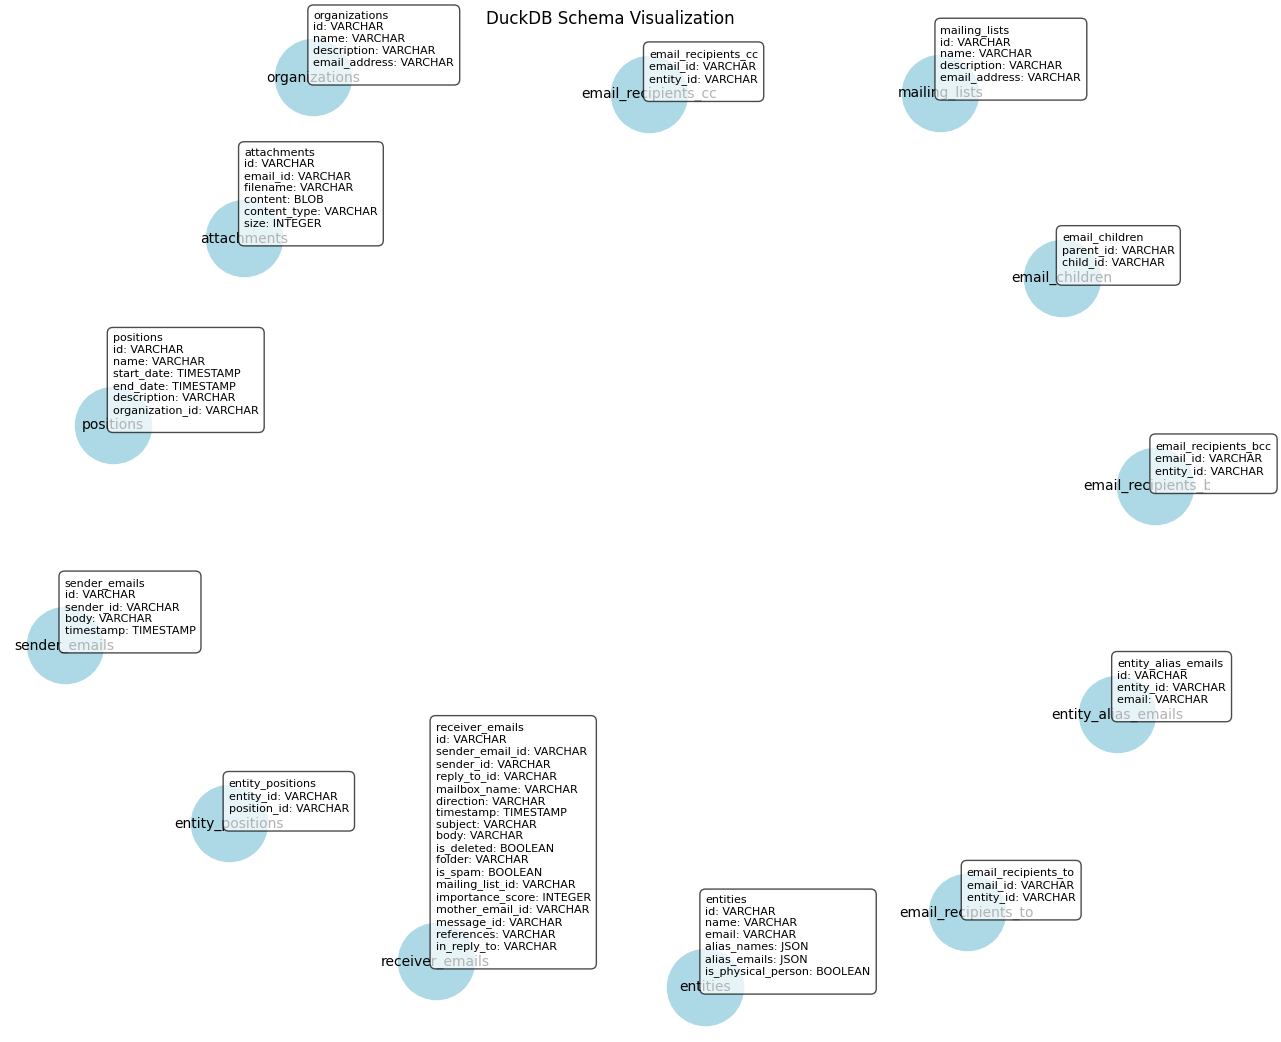

In [29]:
# Connect to your DuckDB database
# conn = duckdb.connect('your_database.db')  # or use ':memory:' for in-memory database

# Method 1: Get schema information as pandas DataFrame
def get_schema_as_dataframe():
    # Get all tables
    tables_df = duckdb_conn.execute("""
        SELECT table_schema, table_name
        FROM information_schema.tables
        WHERE table_schema != 'pg_catalog'
    """).df()

    # Get all columns with their data types
    columns_df = duckdb_conn.execute("""
        SELECT
            table_schema,
            table_name,
            column_name,
            data_type,
            is_nullable,
            column_default
        FROM information_schema.columns
        WHERE table_schema != 'pg_catalog'
        ORDER BY table_schema, table_name, ordinal_position
    """).df()

    return tables_df, columns_df

# Method 2: Print schema in a readable format
def print_schema():
    # Get all tables
    tables = duckdb_conn.execute("""
        SELECT table_name
        FROM information_schema.tables
        WHERE table_schema = 'main'
    """).fetchall()

    for table in tables:
        table_name = table[0]
        print(f"\n=== TABLE: {table_name} ===")

        # Get columns for this table
        columns = duckdb_conn.execute(f"""
            DESCRIBE {table_name}
        """).fetchall()

        # Print column information
        for col in columns:
            print(f"{col[0]}: {col[1]}")

# Method 3: Visualize schema using networkx and matplotlib
def visualize_schema():
    # Get tables and their columns
    tables_columns = duckdb_conn.execute("""
        SELECT
            table_name,
            column_name,
            data_type
        FROM information_schema.columns
        WHERE table_schema = 'main'
        ORDER BY table_name, ordinal_position
    """).fetchall()

    # Create a graph
    G = nx.DiGraph()

    # Group by tables
    tables = {}
    for table_name, column_name, data_type in tables_columns:
        if table_name not in tables:
            tables[table_name] = []
        tables[table_name].append((column_name, data_type))

    # Add nodes for tables
    for table_name, columns in tables.items():
        # Create label with table name and columns
        label = f"{table_name}\n"
        for col_name, col_type in columns:
            label += f"{col_name}: {col_type}\n"

        G.add_node(table_name, label=label)

    # Try to find foreign key relationships (this is simplified)
    # In a real scenario, you'd need to query DuckDB's constraints
    for table1 in tables:
        for table2 in tables:
            if table1 != table2:
                for col1_name, _ in tables[table1]:
                    if col1_name == f"{table2}_id":
                        G.add_edge(table1, table2)

    # Draw the graph
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=3000, arrows=True, font_size=10)

    # Add detailed labels
    labels = nx.get_node_attributes(G, 'label')
    text_items = {}
    for node, label in labels.items():
        text_items[node] = plt.annotate(label, xy=pos[node],
                                       xytext=(0, 0),
                                       textcoords="offset points",
                                       bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.7),
                                       fontsize=8)

    plt.title("DuckDB Schema Visualization")
    plt.show()

# Example usage:
tables_df, columns_df = get_schema_as_dataframe()
# display(tables_df)
# display(columns_df)

# print_schema()

visualize_schema()

In [30]:
print_schema()


=== TABLE: attachments ===
id: VARCHAR
email_id: VARCHAR
filename: VARCHAR
content: BLOB
content_type: VARCHAR
size: INTEGER

=== TABLE: email_children ===
parent_id: VARCHAR
child_id: VARCHAR

=== TABLE: email_recipients_bcc ===
email_id: VARCHAR
entity_id: VARCHAR

=== TABLE: email_recipients_cc ===
email_id: VARCHAR
entity_id: VARCHAR

=== TABLE: email_recipients_to ===
email_id: VARCHAR
entity_id: VARCHAR

=== TABLE: entities ===
id: VARCHAR
name: VARCHAR
email: VARCHAR
alias_names: JSON
alias_emails: JSON
is_physical_person: BOOLEAN

=== TABLE: entity_alias_emails ===
id: VARCHAR
entity_id: VARCHAR
email: VARCHAR

=== TABLE: entity_positions ===
entity_id: VARCHAR
position_id: VARCHAR

=== TABLE: mailing_lists ===
id: VARCHAR
name: VARCHAR
description: VARCHAR
email_address: VARCHAR

=== TABLE: organizations ===
id: VARCHAR
name: VARCHAR
description: VARCHAR
email_address: VARCHAR

=== TABLE: positions ===
id: VARCHAR
name: VARCHAR
start_date: TIMESTAMP
end_date: TIMESTAMP
descri

In [31]:

# Set pandas display option to show all columns
pd.set_option('display.max_columns', None)

In [32]:
analyzer =EmailAnalyzer(db_path)

df_db_cleaned = analyzer.get_comprehensive_email_dataset()
df_db_cleaned.head(2)


email_id  \
0  f33d91c0-c455-42a6-b5fb-188ce5e02141   
1  ffe963fa-7e47-4943-9905-712f2231ae10   

                                          message_id          mailbox_name  \
0  <ef84837018fc4f7ebed15d1a40374a9d@archivistes....  Boîte mail de Céline   
1    <1644247124553.20914@ch-bretagne-atlantique.fr>  Boîte mail de Céline   

  direction           timestamp  \
0  received 2022-07-05 13:22:37   
1  received 2022-02-07 15:18:44   

                                             subject  \
0  [aaf_adherents] AAF_élections : résultats des ...   
1  RE: [AAF_CA2019-2022] Liste d'adhésions à vali...   

                                                body              folder  \
0  Bonjour,\nComme vous le savez, nous avons proc...  Éléments supprimés   
1  ​Bonjour,\nC'est OK pour moi aussi.\nBonne fin...  Éléments supprimés   

   is_deleted  is_spam  importance_score  \
0       False    False                 0   
1       False    False                 0   

                                         in_reply_to  \
0                                                      
1  <d5485d890f264c22aba4ae2e906bdc64@departement-...   

                                          references  \
0                                                      
1  <01c1a62d748d4994a9a2f7eec6cd874d@archivistes....   

                              sender_id  \
0  560e14b1-a62b-4922-b966-a1d1a6f4275a   
1  96b63f75-24b3-48bb-99a4-cc6b37cd9f48   

                                         sender_name  \
0  Nicolas Didon - responsable de la vie associat...   
1                               FAIVRE DARCIER Louis   

                           sender_email  sender_is_person  \
0  aaf_adherents@listes.archivistes.org              True   
1     aaf_ca2019@listes.archivistes.org              True   

                            reply_to_id                        reply_to_name  \
0  c46771a9-8b54-47b9-809e-327a8a602c8d  AAF - Anne Clerc, déléguée générale   
1  96b63f75-24b3-48bb-99a4-cc6b37cd9f48                 FAIVRE DARCIER Louis   

                        reply_to_email                       mailing_list_id  \
0  delegation_generale@archivistes.org  6f80b792-0448-4013-97cd-e36bae144323   
1    aaf_ca2019@listes.archivistes.org  f32f6294-733e-4cdc-b4c3-26d4595ee6fa   

                      mailing_list_name            mailing_list_email  \
0  aaf_adherents.listes.archivistes.org  sympa@listes.archivistes.org   
1     aaf_ca2019.listes.archivistes.org  sympa@listes.archivistes.org   

   attachment_count                               attachment_filenames  \
0                 7  ATT00001.txt, 2022_pv_operations_electorales.p...   
1                 1                                       image001.jpg   

   total_attachment_size  child_email_count mother_email_id  \
0              1047778.0                  0            None   
1                 4614.0                  0            None   

                              entity_id  \
0  560e14b1-a62b-4922-b966-a1d1a6f4275a   
1  96b63f75-24b3-48bb-99a4-cc6b37cd9f48   

                                      recipient_name  \
0  Nicolas Didon - responsable de la vie associat...   
1                               FAIVRE DARCIER Louis   

                        recipient_email recipient_type  
0  aaf_adherents@listes.archivistes.org             to  
1     aaf_ca2019@listes.archivistes.org             to

In [33]:
df_db_cleaned[df_db_cleaned["sender_email"].isin(["celine.guyon@archivistes.org"])]


email_id  \
1297   63963e25-183a-45e0-9382-4874d91dd810   
1310   9025872c-f6f9-4458-8b43-d025063f2a9e   
1854   ed4fe81d-df83-48f5-aadc-9716ff521aca   
1865   2016f9e1-1ffb-4123-934c-724130706456   
1895   b03d6722-c2e2-43f7-b5c3-e65d3d67f473   
...                                     ...   
70503  fdc7faf1-4ee3-410b-b1b7-100c8282063c   
70509  a0daa1fa-92b1-4ddf-904c-66182818538e   
70526  fb7ea145-d140-4cbf-a205-fd38184318d9   
70532  2fa48c25-9581-424a-9e24-97766cc8b203   
70535  0ccedf5e-169c-4a61-ac5a-657696959399   

                                              message_id  \
1297   <f711b1c3d3d04e238fc3c1391a608d74@archivistes....   
1310   <02ba0c86cab647e3b410570389e0c03a@archivistes....   
1854   <895db602-2dcc-42f7-952e-0df451859bc6@email.an...   
1865   <a4c24db6-486a-4a80-a6d2-5d4ac73306a5@email.an...   
1895   <760df956-8f06-4db4-a3ab-5afaa2ce9f24@email.an...   
...                                                  ...   
70503  <ab3348c3-16ef-4c52-a8e2-0fa7d41f2c89@email.an...   
70509  <22ec827d-957e-47ed-bd21-d539c7184fc2@email.an...   
70526  <aafe7e54-38f8-4f0b-a518-74b5a5637edd@email.an...   
70532  <2899563c-39a6-4454-92e4-3770a7812c99@email.an...   
70535  <19d31ffb-6d65-4ede-be27-52915863464e@email.an...   

               mailbox_name direction           timestamp  \
1297   Boîte mail de Céline      sent 2019-06-03 13:32:42   
1310   Boîte mail de Céline  received 2021-10-12 12:07:20   
1854   Boîte mail de Céline      sent 2021-07-23 15:50:21   
1865   Boîte mail de Céline      sent 2019-10-04 15:43:51   
1895   Boîte mail de Céline      sent 2021-07-28 14:26:37   
...                     ...       ...                 ...   
70503  Boîte mail de Céline      sent 2020-05-05 19:43:22   
70509  Boîte mail de Céline      sent 2019-10-21 07:52:19   
70526  Boîte mail de Céline      sent 2019-06-11 18:05:36   
70532  Boîte mail de Céline      sent 2021-06-10 07:57:23   
70535  Boîte mail de Céline      sent 2021-04-28 19:20:34   

                                                 subject  \
1297   TR: groupe de travail LDH histoire-mémoire-arc...   
1310   RE: [aaf-pin20ans] Rappel : Réunion point orga...   
1854                                                       
1865                                                       
1895                                   Fwd: le programme   
...                                                  ...   
70503                                                      
70509                     Conseil supérieur des archives   
70526                                  Re: guide CT RGPD   
70532  RE: [AAF_CA2019-2022] Modification délais comm...   
70535                                 Accès aux archives   

                                                    body              folder  \
1297   De : agnès dejob <agnesdejob@hotmail.com>\nEnv...  Boîte de réception   
1310   Bonjour,\nAvec toutes mes excuses mais je ne p...  Boîte de réception   
1854                                                        Éléments envoyés   
1865                                                        Éléments envoyés   
1895   Claire,Voici le programmeJe pense qu'il doit y...    Éléments envoyés   
...                                                  ...                 ...   
70503  http://www.la27eregion.fr/pour-preparer-demain...    Éléments envoyés   
70509  BonjourA titre personnel, je ne pourrais pas p...    Éléments envoyés   
70526  Bonsoir Anne Laure Oui bien sûr !L'appel à con...    Éléments envoyés   
70532  Bonjoursi bien sûr les systèmes d'information ...    Éléments envoyés   
70535  Bonsoir,On a commencé à rédiger un communiqué ...    Éléments envoyés   

       is_deleted  is_spam  importance_score  \
1297        False    False                 0   
1310        False    False                 0   
1854        False    False                 0   
1865        False    False                 0   
1895        False    False                 0   
...           ...      ...               ...  

In [34]:
df_db_cleaned.folder.value_counts()

folder
Boîte de réception                          58342
Éléments envoyés                             7232
Boîte de réception/Archives calssifiees      3409
Éléments supprimés                            738
Boîte de réception/gestioncrise               270
Boîte de réception/RH                         242
Boîte de réception/Instances                  116
Boîte de réception/Plaidoyer                   84
Courrier indésirable                           70
Boîte de réception/gestioncrise/Ateliers       56
Brouillons                                     47
Archive                                        40
Boîte de réception/Idees                       18
Boîte de réception/Gazette                     18
Boîte de réception/AG                          15
Boîte de réception/Conflit                     12
Boîte de réception/Formation à distance         2
Name: count, dtype: int64

In [35]:
df_db_cleaned["body"].duplicated().value_counts()

body
True     52107
False    18604
Name: count, dtype: int64

In [36]:
df_receiver = analyzer.get_receiver_emails()

In [37]:
df_receiver

id  \
0      c9830d87-f4b6-4097-96da-3b15c2ba0474   
1      2891b1ca-3ebd-4ace-a208-2673230b1f33   
2      120256e8-ab92-49e1-b573-0015c6621ccc   
3      90cb9ca1-a5ad-4157-a44e-41c8d9285561   
4      986abe57-8b63-422f-855d-64cb99cb61c5   
...                                     ...   
19132  f0236208-5c41-4a83-9dc0-01b26c7ccc83   
19133  c0d006c4-fc80-4804-8882-72561cb9790e   
19134  ae085001-6e14-45fd-a045-66f87b5da5b9   
19135  d756904d-9425-4360-a3bf-7e265a07327c   
19136  0b394553-d7c7-402a-b6e0-b77bd66d689a   

                            sender_email_id  \
0      bf0681a2-703c-47e6-b9b3-cb54fe6d9f76   
1      63ae81aa-5339-4098-9de1-fefaad80c0b0   
2      b25c7820-7f4e-419a-b41c-dcbb75b28c25   
3      9f67a62c-d79e-4107-a61f-baf161d597e5   
4      152c0bc0-823a-4749-826b-8e4f31f894f9   
...                                     ...   
19132  3c434c15-b7dc-4865-b566-db6553e3f63b   
19133  bf2ed04c-5ba1-4b25-80d4-dc9b921f31b9   
19134  5a601767-f682-4eb2-923f-e4a3652664d7   
19135  0111999b-b826-4e51-8186-e548f8b694c8   
19136  594d5b46-589a-4dee-9e62-76f98d8b52d1   

                                  sender_id  \
0      03f79e06-aa69-4e14-8627-756ffccff430   
1      bfa7c6f0-c68c-4a54-a21d-da9b2b490434   
2      3e90f228-6d02-4591-b09f-8bd68571feb7   
3      291c73b7-55bb-44b3-b914-a271a744d45c   
4      62c86822-e3bf-4af1-b47a-77515f058aa9   
...                                     ...   
19132  1d3cfeb8-f470-4738-a528-b911756677ef   
19133  1d3cfeb8-f470-4738-a528-b911756677ef   
19134  a8d60b7a-6cdd-41eb-8162-e6f1f2bee168   
19135  e7429f43-9ea3-4dc8-8541-652d8d3df86e   
19136  a8d60b7a-6cdd-41eb-8162-e6f1f2bee168   

                                reply_to_id          mailbox_name direction  \
0                                      None  Boîte mail de Céline  received   
1                                      None  Boîte mail de Céline  received   
2      3e90f228-6d02-4591-b09f-8bd68571feb7  Boîte mail de Céline  received   
3      291c73b7-55bb-44b3-b914-a271a744d45c  Boîte mail de Céline  received   
4                                      None  Boîte mail de Céline  received   
...                                     ...                   ...       ...   
19132                                  None  Boîte mail de Céline  received   
19133  1d3cfeb8-f470-4738-a528-b911756677ef  Boîte mail de Céline  received   
19134                                  None  Boîte mail de Céline  received   
19135                                  None  Boîte mail de Céline  received   
19136                                  None  Boîte mail de Céline  received   

                timestamp                                            subject  \
0     2022-09-18 11:24:42  [SPAM] Fwd: Congé office sans solde, fonds de ...   
1     2022-06-08 12:48:17  [SPAM] Fwd: traitements efficaces précoces pou...   
2     2023-11-20 02:16:21  [SPAM] [hco-info] Projection-débat : L'Algérie...   
3     2021-06-02 09:24:34                                Re: [AAF_Bureau] RH   
4     2021-07-09 22:56:50                                      [SPAM] Hello,   
...                   ...                                                ...   
19132 2019-10-10 14:48:49                Forum Changer d'ère » Flora Fischer   
19133 2019-10-08 20:54:02                            Re: Tweet Gazette Forum   
19134 2020-01-24 16:07:12  La Gazette des archives n° 256 « La Francophon...   
19135 2019-10-08 19:25:02                                   Comite rédaction   
19136 2019-10-09 09:06:31                            RE: Tweet Gazette Forum   

                                                    body  is_deleted  \
0      Pour se désinscrire et tout contact 30/08/22 M...       False   
1      Pour se désinscrire et tout contact 5/06/22\np...       False   
2                                                              False   
3      Bonjour,\nC'est une blague?\nHélène\nDISC/ Ser...       False   
4      Hello my dear,\nI sent this mail praying it wi...       False   
... 

In [38]:
app_df = analyzer.get_app_DataFrame()
app_df.head(2)

message_id                date  \
0  <f66e651d-b510-3c0d-16db-65fb55363de3@efutura.fr> 2022-04-28 15:43:49   
1  <963b4bc3e6f94e7b856bfe985b8bd5e8@archivistes.... 2022-02-07 12:13:29   

           mailbox_name direction                         from  \
0  Boîte mail de Céline  received           contact@efutura.fr   
1  Boîte mail de Céline  received  secretariat@archivistes.org   

                                                  to  \
0                                 contact@efutura.fr   
1  celine.guyon@archivistes.org, francoise.hiraux...   

                                            cc  \
0  secretaire@efutura.fr, president@efutura.fr   
1                                         None   

                                      subject  \
0  [SPAM] [eFutura] Livre blanc à télécharger   
1         Point d'étape - Gazette engagement    

                                                body  \
0  Chers adhérents,\nSuite à la réunion de bureau...   
1  BEGIN:VCALENDAR\nVERSION:2.0\nPRODID:LibPST v0...   

                      attachments  has_attachments               mailbox  
0                 [logo_mail.jpg]             True  Courrier indésirable  
1  [i376116054.ics, rtf-body.rtf]             True    Éléments supprimés

good sur le papier mais pas en vrai: 5506 <>mail nom

In [39]:
app_df[app_df["to"] == "presidence@archivistes.org"]

message_id                date  \
14940  <bf158729fd3f40c9b1842df1213898f2@culture.gouv... 2020-04-02 06:48:53   
16265        <53ded80dad99237010e0e1e56ca66500@e-mrs.fr> 2020-09-25 18:01:06   

               mailbox_name direction                                  from  \
14940  Boîte mail de Céline  received        dominique.naud@culture.gouv.fr   
16265  Boîte mail de Céline  received  aaf_adherents@listes.archivistes.org   

                               to  \
14940  presidence@archivistes.org   
16265  presidence@archivistes.org   

                                                      cc  \
14940  francoise.banat-berger@culture.gouv.fr, cather...   
16265               aaf_adherents@listes.archivistes.org   

                                                 subject  \
14940   Référentiel et notices d’autorité producteurs...   
16265  Re: [aaf_adherents] Archives classifiées secre...   

                                                    body attachments  \
14940  Bonjour,\nL’AAF et le SIAF sont partenaires su...          []   
16265  Bonsoir,\nSimplement pour vous dire combien j'...          []   

       has_attachments                                  mailbox  
14940            False                       Boîte de réception  
16265            False  Boîte de réception/Archives calssifiees

In [40]:
app_df[app_df["to"] == "violette.levy@culture.gouv.fr"].head(1)

message_id                date  \
2284  <52ca83a124044796ab0db061f2f3ed71@archivistes.... 2020-03-16 12:52:32   

              mailbox_name direction                 from  \
2284  Boîte mail de Céline      sent  unknown@example.com   

                                 to    cc  \
2284  violette.levy@culture.gouv.fr  None   

                                      subject  \
2284  RE: Abrégé : propositions de couverture   

                                                   body     attachments  \
2284  bonjour,\nJe vous rejoins sur la deuxième prop...  [image003.jpg]   

      has_attachments           mailbox  
2284             True  Éléments envoyés

In [41]:
app_df["from"].value_counts()

from
unknown@example.com                    5354
delegation_generale@archivistes.org    1785
aaf_ca2019@listes.archivistes.org      1392
rbranche@parisnanterre.fr               660
pierremansat@gmail.com                  584
                                       ... 
louis.colombani@anaphore.eu               1
i.vernus@saoneetloire71.fr                1
claire.gaillard@enssib.fr                 1
valerie.rondelli@ville-menton.fr          1
sylvia.skoric.fd@clb-an.fr                1
Name: count, Length: 513, dtype: int64

In [42]:
app_df["to"].value_counts()

to
unknown@example.com                                                                                                     4374
celine.guyon@archivistes.org                                                                                            3338
aaf_ca2019@listes.archivistes.org                                                                                       1775
aaf_bureau@listes.archivistes.org                                                                                        567
aaf_adherents@listes.archivistes.org                                                                                     462
                                                                                                                        ... 
xavier.cailleau@wikimedia.fr, helene.chambefort@inserm.fr, delegation_generale@archivistes.org                             1
formation@archivistes.org, laurent.ducol@saint-gobain.com, celine.guyon@archivistes.org                                   

In [43]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from anytree import Node, RenderTree
# from anytree.exporter import DotExporter
# import graphviz

# # Sample data from value_counts (let's assume it's in a Series)
# data = {
#     "celine.guyon/Boîte de réception": 12499,
#     "celine.guyon/Éléments envoyés": 5559,
#     "celine.guyon/Boîte de réception/Archives calssifiees": 423,
#     "celine.guyon/Éléments supprimés": 277,
#     "celine.guyon/Boîte de réception/gestioncrise": 75,
#     "celine.guyon/Boîte de réception/Instances": 60,
#     "celine.guyon/Courrier indésirable": 45,
#     "celine.guyon/Brouillons": 41,
#     "celine.guyon/Boîte de réception/RH": 40,
#     "celine.guyon/Boîte de réception/Plaidoyer": 38,
#     "celine.guyon/Boîte de réception/gestioncrise/Ateliers": 28,
#     "root": 20,
#     "celine.guyon/Boîte de réception/Idees": 18,
#     "celine.guyon/Archive": 10,
#     "celine.guyon/Boîte de réception/Gazette": 10,
#     "celine.guyon/Boîte de réception/AG": 6,
#     "celine.guyon/Boîte de réception/Conflit": 6,
#     "celine.guyon/Boîte de réception/Formation à distance": 2
# }

# folder_counts = pd.Series(data)

# # Create a dictionary to hold our folder tree
# def create_folder_tree(folder_counts):
#     # Create the root node
#     root = Node("root", count=folder_counts.get("root", 0))
#     nodes = {"root": root}

#     # Process each path in the folder_counts
#     for path, count in folder_counts.items():
#         if path == "root":
#             continue

#         # Split the path into components
#         parts = path.split('/')

#         # Build the path incrementally
#         current_path = ""
#         parent_path = "root"

#         for i, part in enumerate(parts):
#             if current_path:
#                 current_path += "/" + part
#             else:
#                 current_path = part

#             # Skip if this node already exists
#             if current_path in nodes:
#                 parent_path = current_path
#                 continue

#             # Create a new node with the count if this is the full path
#             node_count = count if i == len(parts) - 1 else 0

#             # Otherwise create a placeholder node with count 0
#             nodes[current_path] = Node(part, parent=nodes[parent_path], count=node_count)
#             parent_path = current_path

#     return root

# # Create the tree
# folder_tree = create_folder_tree(folder_counts)

# # Print the tree structure with counts
# print("Folder Structure:")
# for pre, _, node in RenderTree(folder_tree):
#     print(f"{pre}{node.name} ({node.count})")

# # Create a visual representation using graphviz
# def node_attributes(node):
#     # Scale node size based on count (log scale to handle large differences)
#     if node.count > 0:
#         size = max(1, min(3, 0.5 + np.log10(node.count) / 2))
#         label = f"{node.name}\n({node.count})"
#         return f'label="{label}", shape="box", style="filled", fillcolor="lightblue", width="{size}", height="{size/2}"'
#     else:
#         return f'label="{node.name}", shape="box"'

# # Export to dot format
# DotExporter(folder_tree,
#             nodeattrfunc=node_attributes,
#             edgeattrfunc=lambda parent, child: 'penwidth=1.2'
#            ).to_picture("mailbox_tree.png")

# # Display the image
# from IPython.display import Image
# Image("mailbox_tree.png")

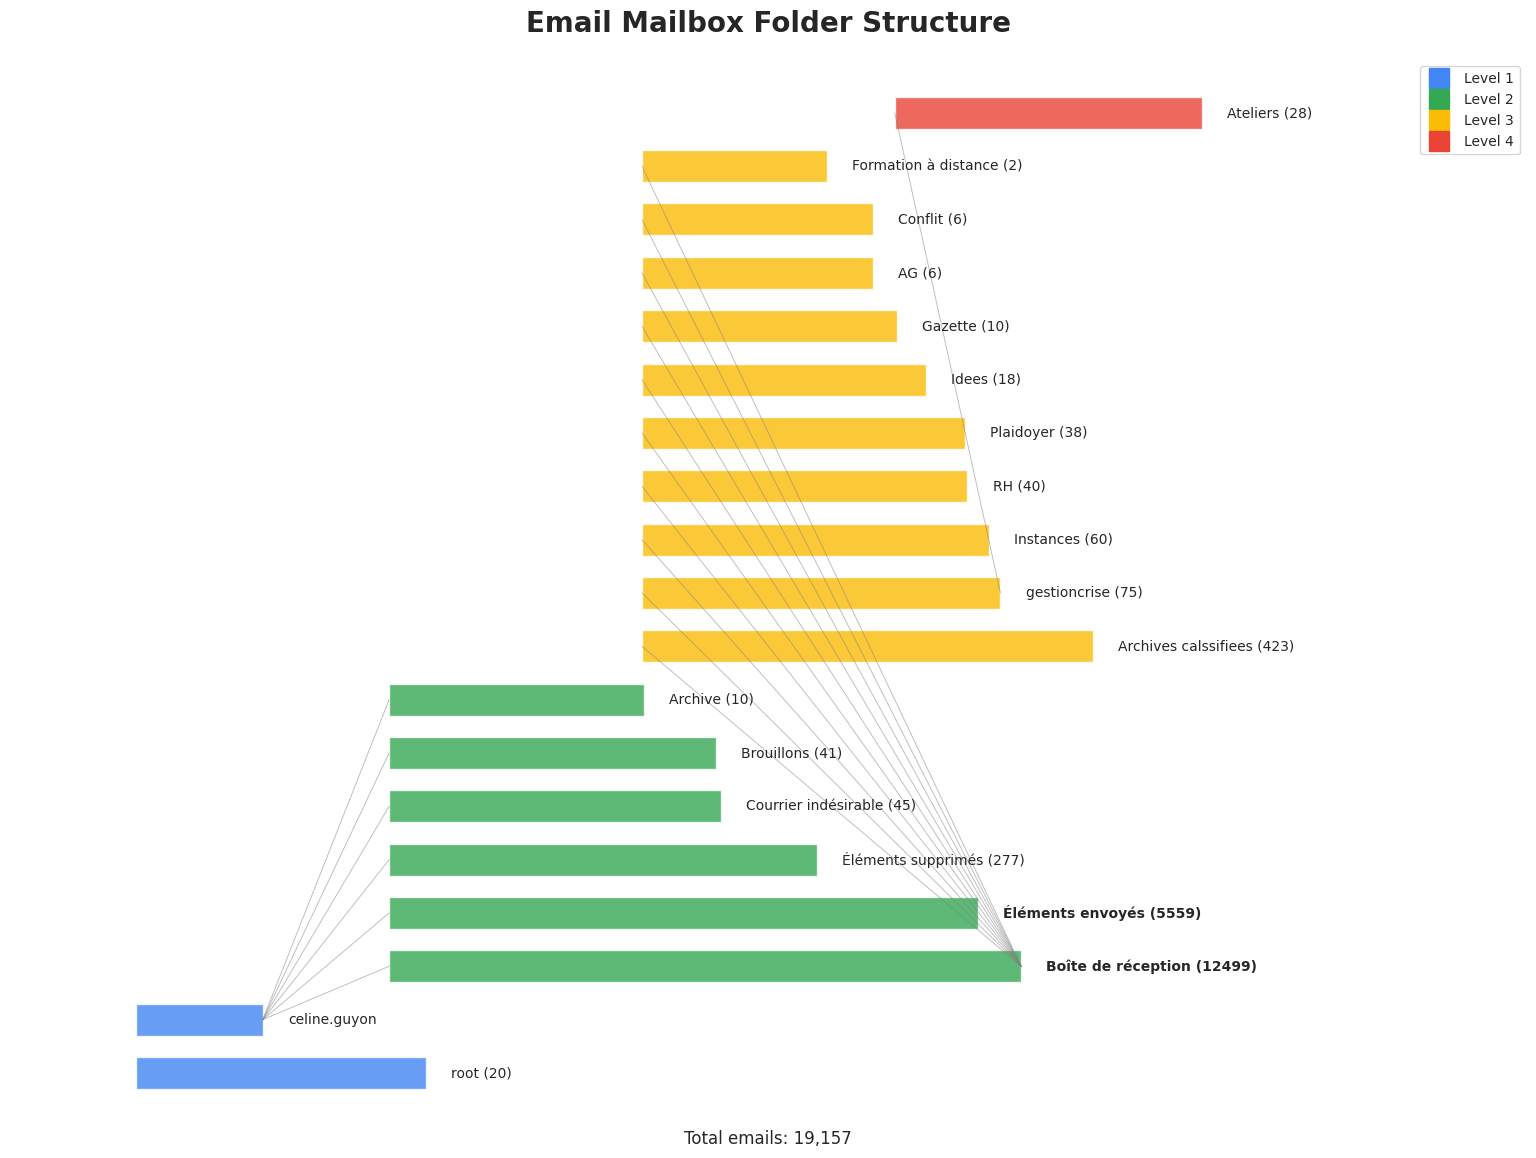

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Sample data from value_counts
data = {
    "celine.guyon/Boîte de réception": 12499,
    "celine.guyon/Éléments envoyés": 5559,
    "celine.guyon/Boîte de réception/Archives calssifiees": 423,
    "celine.guyon/Éléments supprimés": 277,
    "celine.guyon/Boîte de réception/gestioncrise": 75,
    "celine.guyon/Boîte de réception/Instances": 60,
    "celine.guyon/Courrier indésirable": 45,
    "celine.guyon/Brouillons": 41,
    "celine.guyon/Boîte de réception/RH": 40,
    "celine.guyon/Boîte de réception/Plaidoyer": 38,
    "celine.guyon/Boîte de réception/gestioncrise/Ateliers": 28,
    "root": 20,
    "celine.guyon/Boîte de réception/Idees": 18,
    "celine.guyon/Archive": 10,
    "celine.guyon/Boîte de réception/Gazette": 10,
    "celine.guyon/Boîte de réception/AG": 6,
    "celine.guyon/Boîte de réception/Conflit": 6,
    "celine.guyon/Boîte de réception/Formation à distance": 2
}

folder_counts = pd.Series(data)

# Process data for visualization
df = pd.DataFrame({'path': folder_counts.index, 'count': folder_counts.values})

# Function to parse folder structure
def parse_folder_structure(df):
    # Extract folder levels
    df['levels'] = df['path'].str.split('/')
    df['depth'] = df['levels'].apply(len)
    df['folder'] = df['levels'].apply(lambda x: x[-1])

    # Create parent-child relationships
    result = []
    for _, row in df.iterrows():
        levels = row['levels']
        for i in range(len(levels)):
            if i == 0:
                parent = "ROOT"
            else:
                parent = '/'.join(levels[:i])

            current = '/'.join(levels[:i+1])

            # Only add counts to complete paths
            count = row['count'] if current == row['path'] else 0

            result.append({
                'parent': parent,
                'path': current,
                'folder': levels[i],
                'count': count,
                'depth': i+1
            })

    # Convert to DataFrame and aggregate duplicate entries
    result_df = pd.DataFrame(result)
    aggregated = result_df.groupby(['parent', 'path', 'folder', 'depth']).sum().reset_index()

    return aggregated

# Parse the folder structure
folder_structure = parse_folder_structure(df)

# Custom visualization with matplotlib
def plot_folder_structure(folder_structure):
    # Get unique depths
    max_depth = folder_structure['depth'].max()

    # Create figure with custom size
    plt.figure(figsize=(16, 12))

    # Define a custom colormap
    colors = ['#4285F4', '#34A853', '#FBBC05', '#EA4335', '#8E24AA', '#0097A7']
    n_colors = len(colors)
    custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=n_colors)

    # Set the style
    sns.set_style("whitegrid")

    # Plot data
    y_positions = []
    y_position = 0
    labels = []
    sizes = []
    colors = []
    parents = []
    paths = []

    # Process each depth level
    for depth in range(1, max_depth + 1):
        level_data = folder_structure[folder_structure['depth'] == depth]
        level_data = level_data.sort_values('count', ascending=False)

        for _, row in level_data.iterrows():
            # Store position and data
            y_positions.append(y_position)
            labels.append(row['folder'])
            paths.append(row['path'])
            parents.append(row['parent'])

            # Calculate size (width of bar)
            count = row['count']
            # Log scale for better visualization
            size = 0.5 + (np.log1p(count) / np.log1p(folder_structure['count'].max())) * 2 if count > 0 else 0.5
            sizes.append(size)

            # Assign color based on depth
            color_idx = (depth - 1) % n_colors
            colors.append(custom_cmap(color_idx))

            y_position += 1

    # Create horizontal bars
    for i, (y, label, size, color, parent, path) in enumerate(zip(y_positions, labels, sizes, colors, parents, paths)):
        x = folder_structure.loc[folder_structure['path'] == path, 'depth'].values[0] - 0.5

        # Draw the bar
        plt.barh(y, size, left=x, height=0.6, color=color, alpha=0.8,
                 edgecolor='white', linewidth=1)

        # Add label
        count = folder_structure.loc[folder_structure['path'] == path, 'count'].values[0]
        if count > 0:
            label_text = f"{label} ({count})"
        else:
            label_text = label

        # Adjust text position based on bar size
        plt.text(x + size + 0.1, y, label_text, va='center', fontsize=10,
                 fontweight='bold' if count > 500 else 'normal')

        # Draw connector lines to parent
        if parent != "ROOT":
            # Find parent's position
            parent_indices = [j for j, p in enumerate(paths) if p == parent]
            if parent_indices:
                parent_y = y_positions[parent_indices[0]]
                parent_x = folder_structure.loc[folder_structure['path'] == parent, 'depth'].values[0] - 0.5
                parent_size = sizes[parent_indices[0]]

                # Draw a curved line connecting parent and child
                plt.plot([parent_x + parent_size, x], [parent_y, y], 'gray',
                         linestyle='-', linewidth=0.7, alpha=0.5)

    # Set the limits and labels
    plt.xlim(0, max_depth + 2)
    plt.ylim(-1, len(y_positions))

    # Remove axes
    plt.axis('off')

    # Add title and styling
    plt.title('Email Mailbox Folder Structure', fontsize=20, pad=20, fontweight='bold')

    # Add legend for depth levels
    legend_elements = []
    for d in range(1, min(max_depth+1, 7)):
        color_idx = (d - 1) % n_colors
        legend_elements.append(plt.Line2D([0], [0], color=custom_cmap(color_idx), lw=0,
                                         marker='s', markersize=15,
                                         label=f'Level {d}'))

    plt.legend(handles=legend_elements, loc='upper right', frameon=True)

    # Add a description
    total_emails = folder_structure['count'].sum()
    plt.figtext(0.5, 0.02, f"Total emails: {total_emails:,}", ha="center", fontsize=12)

    plt.tight_layout(pad=3)
    return plt

# Create and display the visualization
plot = plot_folder_structure(folder_structure)
plot.savefig('mailbox_structure.png', dpi=300, bbox_inches='tight')
plot.show()

In [51]:
df_db_cleaned["recipient_email"].value_counts()

recipient_email
celine.guyon@archivistes.org           10658
unknown@example.com                     5735
delegation_generale@archivistes.org     3243
thomasvaisset@gmail.com                 2227
noewagener@protonmail.com               2067
                                       ...  
françoise.janin@culture.gouv.fr            1
mt.conseil283@orange.fr                    1
franckcormerais@gmail.com                  1
patrice.latron@intradef.gouv.fr            1
sonia.dollinger@mairie-beaune.gr           1
Name: count, Length: 1500, dtype: int64

In [49]:
df_db_cleaned.shape

(70711, 32)

In [45]:
df_db_cleaned.columns

Index(['email_id', 'message_id', 'mailbox_name', 'direction', 'timestamp',
       'subject', 'body', 'folder', 'is_deleted', 'is_spam',
       'importance_score', 'in_reply_to', 'references', 'sender_id',
       'sender_name', 'sender_email', 'sender_is_person', 'reply_to_id',
       'reply_to_name', 'reply_to_email', 'mailing_list_id',
       'mailing_list_name', 'mailing_list_email', 'attachment_count',
       'attachment_filenames', 'total_attachment_size', 'child_email_count',
       'mother_email_id', 'entity_id', 'recipient_name', 'recipient_email',
       'recipient_type'],
      dtype='object')

In [46]:
df_db_cleaned.head(2)

email_id  \
0  f33d91c0-c455-42a6-b5fb-188ce5e02141   
1  ffe963fa-7e47-4943-9905-712f2231ae10   

                                          message_id          mailbox_name  \
0  <ef84837018fc4f7ebed15d1a40374a9d@archivistes....  Boîte mail de Céline   
1    <1644247124553.20914@ch-bretagne-atlantique.fr>  Boîte mail de Céline   

  direction           timestamp  \
0  received 2022-07-05 13:22:37   
1  received 2022-02-07 15:18:44   

                                             subject  \
0  [aaf_adherents] AAF_élections : résultats des ...   
1  RE: [AAF_CA2019-2022] Liste d'adhésions à vali...   

                                                body              folder  \
0  Bonjour,\nComme vous le savez, nous avons proc...  Éléments supprimés   
1  ​Bonjour,\nC'est OK pour moi aussi.\nBonne fin...  Éléments supprimés   

   is_deleted  is_spam  importance_score  \
0       False    False                 0   
1       False    False                 0   

                                         in_reply_to  \
0                                                      
1  <d5485d890f264c22aba4ae2e906bdc64@departement-...   

                                          references  \
0                                                      
1  <01c1a62d748d4994a9a2f7eec6cd874d@archivistes....   

                              sender_id  \
0  560e14b1-a62b-4922-b966-a1d1a6f4275a   
1  96b63f75-24b3-48bb-99a4-cc6b37cd9f48   

                                         sender_name  \
0  Nicolas Didon - responsable de la vie associat...   
1                               FAIVRE DARCIER Louis   

                           sender_email  sender_is_person  \
0  aaf_adherents@listes.archivistes.org              True   
1     aaf_ca2019@listes.archivistes.org              True   

                            reply_to_id                        reply_to_name  \
0  c46771a9-8b54-47b9-809e-327a8a602c8d  AAF - Anne Clerc, déléguée générale   
1  96b63f75-24b3-48bb-99a4-cc6b37cd9f48                 FAIVRE DARCIER Louis   

                        reply_to_email                       mailing_list_id  \
0  delegation_generale@archivistes.org  6f80b792-0448-4013-97cd-e36bae144323   
1    aaf_ca2019@listes.archivistes.org  f32f6294-733e-4cdc-b4c3-26d4595ee6fa   

                      mailing_list_name            mailing_list_email  \
0  aaf_adherents.listes.archivistes.org  sympa@listes.archivistes.org   
1     aaf_ca2019.listes.archivistes.org  sympa@listes.archivistes.org   

   attachment_count                               attachment_filenames  \
0                 7  ATT00001.txt, 2022_pv_operations_electorales.p...   
1                 1                                       image001.jpg   

   total_attachment_size  child_email_count mother_email_id  \
0              1047778.0                  0            None   
1                 4614.0                  0            None   

                              entity_id  \
0  560e14b1-a62b-4922-b966-a1d1a6f4275a   
1  96b63f75-24b3-48bb-99a4-cc6b37cd9f48   

                                      recipient_name  \
0  Nicolas Didon - responsable de la vie associat...   
1                               FAIVRE DARCIER Louis   

                        recipient_email recipient_type  
0  aaf_adherents@listes.archivistes.org             to  
1     aaf_ca2019@listes.archivistes.org             to

In [48]:
df_db_cleaned[df_db_cleaned["to"] == "presidence@archivistes.org"]


KeyError: 'to'

In [ ]:
# duckdb_conn.execute("ALTER TABLE receiver_emails DROP COLUMN IF EXISTS embedding;")
# duckdb_conn.execute("ALTER TABLE receiver_emails ADD COLUMN embedding FLOAT[384];")

duckdb_conn.execute("ALTER TABLE receiver_emails ADD COLUMN IF NOT EXISTS embedding_tiny FLOAT[384];")
# duckdb_conn.execute("ALTER TABLE receiver_emails ADD COLUMN embedding_tiny FLOAT[384];")

In [ ]:

# Drop the embeddings table if it exists
duckdb_conn.execute("DROP TABLE IF EXISTS embeddings;")

In [ ]:
duckdb_conn.execute("""
    CREATE TABLE IF NOT EXISTS embeddings (
        email_id VARCHAR PRIMARY KEY,  -- Changed to VARCHAR to match receiver_emails(id)
        embedding_tiny BLOB,
        FOREIGN KEY (email_id) REFERENCES receiver_emails(id)
    );
""")

In [ ]:
# Describe the table to get the schema, which might show relationships
result = duckdb_conn.execute("DESCRIBE receiver_emails").fetchall()

# Print the schema result
print(result)


[('id', 'VARCHAR', 'NO', 'PRI', None, None), ('sender_email_id', 'VARCHAR', 'YES', None, None, None), ('sender_id', 'VARCHAR', 'YES', None, None, None), ('reply_to_id', 'VARCHAR', 'YES', None, None, None), ('mailbox_name', 'VARCHAR', 'YES', None, None, None), ('direction', 'VARCHAR', 'YES', None, None, None), ('timestamp', 'TIMESTAMP', 'YES', None, None, None), ('subject', 'VARCHAR', 'YES', None, None, None), ('body', 'VARCHAR', 'YES', None, None, None), ('is_deleted', 'BOOLEAN', 'YES', None, "CAST('f' AS BOOLEAN)", None), ('folder', 'VARCHAR', 'YES', None, "'inbox'", None), ('is_spam', 'BOOLEAN', 'YES', None, "CAST('f' AS BOOLEAN)", None), ('mailing_list_id', 'VARCHAR', 'YES', None, None, None), ('importance_score', 'INTEGER', 'YES', None, '0', None), ('mother_email_id', 'VARCHAR', 'YES', None, None, None), ('message_id', 'VARCHAR', 'YES', None, None, None), ('references', 'VARCHAR', 'YES', None, None, None), ('in_reply_to', 'VARCHAR', 'YES', None, None, None), ('embedding_tiny', 'FLO

In [ ]:
email_id = "f711645f-fa07-4637-9476-0eae7c71a305"
result = duckdb_conn.execute("SELECT id FROM receiver_emails WHERE id = ?", (email_id,)).fetchall()
if not result:
    print(f"Email ID {email_id} does not exist!")
else:
    # Proceed with the update logic
    print(f"Email ID {email_id} found, proceeding with embedding update.")


Email ID f711645f-fa07-4637-9476-0eae7c71a305 does not exist!


In [ ]:
# from sentence_transformers import SentenceTransformer
# import duckdb
# import numpy as np

# model = SentenceTransformer('all-MiniLM-L6-v2')

# def embed_emails(conn: duckdb.DuckDBPyConnection, limit: int = 100, log_every: int = 100, embedding_col_name: str = 'embedding_tiny') -> bool:
#     # Select emails without an embedding (from receiver_emails table)
#     rows = conn.execute(f"""
#         SELECT id, subject, body
#         FROM receiver_emails
#         WHERE id NOT IN (SELECT email_id FROM embeddings)
#         LIMIT ?
#     """, (limit,)).fetchall()

#     total = len(rows)
#     print(f"Found {total} emails to embed.")

#     # Example update logic with additional checks for consistency
#     for idx, row in enumerate(rows, start=1):
#         email_id, subject, body = row
#         combined_text = f"{subject or ''} {body or ''}".strip()
#         print(f"Processing email ID: {email_id}")

#         # Check if the email_id exists before proceeding
#         result = duckdb_conn.execute("SELECT id FROM receiver_emails WHERE id = ?", (email_id,)).fetchall()
#         if not result:
#             print(f"Warning: Email ID {email_id} not found. Skipping.")
#             continue

#         # Generate the embedding
#         embedding = model.encode(combined_text)

#         # Sanity check
#         if len(embedding) != 384:
#             raise ValueError("Embedding must be 384-dimensional")

#         # Insert embedding into the embeddings table
#         duckdb_conn.execute(f"""
#             INSERT INTO embeddings (email_id, {embedding_col_name})
#             VALUES (?, ?)
#         """, (email_id, embedding.tobytes()))  # Convert numpy array to bytes for storage

#         if idx % log_every == 0 or idx == total:
#             print(f"[{idx}/{total}] Embedded and inserted email ID: {email_id}")

#     print(f"✅ All done. Updated {total} rows with embeddings.")

#     return True


# # Example usage
# embed_emails(duckdb_conn, limit=30000)


In [ ]:
# from sentence_transformers import SentenceTransformer
# import duckdb
# import numpy as np

# model = SentenceTransformer('all-MiniLM-L6-v2')

# def embed_emails(conn: duckdb.DuckDBPyConnection, limit: int = 100, log_every: int = 100, embedding_col_name: str = 'embedding_tiny') -> bool:
#     # Select emails without an embedding (from receiver_emails table)
#     rows = conn.execute(f"""
#         SELECT id, subject, body
#         FROM receiver_emails
#         WHERE id NOT IN (SELECT email_id FROM embeddings)
#         LIMIT ?
#     """, (limit,)).fetchall()

#     total = len(rows)
#     print(f"Found {total} emails to embed.")

#     # Example update logic with additional checks for consistency
#     for idx, row in enumerate(rows, start=1):
#         email_id, subject, body = row
#         combined_text = f"{subject or ''} {body or ''}".strip()

#         # Check if the email_id exists before proceeding
#         result = duckdb_conn.execute("SELECT id FROM receiver_emails WHERE id = ?", (email_id,)).fetchall()
#         if not result:
#             print(f"Warning: Email ID {email_id} not found. Skipping.")
#             continue

#         # Generate the embedding
#         embedding = model.encode(combined_text)

#         # Sanity check
#         if len(embedding) != 384:
#             raise ValueError("Embedding must be 384-dimensional")

#         # Insert embedding into the embeddings table
#         duckdb_conn.execute(f"""
#             INSERT INTO embeddings (email_id, {embedding_col_name})
#             VALUES (?, ?)
#         """, (email_id, embedding.tobytes()))  # Convert numpy array to bytes for storage

#         # Log progress as percentage completion
#         if idx % log_every == 0 or idx == total:
#             percent_complete = (idx / total) * 100
#             print(f"[{percent_complete:.2f}%] Embedded {idx}/{total} emails")

#     print(f"✅ All done. Embedded {total} emails.")

#     return True


# # Example usage
# embed_emails(duckdb_conn, limit=30000)


In [ ]:
## Version probably fonctional for research

In [ ]:
# from sentence_transformers import SentenceTransformer
# import duckdb
# import numpy as np
# import gc  # Garbage collection to release memory

# model = SentenceTransformer('all-MiniLM-L6-v2')

# def embed_emails(conn: duckdb.DuckDBPyConnection, limit: int = 100, log_every: int = 100, embedding_col_name: str = 'embedding_tiny') -> bool:
#     # Select emails without an embedding (from receiver_emails table)
#     rows = conn.execute(f"""
#         SELECT id, subject, body
#         FROM receiver_emails
#         WHERE id NOT IN (SELECT email_id FROM embeddings)
#         LIMIT ?
#     """, (limit,)).fetchall()

#     total = len(rows)
#     print(f"Found {total} emails to embed.")

#     # Example update logic with additional checks for consistency
#     for idx, row in enumerate(rows, start=1):
#         email_id, subject, body = row
#         combined_text = f"{subject or ''} {body or ''}".strip()
#         # print(f"Processing email ID: {email_id}")

#         # Check if the email_id exists before proceeding
#         result = duckdb_conn.execute("SELECT id FROM receiver_emails WHERE id = ?", (email_id,)).fetchall()
#         if not result:
#             print(f"Warning: Email ID {email_id} not found. Skipping.")
#             continue

#         # Generate the embedding
#         try:
#             embedding = model.encode(combined_text)
#         except Exception as e:
#             print(f"Error generating embedding for email ID {email_id}: {e}")
#             continue

#         # Sanity check
#         if len(embedding) != 384:
#             raise ValueError(f"Embedding for email ID {email_id} must be 384-dimensional")

#         # Insert embedding into the embeddings table
#         try:
#             duckdb_conn.execute(f"""
#                 INSERT INTO embeddings (email_id, {embedding_col_name})
#                 VALUES (?, ?)
#             """, (email_id, embedding.tobytes()))  # Convert numpy array to bytes for storage
#         except Exception as e:
#             print(f"Error inserting embedding for email ID {email_id}: {e}")
#             continue

#         # Log progress as percentage completion
#         if idx % log_every == 0 or idx == total:
#             percent_complete = (idx / total) * 100
#             print(f"[{percent_complete:.2f}%] Embedded {idx}/{total} emails")

#         # Release memory for large embeddings after each iteration
#         del embedding
#         gc.collect()  # Force garbage collection

#     print(f"✅ All done. Embedded {total} emails.")

#     return True


# # Example usage
# embed_emails(duckdb_conn, limit=30000)


In [ ]:
# # Install and load the vss extension
# duckdb_conn.execute("INSTALL vss;")
# duckdb_conn.execute("LOAD vss;")

# # Enable experimental persistence for HNSW
# duckdb_conn.execute("SET hnsw_enable_experimental_persistence=true;")

# # Create the index on the embeddings table
# duckdb_conn.execute("""
#     CREATE INDEX IF NOT EXISTS email_embedding_index
#     ON embeddings
#     USING HNSW (embedding_tiny)
#     WITH (metric = 'cosine');
# """)

In [ ]:
# Check the schema of your embeddings table
duckdb_conn.execute("DESCRIBE embeddings")
result = duckdb_conn.fetchall()
print(result)

[('email_id', 'VARCHAR', 'NO', 'PRI', None, None), ('embedding_tiny', 'BLOB', 'YES', None, None, None)]
